In [1]:
from keras.models import Sequential,load_model
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import random
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def signal_to_catagorical(data):
      data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
      data.loc[data['Signal'] == 'buy', 'Signal'] = 0
      data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
      data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
      return data

In [2]:
datalist = [f for f in glob.glob("Dataset/*.csv")]
print('have stock = ',len(datalist))

have stock =  60


In [14]:
model = Sequential()
model.add(Dense(10, input_dim=24, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(7, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(7, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_30 (Dense)             (None, 6)                

In [16]:
checkpoint = ModelCheckpoint('Model/my_model_delta_7.h5',
                             verbose=1,
                             monitor='val_mae',
                             mode='min',
                             save_best_only = True)

In [17]:
#validation 
val_list = []
for val_name in range(50,55):
  df = pd.read_csv(datalist[val_name])
  val_list.append(df[['MACD-SL_n','MACD-SL_n-1','MACD-SL_n-2','MACD-SL_n-3','MACD-SL_n-4','MACD-SL_n-5','MACD-SL_n-6','MACD-SL_n-7',
                      'DMI_n','DMI_n-1','DMI_n-2','DMI_n-3','DMI_n-4','DMI_n-5','DMI_n-6','DMI_n-7',
                      'Close_n','Close_n-1','Close_n-2','Close_n-3','Close_n-4','Close_n-5','Close_n-6','Close_n-7',
                      'Signal']])

#test
test_list = []
for test_name in range(55,60):
  df = pd.read_csv(datalist[test_name])
  test_list.append(df[['MACD-SL_n','MACD-SL_n-1','MACD-SL_n-2','MACD-SL_n-3','MACD-SL_n-4','MACD-SL_n-5','MACD-SL_n-6','MACD-SL_n-7',
                      'DMI_n','DMI_n-1','DMI_n-2','DMI_n-3','DMI_n-4','DMI_n-5','DMI_n-6','DMI_n-7',
                      'Close_n','Close_n-1','Close_n-2','Close_n-3','Close_n-4','Close_n-5','Close_n-6','Close_n-7',
                       'Signal']])

Epoch 1/500
94/95 [============================>.] - ETA: 0s - loss: 0.8420 - mae: 0.3359
Epoch 00001: val_mae improved from inf to 0.31875, saving model to Model\my_model_delta_7.h5
95/95 [==============================] - 0s 4ms/step - loss: 0.8410 - mae: 0.3358 - val_loss: 0.8903 - val_mae: 0.3187
Epoch 2/500
94/95 [============================>.] - ETA: 0s - loss: 0.7732 - mae: 0.2906
Epoch 00002: val_mae improved from 0.31875 to 0.31655, saving model to Model\my_model_delta_7.h5
95/95 [==============================] - 0s 3ms/step - loss: 0.7722 - mae: 0.2907 - val_loss: 0.8840 - val_mae: 0.3166
Epoch 3/500
46/95 [=============>................] - ETA: 0s - loss: 0.7497 - mae: 0.2756
Epoch 00003: val_mae improved from 0.31655 to 0.30497, saving model to Model\my_model_delta_7.h5
95/95 [==============================] - 0s 3ms/step - loss: 0.7666 - mae: 0.2916 - val_loss: 0.8915 - val_mae: 0.3050
Epoch 4/500
95/95 [==============================] - ETA: 0s - loss: 0.7402 - mae: 0.2

91/95 [===========================>..] - ETA: 0s - loss: 0.5835 - mae: 0.2440
Epoch 00029: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5847 - mae: 0.2458 - val_loss: 0.7832 - val_mae: 0.2766
Epoch 30/500
51/95 [===============>..............] - ETA: 0s - loss: 0.5941 - mae: 0.2358
Epoch 00030: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5840 - mae: 0.2455 - val_loss: 0.7821 - val_mae: 0.2768
Epoch 31/500
88/95 [==========================>...] - ETA: 0s - loss: 0.5810 - mae: 0.2421
Epoch 00031: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5833 - mae: 0.2452 - val_loss: 0.7812 - val_mae: 0.2769
Epoch 32/500
94/95 [============================>.] - ETA: 0s - loss: 0.5846 - mae: 0.2456
Epoch 00032: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5826 - mae: 0.2449 - val_loss

Epoch 61/500
93/95 [============================>.] - ETA: 0s - loss: 0.5641 - mae: 0.2374
Epoch 00061: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5627 - mae: 0.2374 - val_loss: 0.7718 - val_mae: 0.2800
Epoch 62/500
88/95 [==========================>...] - ETA: 0s - loss: 0.5618 - mae: 0.2344
Epoch 00062: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5621 - mae: 0.2371 - val_loss: 0.7717 - val_mae: 0.2801
Epoch 63/500
80/95 [========================>.....] - ETA: 0s - loss: 0.5539 - mae: 0.2283
Epoch 00063: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5615 - mae: 0.2368 - val_loss: 0.7716 - val_mae: 0.2801
Epoch 64/500
89/95 [===========================>..] - ETA: 0s - loss: 0.5597 - mae: 0.2339
Epoch 00064: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5609 - mae: 0.23

Epoch 00092: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5429 - mae: 0.2275 - val_loss: 0.7764 - val_mae: 0.2805
Epoch 93/500
85/95 [=========================>....] - ETA: 0s - loss: 0.5376 - mae: 0.2217
Epoch 00093: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5422 - mae: 0.2271 - val_loss: 0.7768 - val_mae: 0.2805
Epoch 94/500
78/95 [=======================>......] - ETA: 0s - loss: 0.5303 - mae: 0.2178
Epoch 00094: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5415 - mae: 0.2268 - val_loss: 0.7773 - val_mae: 0.2805
Epoch 95/500
80/95 [========================>.....] - ETA: 0s - loss: 0.5357 - mae: 0.2190
Epoch 00095: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5408 - mae: 0.2264 - val_loss: 0.7778 - val_mae: 0.2805
Epoch 96/500
80/95 [========================>.....]

Epoch 124/500
52/95 [===============>..............] - ETA: 0s - loss: 0.5477 - mae: 0.2162
Epoch 00124: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5219 - mae: 0.2169 - val_loss: 0.7875 - val_mae: 0.2812
Epoch 125/500
52/95 [===============>..............] - ETA: 0s - loss: 0.5473 - mae: 0.2160
Epoch 00125: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5212 - mae: 0.2166 - val_loss: 0.7876 - val_mae: 0.2812
Epoch 126/500
51/95 [===============>..............] - ETA: 0s - loss: 0.5533 - mae: 0.2175
Epoch 00126: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5205 - mae: 0.2163 - val_loss: 0.7878 - val_mae: 0.2812
Epoch 127/500
51/95 [===============>..............] - ETA: 0s - loss: 0.5528 - mae: 0.2172
Epoch 00127: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5199 - mae: 

Epoch 156/500
51/95 [===============>..............] - ETA: 0s - loss: 0.5347 - mae: 0.2087
Epoch 00156: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5011 - mae: 0.2080 - val_loss: 0.8024 - val_mae: 0.2822
Epoch 157/500
53/95 [===============>..............] - ETA: 0s - loss: 0.5219 - mae: 0.2053
Epoch 00157: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.5004 - mae: 0.2078 - val_loss: 0.8032 - val_mae: 0.2822
Epoch 158/500
94/95 [============================>.] - ETA: 0s - loss: 0.5011 - mae: 0.2079
Epoch 00158: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4998 - mae: 0.2075 - val_loss: 0.8040 - val_mae: 0.2823
Epoch 159/500
71/95 [=====================>........] - ETA: 0s - loss: 0.4937 - mae: 0.2010
Epoch 00159: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 3ms/step - loss: 0.4992 - mae: 

Epoch 188/500
53/95 [===============>..............] - ETA: 0s - loss: 0.5059 - mae: 0.1977
Epoch 00188: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4844 - mae: 0.2011 - val_loss: 0.8138 - val_mae: 0.2808
Epoch 189/500
53/95 [===============>..............] - ETA: 0s - loss: 0.5077 - mae: 0.1996
Epoch 00189: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4837 - mae: 0.2019 - val_loss: 0.8202 - val_mae: 0.2816
Epoch 190/500
53/95 [===============>..............] - ETA: 0s - loss: 0.5066 - mae: 0.1995
Epoch 00190: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4844 - mae: 0.2020 - val_loss: 0.8357 - val_mae: 0.2838
Epoch 191/500
54/95 [================>.............] - ETA: 0s - loss: 0.5023 - mae: 0.1990
Epoch 00191: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4900 - mae: 

Epoch 220/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4996 - mae: 0.1941
Epoch 00220: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4773 - mae: 0.1978 - val_loss: 0.8128 - val_mae: 0.2795
Epoch 221/500
54/95 [================>.............] - ETA: 0s - loss: 0.4928 - mae: 0.1946
Epoch 00221: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4784 - mae: 0.1989 - val_loss: 0.8479 - val_mae: 0.2807
Epoch 222/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4979 - mae: 0.1961
Epoch 00222: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4754 - mae: 0.1978 - val_loss: 0.8310 - val_mae: 0.2806
Epoch 223/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4961 - mae: 0.1956
Epoch 00223: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4754 - mae: 

Epoch 252/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4896 - mae: 0.1893
Epoch 00252: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4651 - mae: 0.1915 - val_loss: 0.8408 - val_mae: 0.2796
Epoch 253/500
54/95 [================>.............] - ETA: 0s - loss: 0.4820 - mae: 0.1908
Epoch 00253: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4650 - mae: 0.1939 - val_loss: 0.8454 - val_mae: 0.2791
Epoch 254/500
55/95 [================>.............] - ETA: 0s - loss: 0.4778 - mae: 0.1864
Epoch 00254: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4638 - mae: 0.1915 - val_loss: 0.8286 - val_mae: 0.2791
Epoch 255/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4871 - mae: 0.1904
Epoch 00255: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4645 - mae: 

Epoch 284/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4771 - mae: 0.1841
Epoch 00284: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4506 - mae: 0.1856 - val_loss: 0.8579 - val_mae: 0.2757
Epoch 285/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4759 - mae: 0.1859
Epoch 00285: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4508 - mae: 0.1868 - val_loss: 0.8620 - val_mae: 0.2768
Epoch 286/500
54/95 [================>.............] - ETA: 0s - loss: 0.4721 - mae: 0.1826
Epoch 00286: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4503 - mae: 0.1859 - val_loss: 0.8414 - val_mae: 0.2761
Epoch 287/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4782 - mae: 0.1851
Epoch 00287: val_mae did not improve from 0.27433
95/95 [==============================] - 0s 2ms/step - loss: 0.4519 - mae: 

48/95 [==============>...............] - ETA: 0s - loss: 0.4882 - mae: 0.1878
Epoch 00315: val_mae did not improve from 0.27345
95/95 [==============================] - 0s 2ms/step - loss: 0.4410 - mae: 0.1821 - val_loss: 0.8593 - val_mae: 0.2747
Epoch 316/500
48/95 [==============>...............] - ETA: 0s - loss: 0.4909 - mae: 0.1868
Epoch 00316: val_mae did not improve from 0.27345
95/95 [==============================] - 0s 2ms/step - loss: 0.4399 - mae: 0.1814 - val_loss: 0.8471 - val_mae: 0.2750
Epoch 317/500
95/95 [==============================] - ETA: 0s - loss: 0.4437 - mae: 0.1827
Epoch 00317: val_mae did not improve from 0.27345
95/95 [==============================] - 0s 2ms/step - loss: 0.4437 - mae: 0.1827 - val_loss: 0.8599 - val_mae: 0.2769
Epoch 318/500
55/95 [================>.............] - ETA: 0s - loss: 0.4565 - mae: 0.1775
Epoch 00318: val_mae did not improve from 0.27345
95/95 [==============================] - 0s 2ms/step - loss: 0.4503 - mae: 0.1841 - val_l

Epoch 346/500
68/95 [====================>.........] - ETA: 0s - loss: 0.4551 - mae: 0.1799
Epoch 00346: val_mae did not improve from 0.27078
95/95 [==============================] - 0s 2ms/step - loss: 0.4453 - mae: 0.1809 - val_loss: 0.8791 - val_mae: 0.2728
Epoch 347/500
49/95 [==============>...............] - ETA: 0s - loss: 0.4922 - mae: 0.1869
Epoch 00347: val_mae did not improve from 0.27078
95/95 [==============================] - 0s 2ms/step - loss: 0.4460 - mae: 0.1828 - val_loss: 0.8680 - val_mae: 0.2719
Epoch 348/500
92/95 [============================>.] - ETA: 0s - loss: 0.4801 - mae: 0.1913
Epoch 00348: val_mae did not improve from 0.27078
95/95 [==============================] - 0s 2ms/step - loss: 0.4768 - mae: 0.1910 - val_loss: 0.8445 - val_mae: 0.2781
Epoch 349/500
87/95 [==========================>...] - ETA: 0s - loss: 0.4526 - mae: 0.1861
Epoch 00349: val_mae did not improve from 0.27078
95/95 [==============================] - 0s 2ms/step - loss: 0.4438 - mae: 

52/95 [===============>..............] - ETA: 0s - loss: 0.4664 - mae: 0.1780
Epoch 00377: val_mae did not improve from 0.26964
95/95 [==============================] - 0s 2ms/step - loss: 0.4261 - mae: 0.1755 - val_loss: 0.8670 - val_mae: 0.2734
Epoch 378/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4586 - mae: 0.1746
Epoch 00378: val_mae did not improve from 0.26964
95/95 [==============================] - 0s 2ms/step - loss: 0.4261 - mae: 0.1748 - val_loss: 0.8615 - val_mae: 0.2714
Epoch 379/500
52/95 [===============>..............] - ETA: 0s - loss: 0.4654 - mae: 0.1773
Epoch 00379: val_mae did not improve from 0.26964
95/95 [==============================] - 0s 2ms/step - loss: 0.4252 - mae: 0.1750 - val_loss: 0.8644 - val_mae: 0.2721
Epoch 380/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4578 - mae: 0.1755
Epoch 00380: val_mae did not improve from 0.26964
95/95 [==============================] - 0s 2ms/step - loss: 0.4232 - mae: 0.1744 - val_l

68/95 [====================>.........] - ETA: 0s - loss: 0.4477 - mae: 0.1762
Epoch 00408: val_mae did not improve from 0.26924
95/95 [==============================] - 0s 3ms/step - loss: 0.4513 - mae: 0.1815 - val_loss: 0.8896 - val_mae: 0.2731
Epoch 409/500
79/95 [=======================>......] - ETA: 0s - loss: 0.4600 - mae: 0.1814
Epoch 00409: val_mae did not improve from 0.26924
95/95 [==============================] - 0s 2ms/step - loss: 0.4875 - mae: 0.1931 - val_loss: 0.8575 - val_mae: 0.2811
Epoch 410/500
85/95 [=========================>....] - ETA: 0s - loss: 0.4516 - mae: 0.1871
Epoch 00410: val_mae did not improve from 0.26924
95/95 [==============================] - 0s 2ms/step - loss: 0.4548 - mae: 0.1909 - val_loss: 0.8665 - val_mae: 0.2785
Epoch 411/500
81/95 [========================>.....] - ETA: 0s - loss: 0.4372 - mae: 0.1768
Epoch 00411: val_mae did not improve from 0.26924
95/95 [==============================] - 0s 2ms/step - loss: 0.4338 - mae: 0.1793 - val_l

49/95 [==============>...............] - ETA: 0s - loss: 0.4780 - mae: 0.1821
Epoch 00439: val_mae improved from 0.26666 to 0.26504, saving model to Model\my_model_delta_7.h5
95/95 [==============================] - 0s 3ms/step - loss: 0.4242 - mae: 0.1738 - val_loss: 0.8762 - val_mae: 0.2650
Epoch 440/500
87/95 [==========================>...] - ETA: 0s - loss: 0.4478 - mae: 0.1799
Epoch 00440: val_mae did not improve from 0.26504
95/95 [==============================] - 0s 2ms/step - loss: 0.4339 - mae: 0.1765 - val_loss: 0.8736 - val_mae: 0.2722
Epoch 441/500
47/95 [=============>................] - ETA: 0s - loss: 0.4670 - mae: 0.1792
Epoch 00441: val_mae did not improve from 0.26504
95/95 [==============================] - 0s 2ms/step - loss: 0.4179 - mae: 0.1734 - val_loss: 0.8754 - val_mae: 0.2672
Epoch 442/500
55/95 [================>.............] - ETA: 0s - loss: 0.4380 - mae: 0.1694
Epoch 00442: val_mae did not improve from 0.26504
95/95 [==============================] - 0

53/95 [===============>..............] - ETA: 0s - loss: 0.4497 - mae: 0.1720
Epoch 00470: val_mae did not improve from 0.26325
95/95 [==============================] - 0s 2ms/step - loss: 0.4132 - mae: 0.1708 - val_loss: 0.8861 - val_mae: 0.2635
Epoch 471/500
52/95 [===============>..............] - ETA: 0s - loss: 0.4487 - mae: 0.1714
Epoch 00471: val_mae did not improve from 0.26325
95/95 [==============================] - 0s 2ms/step - loss: 0.4086 - mae: 0.1683 - val_loss: 0.8916 - val_mae: 0.2669
Epoch 472/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4499 - mae: 0.1696
Epoch 00472: val_mae did not improve from 0.26325
95/95 [==============================] - 0s 2ms/step - loss: 0.4245 - mae: 0.1731 - val_loss: 0.8933 - val_mae: 0.2676
Epoch 473/500
53/95 [===============>..............] - ETA: 0s - loss: 0.4454 - mae: 0.1718
Epoch 00473: val_mae did not improve from 0.26325
95/95 [==============================] - 0s 2ms/step - loss: 0.4285 - mae: 0.1735 - val_l

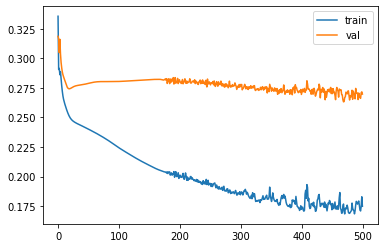

Epoch 1/500
46/71 [==================>...........] - ETA: 0s - loss: 0.8413 - mae: 0.2632
Epoch 00001: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.7635 - mae: 0.2405 - val_loss: 1.0482 - val_mae: 0.2725
Epoch 2/500
46/71 [==================>...........] - ETA: 0s - loss: 0.5908 - mae: 0.2107
Epoch 00002: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.6386 - mae: 0.2085 - val_loss: 1.0110 - val_mae: 0.2706
Epoch 3/500
49/71 [===================>..........] - ETA: 0s - loss: 0.6018 - mae: 0.2143
Epoch 00003: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.5772 - mae: 0.2040 - val_loss: 1.0077 - val_mae: 0.2690
Epoch 4/500
45/71 [==================>...........] - ETA: 0s - loss: 0.5801 - mae: 0.2046
Epoch 00004: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.5750 - mae: 0.2058 -

Epoch 33/500
69/71 [============================>.] - ETA: 0s - loss: 0.4891 - mae: 0.1950
Epoch 00033: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 5ms/step - loss: 0.4932 - mae: 0.1954 - val_loss: 1.0302 - val_mae: 0.2663
Epoch 34/500
35/71 [=============>................] - ETA: 0s - loss: 0.4345 - mae: 0.1850
Epoch 00034: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.4949 - mae: 0.1958 - val_loss: 0.9812 - val_mae: 0.2655
Epoch 35/500
50/71 [====================>.........] - ETA: 0s - loss: 0.5444 - mae: 0.2181
Epoch 00035: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.4990 - mae: 0.2015 - val_loss: 1.0324 - val_mae: 0.2669
Epoch 36/500
46/71 [==================>...........] - ETA: 0s - loss: 0.4829 - mae: 0.1968
Epoch 00036: val_mae did not improve from 0.26325
71/71 [==============================] - 0s 2ms/step - loss: 0.4920 - mae: 0.19

53/71 [=====================>........] - ETA: 0s - loss: 0.5275 - mae: 0.2021
Epoch 00063: val_mae did not improve from 0.25734
71/71 [==============================] - 0s 2ms/step - loss: 0.4711 - mae: 0.1850 - val_loss: 1.1233 - val_mae: 0.2593
Epoch 64/500
55/71 [======================>.......] - ETA: 0s - loss: 0.5075 - mae: 0.1972
Epoch 00064: val_mae did not improve from 0.25734
71/71 [==============================] - 0s 2ms/step - loss: 0.4667 - mae: 0.1840 - val_loss: 1.1409 - val_mae: 0.2590
Epoch 65/500
49/71 [===================>..........] - ETA: 0s - loss: 0.4663 - mae: 0.1924
Epoch 00065: val_mae did not improve from 0.25734
71/71 [==============================] - 0s 2ms/step - loss: 0.4620 - mae: 0.1836 - val_loss: 1.1202 - val_mae: 0.2577
Epoch 66/500
52/71 [====================>.........] - ETA: 0s - loss: 0.5189 - mae: 0.1998
Epoch 00066: val_mae did not improve from 0.25734
71/71 [==============================] - 0s 2ms/step - loss: 0.4672 - mae: 0.1827 - val_loss

Epoch 94/500
46/71 [==================>...........] - ETA: 0s - loss: 0.4348 - mae: 0.1800
Epoch 00094: val_mae did not improve from 0.25414
71/71 [==============================] - 0s 2ms/step - loss: 0.4488 - mae: 0.1772 - val_loss: 1.2243 - val_mae: 0.2566
Epoch 95/500
45/71 [==================>...........] - ETA: 0s - loss: 0.4393 - mae: 0.1821
Epoch 00095: val_mae did not improve from 0.25414
71/71 [==============================] - 0s 2ms/step - loss: 0.4511 - mae: 0.1777 - val_loss: 1.2255 - val_mae: 0.2556
Epoch 96/500
46/71 [==================>...........] - ETA: 0s - loss: 0.4523 - mae: 0.1873
Epoch 00096: val_mae did not improve from 0.25414
71/71 [==============================] - 0s 2ms/step - loss: 0.4640 - mae: 0.1820 - val_loss: 1.2331 - val_mae: 0.2581
Epoch 97/500
53/71 [=====================>........] - ETA: 0s - loss: 0.5181 - mae: 0.1976
Epoch 00097: val_mae did not improve from 0.25414
71/71 [==============================] - 0s 2ms/step - loss: 0.4552 - mae: 0.17

52/71 [====================>.........] - ETA: 0s - loss: 0.5018 - mae: 0.1925
Epoch 00125: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4395 - mae: 0.1729 - val_loss: 1.3212 - val_mae: 0.2557
Epoch 126/500
52/71 [====================>.........] - ETA: 0s - loss: 0.5029 - mae: 0.1933
Epoch 00126: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4394 - mae: 0.1728 - val_loss: 1.3018 - val_mae: 0.2568
Epoch 127/500
53/71 [=====================>........] - ETA: 0s - loss: 0.5219 - mae: 0.1963
Epoch 00127: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4513 - mae: 0.1740 - val_loss: 1.2995 - val_mae: 0.2537
Epoch 128/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4999 - mae: 0.1931
Epoch 00128: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4352 - mae: 0.1722 - val_l

Epoch 157/500
54/71 [=====================>........] - ETA: 0s - loss: 0.5005 - mae: 0.1930
Epoch 00157: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4432 - mae: 0.1731 - val_loss: 1.3060 - val_mae: 0.2567
Epoch 158/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4948 - mae: 0.1903
Epoch 00158: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4350 - mae: 0.1710 - val_loss: 1.3366 - val_mae: 0.2541
Epoch 159/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4907 - mae: 0.1897
Epoch 00159: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4341 - mae: 0.1706 - val_loss: 1.3353 - val_mae: 0.2558
Epoch 160/500
53/71 [=====================>........] - ETA: 0s - loss: 0.5023 - mae: 0.1933
Epoch 00160: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4391 - mae: 

Epoch 189/500
46/71 [==================>...........] - ETA: 0s - loss: 0.4162 - mae: 0.1756
Epoch 00189: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4300 - mae: 0.1702 - val_loss: 1.3325 - val_mae: 0.2566
Epoch 190/500
47/71 [==================>...........] - ETA: 0s - loss: 0.4096 - mae: 0.1714
Epoch 00190: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4220 - mae: 0.1665 - val_loss: 1.3573 - val_mae: 0.2561
Epoch 191/500
48/71 [===================>..........] - ETA: 0s - loss: 0.4104 - mae: 0.1716
Epoch 00191: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4229 - mae: 0.1663 - val_loss: 1.3866 - val_mae: 0.2538
Epoch 192/500
54/71 [=====================>........] - ETA: 0s - loss: 0.4782 - mae: 0.1845
Epoch 00192: val_mae did not improve from 0.25317
71/71 [==============================] - 0s 2ms/step - loss: 0.4275 - mae: 

51/71 [====================>.........] - ETA: 0s - loss: 0.4564 - mae: 0.1793
Epoch 00220: val_mae improved from 0.25255 to 0.25187, saving model to Model\my_model_delta_7.h5
71/71 [==============================] - 0s 4ms/step - loss: 0.4195 - mae: 0.1645 - val_loss: 1.4025 - val_mae: 0.2519
Epoch 221/500
51/71 [====================>.........] - ETA: 0s - loss: 0.4515 - mae: 0.1766
Epoch 00221: val_mae did not improve from 0.25187
71/71 [==============================] - 0s 3ms/step - loss: 0.4182 - mae: 0.1630 - val_loss: 1.3066 - val_mae: 0.2668
Epoch 222/500
51/71 [====================>.........] - ETA: 0s - loss: 0.4521 - mae: 0.1765
Epoch 00222: val_mae did not improve from 0.25187
71/71 [==============================] - 0s 2ms/step - loss: 0.4186 - mae: 0.1633 - val_loss: 1.3621 - val_mae: 0.2556
Epoch 223/500
51/71 [====================>.........] - ETA: 0s - loss: 0.4457 - mae: 0.1761
Epoch 00223: val_mae did not improve from 0.25187
71/71 [==============================] - 0

53/71 [=====================>........] - ETA: 0s - loss: 0.4862 - mae: 0.1863
Epoch 00251: val_mae did not improve from 0.25187
71/71 [==============================] - 0s 2ms/step - loss: 0.4220 - mae: 0.1659 - val_loss: 1.3776 - val_mae: 0.2549
Epoch 252/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4783 - mae: 0.1837
Epoch 00252: val_mae did not improve from 0.25187
71/71 [==============================] - 0s 2ms/step - loss: 0.4138 - mae: 0.1630 - val_loss: 1.3674 - val_mae: 0.2575
Epoch 253/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4562 - mae: 0.1795
Epoch 00253: val_mae did not improve from 0.25187
71/71 [==============================] - 0s 2ms/step - loss: 0.4040 - mae: 0.1614 - val_loss: 1.3925 - val_mae: 0.2533
Epoch 254/500
54/71 [=====================>........] - ETA: 0s - loss: 0.4573 - mae: 0.1794
Epoch 00254: val_mae did not improve from 0.25187
71/71 [==============================] - 0s 2ms/step - loss: 0.4039 - mae: 0.1611 - val_l

54/71 [=====================>........] - ETA: 0s - loss: 0.4476 - mae: 0.1760
Epoch 00282: val_mae did not improve from 0.24948
71/71 [==============================] - 0s 2ms/step - loss: 0.3927 - mae: 0.1578 - val_loss: 1.4474 - val_mae: 0.2508
Epoch 283/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4687 - mae: 0.1805
Epoch 00283: val_mae did not improve from 0.24948
71/71 [==============================] - 0s 2ms/step - loss: 0.4081 - mae: 0.1598 - val_loss: 1.3550 - val_mae: 0.2635
Epoch 284/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4454 - mae: 0.1737
Epoch 00284: val_mae improved from 0.24948 to 0.24809, saving model to Model\my_model_delta_7.h5
71/71 [==============================] - 0s 5ms/step - loss: 0.3867 - mae: 0.1553 - val_loss: 1.4529 - val_mae: 0.2481
Epoch 285/500
68/71 [===========================>..] - ETA: 0s - loss: 0.4091 - mae: 0.1609
Epoch 00285: val_mae did not improve from 0.24809
71/71 [==============================] - 0

Epoch 313/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4462 - mae: 0.1759
Epoch 00313: val_mae did not improve from 0.24559
71/71 [==============================] - 0s 2ms/step - loss: 0.3868 - mae: 0.1569 - val_loss: 1.4347 - val_mae: 0.2509
Epoch 314/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4524 - mae: 0.1779
Epoch 00314: val_mae did not improve from 0.24559
71/71 [==============================] - 0s 2ms/step - loss: 0.3934 - mae: 0.1580 - val_loss: 1.4723 - val_mae: 0.2477
Epoch 315/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4901 - mae: 0.1864
Epoch 00315: val_mae did not improve from 0.24559
71/71 [==============================] - 0s 2ms/step - loss: 0.4178 - mae: 0.1631 - val_loss: 1.4508 - val_mae: 0.2490
Epoch 316/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4850 - mae: 0.1838
Epoch 00316: val_mae did not improve from 0.24559
71/71 [==============================] - 0s 2ms/step - loss: 0.4303 - mae: 

51/71 [====================>.........] - ETA: 0s - loss: 0.4086 - mae: 0.1661
Epoch 00344: val_mae did not improve from 0.24430
71/71 [==============================] - 0s 2ms/step - loss: 0.3718 - mae: 0.1514 - val_loss: 1.4951 - val_mae: 0.2474
Epoch 345/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4281 - mae: 0.1715
Epoch 00345: val_mae did not improve from 0.24430
71/71 [==============================] - 0s 2ms/step - loss: 0.3746 - mae: 0.1530 - val_loss: 1.4873 - val_mae: 0.2525
Epoch 346/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4348 - mae: 0.1722
Epoch 00346: val_mae did not improve from 0.24430
71/71 [==============================] - 0s 2ms/step - loss: 0.3747 - mae: 0.1513 - val_loss: 1.5225 - val_mae: 0.2460
Epoch 347/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4479 - mae: 0.1761
Epoch 00347: val_mae did not improve from 0.24430
71/71 [==============================] - 0s 2ms/step - loss: 0.3872 - mae: 0.1556 - val_l

53/71 [=====================>........] - ETA: 0s - loss: 0.4346 - mae: 0.1719
Epoch 00375: val_mae did not improve from 0.24220
71/71 [==============================] - 0s 2ms/step - loss: 0.3737 - mae: 0.1516 - val_loss: 1.5739 - val_mae: 0.2445
Epoch 376/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4175 - mae: 0.1683
Epoch 00376: val_mae did not improve from 0.24220
71/71 [==============================] - 0s 2ms/step - loss: 0.3666 - mae: 0.1495 - val_loss: 1.5544 - val_mae: 0.2458
Epoch 377/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4235 - mae: 0.1697
Epoch 00377: val_mae did not improve from 0.24220
71/71 [==============================] - 0s 2ms/step - loss: 0.3626 - mae: 0.1483 - val_loss: 1.5372 - val_mae: 0.2470
Epoch 378/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4147 - mae: 0.1677
Epoch 00378: val_mae did not improve from 0.24220
71/71 [==============================] - 0s 2ms/step - loss: 0.3615 - mae: 0.1486 - val_l

Epoch 406/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4276 - mae: 0.1745
Epoch 00406: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3685 - mae: 0.1531 - val_loss: 1.6280 - val_mae: 0.2419
Epoch 407/500
54/71 [=====================>........] - ETA: 0s - loss: 0.4467 - mae: 0.1771
Epoch 00407: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3845 - mae: 0.1549 - val_loss: 1.6145 - val_mae: 0.2421
Epoch 408/500
54/71 [=====================>........] - ETA: 0s - loss: 0.4135 - mae: 0.1707
Epoch 00408: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3590 - mae: 0.1502 - val_loss: 1.5850 - val_mae: 0.2477
Epoch 409/500
50/71 [====================>.........] - ETA: 0s - loss: 0.4091 - mae: 0.1656
Epoch 00409: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3655 - mae: 

Epoch 438/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4210 - mae: 0.1671
Epoch 00438: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3615 - mae: 0.1463 - val_loss: 1.6438 - val_mae: 0.2460
Epoch 439/500
50/71 [====================>.........] - ETA: 0s - loss: 0.3984 - mae: 0.1629
Epoch 00439: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3591 - mae: 0.1478 - val_loss: 1.6258 - val_mae: 0.2477
Epoch 440/500
53/71 [=====================>........] - ETA: 0s - loss: 0.4190 - mae: 0.1709
Epoch 00440: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3575 - mae: 0.1486 - val_loss: 1.6867 - val_mae: 0.2411
Epoch 441/500
54/71 [=====================>........] - ETA: 0s - loss: 0.4138 - mae: 0.1660
Epoch 00441: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3646 - mae: 

Epoch 470/500
50/71 [====================>.........] - ETA: 0s - loss: 0.3970 - mae: 0.1620
Epoch 00470: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3546 - mae: 0.1463 - val_loss: 1.7495 - val_mae: 0.2407
Epoch 471/500
52/71 [====================>.........] - ETA: 0s - loss: 0.4175 - mae: 0.1657
Epoch 00471: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3706 - mae: 0.1493 - val_loss: 1.5442 - val_mae: 0.2652
Epoch 472/500
51/71 [====================>.........] - ETA: 0s - loss: 0.4071 - mae: 0.1684
Epoch 00472: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3666 - mae: 0.1514 - val_loss: 1.6953 - val_mae: 0.2442
Epoch 473/500
50/71 [====================>.........] - ETA: 0s - loss: 0.3996 - mae: 0.1654
Epoch 00473: val_mae did not improve from 0.23926
71/71 [==============================] - 0s 2ms/step - loss: 0.3557 - mae: 

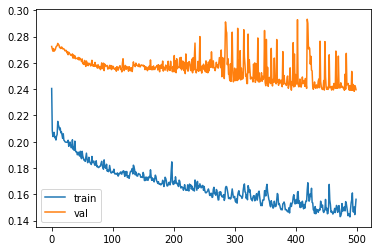

Epoch 1/500
48/79 [=================>............] - ETA: 0s - loss: 0.7421 - mae: 0.1927
Epoch 00001: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 5ms/step - loss: 0.7588 - mae: 0.1769 - val_loss: 1.2630 - val_mae: 0.2653
Epoch 2/500
47/79 [================>.............] - ETA: 0s - loss: 0.6018 - mae: 0.2107
Epoch 00002: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.6016 - mae: 0.2018 - val_loss: 1.0974 - val_mae: 0.2700
Epoch 3/500
54/79 [===================>..........] - ETA: 0s - loss: 0.5481 - mae: 0.1973
Epoch 00003: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.5585 - mae: 0.1952 - val_loss: 1.1135 - val_mae: 0.2662
Epoch 4/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5591 - mae: 0.1938
Epoch 00004: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.5461 - mae: 0.1896 -

Epoch 33/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5101 - mae: 0.1887
Epoch 00033: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.5043 - mae: 0.1830 - val_loss: 1.0905 - val_mae: 0.2639
Epoch 34/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5218 - mae: 0.1919
Epoch 00034: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.5075 - mae: 0.1848 - val_loss: 1.1112 - val_mae: 0.2643
Epoch 35/500
54/79 [===================>..........] - ETA: 0s - loss: 0.5086 - mae: 0.1880
Epoch 00035: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.5065 - mae: 0.1833 - val_loss: 1.1092 - val_mae: 0.2642
Epoch 36/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5148 - mae: 0.1914
Epoch 00036: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.5032 - mae: 0.18

Epoch 65/500
47/79 [================>.............] - ETA: 0s - loss: 0.5139 - mae: 0.1893
Epoch 00065: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4869 - mae: 0.1805 - val_loss: 1.1065 - val_mae: 0.2622
Epoch 66/500
49/79 [=================>............] - ETA: 0s - loss: 0.5120 - mae: 0.1918
Epoch 00066: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4925 - mae: 0.1823 - val_loss: 1.1424 - val_mae: 0.2662
Epoch 67/500
41/79 [==============>...............] - ETA: 0s - loss: 0.5338 - mae: 0.1918
Epoch 00067: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4913 - mae: 0.1817 - val_loss: 1.1005 - val_mae: 0.2625
Epoch 68/500
46/79 [================>.............] - ETA: 0s - loss: 0.5109 - mae: 0.1926
Epoch 00068: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4879 - mae: 0.18

Epoch 97/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5090 - mae: 0.1941
Epoch 00097: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4818 - mae: 0.1844 - val_loss: 1.1306 - val_mae: 0.2666
Epoch 98/500
43/79 [===============>..............] - ETA: 0s - loss: 0.5242 - mae: 0.1991
Epoch 00098: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4808 - mae: 0.1857 - val_loss: 1.1301 - val_mae: 0.2653
Epoch 99/500
54/79 [===================>..........] - ETA: 0s - loss: 0.5019 - mae: 0.1947
Epoch 00099: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4830 - mae: 0.1861 - val_loss: 1.1128 - val_mae: 0.2634
Epoch 100/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4968 - mae: 0.1967
Epoch 00100: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4709 - mae: 0.1

Epoch 129/500
49/79 [=================>............] - ETA: 0s - loss: 0.4894 - mae: 0.1921
Epoch 00129: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4642 - mae: 0.1819 - val_loss: 1.2120 - val_mae: 0.2639
Epoch 130/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4985 - mae: 0.1947
Epoch 00130: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4702 - mae: 0.1828 - val_loss: 1.1881 - val_mae: 0.2620
Epoch 131/500
50/79 [=================>............] - ETA: 0s - loss: 0.5052 - mae: 0.1912
Epoch 00131: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4700 - mae: 0.1804 - val_loss: 1.1987 - val_mae: 0.2630
Epoch 132/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4726 - mae: 0.1903
Epoch 00132: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4535 - mae: 

Epoch 161/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4872 - mae: 0.1964
Epoch 00161: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4584 - mae: 0.1828 - val_loss: 1.2768 - val_mae: 0.2629
Epoch 162/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4757 - mae: 0.1908
Epoch 00162: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4576 - mae: 0.1810 - val_loss: 1.2620 - val_mae: 0.2602
Epoch 163/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4725 - mae: 0.1921
Epoch 00163: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4622 - mae: 0.1815 - val_loss: 1.1647 - val_mae: 0.2596
Epoch 164/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4584 - mae: 0.1928
Epoch 00164: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4655 - mae: 

Epoch 193/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5275 - mae: 0.1982
Epoch 00193: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4827 - mae: 0.1846 - val_loss: 1.2566 - val_mae: 0.2636
Epoch 194/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4920 - mae: 0.1908
Epoch 00194: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4586 - mae: 0.1803 - val_loss: 1.2349 - val_mae: 0.2611
Epoch 195/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4831 - mae: 0.1905
Epoch 00195: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4523 - mae: 0.1796 - val_loss: 1.2584 - val_mae: 0.2616
Epoch 196/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4953 - mae: 0.1921
Epoch 00196: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4613 - mae: 

Epoch 225/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5156 - mae: 0.1908
Epoch 00225: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4617 - mae: 0.1757 - val_loss: 1.3091 - val_mae: 0.2606
Epoch 226/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5222 - mae: 0.1943
Epoch 00226: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4666 - mae: 0.1805 - val_loss: 1.3405 - val_mae: 0.2631
Epoch 227/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4974 - mae: 0.1939
Epoch 00227: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4551 - mae: 0.1818 - val_loss: 1.3536 - val_mae: 0.2597
Epoch 228/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4875 - mae: 0.1931
Epoch 00228: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4441 - mae: 

Epoch 257/500
56/79 [====================>.........] - ETA: 0s - loss: 0.4696 - mae: 0.1860
Epoch 00257: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 4ms/step - loss: 0.4391 - mae: 0.1752 - val_loss: 1.3849 - val_mae: 0.2612
Epoch 258/500
48/79 [=================>............] - ETA: 0s - loss: 0.5280 - mae: 0.1968
Epoch 00258: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4535 - mae: 0.1767 - val_loss: 1.4049 - val_mae: 0.2599
Epoch 259/500
46/79 [================>.............] - ETA: 0s - loss: 0.4991 - mae: 0.1881
Epoch 00259: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4460 - mae: 0.1738 - val_loss: 1.3853 - val_mae: 0.2599
Epoch 260/500
47/79 [================>.............] - ETA: 0s - loss: 0.5109 - mae: 0.1949
Epoch 00260: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4606 - mae: 

Epoch 289/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4931 - mae: 0.1927
Epoch 00289: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4851 - mae: 0.1767 - val_loss: 1.3313 - val_mae: 0.2523
Epoch 290/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5046 - mae: 0.1997
Epoch 00290: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4750 - mae: 0.1841 - val_loss: 1.3584 - val_mae: 0.2601
Epoch 291/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4960 - mae: 0.1969
Epoch 00291: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4445 - mae: 0.1788 - val_loss: 1.3545 - val_mae: 0.2524
Epoch 292/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5019 - mae: 0.1951
Epoch 00292: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4549 - mae: 

51/79 [==================>...........] - ETA: 0s - loss: 0.5014 - mae: 0.1920
Epoch 00320: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4492 - mae: 0.1768 - val_loss: 1.3864 - val_mae: 0.2561
Epoch 321/500
48/79 [=================>............] - ETA: 0s - loss: 0.5019 - mae: 0.1942
Epoch 00321: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4454 - mae: 0.1768 - val_loss: 1.4058 - val_mae: 0.2561
Epoch 322/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4896 - mae: 0.1913
Epoch 00322: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4376 - mae: 0.1743 - val_loss: 1.4157 - val_mae: 0.2571
Epoch 323/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4844 - mae: 0.1910
Epoch 00323: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4314 - mae: 0.1733 - val_l

Epoch 352/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4897 - mae: 0.1929
Epoch 00352: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4459 - mae: 0.1765 - val_loss: 1.4798 - val_mae: 0.2570
Epoch 353/500
45/79 [================>.............] - ETA: 0s - loss: 0.4884 - mae: 0.1913
Epoch 00353: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4413 - mae: 0.1765 - val_loss: 1.4300 - val_mae: 0.2578
Epoch 354/500
50/79 [=================>............] - ETA: 0s - loss: 0.4943 - mae: 0.1935
Epoch 00354: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4475 - mae: 0.1753 - val_loss: 1.4417 - val_mae: 0.2575
Epoch 355/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5036 - mae: 0.1919
Epoch 00355: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4585 - mae: 

Epoch 384/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5199 - mae: 0.1925
Epoch 00384: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4538 - mae: 0.1732 - val_loss: 1.5172 - val_mae: 0.2641
Epoch 385/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5047 - mae: 0.1918
Epoch 00385: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4492 - mae: 0.1750 - val_loss: 1.5157 - val_mae: 0.2621
Epoch 386/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5079 - mae: 0.1895
Epoch 00386: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4481 - mae: 0.1729 - val_loss: 1.5175 - val_mae: 0.2644
Epoch 387/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5140 - mae: 0.1896
Epoch 00387: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4528 - mae: 

Epoch 416/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5450 - mae: 0.1889
Epoch 00416: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4808 - mae: 0.1733 - val_loss: 1.4842 - val_mae: 0.2640
Epoch 417/500
54/79 [===================>..........] - ETA: 0s - loss: 0.5418 - mae: 0.1894
Epoch 00417: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4822 - mae: 0.1741 - val_loss: 1.5024 - val_mae: 0.2653
Epoch 418/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5342 - mae: 0.1919
Epoch 00418: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4786 - mae: 0.1767 - val_loss: 1.5074 - val_mae: 0.2650
Epoch 419/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5175 - mae: 0.1909
Epoch 00419: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4623 - mae: 

Epoch 00447: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4712 - mae: 0.1838 - val_loss: 1.3678 - val_mae: 0.2599
Epoch 448/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5183 - mae: 0.2041
Epoch 00448: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 3ms/step - loss: 0.4713 - mae: 0.1838 - val_loss: 1.3822 - val_mae: 0.2583
Epoch 449/500
48/79 [=================>............] - ETA: 0s - loss: 0.5231 - mae: 0.2085
Epoch 00449: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4765 - mae: 0.1872 - val_loss: 1.3823 - val_mae: 0.2592
Epoch 450/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5205 - mae: 0.2029
Epoch 00450: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4747 - mae: 0.1842 - val_loss: 1.3821 - val_mae: 0.2592
Epoch 451/500
52/79 [==================>........

Epoch 479/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4956 - mae: 0.1969
Epoch 00479: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4342 - mae: 0.1740 - val_loss: 1.5434 - val_mae: 0.2614
Epoch 480/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4928 - mae: 0.1934
Epoch 00480: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4423 - mae: 0.1733 - val_loss: 1.5320 - val_mae: 0.2596
Epoch 481/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5165 - mae: 0.1947
Epoch 00481: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4600 - mae: 0.1733 - val_loss: 1.5389 - val_mae: 0.2616
Epoch 482/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5083 - mae: 0.1943
Epoch 00482: val_mae did not improve from 0.23838
79/79 [==============================] - 0s 2ms/step - loss: 0.4529 - mae: 

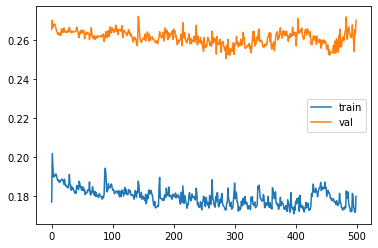

Epoch 1/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3398 - mae: 0.1653
Epoch 00001: val_mae improved from 0.23838 to 0.22164, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 4ms/step - loss: 0.3525 - mae: 0.1408 - val_loss: 0.8764 - val_mae: 0.2216
Epoch 2/500
55/79 [===================>..........] - ETA: 0s - loss: 0.2575 - mae: 0.1066
Epoch 00002: val_mae improved from 0.22164 to 0.21148, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 4ms/step - loss: 0.2912 - mae: 0.0966 - val_loss: 0.9603 - val_mae: 0.2115
Epoch 3/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2672 - mae: 0.1005
Epoch 00003: val_mae improved from 0.21148 to 0.21089, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 3ms/step - loss: 0.2837 - mae: 0.0886 - val_loss: 0.9686 - val_mae: 0.2109
Epoch 4/500
49/79 [=================>............] - ETA: 0s - loss: 0.2745 - mae:

50/79 [=================>............] - ETA: 0s - loss: 0.2604 - mae: 0.0922
Epoch 00031: val_mae did not improve from 0.20699
79/79 [==============================] - 0s 2ms/step - loss: 0.2543 - mae: 0.0845 - val_loss: 0.9645 - val_mae: 0.2106
Epoch 32/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2553 - mae: 0.0917
Epoch 00032: val_mae did not improve from 0.20699
79/79 [==============================] - 0s 2ms/step - loss: 0.2545 - mae: 0.0856 - val_loss: 0.9587 - val_mae: 0.2104
Epoch 33/500
39/79 [=============>................] - ETA: 0s - loss: 0.3150 - mae: 0.1074
Epoch 00033: val_mae did not improve from 0.20699
79/79 [==============================] - 0s 2ms/step - loss: 0.2503 - mae: 0.0840 - val_loss: 0.9640 - val_mae: 0.2107
Epoch 34/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2504 - mae: 0.0890
Epoch 00034: val_mae did not improve from 0.20699
79/79 [==============================] - 0s 2ms/step - loss: 0.2506 - mae: 0.0839 - val_loss

Epoch 00062: val_mae did not improve from 0.20630
79/79 [==============================] - 0s 2ms/step - loss: 0.2467 - mae: 0.0862 - val_loss: 0.9806 - val_mae: 0.2122
Epoch 63/500
48/79 [=================>............] - ETA: 0s - loss: 0.2591 - mae: 0.0934
Epoch 00063: val_mae did not improve from 0.20630
79/79 [==============================] - 0s 2ms/step - loss: 0.2384 - mae: 0.0852 - val_loss: 0.9948 - val_mae: 0.2079
Epoch 64/500
46/79 [================>.............] - ETA: 0s - loss: 0.2700 - mae: 0.0959
Epoch 00064: val_mae did not improve from 0.20630
79/79 [==============================] - 0s 2ms/step - loss: 0.2403 - mae: 0.0837 - val_loss: 0.9781 - val_mae: 0.2122
Epoch 65/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2481 - mae: 0.0902
Epoch 00065: val_mae did not improve from 0.20630
79/79 [==============================] - 0s 2ms/step - loss: 0.2460 - mae: 0.0872 - val_loss: 0.9808 - val_mae: 0.2078
Epoch 66/500
52/79 [==================>...........]

51/79 [==================>...........] - ETA: 0s - loss: 0.2387 - mae: 0.0869
Epoch 00093: val_mae did not improve from 0.20564
79/79 [==============================] - 0s 2ms/step - loss: 0.2209 - mae: 0.0819 - val_loss: 1.0047 - val_mae: 0.2068
Epoch 94/500
50/79 [=================>............] - ETA: 0s - loss: 0.2428 - mae: 0.0890
Epoch 00094: val_mae did not improve from 0.20564
79/79 [==============================] - 0s 2ms/step - loss: 0.2197 - mae: 0.0835 - val_loss: 1.0586 - val_mae: 0.2095
Epoch 95/500
44/79 [===============>..............] - ETA: 0s - loss: 0.2706 - mae: 0.0976
Epoch 00095: val_mae improved from 0.20564 to 0.20558, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 3ms/step - loss: 0.2158 - mae: 0.0808 - val_loss: 1.0144 - val_mae: 0.2056
Epoch 96/500
45/79 [================>.............] - ETA: 0s - loss: 0.2750 - mae: 0.0994
Epoch 00096: val_mae did not improve from 0.20558
79/79 [==============================] - 0s 2

Epoch 124/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2325 - mae: 0.0836
Epoch 00124: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2083 - mae: 0.0787 - val_loss: 1.1307 - val_mae: 0.2054
Epoch 125/500
42/79 [==============>...............] - ETA: 0s - loss: 0.2765 - mae: 0.1007
Epoch 00125: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2068 - mae: 0.0795 - val_loss: 1.1362 - val_mae: 0.2058
Epoch 126/500
40/79 [==============>...............] - ETA: 0s - loss: 0.2864 - mae: 0.1031
Epoch 00126: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 3ms/step - loss: 0.2051 - mae: 0.0786 - val_loss: 1.1444 - val_mae: 0.2059
Epoch 127/500
45/79 [================>.............] - ETA: 0s - loss: 0.2603 - mae: 0.0959
Epoch 00127: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2055 - mae: 

Epoch 156/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2243 - mae: 0.0841
Epoch 00156: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1972 - mae: 0.0769 - val_loss: 1.2421 - val_mae: 0.2034
Epoch 157/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2329 - mae: 0.0843
Epoch 00157: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2106 - mae: 0.0794 - val_loss: 1.2028 - val_mae: 0.2055
Epoch 158/500
47/79 [================>.............] - ETA: 0s - loss: 0.2645 - mae: 0.0922
Epoch 00158: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2181 - mae: 0.0817 - val_loss: 1.1403 - val_mae: 0.2098
Epoch 159/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2168 - mae: 0.0840
Epoch 00159: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1995 - mae: 

Epoch 188/500
46/79 [================>.............] - ETA: 0s - loss: 0.2491 - mae: 0.0939
Epoch 00188: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2025 - mae: 0.0815 - val_loss: 1.1710 - val_mae: 0.1990
Epoch 189/500
50/79 [=================>............] - ETA: 0s - loss: 0.2363 - mae: 0.0851
Epoch 00189: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2045 - mae: 0.0783 - val_loss: 1.1398 - val_mae: 0.2028
Epoch 190/500
49/79 [=================>............] - ETA: 0s - loss: 0.2326 - mae: 0.0830
Epoch 00190: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1988 - mae: 0.0765 - val_loss: 1.1392 - val_mae: 0.2043
Epoch 191/500
46/79 [================>.............] - ETA: 0s - loss: 0.2412 - mae: 0.0861
Epoch 00191: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1956 - mae: 

Epoch 220/500
48/79 [=================>............] - ETA: 0s - loss: 0.2263 - mae: 0.0834
Epoch 00220: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1887 - mae: 0.0735 - val_loss: 1.2641 - val_mae: 0.2058
Epoch 221/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2211 - mae: 0.0810
Epoch 00221: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.2001 - mae: 0.0775 - val_loss: 1.2384 - val_mae: 0.2084
Epoch 222/500
49/79 [=================>............] - ETA: 0s - loss: 0.2247 - mae: 0.0837
Epoch 00222: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1902 - mae: 0.0752 - val_loss: 1.2818 - val_mae: 0.2039
Epoch 223/500
47/79 [================>.............] - ETA: 0s - loss: 0.2315 - mae: 0.0853
Epoch 00223: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1919 - mae: 

Epoch 252/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2111 - mae: 0.0799
Epoch 00252: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1938 - mae: 0.0760 - val_loss: 1.2782 - val_mae: 0.2033
Epoch 253/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2117 - mae: 0.0783
Epoch 00253: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1907 - mae: 0.0747 - val_loss: 1.2478 - val_mae: 0.2053
Epoch 254/500
49/79 [=================>............] - ETA: 0s - loss: 0.2262 - mae: 0.0839
Epoch 00254: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1872 - mae: 0.0736 - val_loss: 1.3016 - val_mae: 0.2045
Epoch 255/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2094 - mae: 0.0772
Epoch 00255: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1827 - mae: 

Epoch 284/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2147 - mae: 0.0793
Epoch 00284: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1834 - mae: 0.0719 - val_loss: 1.2754 - val_mae: 0.2013
Epoch 285/500
46/79 [================>.............] - ETA: 0s - loss: 0.2358 - mae: 0.0868
Epoch 00285: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1813 - mae: 0.0709 - val_loss: 1.2798 - val_mae: 0.2006
Epoch 286/500
49/79 [=================>............] - ETA: 0s - loss: 0.2248 - mae: 0.0844
Epoch 00286: val_mae did not improve from 0.19773
79/79 [==============================] - 0s 2ms/step - loss: 0.1942 - mae: 0.0759 - val_loss: 1.2898 - val_mae: 0.2073
Epoch 287/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2183 - mae: 0.0779
Epoch 00287: val_mae improved from 0.19773 to 0.19751, saving model to Model\my_model_delta_7.h5
79/79 [=====================

65/79 [=======================>......] - ETA: 0s - loss: 0.1868 - mae: 0.0729
Epoch 00315: val_mae did not improve from 0.19751
79/79 [==============================] - 0s 3ms/step - loss: 0.1860 - mae: 0.0745 - val_loss: 1.3155 - val_mae: 0.2061
Epoch 316/500
48/79 [=================>............] - ETA: 0s - loss: 0.2355 - mae: 0.0848
Epoch 00316: val_mae improved from 0.19751 to 0.19667, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 4ms/step - loss: 0.1900 - mae: 0.0733 - val_loss: 1.3600 - val_mae: 0.1967
Epoch 317/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2109 - mae: 0.0762
Epoch 00317: val_mae did not improve from 0.19667
79/79 [==============================] - 0s 2ms/step - loss: 0.1842 - mae: 0.0705 - val_loss: 1.3678 - val_mae: 0.2013
Epoch 318/500
43/79 [===============>..............] - ETA: 0s - loss: 0.2519 - mae: 0.0905
Epoch 00318: val_mae did not improve from 0.19667
79/79 [==============================] - 0

51/79 [==================>...........] - ETA: 0s - loss: 0.2251 - mae: 0.0772
Epoch 00346: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1964 - mae: 0.0739 - val_loss: 1.2989 - val_mae: 0.2014
Epoch 347/500
49/79 [=================>............] - ETA: 0s - loss: 0.2350 - mae: 0.0805
Epoch 00347: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1937 - mae: 0.0719 - val_loss: 1.3230 - val_mae: 0.2007
Epoch 348/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2174 - mae: 0.0755
Epoch 00348: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1866 - mae: 0.0692 - val_loss: 1.3480 - val_mae: 0.2015
Epoch 349/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2193 - mae: 0.0763
Epoch 00349: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1889 - mae: 0.0706 - val_l

Epoch 378/500
50/79 [=================>............] - ETA: 0s - loss: 0.2401 - mae: 0.0850
Epoch 00378: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1949 - mae: 0.0736 - val_loss: 1.2036 - val_mae: 0.2016
Epoch 379/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2284 - mae: 0.0800
Epoch 00379: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1915 - mae: 0.0712 - val_loss: 1.2212 - val_mae: 0.2007
Epoch 380/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2248 - mae: 0.0785
Epoch 00380: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1936 - mae: 0.0722 - val_loss: 1.2443 - val_mae: 0.2031
Epoch 381/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2159 - mae: 0.0743
Epoch 00381: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1835 - mae: 

Epoch 410/500
50/79 [=================>............] - ETA: 0s - loss: 0.2150 - mae: 0.0812
Epoch 00410: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1766 - mae: 0.0703 - val_loss: 1.3219 - val_mae: 0.1999
Epoch 411/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2091 - mae: 0.0780
Epoch 00411: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1761 - mae: 0.0685 - val_loss: 1.3258 - val_mae: 0.2008
Epoch 412/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2103 - mae: 0.0788
Epoch 00412: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1836 - mae: 0.0698 - val_loss: 1.3136 - val_mae: 0.1971
Epoch 413/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2124 - mae: 0.0786
Epoch 00413: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1798 - mae: 

Epoch 442/500
44/79 [===============>..............] - ETA: 0s - loss: 0.2394 - mae: 0.0882
Epoch 00442: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1761 - mae: 0.0693 - val_loss: 1.2696 - val_mae: 0.2001
Epoch 443/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2075 - mae: 0.0771
Epoch 00443: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1784 - mae: 0.0699 - val_loss: 1.2783 - val_mae: 0.1997
Epoch 444/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2060 - mae: 0.0761
Epoch 00444: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1766 - mae: 0.0684 - val_loss: 1.2738 - val_mae: 0.2021
Epoch 445/500
47/79 [================>.............] - ETA: 0s - loss: 0.2251 - mae: 0.0850
Epoch 00445: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1789 - mae: 

Epoch 474/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2067 - mae: 0.0775
Epoch 00474: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1722 - mae: 0.0675 - val_loss: 1.2956 - val_mae: 0.2033
Epoch 475/500
50/79 [=================>............] - ETA: 0s - loss: 0.2142 - mae: 0.0804
Epoch 00475: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1777 - mae: 0.0692 - val_loss: 1.2991 - val_mae: 0.2037
Epoch 476/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2066 - mae: 0.0786
Epoch 00476: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1856 - mae: 0.0722 - val_loss: 1.3052 - val_mae: 0.1992
Epoch 477/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2071 - mae: 0.0777
Epoch 00477: val_mae did not improve from 0.19324
79/79 [==============================] - 0s 2ms/step - loss: 0.1831 - mae: 

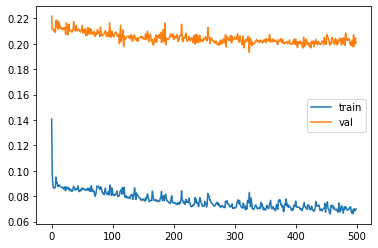

Epoch 1/500
52/96 [===============>..............] - ETA: 0s - loss: 1.3869 - mae: 0.2706
Epoch 00001: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 1.0605 - mae: 0.2365 - val_loss: 0.9317 - val_mae: 0.2461
Epoch 2/500
50/96 [==============>...............] - ETA: 0s - loss: 0.9601 - mae: 0.3061
Epoch 00002: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.7576 - mae: 0.2547 - val_loss: 0.9114 - val_mae: 0.2417
Epoch 3/500
51/96 [==============>...............] - ETA: 0s - loss: 0.9007 - mae: 0.2940
Epoch 00003: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.7160 - mae: 0.2481 - val_loss: 0.9273 - val_mae: 0.2463
Epoch 4/500
52/96 [===============>..............] - ETA: 0s - loss: 0.8466 - mae: 0.2874
Epoch 00004: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.6879 - mae: 0.2474 -

Epoch 33/500
77/96 [=======================>......] - ETA: 0s - loss: 0.6388 - mae: 0.2561
Epoch 00033: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5813 - mae: 0.2303 - val_loss: 0.9343 - val_mae: 0.2666
Epoch 34/500
96/96 [==============================] - ETA: 0s - loss: 0.5675 - mae: 0.2281
Epoch 00034: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5675 - mae: 0.2281 - val_loss: 0.9220 - val_mae: 0.2650
Epoch 35/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6959 - mae: 0.2759
Epoch 00035: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5708 - mae: 0.2297 - val_loss: 0.9476 - val_mae: 0.2647
Epoch 36/500
52/96 [===============>..............] - ETA: 0s - loss: 0.6774 - mae: 0.2671
Epoch 00036: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5734 - mae: 0.22

Epoch 65/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6944 - mae: 0.2742
Epoch 00065: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5792 - mae: 0.2275 - val_loss: 1.0064 - val_mae: 0.2868
Epoch 66/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6903 - mae: 0.2734
Epoch 00066: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5789 - mae: 0.2282 - val_loss: 1.0043 - val_mae: 0.2819
Epoch 67/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6802 - mae: 0.2722
Epoch 00067: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5793 - mae: 0.2298 - val_loss: 1.0061 - val_mae: 0.2848
Epoch 68/500
53/96 [===============>..............] - ETA: 0s - loss: 0.6624 - mae: 0.2670
Epoch 00068: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5696 - mae: 0.22

Epoch 97/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6745 - mae: 0.2809
Epoch 00097: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5681 - mae: 0.2294 - val_loss: 0.9666 - val_mae: 0.2776
Epoch 98/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6872 - mae: 0.2815
Epoch 00098: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5683 - mae: 0.2315 - val_loss: 0.9924 - val_mae: 0.2788
Epoch 99/500
53/96 [===============>..............] - ETA: 0s - loss: 0.6561 - mae: 0.2730
Epoch 00099: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5628 - mae: 0.2279 - val_loss: 1.0016 - val_mae: 0.2780
Epoch 100/500
95/96 [============================>.] - ETA: 0s - loss: 0.5557 - mae: 0.2278
Epoch 00100: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5525 - mae: 0.2

Epoch 129/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6707 - mae: 0.2739
Epoch 00129: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5536 - mae: 0.2246 - val_loss: 1.0246 - val_mae: 0.2831
Epoch 130/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6824 - mae: 0.2782
Epoch 00130: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5641 - mae: 0.2297 - val_loss: 0.9118 - val_mae: 0.2703
Epoch 131/500
95/96 [============================>.] - ETA: 0s - loss: 0.5571 - mae: 0.2281
Epoch 00131: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5535 - mae: 0.2267 - val_loss: 0.9606 - val_mae: 0.2703
Epoch 132/500
95/96 [============================>.] - ETA: 0s - loss: 0.5699 - mae: 0.2301
Epoch 00132: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5662 - mae: 

Epoch 161/500
53/96 [===============>..............] - ETA: 0s - loss: 0.6405 - mae: 0.2660
Epoch 00161: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5521 - mae: 0.2243 - val_loss: 0.9610 - val_mae: 0.2742
Epoch 162/500
52/96 [===============>..............] - ETA: 0s - loss: 0.6461 - mae: 0.2684
Epoch 00162: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5517 - mae: 0.2242 - val_loss: 0.9334 - val_mae: 0.2670
Epoch 163/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6854 - mae: 0.2741
Epoch 00163: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5740 - mae: 0.2267 - val_loss: 0.9514 - val_mae: 0.2749
Epoch 164/500
95/96 [============================>.] - ETA: 0s - loss: 0.5525 - mae: 0.2265
Epoch 00164: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5491 - mae: 

Epoch 193/500
53/96 [===============>..............] - ETA: 0s - loss: 0.6065 - mae: 0.2573
Epoch 00193: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5312 - mae: 0.2196 - val_loss: 0.9755 - val_mae: 0.2747
Epoch 194/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6228 - mae: 0.2612
Epoch 00194: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5409 - mae: 0.2187 - val_loss: 0.9794 - val_mae: 0.2765
Epoch 195/500
52/96 [===============>..............] - ETA: 0s - loss: 0.6964 - mae: 0.2670
Epoch 00195: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5913 - mae: 0.2288 - val_loss: 0.9588 - val_mae: 0.2735
Epoch 196/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6353 - mae: 0.2652
Epoch 00196: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5415 - mae: 

Epoch 225/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6455 - mae: 0.2683
Epoch 00225: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5494 - mae: 0.2262 - val_loss: 0.9837 - val_mae: 0.2816
Epoch 226/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6497 - mae: 0.2681
Epoch 00226: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5477 - mae: 0.2230 - val_loss: 0.9925 - val_mae: 0.2848
Epoch 227/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6696 - mae: 0.2702
Epoch 00227: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5673 - mae: 0.2254 - val_loss: 1.0590 - val_mae: 0.2880
Epoch 228/500
91/96 [===========================>..] - ETA: 0s - loss: 0.5721 - mae: 0.2319
Epoch 00228: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5488 - mae: 

Epoch 257/500
52/96 [===============>..............] - ETA: 0s - loss: 0.7176 - mae: 0.2784
Epoch 00257: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5870 - mae: 0.2313 - val_loss: 1.0529 - val_mae: 0.2794
Epoch 258/500
52/96 [===============>..............] - ETA: 0s - loss: 0.6698 - mae: 0.2727
Epoch 00258: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5641 - mae: 0.2288 - val_loss: 1.0373 - val_mae: 0.2727
Epoch 259/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6552 - mae: 0.2697
Epoch 00259: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5452 - mae: 0.2249 - val_loss: 1.0333 - val_mae: 0.2750
Epoch 260/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6778 - mae: 0.2730
Epoch 00260: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5563 - mae: 

Epoch 289/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6645 - mae: 0.2666
Epoch 00289: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5427 - mae: 0.2207 - val_loss: 1.0392 - val_mae: 0.2774
Epoch 290/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6471 - mae: 0.2650
Epoch 00290: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5369 - mae: 0.2200 - val_loss: 1.1201 - val_mae: 0.2858
Epoch 291/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6812 - mae: 0.2735
Epoch 00291: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5530 - mae: 0.2255 - val_loss: 1.1035 - val_mae: 0.2848
Epoch 292/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6689 - mae: 0.2723
Epoch 00292: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5475 - mae: 

Epoch 321/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6649 - mae: 0.2748
Epoch 00321: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5422 - mae: 0.2229 - val_loss: 1.1379 - val_mae: 0.2963
Epoch 322/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6446 - mae: 0.2676
Epoch 00322: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5326 - mae: 0.2199 - val_loss: 1.1404 - val_mae: 0.2963
Epoch 323/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6414 - mae: 0.2668
Epoch 00323: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5286 - mae: 0.2202 - val_loss: 1.1372 - val_mae: 0.2971
Epoch 324/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6440 - mae: 0.2680
Epoch 00324: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5309 - mae: 

Epoch 353/500
88/96 [==========================>...] - ETA: 0s - loss: 0.5503 - mae: 0.2282
Epoch 00353: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5183 - mae: 0.2153 - val_loss: 1.2008 - val_mae: 0.3011
Epoch 354/500
52/96 [===============>..............] - ETA: 0s - loss: 0.6327 - mae: 0.2613
Epoch 00354: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5409 - mae: 0.2181 - val_loss: 1.2276 - val_mae: 0.2958
Epoch 355/500
54/96 [===============>..............] - ETA: 0s - loss: 0.5994 - mae: 0.2563
Epoch 00355: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5218 - mae: 0.2184 - val_loss: 1.1963 - val_mae: 0.2896
Epoch 356/500
55/96 [================>.............] - ETA: 0s - loss: 0.5928 - mae: 0.2548
Epoch 00356: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5249 - mae: 

Epoch 385/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6626 - mae: 0.2658
Epoch 00385: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5587 - mae: 0.2191 - val_loss: 1.2544 - val_mae: 0.2916
Epoch 386/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6519 - mae: 0.2677
Epoch 00386: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5405 - mae: 0.2214 - val_loss: 1.1651 - val_mae: 0.2896
Epoch 387/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6289 - mae: 0.2631
Epoch 00387: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5277 - mae: 0.2193 - val_loss: 1.1806 - val_mae: 0.2924
Epoch 388/500
53/96 [===============>..............] - ETA: 0s - loss: 0.6092 - mae: 0.2583
Epoch 00388: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5268 - mae: 

Epoch 417/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6152 - mae: 0.2588
Epoch 00417: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5056 - mae: 0.2159 - val_loss: 1.2056 - val_mae: 0.2862
Epoch 418/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6168 - mae: 0.2603
Epoch 00418: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5065 - mae: 0.2145 - val_loss: 1.2053 - val_mae: 0.2942
Epoch 419/500
53/96 [===============>..............] - ETA: 0s - loss: 0.5942 - mae: 0.2535
Epoch 00419: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5026 - mae: 0.2146 - val_loss: 1.2139 - val_mae: 0.2922
Epoch 420/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6206 - mae: 0.2601
Epoch 00420: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5043 - mae: 

Epoch 449/500
52/96 [===============>..............] - ETA: 0s - loss: 0.6086 - mae: 0.2555
Epoch 00449: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5016 - mae: 0.2116 - val_loss: 1.2165 - val_mae: 0.2896
Epoch 450/500
53/96 [===============>..............] - ETA: 0s - loss: 0.5979 - mae: 0.2554
Epoch 00450: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5013 - mae: 0.2141 - val_loss: 1.1867 - val_mae: 0.2869
Epoch 451/500
51/96 [==============>...............] - ETA: 0s - loss: 0.6567 - mae: 0.2659
Epoch 00451: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5317 - mae: 0.2178 - val_loss: 1.2031 - val_mae: 0.2906
Epoch 452/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6202 - mae: 0.2635
Epoch 00452: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5008 - mae: 

Epoch 481/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6158 - mae: 0.2601
Epoch 00481: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5035 - mae: 0.2141 - val_loss: 1.2049 - val_mae: 0.2801
Epoch 482/500
85/96 [=========================>....] - ETA: 0s - loss: 0.5259 - mae: 0.2253
Epoch 00482: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5197 - mae: 0.2159 - val_loss: 1.2034 - val_mae: 0.2860
Epoch 483/500
50/96 [==============>...............] - ETA: 0s - loss: 0.6233 - mae: 0.2606
Epoch 00483: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5251 - mae: 0.2132 - val_loss: 1.1953 - val_mae: 0.2823
Epoch 484/500
49/96 [==============>...............] - ETA: 0s - loss: 0.6214 - mae: 0.2620
Epoch 00484: val_mae did not improve from 0.19324
96/96 [==============================] - 0s 2ms/step - loss: 0.5072 - mae: 

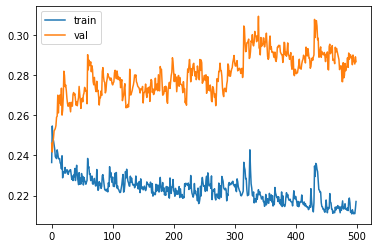

Epoch 1/500
50/79 [=================>............] - ETA: 0s - loss: 0.7774 - mae: 0.2686
Epoch 00001: val_mae improved from 0.19324 to 0.18160, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 4ms/step - loss: 0.7255 - mae: 0.2553 - val_loss: 0.4044 - val_mae: 0.1816
Epoch 2/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5820 - mae: 0.2227
Epoch 00002: val_mae improved from 0.18160 to 0.16902, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 4ms/step - loss: 0.5489 - mae: 0.2149 - val_loss: 0.3829 - val_mae: 0.1690
Epoch 3/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5890 - mae: 0.2188
Epoch 00003: val_mae did not improve from 0.16902
79/79 [==============================] - 0s 2ms/step - loss: 0.5469 - mae: 0.2125 - val_loss: 0.3825 - val_mae: 0.1740
Epoch 4/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5802 - mae: 0.2212
Epoch 00004: val_mae did not improve fr

42/79 [==============>...............] - ETA: 0s - loss: 0.5233 - mae: 0.2078
Epoch 00030: val_mae did not improve from 0.15230
79/79 [==============================] - 0s 2ms/step - loss: 0.4869 - mae: 0.1994 - val_loss: 0.3683 - val_mae: 0.1530
Epoch 31/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5331 - mae: 0.2106
Epoch 00031: val_mae did not improve from 0.15230
79/79 [==============================] - 0s 2ms/step - loss: 0.4832 - mae: 0.1972 - val_loss: 0.3667 - val_mae: 0.1532
Epoch 32/500
40/79 [==============>...............] - ETA: 0s - loss: 0.5087 - mae: 0.2020
Epoch 00032: val_mae did not improve from 0.15230
79/79 [==============================] - 0s 2ms/step - loss: 0.4836 - mae: 0.1972 - val_loss: 0.3733 - val_mae: 0.1546
Epoch 33/500
48/79 [=================>............] - ETA: 0s - loss: 0.5629 - mae: 0.2138
Epoch 00033: val_mae did not improve from 0.15230
79/79 [==============================] - 0s 2ms/step - loss: 0.4996 - mae: 0.1995 - val_loss

Epoch 00060: val_mae improved from 0.14678 to 0.14547, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 4ms/step - loss: 0.4638 - mae: 0.1925 - val_loss: 0.3875 - val_mae: 0.1455
Epoch 61/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5173 - mae: 0.2052
Epoch 00061: val_mae did not improve from 0.14547
79/79 [==============================] - 0s 2ms/step - loss: 0.4600 - mae: 0.1879 - val_loss: 0.3918 - val_mae: 0.1465
Epoch 62/500
49/79 [=================>............] - ETA: 0s - loss: 0.5184 - mae: 0.2047
Epoch 00062: val_mae did not improve from 0.14547
79/79 [==============================] - 0s 2ms/step - loss: 0.4576 - mae: 0.1884 - val_loss: 0.3969 - val_mae: 0.1484
Epoch 63/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5170 - mae: 0.2039
Epoch 00063: val_mae did not improve from 0.14547
79/79 [==============================] - 0s 2ms/step - loss: 0.4631 - mae: 0.1880 - val_loss: 0.4132 - val_mae: 0.1525
Epoc

Epoch 91/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5052 - mae: 0.2045
Epoch 00091: val_mae did not improve from 0.13545
79/79 [==============================] - 0s 2ms/step - loss: 0.4501 - mae: 0.1862 - val_loss: 0.4030 - val_mae: 0.1368
Epoch 92/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5113 - mae: 0.2069
Epoch 00092: val_mae improved from 0.13545 to 0.13390, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 3ms/step - loss: 0.4496 - mae: 0.1857 - val_loss: 0.4012 - val_mae: 0.1339
Epoch 93/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5039 - mae: 0.2037
Epoch 00093: val_mae did not improve from 0.13390
79/79 [==============================] - 0s 2ms/step - loss: 0.4524 - mae: 0.1873 - val_loss: 0.4194 - val_mae: 0.1419
Epoch 94/500
54/79 [===================>..........] - ETA: 0s - loss: 0.5028 - mae: 0.2046
Epoch 00094: val_mae did not improve from 0.13390
79/79 [=========================

53/79 [===================>..........] - ETA: 0s - loss: 0.5008 - mae: 0.2072
Epoch 00121: val_mae did not improve from 0.12426
79/79 [==============================] - 0s 2ms/step - loss: 0.4421 - mae: 0.1849 - val_loss: 0.4114 - val_mae: 0.1280
Epoch 122/500
76/79 [===========================>..] - ETA: 0s - loss: 0.4537 - mae: 0.1890
Epoch 00122: val_mae did not improve from 0.12426
79/79 [==============================] - 0s 3ms/step - loss: 0.4409 - mae: 0.1842 - val_loss: 0.4035 - val_mae: 0.1278
Epoch 123/500
48/79 [=================>............] - ETA: 0s - loss: 0.5091 - mae: 0.2069
Epoch 00123: val_mae did not improve from 0.12426
79/79 [==============================] - 0s 2ms/step - loss: 0.4399 - mae: 0.1835 - val_loss: 0.4008 - val_mae: 0.1251
Epoch 124/500
50/79 [=================>............] - ETA: 0s - loss: 0.5108 - mae: 0.2040
Epoch 00124: val_mae did not improve from 0.12426
79/79 [==============================] - 0s 2ms/step - loss: 0.4454 - mae: 0.1827 - val_l

74/79 [===========================>..] - ETA: 0s - loss: 0.4581 - mae: 0.1917
Epoch 00152: val_mae did not improve from 0.12305
79/79 [==============================] - 0s 3ms/step - loss: 0.4383 - mae: 0.1841 - val_loss: 0.4152 - val_mae: 0.1287
Epoch 153/500
48/79 [=================>............] - ETA: 0s - loss: 0.5072 - mae: 0.2052
Epoch 00153: val_mae did not improve from 0.12305
79/79 [==============================] - 0s 3ms/step - loss: 0.4405 - mae: 0.1844 - val_loss: 0.4220 - val_mae: 0.1319
Epoch 154/500
41/79 [==============>...............] - ETA: 0s - loss: 0.4880 - mae: 0.2013
Epoch 00154: val_mae did not improve from 0.12305
79/79 [==============================] - 0s 3ms/step - loss: 0.4430 - mae: 0.1855 - val_loss: 0.4017 - val_mae: 0.1264
Epoch 155/500
45/79 [================>.............] - ETA: 0s - loss: 0.4995 - mae: 0.2053
Epoch 00155: val_mae did not improve from 0.12305
79/79 [==============================] - 0s 3ms/step - loss: 0.4393 - mae: 0.1839 - val_l

Epoch 183/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4952 - mae: 0.2019
Epoch 00183: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4352 - mae: 0.1819 - val_loss: 0.4033 - val_mae: 0.1321
Epoch 184/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4931 - mae: 0.2007
Epoch 00184: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4340 - mae: 0.1811 - val_loss: 0.4041 - val_mae: 0.1316
Epoch 185/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4975 - mae: 0.2013
Epoch 00185: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4350 - mae: 0.1813 - val_loss: 0.4036 - val_mae: 0.1331
Epoch 186/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4925 - mae: 0.2014
Epoch 00186: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4371 - mae: 

Epoch 215/500
50/79 [=================>............] - ETA: 0s - loss: 0.4914 - mae: 0.1981
Epoch 00215: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4278 - mae: 0.1779 - val_loss: 0.4067 - val_mae: 0.1298
Epoch 216/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4826 - mae: 0.1961
Epoch 00216: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4234 - mae: 0.1769 - val_loss: 0.4145 - val_mae: 0.1277
Epoch 217/500
49/79 [=================>............] - ETA: 0s - loss: 0.4943 - mae: 0.1999
Epoch 00217: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4321 - mae: 0.1800 - val_loss: 0.4297 - val_mae: 0.1341
Epoch 218/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4891 - mae: 0.1994
Epoch 00218: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4412 - mae: 

Epoch 247/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4966 - mae: 0.2004
Epoch 00247: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 3ms/step - loss: 0.4333 - mae: 0.1786 - val_loss: 0.4083 - val_mae: 0.1305
Epoch 248/500
70/79 [=========================>....] - ETA: 0s - loss: 0.4596 - mae: 0.1939
Epoch 00248: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 3ms/step - loss: 0.4261 - mae: 0.1801 - val_loss: 0.4122 - val_mae: 0.1294
Epoch 249/500
36/79 [============>.................] - ETA: 0s - loss: 0.4561 - mae: 0.1878
Epoch 00249: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 3ms/step - loss: 0.4255 - mae: 0.1782 - val_loss: 0.4136 - val_mae: 0.1326
Epoch 250/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4910 - mae: 0.2045
Epoch 00250: val_mae did not improve from 0.12166
79/79 [==============================] - 0s 2ms/step - loss: 0.4312 - mae: 

50/79 [=================>............] - ETA: 0s - loss: 0.4889 - mae: 0.1951
Epoch 00278: val_mae did not improve from 0.12043
79/79 [==============================] - 0s 2ms/step - loss: 0.4224 - mae: 0.1742 - val_loss: 0.3997 - val_mae: 0.1273
Epoch 279/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4755 - mae: 0.1934
Epoch 00279: val_mae did not improve from 0.12043
79/79 [==============================] - 0s 2ms/step - loss: 0.4189 - mae: 0.1743 - val_loss: 0.4011 - val_mae: 0.1265
Epoch 280/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4894 - mae: 0.1976
Epoch 00280: val_mae did not improve from 0.12043
79/79 [==============================] - 0s 2ms/step - loss: 0.4258 - mae: 0.1761 - val_loss: 0.4042 - val_mae: 0.1250
Epoch 281/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4932 - mae: 0.1960
Epoch 00281: val_mae did not improve from 0.12043
79/79 [==============================] - 0s 2ms/step - loss: 0.4203 - mae: 0.1725 - val_l

Epoch 309/500
77/79 [============================>.] - ETA: 0s - loss: 0.4220 - mae: 0.1776
Epoch 00309: val_mae did not improve from 0.11537
79/79 [==============================] - 0s 2ms/step - loss: 0.4156 - mae: 0.1753 - val_loss: 0.4004 - val_mae: 0.1246
Epoch 310/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4767 - mae: 0.2001
Epoch 00310: val_mae did not improve from 0.11537
79/79 [==============================] - 0s 2ms/step - loss: 0.4156 - mae: 0.1752 - val_loss: 0.3963 - val_mae: 0.1198
Epoch 311/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4879 - mae: 0.1967
Epoch 00311: val_mae did not improve from 0.11537
79/79 [==============================] - 0s 2ms/step - loss: 0.4233 - mae: 0.1749 - val_loss: 0.4005 - val_mae: 0.1235
Epoch 312/500
47/79 [================>.............] - ETA: 0s - loss: 0.4845 - mae: 0.1961
Epoch 00312: val_mae did not improve from 0.11537
79/79 [==============================] - 0s 2ms/step - loss: 0.4187 - mae: 

52/79 [==================>...........] - ETA: 0s - loss: 0.4741 - mae: 0.1969
Epoch 00340: val_mae did not improve from 0.11508
79/79 [==============================] - 0s 2ms/step - loss: 0.4077 - mae: 0.1723 - val_loss: 0.4044 - val_mae: 0.1185
Epoch 341/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4763 - mae: 0.1968
Epoch 00341: val_mae did not improve from 0.11508
79/79 [==============================] - 0s 2ms/step - loss: 0.4128 - mae: 0.1734 - val_loss: 0.4027 - val_mae: 0.1193
Epoch 342/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4785 - mae: 0.1944
Epoch 00342: val_mae did not improve from 0.11508
79/79 [==============================] - 0s 2ms/step - loss: 0.4159 - mae: 0.1721 - val_loss: 0.4071 - val_mae: 0.1224
Epoch 343/500
48/79 [=================>............] - ETA: 0s - loss: 0.5013 - mae: 0.2045
Epoch 00343: val_mae did not improve from 0.11508
79/79 [==============================] - 0s 2ms/step - loss: 0.4248 - mae: 0.1790 - val_l

50/79 [=================>............] - ETA: 0s - loss: 0.4785 - mae: 0.1947
Epoch 00371: val_mae did not improve from 0.11308
79/79 [==============================] - 0s 2ms/step - loss: 0.4063 - mae: 0.1704 - val_loss: 0.4049 - val_mae: 0.1235
Epoch 372/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4676 - mae: 0.1970
Epoch 00372: val_mae did not improve from 0.11308
79/79 [==============================] - 0s 2ms/step - loss: 0.4082 - mae: 0.1739 - val_loss: 0.4078 - val_mae: 0.1210
Epoch 373/500
49/79 [=================>............] - ETA: 0s - loss: 0.4762 - mae: 0.1996
Epoch 00373: val_mae did not improve from 0.11308
79/79 [==============================] - 0s 2ms/step - loss: 0.4043 - mae: 0.1733 - val_loss: 0.4070 - val_mae: 0.1194
Epoch 374/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4633 - mae: 0.1959
Epoch 00374: val_mae did not improve from 0.11308
79/79 [==============================] - 0s 3ms/step - loss: 0.3973 - mae: 0.1701 - val_l

51/79 [==================>...........] - ETA: 0s - loss: 0.4666 - mae: 0.1971
Epoch 00402: val_mae did not improve from 0.11009
79/79 [==============================] - 0s 2ms/step - loss: 0.3967 - mae: 0.1689 - val_loss: 0.4129 - val_mae: 0.1127
Epoch 403/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4530 - mae: 0.1923
Epoch 00403: val_mae did not improve from 0.11009
79/79 [==============================] - 0s 2ms/step - loss: 0.3907 - mae: 0.1670 - val_loss: 0.4113 - val_mae: 0.1110
Epoch 404/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4645 - mae: 0.1964
Epoch 00404: val_mae improved from 0.11009 to 0.10928, saving model to Model\my_model_delta_7.h5
79/79 [==============================] - 0s 3ms/step - loss: 0.4003 - mae: 0.1701 - val_loss: 0.4052 - val_mae: 0.1093
Epoch 405/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4599 - mae: 0.1935
Epoch 00405: val_mae did not improve from 0.10928
79/79 [==============================] - 0

Epoch 433/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4462 - mae: 0.1901
Epoch 00433: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4013 - mae: 0.1712 - val_loss: 0.4166 - val_mae: 0.1234
Epoch 434/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4689 - mae: 0.1982
Epoch 00434: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4165 - mae: 0.1759 - val_loss: 0.4176 - val_mae: 0.1212
Epoch 435/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4641 - mae: 0.1972
Epoch 00435: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4091 - mae: 0.1743 - val_loss: 0.4187 - val_mae: 0.1252
Epoch 436/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4578 - mae: 0.1978
Epoch 00436: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4119 - mae: 

Epoch 465/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4688 - mae: 0.1995
Epoch 00465: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4030 - mae: 0.1716 - val_loss: 0.4116 - val_mae: 0.1146
Epoch 466/500
50/79 [=================>............] - ETA: 0s - loss: 0.4540 - mae: 0.1923
Epoch 00466: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3884 - mae: 0.1667 - val_loss: 0.4189 - val_mae: 0.1128
Epoch 467/500
40/79 [==============>...............] - ETA: 0s - loss: 0.4302 - mae: 0.1800
Epoch 00467: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3902 - mae: 0.1651 - val_loss: 0.4176 - val_mae: 0.1178
Epoch 468/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4503 - mae: 0.1921
Epoch 00468: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3931 - mae: 

Epoch 497/500
49/79 [=================>............] - ETA: 0s - loss: 0.4595 - mae: 0.1937
Epoch 00497: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3915 - mae: 0.1682 - val_loss: 0.4314 - val_mae: 0.1154
Epoch 498/500
47/79 [================>.............] - ETA: 0s - loss: 0.4774 - mae: 0.1893
Epoch 00498: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4079 - mae: 0.1666 - val_loss: 0.4155 - val_mae: 0.1141
Epoch 499/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4807 - mae: 0.1981
Epoch 00499: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4074 - mae: 0.1712 - val_loss: 0.4232 - val_mae: 0.1198
Epoch 500/500
47/79 [================>.............] - ETA: 0s - loss: 0.4620 - mae: 0.1885
Epoch 00500: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3979 - mae: 

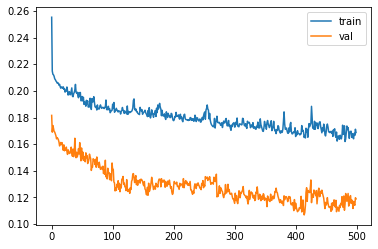

Epoch 1/500
54/79 [===================>..........] - ETA: 0s - loss: 0.7450 - mae: 0.1794
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.7277 - mae: 0.1769 - val_loss: 1.3899 - val_mae: 0.2649
Epoch 2/500
53/79 [===================>..........] - ETA: 0s - loss: 0.6532 - mae: 0.1928
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6264 - mae: 0.1820 - val_loss: 1.2404 - val_mae: 0.2648
Epoch 3/500
54/79 [===================>..........] - ETA: 0s - loss: 0.6775 - mae: 0.2212
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6438 - mae: 0.2050 - val_loss: 1.1512 - val_mae: 0.2678
Epoch 4/500
54/79 [===================>..........] - ETA: 0s - loss: 0.5762 - mae: 0.2077
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5636 - mae: 0.1958 -

Epoch 33/500
48/79 [=================>............] - ETA: 0s - loss: 0.5649 - mae: 0.2080
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4949 - mae: 0.1914 - val_loss: 0.9283 - val_mae: 0.2573
Epoch 34/500
47/79 [================>.............] - ETA: 0s - loss: 0.5682 - mae: 0.2090
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4973 - mae: 0.1912 - val_loss: 0.9332 - val_mae: 0.2553
Epoch 35/500
44/79 [===============>..............] - ETA: 0s - loss: 0.5602 - mae: 0.2059
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4842 - mae: 0.1887 - val_loss: 0.9332 - val_mae: 0.2560
Epoch 36/500
45/79 [================>.............] - ETA: 0s - loss: 0.5573 - mae: 0.2040
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4890 - mae: 0.18

Epoch 65/500
48/79 [=================>............] - ETA: 0s - loss: 0.5197 - mae: 0.2008
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4526 - mae: 0.1810 - val_loss: 0.9925 - val_mae: 0.2505
Epoch 66/500
47/79 [================>.............] - ETA: 0s - loss: 0.5180 - mae: 0.2009
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4549 - mae: 0.1811 - val_loss: 0.9874 - val_mae: 0.2512
Epoch 67/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5210 - mae: 0.2019
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4467 - mae: 0.1801 - val_loss: 0.9993 - val_mae: 0.2519
Epoch 68/500
48/79 [=================>............] - ETA: 0s - loss: 0.5155 - mae: 0.2001
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4485 - mae: 0.17

Epoch 97/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5049 - mae: 0.1980
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4373 - mae: 0.1768 - val_loss: 0.9768 - val_mae: 0.2438
Epoch 98/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5058 - mae: 0.1973
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4365 - mae: 0.1762 - val_loss: 0.9854 - val_mae: 0.2455
Epoch 99/500
49/79 [=================>............] - ETA: 0s - loss: 0.5127 - mae: 0.1979
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4357 - mae: 0.1755 - val_loss: 0.9918 - val_mae: 0.2457
Epoch 100/500
50/79 [=================>............] - ETA: 0s - loss: 0.5037 - mae: 0.1959
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4339 - mae: 0.1

Epoch 129/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5073 - mae: 0.1961
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4295 - mae: 0.1733 - val_loss: 0.9994 - val_mae: 0.2467
Epoch 130/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4993 - mae: 0.1956
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4274 - mae: 0.1732 - val_loss: 1.0208 - val_mae: 0.2463
Epoch 131/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5052 - mae: 0.1969
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4328 - mae: 0.1745 - val_loss: 1.0164 - val_mae: 0.2468
Epoch 132/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5156 - mae: 0.2004
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4407 - mae: 

Epoch 161/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5030 - mae: 0.1964
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4264 - mae: 0.1711 - val_loss: 1.0474 - val_mae: 0.2469
Epoch 162/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4989 - mae: 0.1946
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4229 - mae: 0.1711 - val_loss: 1.0436 - val_mae: 0.2484
Epoch 163/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4975 - mae: 0.1937
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4232 - mae: 0.1705 - val_loss: 1.0613 - val_mae: 0.2468
Epoch 164/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4923 - mae: 0.1923
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4170 - mae: 

Epoch 193/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4855 - mae: 0.1876
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4096 - mae: 0.1653 - val_loss: 1.0544 - val_mae: 0.2458
Epoch 194/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5053 - mae: 0.1891
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4253 - mae: 0.1668 - val_loss: 1.0567 - val_mae: 0.2495
Epoch 195/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4929 - mae: 0.1923
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4132 - mae: 0.1674 - val_loss: 1.0422 - val_mae: 0.2465
Epoch 196/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4895 - mae: 0.1895
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4172 - mae: 

Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4193 - mae: 0.1667 - val_loss: 1.1279 - val_mae: 0.2534
Epoch 225/500
50/79 [=================>............] - ETA: 0s - loss: 0.4843 - mae: 0.1871
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4093 - mae: 0.1647 - val_loss: 1.0879 - val_mae: 0.2518
Epoch 226/500
49/79 [=================>............] - ETA: 0s - loss: 0.4900 - mae: 0.1873
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4108 - mae: 0.1636 - val_loss: 1.0890 - val_mae: 0.2526
Epoch 227/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4953 - mae: 0.1868
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4192 - mae: 0.1658 - val_loss: 1.1051 - val_mae: 0.2541
Epoch 228/500
52/79 [==================>........

Epoch 256/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4733 - mae: 0.1799
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4017 - mae: 0.1594 - val_loss: 1.1517 - val_mae: 0.2534
Epoch 257/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4686 - mae: 0.1818
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3954 - mae: 0.1593 - val_loss: 1.1523 - val_mae: 0.2527
Epoch 258/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4800 - mae: 0.1814
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4093 - mae: 0.1619 - val_loss: 1.1760 - val_mae: 0.2555
Epoch 259/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4674 - mae: 0.1823
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3976 - mae: 

Epoch 288/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4867 - mae: 0.1800
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4172 - mae: 0.1587 - val_loss: 1.2226 - val_mae: 0.2535
Epoch 289/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4906 - mae: 0.1832
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4082 - mae: 0.1618 - val_loss: 1.1029 - val_mae: 0.2517
Epoch 290/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4687 - mae: 0.1829
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3922 - mae: 0.1602 - val_loss: 1.1669 - val_mae: 0.2536
Epoch 291/500
42/79 [==============>...............] - ETA: 0s - loss: 0.4712 - mae: 0.1780
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3837 - mae: 

Epoch 320/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4433 - mae: 0.1693
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3725 - mae: 0.1486 - val_loss: 1.2057 - val_mae: 0.2518
Epoch 321/500
75/79 [===========================>..] - ETA: 0s - loss: 0.3927 - mae: 0.1558
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3857 - mae: 0.1535 - val_loss: 1.2049 - val_mae: 0.2531
Epoch 322/500
46/79 [================>.............] - ETA: 0s - loss: 0.4556 - mae: 0.1755
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3770 - mae: 0.1536 - val_loss: 1.1911 - val_mae: 0.2543
Epoch 323/500
50/79 [=================>............] - ETA: 0s - loss: 0.4626 - mae: 0.1766
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3785 - mae: 

Epoch 352/500
49/79 [=================>............] - ETA: 0s - loss: 0.4705 - mae: 0.1796
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3839 - mae: 0.1551 - val_loss: 1.2264 - val_mae: 0.2534
Epoch 353/500
50/79 [=================>............] - ETA: 0s - loss: 0.4519 - mae: 0.1732
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3731 - mae: 0.1495 - val_loss: 1.2135 - val_mae: 0.2474
Epoch 354/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4561 - mae: 0.1727
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3698 - mae: 0.1469 - val_loss: 1.2135 - val_mae: 0.2504
Epoch 355/500
50/79 [=================>............] - ETA: 0s - loss: 0.4486 - mae: 0.1702
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3666 - mae: 

Epoch 384/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4076 - mae: 0.1596
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3720 - mae: 0.1492 - val_loss: 1.2301 - val_mae: 0.2521
Epoch 385/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4341 - mae: 0.1666
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3702 - mae: 0.1472 - val_loss: 1.2824 - val_mae: 0.2543
Epoch 386/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4527 - mae: 0.1721
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3739 - mae: 0.1491 - val_loss: 1.2445 - val_mae: 0.2529
Epoch 387/500
48/79 [=================>............] - ETA: 0s - loss: 0.4457 - mae: 0.1727
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3723 - mae: 

Epoch 416/500
55/79 [===================>..........] - ETA: 0s - loss: 0.4211 - mae: 0.1633
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3558 - mae: 0.1425 - val_loss: 1.2365 - val_mae: 0.2478
Epoch 417/500
41/79 [==============>...............] - ETA: 0s - loss: 0.4581 - mae: 0.1681
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3614 - mae: 0.1434 - val_loss: 1.3333 - val_mae: 0.2521
Epoch 418/500
46/79 [================>.............] - ETA: 0s - loss: 0.4421 - mae: 0.1673
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3529 - mae: 0.1408 - val_loss: 1.2890 - val_mae: 0.2531
Epoch 419/500
70/79 [=========================>....] - ETA: 0s - loss: 0.3766 - mae: 0.1472
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3564 - mae: 

Epoch 448/500
49/79 [=================>............] - ETA: 0s - loss: 0.4464 - mae: 0.1685
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3484 - mae: 0.1389 - val_loss: 1.3383 - val_mae: 0.2554
Epoch 449/500
49/79 [=================>............] - ETA: 0s - loss: 0.4454 - mae: 0.1692
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3490 - mae: 0.1392 - val_loss: 1.3741 - val_mae: 0.2544
Epoch 450/500
50/79 [=================>............] - ETA: 0s - loss: 0.4537 - mae: 0.1711
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3567 - mae: 0.1419 - val_loss: 1.3423 - val_mae: 0.2569
Epoch 451/500
49/79 [=================>............] - ETA: 0s - loss: 0.4653 - mae: 0.1722
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3736 - mae: 

Epoch 480/500
50/79 [=================>............] - ETA: 0s - loss: 0.4405 - mae: 0.1683
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3513 - mae: 0.1397 - val_loss: 1.3220 - val_mae: 0.2517
Epoch 481/500
50/79 [=================>............] - ETA: 0s - loss: 0.4463 - mae: 0.1701
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3523 - mae: 0.1405 - val_loss: 1.3774 - val_mae: 0.2517
Epoch 482/500
49/79 [=================>............] - ETA: 0s - loss: 0.4623 - mae: 0.1710
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3633 - mae: 0.1410 - val_loss: 1.3105 - val_mae: 0.2525
Epoch 483/500
46/79 [================>.............] - ETA: 0s - loss: 0.4443 - mae: 0.1706
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3570 - mae: 

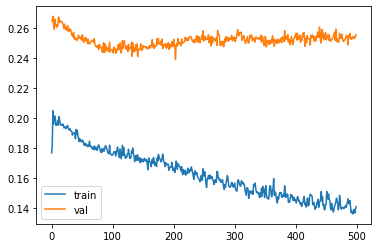

Epoch 1/500
50/79 [=================>............] - ETA: 0s - loss: 0.4262 - mae: 0.1353
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7171 - mae: 0.1701 - val_loss: 1.1222 - val_mae: 0.2405
Epoch 2/500
50/79 [=================>............] - ETA: 0s - loss: 0.3920 - mae: 0.1281
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5254 - mae: 0.1507 - val_loss: 1.0519 - val_mae: 0.2542
Epoch 3/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3863 - mae: 0.1388
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4545 - mae: 0.1518 - val_loss: 1.0129 - val_mae: 0.2485
Epoch 4/500
50/79 [=================>............] - ETA: 0s - loss: 0.3818 - mae: 0.1272
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4565 - mae: 0.1508 -

Epoch 33/500
50/79 [=================>............] - ETA: 0s - loss: 0.3404 - mae: 0.1282
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3808 - mae: 0.1434 - val_loss: 1.0124 - val_mae: 0.2532
Epoch 34/500
47/79 [================>.............] - ETA: 0s - loss: 0.3536 - mae: 0.1321
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3813 - mae: 0.1437 - val_loss: 0.9944 - val_mae: 0.2579
Epoch 35/500
50/79 [=================>............] - ETA: 0s - loss: 0.3499 - mae: 0.1309
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3859 - mae: 0.1440 - val_loss: 0.9976 - val_mae: 0.2510
Epoch 36/500
41/79 [==============>...............] - ETA: 0s - loss: 0.3739 - mae: 0.1349
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3879 - mae: 0.14

Epoch 65/500
78/79 [============================>.] - ETA: 0s - loss: 0.3711 - mae: 0.1387
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3738 - mae: 0.1400 - val_loss: 0.9955 - val_mae: 0.2556
Epoch 66/500
45/79 [================>.............] - ETA: 0s - loss: 0.3702 - mae: 0.1352
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3700 - mae: 0.1404 - val_loss: 1.0050 - val_mae: 0.2555
Epoch 67/500
46/79 [================>.............] - ETA: 0s - loss: 0.3610 - mae: 0.1308
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3651 - mae: 0.1383 - val_loss: 1.0227 - val_mae: 0.2514
Epoch 68/500
41/79 [==============>...............] - ETA: 0s - loss: 0.3561 - mae: 0.1285
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3642 - mae: 0.13

Epoch 97/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3138 - mae: 0.1149
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3568 - mae: 0.1352 - val_loss: 1.0379 - val_mae: 0.2558
Epoch 98/500
50/79 [=================>............] - ETA: 0s - loss: 0.3208 - mae: 0.1215
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3498 - mae: 0.1347 - val_loss: 1.0181 - val_mae: 0.2539
Epoch 99/500
50/79 [=================>............] - ETA: 0s - loss: 0.3167 - mae: 0.1227
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3451 - mae: 0.1339 - val_loss: 1.0735 - val_mae: 0.2470
Epoch 100/500
44/79 [===============>..............] - ETA: 0s - loss: 0.3529 - mae: 0.1286
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3458 - mae: 0.1

Epoch 129/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2985 - mae: 0.1130
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3254 - mae: 0.1258 - val_loss: 1.0778 - val_mae: 0.2423
Epoch 130/500
49/79 [=================>............] - ETA: 0s - loss: 0.3048 - mae: 0.1171
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3231 - mae: 0.1264 - val_loss: 1.1437 - val_mae: 0.2411
Epoch 131/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2958 - mae: 0.1129
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3259 - mae: 0.1265 - val_loss: 1.1247 - val_mae: 0.2415
Epoch 132/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2948 - mae: 0.1124
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3239 - mae: 

Epoch 161/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2851 - mae: 0.1097
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3144 - mae: 0.1228 - val_loss: 1.1844 - val_mae: 0.2436
Epoch 162/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2867 - mae: 0.1099
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3106 - mae: 0.1227 - val_loss: 1.2137 - val_mae: 0.2422
Epoch 163/500
49/79 [=================>............] - ETA: 0s - loss: 0.2934 - mae: 0.1108
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3120 - mae: 0.1218 - val_loss: 1.1167 - val_mae: 0.2476
Epoch 164/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3005 - mae: 0.1176
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3209 - mae: 

Epoch 193/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2880 - mae: 0.1082
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3048 - mae: 0.1190 - val_loss: 1.2153 - val_mae: 0.2421
Epoch 194/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2791 - mae: 0.1077
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3045 - mae: 0.1206 - val_loss: 1.1474 - val_mae: 0.2442
Epoch 195/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2822 - mae: 0.1093
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3054 - mae: 0.1206 - val_loss: 1.2167 - val_mae: 0.2401
Epoch 196/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2769 - mae: 0.1064
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2994 - mae: 

Epoch 225/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2803 - mae: 0.1063
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2991 - mae: 0.1184 - val_loss: 1.2376 - val_mae: 0.2428
Epoch 226/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2788 - mae: 0.1051
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3025 - mae: 0.1193 - val_loss: 1.2526 - val_mae: 0.2465
Epoch 227/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2843 - mae: 0.1086
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3156 - mae: 0.1231 - val_loss: 1.1680 - val_mae: 0.2450
Epoch 228/500
50/79 [=================>............] - ETA: 0s - loss: 0.2861 - mae: 0.1101
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3129 - mae: 

Epoch 257/500
44/79 [===============>..............] - ETA: 0s - loss: 0.3112 - mae: 0.1173
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2969 - mae: 0.1186 - val_loss: 1.2159 - val_mae: 0.2410
Epoch 258/500
54/79 [===================>..........] - ETA: 0s - loss: 0.2764 - mae: 0.1068
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2918 - mae: 0.1168 - val_loss: 1.2619 - val_mae: 0.2409
Epoch 259/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2733 - mae: 0.1030
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2913 - mae: 0.1153 - val_loss: 1.1873 - val_mae: 0.2460
Epoch 260/500
43/79 [===============>..............] - ETA: 0s - loss: 0.3151 - mae: 0.1190
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2922 - mae: 

Epoch 289/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2893 - mae: 0.1072
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3097 - mae: 0.1198 - val_loss: 1.1977 - val_mae: 0.2503
Epoch 290/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2731 - mae: 0.1062
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2970 - mae: 0.1204 - val_loss: 1.3007 - val_mae: 0.2418
Epoch 291/500
50/79 [=================>............] - ETA: 0s - loss: 0.2749 - mae: 0.1015
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2962 - mae: 0.1160 - val_loss: 1.2120 - val_mae: 0.2464
Epoch 292/500
48/79 [=================>............] - ETA: 0s - loss: 0.2858 - mae: 0.1070
Epoch 00292: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2968 - mae: 

Epoch 321/500
50/79 [=================>............] - ETA: 0s - loss: 0.2777 - mae: 0.1035
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2907 - mae: 0.1147 - val_loss: 1.2348 - val_mae: 0.2434
Epoch 322/500
61/79 [======================>.......] - ETA: 0s - loss: 0.2607 - mae: 0.1040
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2851 - mae: 0.1138 - val_loss: 1.3143 - val_mae: 0.2422
Epoch 323/500
67/79 [========================>.....] - ETA: 0s - loss: 0.2617 - mae: 0.1031
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2819 - mae: 0.1109 - val_loss: 1.2585 - val_mae: 0.2429
Epoch 324/500
49/79 [=================>............] - ETA: 0s - loss: 0.2774 - mae: 0.1043
Epoch 00324: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2891 - mae: 

Epoch 353/500
45/79 [================>.............] - ETA: 0s - loss: 0.3181 - mae: 0.1135
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3053 - mae: 0.1210 - val_loss: 1.1988 - val_mae: 0.2412
Epoch 354/500
46/79 [================>.............] - ETA: 0s - loss: 0.3000 - mae: 0.1115
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2932 - mae: 0.1170 - val_loss: 1.2193 - val_mae: 0.2420
Epoch 355/500
46/79 [================>.............] - ETA: 0s - loss: 0.2927 - mae: 0.1088
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2867 - mae: 0.1145 - val_loss: 1.2433 - val_mae: 0.2422
Epoch 356/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2658 - mae: 0.1017
Epoch 00356: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2837 - mae: 

Epoch 385/500
45/79 [================>.............] - ETA: 0s - loss: 0.2808 - mae: 0.1064
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2747 - mae: 0.1098 - val_loss: 1.2813 - val_mae: 0.2405
Epoch 386/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2580 - mae: 0.0968
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2750 - mae: 0.1090 - val_loss: 1.3029 - val_mae: 0.2417
Epoch 387/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2593 - mae: 0.0988
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2747 - mae: 0.1093 - val_loss: 1.3276 - val_mae: 0.2430
Epoch 388/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2617 - mae: 0.0982
Epoch 00388: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2735 - mae: 

Epoch 417/500
40/79 [==============>...............] - ETA: 0s - loss: 0.2973 - mae: 0.1112
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2960 - mae: 0.1163 - val_loss: 1.2839 - val_mae: 0.2407
Epoch 418/500
45/79 [================>.............] - ETA: 0s - loss: 0.2843 - mae: 0.1074
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2896 - mae: 0.1143 - val_loss: 1.3107 - val_mae: 0.2425
Epoch 419/500
38/79 [=============>................] - ETA: 0s - loss: 0.2878 - mae: 0.1065
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3047 - mae: 0.1176 - val_loss: 1.2238 - val_mae: 0.2464
Epoch 420/500
47/79 [================>.............] - ETA: 0s - loss: 0.2686 - mae: 0.1049
Epoch 00420: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2854 - mae: 

47/79 [================>.............] - ETA: 0s - loss: 0.2756 - mae: 0.1046
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2712 - mae: 0.1091 - val_loss: 1.3154 - val_mae: 0.2410
Epoch 449/500
47/79 [================>.............] - ETA: 0s - loss: 0.2731 - mae: 0.1055
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2808 - mae: 0.1110 - val_loss: 1.4128 - val_mae: 0.2383
Epoch 450/500
45/79 [================>.............] - ETA: 0s - loss: 0.2833 - mae: 0.1055
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2810 - mae: 0.1112 - val_loss: 1.2769 - val_mae: 0.2458
Epoch 451/500
72/79 [==========================>...] - ETA: 0s - loss: 0.2627 - mae: 0.1063
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2764 - mae: 0.1112 - val_l

Epoch 480/500
45/79 [================>.............] - ETA: 0s - loss: 0.2768 - mae: 0.1048
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2964 - mae: 0.1146 - val_loss: 1.3013 - val_mae: 0.2444
Epoch 481/500
43/79 [===============>..............] - ETA: 0s - loss: 0.3006 - mae: 0.1159
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2917 - mae: 0.1163 - val_loss: 1.3433 - val_mae: 0.2396
Epoch 482/500
50/79 [=================>............] - ETA: 0s - loss: 0.2662 - mae: 0.1030
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2949 - mae: 0.1157 - val_loss: 1.2530 - val_mae: 0.2495
Epoch 483/500
49/79 [=================>............] - ETA: 0s - loss: 0.2717 - mae: 0.1074
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2838 - mae: 

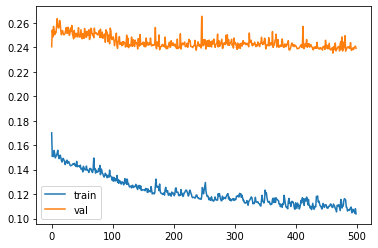

Epoch 1/500
65/79 [=======================>......] - ETA: 0s - loss: 0.5299 - mae: 0.1194
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5486 - mae: 0.1290 - val_loss: 1.3298 - val_mae: 0.2430
Epoch 2/500
42/79 [==============>...............] - ETA: 0s - loss: 0.4896 - mae: 0.1277
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4491 - mae: 0.1292 - val_loss: 1.1300 - val_mae: 0.2418
Epoch 3/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4296 - mae: 0.1301
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3965 - mae: 0.1298 - val_loss: 1.0772 - val_mae: 0.2443
Epoch 4/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4115 - mae: 0.1341
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3707 - mae: 0.1319 -

Epoch 33/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3261 - mae: 0.1223
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2996 - mae: 0.1195 - val_loss: 1.1891 - val_mae: 0.2435
Epoch 34/500
50/79 [=================>............] - ETA: 0s - loss: 0.3076 - mae: 0.1165
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2998 - mae: 0.1188 - val_loss: 1.2362 - val_mae: 0.2438
Epoch 35/500
50/79 [=================>............] - ETA: 0s - loss: 0.3047 - mae: 0.1110
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2992 - mae: 0.1167 - val_loss: 1.1986 - val_mae: 0.2460
Epoch 36/500
49/79 [=================>............] - ETA: 0s - loss: 0.3110 - mae: 0.1190
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3015 - mae: 0.12

Epoch 65/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2992 - mae: 0.1113
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2801 - mae: 0.1126 - val_loss: 1.3653 - val_mae: 0.2491
Epoch 66/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3046 - mae: 0.1142
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2828 - mae: 0.1139 - val_loss: 1.3404 - val_mae: 0.2491
Epoch 67/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2874 - mae: 0.1097
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2733 - mae: 0.1114 - val_loss: 1.3667 - val_mae: 0.2485
Epoch 68/500
44/79 [===============>..............] - ETA: 0s - loss: 0.2699 - mae: 0.1066
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2719 - mae: 0.10

Epoch 97/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2763 - mae: 0.1053
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2582 - mae: 0.1048 - val_loss: 1.4302 - val_mae: 0.2483
Epoch 98/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2832 - mae: 0.1071
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2644 - mae: 0.1049 - val_loss: 1.4380 - val_mae: 0.2488
Epoch 99/500
50/79 [=================>............] - ETA: 0s - loss: 0.2607 - mae: 0.1031
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2597 - mae: 0.1077 - val_loss: 1.4224 - val_mae: 0.2464
Epoch 100/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2814 - mae: 0.1072
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2591 - mae: 0.1

Epoch 129/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2705 - mae: 0.1045
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2571 - mae: 0.1043 - val_loss: 1.4464 - val_mae: 0.2457
Epoch 130/500
45/79 [================>.............] - ETA: 0s - loss: 0.2422 - mae: 0.0970
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2482 - mae: 0.0995 - val_loss: 1.5217 - val_mae: 0.2493
Epoch 131/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2906 - mae: 0.1105
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2729 - mae: 0.1099 - val_loss: 1.4385 - val_mae: 0.2462
Epoch 132/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2557 - mae: 0.1001
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2458 - mae: 

Epoch 161/500
77/79 [============================>.] - ETA: 0s - loss: 0.2535 - mae: 0.1000
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2506 - mae: 0.0994 - val_loss: 1.5150 - val_mae: 0.2476
Epoch 162/500
54/79 [===================>..........] - ETA: 0s - loss: 0.2704 - mae: 0.1028
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2520 - mae: 0.1003 - val_loss: 1.4864 - val_mae: 0.2445
Epoch 163/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2446 - mae: 0.0962
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2294 - mae: 0.0943 - val_loss: 1.5006 - val_mae: 0.2480
Epoch 164/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2413 - mae: 0.0951
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2269 - mae: 

Epoch 193/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2584 - mae: 0.0991
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2457 - mae: 0.0994 - val_loss: 1.5397 - val_mae: 0.2483
Epoch 194/500
40/79 [==============>...............] - ETA: 0s - loss: 0.2469 - mae: 0.0910
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2587 - mae: 0.1025 - val_loss: 1.5124 - val_mae: 0.2501
Epoch 195/500
41/79 [==============>...............] - ETA: 0s - loss: 0.2407 - mae: 0.0910
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2416 - mae: 0.0976 - val_loss: 1.5301 - val_mae: 0.2514
Epoch 196/500
43/79 [===============>..............] - ETA: 0s - loss: 0.2263 - mae: 0.0917
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2286 - mae: 

Epoch 225/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2536 - mae: 0.1007
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2406 - mae: 0.0999 - val_loss: 1.5040 - val_mae: 0.2427
Epoch 226/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2502 - mae: 0.0965
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2352 - mae: 0.0959 - val_loss: 1.5127 - val_mae: 0.2469
Epoch 227/500
48/79 [=================>............] - ETA: 0s - loss: 0.2279 - mae: 0.0870
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2264 - mae: 0.0919 - val_loss: 1.5421 - val_mae: 0.2494
Epoch 228/500
48/79 [=================>............] - ETA: 0s - loss: 0.2222 - mae: 0.0879
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2237 - mae: 

Epoch 257/500
49/79 [=================>............] - ETA: 0s - loss: 0.2201 - mae: 0.0872
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2217 - mae: 0.0918 - val_loss: 1.5812 - val_mae: 0.2466
Epoch 258/500
50/79 [=================>............] - ETA: 0s - loss: 0.2202 - mae: 0.0846
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2218 - mae: 0.0893 - val_loss: 1.6325 - val_mae: 0.2503
Epoch 259/500
45/79 [================>.............] - ETA: 0s - loss: 0.2557 - mae: 0.0991
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2458 - mae: 0.0987 - val_loss: 1.6221 - val_mae: 0.2512
Epoch 260/500
45/79 [================>.............] - ETA: 0s - loss: 0.2453 - mae: 0.0958
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2411 - mae: 

Epoch 289/500
49/79 [=================>............] - ETA: 0s - loss: 0.2655 - mae: 0.0938
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2590 - mae: 0.0984 - val_loss: 1.5376 - val_mae: 0.2499
Epoch 290/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2535 - mae: 0.1017
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2350 - mae: 0.0971 - val_loss: 1.5906 - val_mae: 0.2468
Epoch 291/500
48/79 [=================>............] - ETA: 0s - loss: 0.2167 - mae: 0.0862
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2132 - mae: 0.0898 - val_loss: 1.6111 - val_mae: 0.2489
Epoch 292/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2136 - mae: 0.0830
Epoch 00292: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2082 - mae: 

Epoch 321/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2188 - mae: 0.0885
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2099 - mae: 0.0880 - val_loss: 1.6740 - val_mae: 0.2503
Epoch 322/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2300 - mae: 0.0928
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2150 - mae: 0.0897 - val_loss: 1.6586 - val_mae: 0.2513
Epoch 323/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2436 - mae: 0.0985
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2257 - mae: 0.0933 - val_loss: 1.6707 - val_mae: 0.2529
Epoch 324/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2368 - mae: 0.0967
Epoch 00324: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2176 - mae: 

Epoch 353/500
75/79 [===========================>..] - ETA: 0s - loss: 0.2031 - mae: 0.0835
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2050 - mae: 0.0847 - val_loss: 1.6534 - val_mae: 0.2496
Epoch 354/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2156 - mae: 0.0883
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2036 - mae: 0.0845 - val_loss: 1.6422 - val_mae: 0.2506
Epoch 355/500
54/79 [===================>..........] - ETA: 0s - loss: 0.2240 - mae: 0.0924
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2163 - mae: 0.0896 - val_loss: 1.6636 - val_mae: 0.2495
Epoch 356/500
50/79 [=================>............] - ETA: 0s - loss: 0.2230 - mae: 0.0870
Epoch 00356: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2204 - mae: 

Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2144 - mae: 0.0848 - val_loss: 1.6869 - val_mae: 0.2501
Epoch 385/500
47/79 [================>.............] - ETA: 0s - loss: 0.2350 - mae: 0.0952
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2328 - mae: 0.0977 - val_loss: 1.6243 - val_mae: 0.2457
Epoch 386/500
51/79 [==================>...........] - ETA: 0s - loss: 0.2446 - mae: 0.0942
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2370 - mae: 0.0956 - val_loss: 1.6376 - val_mae: 0.2493
Epoch 387/500
40/79 [==============>...............] - ETA: 0s - loss: 0.2035 - mae: 0.0803
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2252 - mae: 0.0900 - val_loss: 1.5902 - val_mae: 0.2464
Epoch 388/500
52/79 [==================>........

Epoch 416/500
54/79 [===================>..........] - ETA: 0s - loss: 0.2147 - mae: 0.0836
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2075 - mae: 0.0836 - val_loss: 1.6473 - val_mae: 0.2482
Epoch 417/500
68/79 [========================>.....] - ETA: 0s - loss: 0.2095 - mae: 0.0868
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2208 - mae: 0.0908 - val_loss: 1.6954 - val_mae: 0.2494
Epoch 418/500
42/79 [==============>...............] - ETA: 0s - loss: 0.2049 - mae: 0.0826
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1964 - mae: 0.0819 - val_loss: 1.6965 - val_mae: 0.2492
Epoch 419/500
50/79 [=================>............] - ETA: 0s - loss: 0.2160 - mae: 0.0846
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2132 - mae: 

Epoch 448/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2161 - mae: 0.0873
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1987 - mae: 0.0827 - val_loss: 1.7587 - val_mae: 0.2483
Epoch 449/500
45/79 [================>.............] - ETA: 0s - loss: 0.2368 - mae: 0.0918
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2299 - mae: 0.0919 - val_loss: 1.7306 - val_mae: 0.2472
Epoch 450/500
53/79 [===================>..........] - ETA: 0s - loss: 0.2110 - mae: 0.0867
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1958 - mae: 0.0822 - val_loss: 1.6856 - val_mae: 0.2468
Epoch 451/500
52/79 [==================>...........] - ETA: 0s - loss: 0.2032 - mae: 0.0820
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1912 - mae: 

Epoch 480/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1949 - mae: 0.0783
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2132 - mae: 0.0849 - val_loss: 1.7017 - val_mae: 0.2510
Epoch 481/500
53/79 [===================>..........] - ETA: 0s - loss: 0.1948 - mae: 0.0818
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1824 - mae: 0.0784 - val_loss: 1.7249 - val_mae: 0.2489
Epoch 482/500
54/79 [===================>..........] - ETA: 0s - loss: 0.1978 - mae: 0.0797
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1925 - mae: 0.0790 - val_loss: 1.6934 - val_mae: 0.2523
Epoch 483/500
55/79 [===================>..........] - ETA: 0s - loss: 0.1969 - mae: 0.0786
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.1961 - mae: 

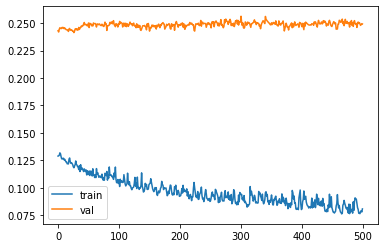

Epoch 1/500
51/88 [================>.............] - ETA: 0s - loss: 0.9731 - mae: 0.1688
Epoch 00001: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.9872 - mae: 0.1980 - val_loss: 1.4875 - val_mae: 0.2525
Epoch 2/500
50/88 [================>.............] - ETA: 0s - loss: 0.8596 - mae: 0.1791
Epoch 00002: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.8112 - mae: 0.1928 - val_loss: 1.1942 - val_mae: 0.2559
Epoch 3/500
78/88 [=========================>....] - ETA: 0s - loss: 0.6737 - mae: 0.1992
Epoch 00003: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.6666 - mae: 0.2020 - val_loss: 1.0780 - val_mae: 0.2632
Epoch 4/500
47/88 [===============>..............] - ETA: 0s - loss: 0.6324 - mae: 0.2047
Epoch 00004: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.5915 - mae: 0.2052 -

Epoch 33/500
47/88 [===============>..............] - ETA: 0s - loss: 0.4661 - mae: 0.1945
Epoch 00033: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4623 - mae: 0.1947 - val_loss: 0.9916 - val_mae: 0.2619
Epoch 34/500
80/88 [==========================>...] - ETA: 0s - loss: 0.4560 - mae: 0.1923
Epoch 00034: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4575 - mae: 0.1918 - val_loss: 1.0131 - val_mae: 0.2609
Epoch 35/500
84/88 [===========================>..] - ETA: 0s - loss: 0.4706 - mae: 0.1933
Epoch 00035: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4719 - mae: 0.1939 - val_loss: 0.9783 - val_mae: 0.2596
Epoch 36/500
87/88 [============================>.] - ETA: 0s - loss: 0.4618 - mae: 0.1940
Epoch 00036: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4609 - mae: 0.19

Epoch 65/500
43/88 [=============>................] - ETA: 0s - loss: 0.4272 - mae: 0.1791
Epoch 00065: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4265 - mae: 0.1785 - val_loss: 1.0124 - val_mae: 0.2516
Epoch 66/500
50/88 [================>.............] - ETA: 0s - loss: 0.4189 - mae: 0.1750
Epoch 00066: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4296 - mae: 0.1788 - val_loss: 1.0122 - val_mae: 0.2541
Epoch 67/500
47/88 [===============>..............] - ETA: 0s - loss: 0.4459 - mae: 0.1826
Epoch 00067: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4380 - mae: 0.1802 - val_loss: 0.9964 - val_mae: 0.2530
Epoch 68/500
52/88 [================>.............] - ETA: 0s - loss: 0.4127 - mae: 0.1742
Epoch 00068: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4321 - mae: 0.18

Epoch 97/500
52/88 [================>.............] - ETA: 0s - loss: 0.3793 - mae: 0.1610
Epoch 00097: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4066 - mae: 0.1682 - val_loss: 1.0323 - val_mae: 0.2497
Epoch 98/500
47/88 [===============>..............] - ETA: 0s - loss: 0.4057 - mae: 0.1688
Epoch 00098: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4105 - mae: 0.1696 - val_loss: 1.0672 - val_mae: 0.2514
Epoch 99/500
47/88 [===============>..............] - ETA: 0s - loss: 0.3993 - mae: 0.1680
Epoch 00099: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4032 - mae: 0.1681 - val_loss: 1.0716 - val_mae: 0.2507
Epoch 100/500
46/88 [==============>...............] - ETA: 0s - loss: 0.4011 - mae: 0.1666
Epoch 00100: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4038 - mae: 0.1

Epoch 129/500
50/88 [================>.............] - ETA: 0s - loss: 0.3844 - mae: 0.1584
Epoch 00129: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3905 - mae: 0.1619 - val_loss: 1.1237 - val_mae: 0.2505
Epoch 130/500
51/88 [================>.............] - ETA: 0s - loss: 0.3697 - mae: 0.1529
Epoch 00130: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3826 - mae: 0.1588 - val_loss: 1.1376 - val_mae: 0.2544
Epoch 131/500
51/88 [================>.............] - ETA: 0s - loss: 0.3701 - mae: 0.1525
Epoch 00131: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3797 - mae: 0.1574 - val_loss: 1.1615 - val_mae: 0.2535
Epoch 132/500
49/88 [===============>..............] - ETA: 0s - loss: 0.3785 - mae: 0.1554
Epoch 00132: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3839 - mae: 

Epoch 00160: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3706 - mae: 0.1566 - val_loss: 1.1982 - val_mae: 0.2516
Epoch 161/500
71/88 [=======================>......] - ETA: 0s - loss: 0.3695 - mae: 0.1522
Epoch 00161: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3734 - mae: 0.1548 - val_loss: 1.2134 - val_mae: 0.2554
Epoch 162/500
44/88 [==============>...............] - ETA: 0s - loss: 0.3683 - mae: 0.1524
Epoch 00162: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3601 - mae: 0.1517 - val_loss: 1.2248 - val_mae: 0.2525
Epoch 163/500
88/88 [==============================] - ETA: 0s - loss: 0.3620 - mae: 0.1534
Epoch 00163: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3620 - mae: 0.1534 - val_loss: 1.2393 - val_mae: 0.2534
Epoch 164/500
46/88 [==============>............

Epoch 192/500
87/88 [============================>.] - ETA: 0s - loss: 0.3649 - mae: 0.1550
Epoch 00192: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3640 - mae: 0.1546 - val_loss: 1.2590 - val_mae: 0.2517
Epoch 193/500
59/88 [===================>..........] - ETA: 0s - loss: 0.3486 - mae: 0.1463
Epoch 00193: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3511 - mae: 0.1516 - val_loss: 1.2809 - val_mae: 0.2506
Epoch 194/500
44/88 [==============>...............] - ETA: 0s - loss: 0.3524 - mae: 0.1477
Epoch 00194: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3435 - mae: 0.1467 - val_loss: 1.2909 - val_mae: 0.2534
Epoch 195/500
50/88 [================>.............] - ETA: 0s - loss: 0.3381 - mae: 0.1410
Epoch 00195: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3431 - mae: 

Epoch 224/500
46/88 [==============>...............] - ETA: 0s - loss: 0.3331 - mae: 0.1412
Epoch 00224: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3399 - mae: 0.1438 - val_loss: 1.3085 - val_mae: 0.2522
Epoch 225/500
48/88 [===============>..............] - ETA: 0s - loss: 0.3624 - mae: 0.1536
Epoch 00225: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3548 - mae: 0.1509 - val_loss: 1.2983 - val_mae: 0.2488
Epoch 226/500
85/88 [===========================>..] - ETA: 0s - loss: 0.3427 - mae: 0.1454
Epoch 00226: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3442 - mae: 0.1462 - val_loss: 1.3261 - val_mae: 0.2504
Epoch 227/500
45/88 [==============>...............] - ETA: 0s - loss: 0.3472 - mae: 0.1459
Epoch 00227: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3384 - mae: 

Epoch 256/500
86/88 [============================>.] - ETA: 0s - loss: 0.3320 - mae: 0.1414
Epoch 00256: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3328 - mae: 0.1417 - val_loss: 1.2862 - val_mae: 0.2501
Epoch 257/500
45/88 [==============>...............] - ETA: 0s - loss: 0.3278 - mae: 0.1395
Epoch 00257: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3270 - mae: 0.1398 - val_loss: 1.3193 - val_mae: 0.2486
Epoch 258/500
81/88 [==========================>...] - ETA: 0s - loss: 0.3192 - mae: 0.1365
Epoch 00258: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3213 - mae: 0.1376 - val_loss: 1.3160 - val_mae: 0.2507
Epoch 259/500
80/88 [==========================>...] - ETA: 0s - loss: 0.3142 - mae: 0.1359
Epoch 00259: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3192 - mae: 

78/88 [=========================>....] - ETA: 0s - loss: 0.3315 - mae: 0.1424
Epoch 00287: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3341 - mae: 0.1441 - val_loss: 1.3307 - val_mae: 0.2511
Epoch 288/500
44/88 [==============>...............] - ETA: 0s - loss: 0.3311 - mae: 0.1425
Epoch 00288: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3321 - mae: 0.1436 - val_loss: 1.3410 - val_mae: 0.2517
Epoch 289/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3311 - mae: 0.1352
Epoch 00289: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3377 - mae: 0.1420 - val_loss: 1.3580 - val_mae: 0.2503
Epoch 290/500
70/88 [======================>.......] - ETA: 0s - loss: 0.3440 - mae: 0.1405
Epoch 00290: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3358 - mae: 0.1410 - val_l

Epoch 319/500
75/88 [========================>.....] - ETA: 0s - loss: 0.3103 - mae: 0.1341
Epoch 00319: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3096 - mae: 0.1346 - val_loss: 1.3994 - val_mae: 0.2467
Epoch 320/500
85/88 [===========================>..] - ETA: 0s - loss: 0.3268 - mae: 0.1375
Epoch 00320: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3308 - mae: 0.1390 - val_loss: 1.3981 - val_mae: 0.2485
Epoch 321/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3343 - mae: 0.1389
Epoch 00321: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3366 - mae: 0.1409 - val_loss: 1.3518 - val_mae: 0.2454
Epoch 322/500
85/88 [===========================>..] - ETA: 0s - loss: 0.3177 - mae: 0.1349
Epoch 00322: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3209 - mae: 

62/88 [====================>.........] - ETA: 0s - loss: 0.3038 - mae: 0.1293
Epoch 00350: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3226 - mae: 0.1369 - val_loss: 1.4059 - val_mae: 0.2544
Epoch 351/500
76/88 [========================>.....] - ETA: 0s - loss: 0.3222 - mae: 0.1350
Epoch 00351: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3222 - mae: 0.1354 - val_loss: 1.4334 - val_mae: 0.2508
Epoch 352/500
88/88 [==============================] - ETA: 0s - loss: 0.3076 - mae: 0.1330
Epoch 00352: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3076 - mae: 0.1330 - val_loss: 1.4448 - val_mae: 0.2518
Epoch 353/500
82/88 [==========================>...] - ETA: 0s - loss: 0.3060 - mae: 0.1320
Epoch 00353: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3058 - mae: 0.1321 - val_l

Epoch 382/500
81/88 [==========================>...] - ETA: 0s - loss: 0.3097 - mae: 0.1315
Epoch 00382: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3129 - mae: 0.1331 - val_loss: 1.4532 - val_mae: 0.2583
Epoch 383/500
43/88 [=============>................] - ETA: 0s - loss: 0.2982 - mae: 0.1298
Epoch 00383: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2997 - mae: 0.1310 - val_loss: 1.4690 - val_mae: 0.2556
Epoch 384/500
48/88 [===============>..............] - ETA: 0s - loss: 0.2894 - mae: 0.1252
Epoch 00384: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2931 - mae: 0.1268 - val_loss: 1.4567 - val_mae: 0.2542
Epoch 385/500
45/88 [==============>...............] - ETA: 0s - loss: 0.3273 - mae: 0.1323
Epoch 00385: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3166 - mae: 

Epoch 414/500
70/88 [======================>.......] - ETA: 0s - loss: 0.3087 - mae: 0.1302
Epoch 00414: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3030 - mae: 0.1295 - val_loss: 1.4137 - val_mae: 0.2482
Epoch 415/500
77/88 [=========================>....] - ETA: 0s - loss: 0.3117 - mae: 0.1329
Epoch 00415: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3220 - mae: 0.1352 - val_loss: 1.3773 - val_mae: 0.2539
Epoch 416/500
74/88 [========================>.....] - ETA: 0s - loss: 0.3526 - mae: 0.1386
Epoch 00416: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3472 - mae: 0.1381 - val_loss: 1.4079 - val_mae: 0.2555
Epoch 417/500
73/88 [=======================>......] - ETA: 0s - loss: 0.3192 - mae: 0.1348
Epoch 00417: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3146 - mae: 

Epoch 00445: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2943 - mae: 0.1270 - val_loss: 1.4098 - val_mae: 0.2524
Epoch 446/500
69/88 [======================>.......] - ETA: 0s - loss: 0.2887 - mae: 0.1248
Epoch 00446: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2878 - mae: 0.1250 - val_loss: 1.4660 - val_mae: 0.2475
Epoch 447/500
82/88 [==========================>...] - ETA: 0s - loss: 0.3178 - mae: 0.1306
Epoch 00447: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3203 - mae: 0.1314 - val_loss: 1.4206 - val_mae: 0.2532
Epoch 448/500
47/88 [===============>..............] - ETA: 0s - loss: 0.3326 - mae: 0.1372
Epoch 00448: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3296 - mae: 0.1372 - val_loss: 1.4428 - val_mae: 0.2527
Epoch 449/500
68/88 [======================>....

Epoch 477/500
73/88 [=======================>......] - ETA: 0s - loss: 0.3012 - mae: 0.1278
Epoch 00477: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2961 - mae: 0.1266 - val_loss: 1.4714 - val_mae: 0.2514
Epoch 478/500
79/88 [=========================>....] - ETA: 0s - loss: 0.2870 - mae: 0.1244
Epoch 00478: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2863 - mae: 0.1238 - val_loss: 1.4909 - val_mae: 0.2514
Epoch 479/500
77/88 [=========================>....] - ETA: 0s - loss: 0.2855 - mae: 0.1228
Epoch 00479: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2860 - mae: 0.1227 - val_loss: 1.4970 - val_mae: 0.2521
Epoch 480/500
77/88 [=========================>....] - ETA: 0s - loss: 0.2834 - mae: 0.1225
Epoch 00480: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2853 - mae: 

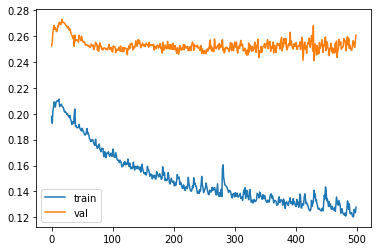

Epoch 1/500
76/78 [============================>.] - ETA: 0s - loss: 1.2051 - mae: 0.2943
Epoch 00001: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 1.1914 - mae: 0.2919 - val_loss: 0.3716 - val_mae: 0.1599
Epoch 2/500
43/78 [===============>..............] - ETA: 0s - loss: 0.8499 - mae: 0.2933
Epoch 00002: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.9133 - mae: 0.2803 - val_loss: 0.3983 - val_mae: 0.1893
Epoch 3/500
44/78 [===============>..............] - ETA: 0s - loss: 0.7675 - mae: 0.3053
Epoch 00003: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.8129 - mae: 0.2894 - val_loss: 0.4069 - val_mae: 0.1937
Epoch 4/500
43/78 [===============>..............] - ETA: 0s - loss: 0.7703 - mae: 0.3015
Epoch 00004: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.7904 - mae: 0.2855 -

Epoch 33/500
44/78 [===============>..............] - ETA: 0s - loss: 0.6997 - mae: 0.2937
Epoch 00033: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6396 - mae: 0.2715 - val_loss: 0.4203 - val_mae: 0.1939
Epoch 34/500
41/78 [==============>...............] - ETA: 0s - loss: 0.6960 - mae: 0.2928
Epoch 00034: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6330 - mae: 0.2703 - val_loss: 0.4203 - val_mae: 0.1938
Epoch 35/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6955 - mae: 0.2921
Epoch 00035: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6381 - mae: 0.2719 - val_loss: 0.4141 - val_mae: 0.1921
Epoch 36/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6934 - mae: 0.2923
Epoch 00036: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.6333 - mae: 0.27

Epoch 00064: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6100 - mae: 0.2648 - val_loss: 0.4302 - val_mae: 0.1886
Epoch 65/500
41/78 [==============>...............] - ETA: 0s - loss: 0.6754 - mae: 0.2894
Epoch 00065: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.6159 - mae: 0.2659 - val_loss: 0.4448 - val_mae: 0.1913
Epoch 66/500
47/78 [=================>............] - ETA: 0s - loss: 0.6829 - mae: 0.2893
Epoch 00066: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6252 - mae: 0.2695 - val_loss: 0.4548 - val_mae: 0.1956
Epoch 67/500
47/78 [=================>............] - ETA: 0s - loss: 0.6861 - mae: 0.2930
Epoch 00067: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6173 - mae: 0.2681 - val_loss: 0.4417 - val_mae: 0.1860
Epoch 68/500
46/78 [================>.............]

Epoch 96/500
66/78 [========================>.....] - ETA: 0s - loss: 0.5794 - mae: 0.2546
Epoch 00096: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5687 - mae: 0.2502 - val_loss: 0.4931 - val_mae: 0.1809
Epoch 97/500
55/78 [====================>.........] - ETA: 0s - loss: 0.6237 - mae: 0.2723
Epoch 00097: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 4ms/step - loss: 0.5688 - mae: 0.2508 - val_loss: 0.5061 - val_mae: 0.1819
Epoch 98/500
40/78 [==============>...............] - ETA: 0s - loss: 0.6466 - mae: 0.2798
Epoch 00098: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5639 - mae: 0.2483 - val_loss: 0.5033 - val_mae: 0.1809
Epoch 99/500
71/78 [==========================>...] - ETA: 0s - loss: 0.5686 - mae: 0.2503
Epoch 00099: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5622 - mae: 0.24

Epoch 00127: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5422 - mae: 0.2387 - val_loss: 0.5409 - val_mae: 0.1767
Epoch 128/500
49/78 [=================>............] - ETA: 0s - loss: 0.6478 - mae: 0.2808
Epoch 00128: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5379 - mae: 0.2386 - val_loss: 0.5327 - val_mae: 0.1716
Epoch 129/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6630 - mae: 0.2797
Epoch 00129: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5501 - mae: 0.2391 - val_loss: 0.5337 - val_mae: 0.1694
Epoch 130/500
45/78 [================>.............] - ETA: 0s - loss: 0.6982 - mae: 0.2829
Epoch 00130: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5750 - mae: 0.2449 - val_loss: 0.5466 - val_mae: 0.1780
Epoch 131/500
46/78 [================>..........

Epoch 159/500
48/78 [=================>............] - ETA: 0s - loss: 0.6408 - mae: 0.2784
Epoch 00159: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5384 - mae: 0.2381 - val_loss: 0.4894 - val_mae: 0.1677
Epoch 160/500
47/78 [=================>............] - ETA: 0s - loss: 0.6324 - mae: 0.2755
Epoch 00160: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5366 - mae: 0.2392 - val_loss: 0.4918 - val_mae: 0.1685
Epoch 161/500
46/78 [================>.............] - ETA: 0s - loss: 0.6323 - mae: 0.2747
Epoch 00161: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5350 - mae: 0.2378 - val_loss: 0.4987 - val_mae: 0.1687
Epoch 162/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6202 - mae: 0.2723
Epoch 00162: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5265 - mae: 

Epoch 00190: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5231 - mae: 0.2307 - val_loss: 0.5091 - val_mae: 0.1712
Epoch 191/500
75/78 [===========================>..] - ETA: 0s - loss: 0.5563 - mae: 0.2388
Epoch 00191: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5550 - mae: 0.2393 - val_loss: 0.5199 - val_mae: 0.1755
Epoch 192/500
73/78 [===========================>..] - ETA: 0s - loss: 0.5653 - mae: 0.2453
Epoch 00192: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5708 - mae: 0.2441 - val_loss: 0.5332 - val_mae: 0.1812
Epoch 193/500
42/78 [===============>..............] - ETA: 0s - loss: 0.6224 - mae: 0.2751
Epoch 00193: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5436 - mae: 0.2422 - val_loss: 0.5325 - val_mae: 0.1802
Epoch 194/500
71/78 [==========================>

Epoch 222/500
40/78 [==============>...............] - ETA: 0s - loss: 0.6165 - mae: 0.2679
Epoch 00222: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5225 - mae: 0.2303 - val_loss: 0.5254 - val_mae: 0.1677
Epoch 223/500
44/78 [===============>..............] - ETA: 0s - loss: 0.6181 - mae: 0.2668
Epoch 00223: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5328 - mae: 0.2316 - val_loss: 0.5454 - val_mae: 0.1723
Epoch 224/500
45/78 [================>.............] - ETA: 0s - loss: 0.6286 - mae: 0.2707
Epoch 00224: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5241 - mae: 0.2320 - val_loss: 0.5233 - val_mae: 0.1703
Epoch 225/500
69/78 [=========================>....] - ETA: 0s - loss: 0.5361 - mae: 0.2369
Epoch 00225: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5203 - mae: 

Epoch 00253: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5173 - mae: 0.2320 - val_loss: 0.5052 - val_mae: 0.1670
Epoch 254/500
45/78 [================>.............] - ETA: 0s - loss: 0.6161 - mae: 0.2659
Epoch 00254: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5119 - mae: 0.2291 - val_loss: 0.5088 - val_mae: 0.1664
Epoch 255/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6069 - mae: 0.2656
Epoch 00255: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.5112 - mae: 0.2293 - val_loss: 0.5135 - val_mae: 0.1680
Epoch 256/500
44/78 [===============>..............] - ETA: 0s - loss: 0.6016 - mae: 0.2654
Epoch 00256: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5090 - mae: 0.2289 - val_loss: 0.5116 - val_mae: 0.1661
Epoch 257/500
45/78 [================>..........

Epoch 285/500
42/78 [===============>..............] - ETA: 0s - loss: 0.6128 - mae: 0.2685
Epoch 00285: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5078 - mae: 0.2258 - val_loss: 0.5406 - val_mae: 0.1710
Epoch 286/500
45/78 [================>.............] - ETA: 0s - loss: 0.6142 - mae: 0.2661
Epoch 00286: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5075 - mae: 0.2269 - val_loss: 0.5382 - val_mae: 0.1692
Epoch 287/500
45/78 [================>.............] - ETA: 0s - loss: 0.6225 - mae: 0.2651
Epoch 00287: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5087 - mae: 0.2250 - val_loss: 0.5304 - val_mae: 0.1684
Epoch 288/500
42/78 [===============>..............] - ETA: 0s - loss: 0.6155 - mae: 0.2684
Epoch 00288: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.4985 - mae: 

Epoch 00316: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5011 - mae: 0.2236 - val_loss: 0.5488 - val_mae: 0.1694
Epoch 317/500
47/78 [=================>............] - ETA: 0s - loss: 0.6269 - mae: 0.2682
Epoch 00317: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5197 - mae: 0.2289 - val_loss: 0.5627 - val_mae: 0.1776
Epoch 318/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6094 - mae: 0.2716
Epoch 00318: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5046 - mae: 0.2275 - val_loss: 0.5485 - val_mae: 0.1671
Epoch 319/500
43/78 [===============>..............] - ETA: 0s - loss: 0.6060 - mae: 0.2654
Epoch 00319: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5012 - mae: 0.2236 - val_loss: 0.5609 - val_mae: 0.1700
Epoch 320/500
40/78 [==============>............

Epoch 348/500
43/78 [===============>..............] - ETA: 0s - loss: 0.5965 - mae: 0.2610
Epoch 00348: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4838 - mae: 0.2168 - val_loss: 0.5775 - val_mae: 0.1701
Epoch 349/500
48/78 [=================>............] - ETA: 0s - loss: 0.5932 - mae: 0.2603
Epoch 00349: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4824 - mae: 0.2163 - val_loss: 0.5801 - val_mae: 0.1703
Epoch 350/500
48/78 [=================>............] - ETA: 0s - loss: 0.6075 - mae: 0.2642
Epoch 00350: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5026 - mae: 0.2227 - val_loss: 0.5816 - val_mae: 0.1751
Epoch 351/500
48/78 [=================>............] - ETA: 0s - loss: 0.5895 - mae: 0.2631
Epoch 00351: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4917 - mae: 

Epoch 380/500
50/78 [==================>...........] - ETA: 0s - loss: 0.5989 - mae: 0.2622
Epoch 00380: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4920 - mae: 0.2196 - val_loss: 0.5656 - val_mae: 0.1699
Epoch 381/500
50/78 [==================>...........] - ETA: 0s - loss: 0.6107 - mae: 0.2644
Epoch 00381: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4991 - mae: 0.2199 - val_loss: 0.5746 - val_mae: 0.1714
Epoch 382/500
42/78 [===============>..............] - ETA: 0s - loss: 0.6370 - mae: 0.2701
Epoch 00382: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5068 - mae: 0.2217 - val_loss: 0.5786 - val_mae: 0.1734
Epoch 383/500
50/78 [==================>...........] - ETA: 0s - loss: 0.6171 - mae: 0.2674
Epoch 00383: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5025 - mae: 

Epoch 412/500
66/78 [========================>.....] - ETA: 0s - loss: 0.4917 - mae: 0.2202
Epoch 00412: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.4724 - mae: 0.2126 - val_loss: 0.5648 - val_mae: 0.1677
Epoch 413/500
62/78 [======================>.......] - ETA: 0s - loss: 0.5093 - mae: 0.2250
Epoch 00413: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.4763 - mae: 0.2127 - val_loss: 0.5696 - val_mae: 0.1703
Epoch 414/500
43/78 [===============>..............] - ETA: 0s - loss: 0.5812 - mae: 0.2567
Epoch 00414: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.4720 - mae: 0.2125 - val_loss: 0.5704 - val_mae: 0.1682
Epoch 415/500
42/78 [===============>..............] - ETA: 0s - loss: 0.5900 - mae: 0.2602
Epoch 00415: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.4768 - mae: 

Epoch 444/500
48/78 [=================>............] - ETA: 0s - loss: 0.6549 - mae: 0.2709
Epoch 00444: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.5259 - mae: 0.2246 - val_loss: 0.5627 - val_mae: 0.1648
Epoch 445/500
46/78 [================>.............] - ETA: 0s - loss: 0.6085 - mae: 0.2636
Epoch 00445: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.4964 - mae: 0.2207 - val_loss: 0.5688 - val_mae: 0.1653
Epoch 446/500
38/78 [=============>................] - ETA: 0s - loss: 0.5929 - mae: 0.2600
Epoch 00446: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4815 - mae: 0.2165 - val_loss: 0.5801 - val_mae: 0.1717
Epoch 447/500
52/78 [===================>..........] - ETA: 0s - loss: 0.5760 - mae: 0.2581
Epoch 00447: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4781 - mae: 

Epoch 476/500
48/78 [=================>............] - ETA: 0s - loss: 0.5715 - mae: 0.2544
Epoch 00476: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4713 - mae: 0.2119 - val_loss: 0.5747 - val_mae: 0.1704
Epoch 477/500
48/78 [=================>............] - ETA: 0s - loss: 0.5670 - mae: 0.2540
Epoch 00477: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4735 - mae: 0.2131 - val_loss: 0.5715 - val_mae: 0.1713
Epoch 478/500
48/78 [=================>............] - ETA: 0s - loss: 0.5696 - mae: 0.2554
Epoch 00478: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4722 - mae: 0.2135 - val_loss: 0.5850 - val_mae: 0.1726
Epoch 479/500
49/78 [=================>............] - ETA: 0s - loss: 0.5803 - mae: 0.2570
Epoch 00479: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.4862 - mae: 

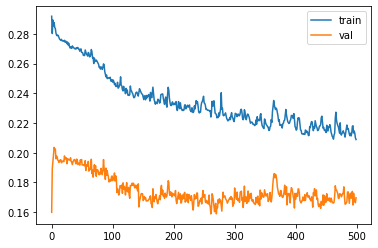

Epoch 1/500
48/88 [===============>..............] - ETA: 0s - loss: 0.5408 - mae: 0.2022
Epoch 00001: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4273 - mae: 0.1428 - val_loss: 1.2916 - val_mae: 0.2283
Epoch 2/500
47/88 [===============>..............] - ETA: 0s - loss: 0.3983 - mae: 0.1218
Epoch 00002: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3332 - mae: 0.0948 - val_loss: 1.2605 - val_mae: 0.2241
Epoch 3/500
50/88 [================>.............] - ETA: 0s - loss: 0.3645 - mae: 0.1058
Epoch 00003: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3099 - mae: 0.0844 - val_loss: 1.3112 - val_mae: 0.2243
Epoch 4/500
49/88 [===============>..............] - ETA: 0s - loss: 0.3700 - mae: 0.0989
Epoch 00004: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.3145 - mae: 0.0804 -

Epoch 33/500
61/88 [===================>..........] - ETA: 0s - loss: 0.2450 - mae: 0.0853
Epoch 00033: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2471 - mae: 0.0815 - val_loss: 1.1348 - val_mae: 0.2262
Epoch 34/500
62/88 [====================>.........] - ETA: 0s - loss: 0.2436 - mae: 0.0869
Epoch 00034: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2479 - mae: 0.0832 - val_loss: 1.1430 - val_mae: 0.2273
Epoch 35/500
64/88 [====================>.........] - ETA: 0s - loss: 0.2325 - mae: 0.0836
Epoch 00035: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2457 - mae: 0.0823 - val_loss: 1.1366 - val_mae: 0.2273
Epoch 36/500
59/88 [===================>..........] - ETA: 0s - loss: 0.2461 - mae: 0.0899
Epoch 00036: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2424 - mae: 0.08

Epoch 65/500
65/88 [=====================>........] - ETA: 0s - loss: 0.2094 - mae: 0.0772
Epoch 00065: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2293 - mae: 0.0773 - val_loss: 1.1634 - val_mae: 0.2226
Epoch 66/500
63/88 [====================>.........] - ETA: 0s - loss: 0.2287 - mae: 0.0846
Epoch 00066: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2381 - mae: 0.0813 - val_loss: 1.1799 - val_mae: 0.2237
Epoch 67/500
63/88 [====================>.........] - ETA: 0s - loss: 0.2298 - mae: 0.0833
Epoch 00067: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2418 - mae: 0.0811 - val_loss: 1.1658 - val_mae: 0.2307
Epoch 68/500
64/88 [====================>.........] - ETA: 0s - loss: 0.2331 - mae: 0.0882
Epoch 00068: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2475 - mae: 0.08

Epoch 97/500
66/88 [=====================>........] - ETA: 0s - loss: 0.2222 - mae: 0.0767
Epoch 00097: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2167 - mae: 0.0730 - val_loss: 1.2117 - val_mae: 0.2238
Epoch 98/500
68/88 [======================>.......] - ETA: 0s - loss: 0.2159 - mae: 0.0768
Epoch 00098: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2163 - mae: 0.0741 - val_loss: 1.2310 - val_mae: 0.2232
Epoch 99/500
68/88 [======================>.......] - ETA: 0s - loss: 0.2154 - mae: 0.0743
Epoch 00099: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2152 - mae: 0.0721 - val_loss: 1.2021 - val_mae: 0.2233
Epoch 100/500
68/88 [======================>.......] - ETA: 0s - loss: 0.2261 - mae: 0.0802
Epoch 00100: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.2278 - mae: 0.0

Epoch 00128: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2055 - mae: 0.0687 - val_loss: 1.3064 - val_mae: 0.2223
Epoch 129/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1928 - mae: 0.0710
Epoch 00129: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2045 - mae: 0.0687 - val_loss: 1.2904 - val_mae: 0.2232
Epoch 130/500
88/88 [==============================] - ETA: 0s - loss: 0.2051 - mae: 0.0702
Epoch 00130: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2051 - mae: 0.0702 - val_loss: 1.3018 - val_mae: 0.2226
Epoch 131/500
61/88 [===================>..........] - ETA: 0s - loss: 0.2040 - mae: 0.0742
Epoch 00131: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2081 - mae: 0.0699 - val_loss: 1.2657 - val_mae: 0.2286
Epoch 132/500
87/88 [===========================

Epoch 160/500
75/88 [========================>.....] - ETA: 0s - loss: 0.2196 - mae: 0.0746
Epoch 00160: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.2131 - mae: 0.0734 - val_loss: 1.3404 - val_mae: 0.2269
Epoch 161/500
73/88 [=======================>......] - ETA: 0s - loss: 0.2239 - mae: 0.0749
Epoch 00161: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2128 - mae: 0.0728 - val_loss: 1.3215 - val_mae: 0.2269
Epoch 162/500
84/88 [===========================>..] - ETA: 0s - loss: 0.2017 - mae: 0.0705
Epoch 00162: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2153 - mae: 0.0749 - val_loss: 1.3474 - val_mae: 0.2266
Epoch 163/500
61/88 [===================>..........] - ETA: 0s - loss: 0.2211 - mae: 0.0770
Epoch 00163: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.2160 - mae: 

Epoch 192/500
55/88 [=================>............] - ETA: 0s - loss: 0.2244 - mae: 0.0808
Epoch 00192: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.1996 - mae: 0.0698 - val_loss: 1.4180 - val_mae: 0.2270
Epoch 193/500
71/88 [=======================>......] - ETA: 0s - loss: 0.2033 - mae: 0.0742
Epoch 00193: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.1904 - mae: 0.0697 - val_loss: 1.3833 - val_mae: 0.2268
Epoch 194/500
74/88 [========================>.....] - ETA: 0s - loss: 0.1962 - mae: 0.0732
Epoch 00194: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.1900 - mae: 0.0704 - val_loss: 1.4000 - val_mae: 0.2257
Epoch 195/500
68/88 [======================>.......] - ETA: 0s - loss: 0.1847 - mae: 0.0728
Epoch 00195: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.1871 - mae: 

Epoch 00223: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1821 - mae: 0.0674 - val_loss: 1.4743 - val_mae: 0.2218
Epoch 224/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1806 - mae: 0.0718
Epoch 00224: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1811 - mae: 0.0678 - val_loss: 1.4819 - val_mae: 0.2215
Epoch 225/500
63/88 [====================>.........] - ETA: 0s - loss: 0.1770 - mae: 0.0695
Epoch 00225: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1789 - mae: 0.0667 - val_loss: 1.4816 - val_mae: 0.2214
Epoch 226/500
63/88 [====================>.........] - ETA: 0s - loss: 0.1780 - mae: 0.0697
Epoch 00226: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1816 - mae: 0.0669 - val_loss: 1.5010 - val_mae: 0.2221
Epoch 227/500
62/88 [====================>......

Epoch 255/500
63/88 [====================>.........] - ETA: 0s - loss: 0.1759 - mae: 0.0678
Epoch 00255: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1739 - mae: 0.0647 - val_loss: 1.5500 - val_mae: 0.2209
Epoch 256/500
66/88 [=====================>........] - ETA: 0s - loss: 0.1940 - mae: 0.0694
Epoch 00256: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1850 - mae: 0.0647 - val_loss: 1.5308 - val_mae: 0.2206
Epoch 257/500
66/88 [=====================>........] - ETA: 0s - loss: 0.1809 - mae: 0.0704
Epoch 00257: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1763 - mae: 0.0655 - val_loss: 1.5487 - val_mae: 0.2203
Epoch 258/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1867 - mae: 0.0723
Epoch 00258: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1805 - mae: 

Epoch 287/500
61/88 [===================>..........] - ETA: 0s - loss: 0.1846 - mae: 0.0729
Epoch 00287: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1776 - mae: 0.0672 - val_loss: 1.6629 - val_mae: 0.2225
Epoch 288/500
66/88 [=====================>........] - ETA: 0s - loss: 0.1742 - mae: 0.0722
Epoch 00288: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1696 - mae: 0.0674 - val_loss: 1.6631 - val_mae: 0.2257
Epoch 289/500
68/88 [======================>.......] - ETA: 0s - loss: 0.1773 - mae: 0.0724
Epoch 00289: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1792 - mae: 0.0689 - val_loss: 1.6704 - val_mae: 0.2254
Epoch 290/500
65/88 [=====================>........] - ETA: 0s - loss: 0.1701 - mae: 0.0690
Epoch 00290: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1684 - mae: 

Epoch 319/500
63/88 [====================>.........] - ETA: 0s - loss: 0.1831 - mae: 0.0690
Epoch 00319: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1790 - mae: 0.0655 - val_loss: 1.6535 - val_mae: 0.2245
Epoch 320/500
64/88 [====================>.........] - ETA: 0s - loss: 0.1621 - mae: 0.0696
Epoch 00320: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1638 - mae: 0.0663 - val_loss: 1.6759 - val_mae: 0.2191
Epoch 321/500
61/88 [===================>..........] - ETA: 0s - loss: 0.1607 - mae: 0.0682
Epoch 00321: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1548 - mae: 0.0621 - val_loss: 1.6667 - val_mae: 0.2185
Epoch 322/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1660 - mae: 0.0698
Epoch 00322: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1591 - mae: 

Epoch 351/500
67/88 [=====================>........] - ETA: 0s - loss: 0.1693 - mae: 0.0692
Epoch 00351: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1597 - mae: 0.0644 - val_loss: 1.7652 - val_mae: 0.2235
Epoch 352/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1648 - mae: 0.0700
Epoch 00352: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1566 - mae: 0.0635 - val_loss: 1.7646 - val_mae: 0.2208
Epoch 353/500
66/88 [=====================>........] - ETA: 0s - loss: 0.1592 - mae: 0.0681
Epoch 00353: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1514 - mae: 0.0624 - val_loss: 1.7655 - val_mae: 0.2192
Epoch 354/500
64/88 [====================>.........] - ETA: 0s - loss: 0.1442 - mae: 0.0632
Epoch 00354: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1459 - mae: 

Epoch 383/500
87/88 [============================>.] - ETA: 0s - loss: 0.1430 - mae: 0.0577
Epoch 00383: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1427 - mae: 0.0576 - val_loss: 1.7940 - val_mae: 0.2161
Epoch 384/500
60/88 [===================>..........] - ETA: 0s - loss: 0.1470 - mae: 0.0644
Epoch 00384: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1488 - mae: 0.0586 - val_loss: 1.7602 - val_mae: 0.2188
Epoch 385/500
73/88 [=======================>......] - ETA: 0s - loss: 0.1770 - mae: 0.0730
Epoch 00385: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.1751 - mae: 0.0689 - val_loss: 1.7827 - val_mae: 0.2156
Epoch 386/500
75/88 [========================>.....] - ETA: 0s - loss: 0.1680 - mae: 0.0654
Epoch 00386: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1639 - mae: 

88/88 [==============================] - 0s 3ms/step - loss: 0.1557 - mae: 0.0599 - val_loss: 1.8314 - val_mae: 0.2200
Epoch 415/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1534 - mae: 0.0669
Epoch 00415: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1487 - mae: 0.0616 - val_loss: 1.8245 - val_mae: 0.2173
Epoch 416/500
60/88 [===================>..........] - ETA: 0s - loss: 0.1613 - mae: 0.0694
Epoch 00416: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1551 - mae: 0.0626 - val_loss: 1.8446 - val_mae: 0.2228
Epoch 417/500
60/88 [===================>..........] - ETA: 0s - loss: 0.1715 - mae: 0.0717
Epoch 00417: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1583 - mae: 0.0635 - val_loss: 1.8714 - val_mae: 0.2153
Epoch 418/500
61/88 [===================>..........] - ETA: 0s - loss: 0.1490 - mae: 0.0636
Epoch 

Epoch 446/500
87/88 [============================>.] - ETA: 0s - loss: 0.1573 - mae: 0.0607
Epoch 00446: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1569 - mae: 0.0605 - val_loss: 1.8171 - val_mae: 0.2169
Epoch 447/500
64/88 [====================>.........] - ETA: 0s - loss: 0.1663 - mae: 0.0706
Epoch 00447: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1799 - mae: 0.0687 - val_loss: 1.8633 - val_mae: 0.2163
Epoch 448/500
63/88 [====================>.........] - ETA: 0s - loss: 0.2210 - mae: 0.0775
Epoch 00448: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1996 - mae: 0.0699 - val_loss: 1.8472 - val_mae: 0.2197
Epoch 449/500
60/88 [===================>..........] - ETA: 0s - loss: 0.1619 - mae: 0.0693
Epoch 00449: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1502 - mae: 

Epoch 00477: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1533 - mae: 0.0619 - val_loss: 1.9390 - val_mae: 0.2155
Epoch 478/500
83/88 [===========================>..] - ETA: 0s - loss: 0.1578 - mae: 0.0586
Epoch 00478: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1682 - mae: 0.0620 - val_loss: 1.8664 - val_mae: 0.2168
Epoch 479/500
62/88 [====================>.........] - ETA: 0s - loss: 0.1761 - mae: 0.0681
Epoch 00479: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1773 - mae: 0.0629 - val_loss: 1.7472 - val_mae: 0.2180
Epoch 480/500
66/88 [=====================>........] - ETA: 0s - loss: 0.1679 - mae: 0.0706
Epoch 00480: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.1582 - mae: 0.0644 - val_loss: 1.9240 - val_mae: 0.2184
Epoch 481/500
67/88 [=====================>.....

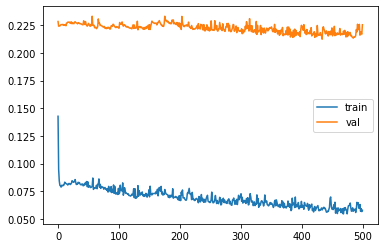

Epoch 1/500
54/79 [===================>..........] - ETA: 0s - loss: 0.7766 - mae: 0.1412
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.7956 - mae: 0.1423 - val_loss: 1.5449 - val_mae: 0.2311
Epoch 2/500
69/79 [=========================>....] - ETA: 0s - loss: 0.5611 - mae: 0.1103
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5880 - mae: 0.1108 - val_loss: 1.4982 - val_mae: 0.2309
Epoch 3/500
68/79 [========================>.....] - ETA: 0s - loss: 0.4901 - mae: 0.1130
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5204 - mae: 0.1157 - val_loss: 1.2077 - val_mae: 0.2338
Epoch 4/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4062 - mae: 0.1259
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4162 - mae: 0.1234 -

Epoch 33/500
67/79 [========================>.....] - ETA: 0s - loss: 0.3100 - mae: 0.1182
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3184 - mae: 0.1201 - val_loss: 0.9756 - val_mae: 0.2330
Epoch 34/500
57/79 [====================>.........] - ETA: 0s - loss: 0.3178 - mae: 0.1266
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3167 - mae: 0.1247 - val_loss: 0.9638 - val_mae: 0.2332
Epoch 35/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3014 - mae: 0.1173
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3131 - mae: 0.1207 - val_loss: 0.9659 - val_mae: 0.2328
Epoch 36/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3025 - mae: 0.1158
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3142 - mae: 0.11

Epoch 00064: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2890 - mae: 0.1144 - val_loss: 1.0173 - val_mae: 0.2291
Epoch 65/500
64/79 [=======================>......] - ETA: 0s - loss: 0.2757 - mae: 0.1117
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2934 - mae: 0.1156 - val_loss: 1.0197 - val_mae: 0.2285
Epoch 66/500
60/79 [=====================>........] - ETA: 0s - loss: 0.2663 - mae: 0.1079
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2851 - mae: 0.1126 - val_loss: 1.0116 - val_mae: 0.2299
Epoch 67/500
61/79 [======================>.......] - ETA: 0s - loss: 0.2696 - mae: 0.1121
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2896 - mae: 0.1158 - val_loss: 1.0244 - val_mae: 0.2281
Epoch 68/500
65/79 [=======================>......]

Epoch 96/500
69/79 [=========================>....] - ETA: 0s - loss: 0.2271 - mae: 0.0960
Epoch 00096: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2501 - mae: 0.1001 - val_loss: 1.0704 - val_mae: 0.2246
Epoch 97/500
67/79 [========================>.....] - ETA: 0s - loss: 0.2399 - mae: 0.1053
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2540 - mae: 0.1064 - val_loss: 1.1054 - val_mae: 0.2227
Epoch 98/500
67/79 [========================>.....] - ETA: 0s - loss: 0.2438 - mae: 0.1020
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2568 - mae: 0.1041 - val_loss: 1.0898 - val_mae: 0.2264
Epoch 99/500
59/79 [=====================>........] - ETA: 0s - loss: 0.2372 - mae: 0.1029
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2491 - mae: 0.10

Epoch 128/500
78/79 [============================>.] - ETA: 0s - loss: 0.2450 - mae: 0.0993
Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2488 - mae: 0.0996 - val_loss: 1.0724 - val_mae: 0.2233
Epoch 129/500
54/79 [===================>..........] - ETA: 0s - loss: 0.2256 - mae: 0.0988
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2410 - mae: 0.0949 - val_loss: 1.0618 - val_mae: 0.2237
Epoch 130/500
61/79 [======================>.......] - ETA: 0s - loss: 0.2095 - mae: 0.0954
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2458 - mae: 0.0979 - val_loss: 1.0739 - val_mae: 0.2207
Epoch 131/500
66/79 [========================>.....] - ETA: 0s - loss: 0.2142 - mae: 0.0936
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2468 - mae: 

Epoch 160/500
62/79 [======================>.......] - ETA: 0s - loss: 0.2124 - mae: 0.0924
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2424 - mae: 0.0963 - val_loss: 1.0370 - val_mae: 0.2271
Epoch 161/500
62/79 [======================>.......] - ETA: 0s - loss: 0.2018 - mae: 0.0935
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2256 - mae: 0.0951 - val_loss: 1.0715 - val_mae: 0.2225
Epoch 162/500
63/79 [======================>.......] - ETA: 0s - loss: 0.2000 - mae: 0.0895
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.2282 - mae: 0.0911 - val_loss: 1.0713 - val_mae: 0.2221
Epoch 163/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1927 - mae: 0.0880
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2226 - mae: 

Epoch 00191: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2010 - mae: 0.0826 - val_loss: 1.1551 - val_mae: 0.2174
Epoch 192/500
62/79 [======================>.......] - ETA: 0s - loss: 0.1764 - mae: 0.0789
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1995 - mae: 0.0823 - val_loss: 1.1261 - val_mae: 0.2169
Epoch 193/500
61/79 [======================>.......] - ETA: 0s - loss: 0.1671 - mae: 0.0757
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1965 - mae: 0.0815 - val_loss: 1.1193 - val_mae: 0.2219
Epoch 194/500
58/79 [=====================>........] - ETA: 0s - loss: 0.1983 - mae: 0.0860
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2162 - mae: 0.0880 - val_loss: 1.1876 - val_mae: 0.2158
Epoch 195/500
55/79 [===================>.......

Epoch 223/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1906 - mae: 0.0833
Epoch 00223: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.2052 - mae: 0.0851 - val_loss: 1.1127 - val_mae: 0.2142
Epoch 224/500
66/79 [========================>.....] - ETA: 0s - loss: 0.1758 - mae: 0.0739
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1947 - mae: 0.0781 - val_loss: 1.1215 - val_mae: 0.2125
Epoch 225/500
62/79 [======================>.......] - ETA: 0s - loss: 0.1700 - mae: 0.0767
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1922 - mae: 0.0785 - val_loss: 1.1525 - val_mae: 0.2119
Epoch 226/500
63/79 [======================>.......] - ETA: 0s - loss: 0.1720 - mae: 0.0739
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1886 - mae: 

Epoch 255/500
57/79 [====================>.........] - ETA: 0s - loss: 0.1620 - mae: 0.0718
Epoch 00255: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1778 - mae: 0.0721 - val_loss: 1.1799 - val_mae: 0.2146
Epoch 256/500
58/79 [=====================>........] - ETA: 0s - loss: 0.1615 - mae: 0.0722
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1798 - mae: 0.0733 - val_loss: 1.1685 - val_mae: 0.2148
Epoch 257/500
60/79 [=====================>........] - ETA: 0s - loss: 0.1594 - mae: 0.0706
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1816 - mae: 0.0735 - val_loss: 1.1412 - val_mae: 0.2174
Epoch 258/500
61/79 [======================>.......] - ETA: 0s - loss: 0.1574 - mae: 0.0716
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1815 - mae: 

Epoch 00286: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1902 - mae: 0.0774 - val_loss: 1.1785 - val_mae: 0.2169
Epoch 287/500
63/79 [======================>.......] - ETA: 0s - loss: 0.1690 - mae: 0.0744
Epoch 00287: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1850 - mae: 0.0757 - val_loss: 1.2101 - val_mae: 0.2137
Epoch 288/500
59/79 [=====================>........] - ETA: 0s - loss: 0.1728 - mae: 0.0740
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1964 - mae: 0.0770 - val_loss: 1.1488 - val_mae: 0.2184
Epoch 289/500
66/79 [========================>.....] - ETA: 0s - loss: 0.1721 - mae: 0.0758
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1921 - mae: 0.0785 - val_loss: 1.1784 - val_mae: 0.2155
Epoch 290/500
64/79 [=======================>...

Epoch 318/500
62/79 [======================>.......] - ETA: 0s - loss: 0.1791 - mae: 0.0750
Epoch 00318: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1971 - mae: 0.0766 - val_loss: 1.1603 - val_mae: 0.2137
Epoch 319/500
61/79 [======================>.......] - ETA: 0s - loss: 0.1674 - mae: 0.0740
Epoch 00319: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1915 - mae: 0.0771 - val_loss: 1.2219 - val_mae: 0.2105
Epoch 320/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1767 - mae: 0.0729
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1899 - mae: 0.0746 - val_loss: 1.1993 - val_mae: 0.2139
Epoch 321/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1685 - mae: 0.0725
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1824 - mae: 

79/79 [==============================] - 0s 4ms/step - loss: 0.1809 - mae: 0.0742 - val_loss: 1.2335 - val_mae: 0.2113
Epoch 350/500
63/79 [======================>.......] - ETA: 0s - loss: 0.1699 - mae: 0.0715
Epoch 00350: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1814 - mae: 0.0729 - val_loss: 1.2045 - val_mae: 0.2135
Epoch 351/500
66/79 [========================>.....] - ETA: 0s - loss: 0.1623 - mae: 0.0694
Epoch 00351: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1761 - mae: 0.0718 - val_loss: 1.2265 - val_mae: 0.2132
Epoch 352/500
65/79 [=======================>......] - ETA: 0s - loss: 0.1554 - mae: 0.0673
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1741 - mae: 0.0706 - val_loss: 1.2240 - val_mae: 0.2140
Epoch 353/500
62/79 [======================>.......] - ETA: 0s - loss: 0.1583 - mae: 0.0699
Epoch 

Epoch 381/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1564 - mae: 0.0677
Epoch 00381: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1752 - mae: 0.0703 - val_loss: 1.2352 - val_mae: 0.2123
Epoch 382/500
57/79 [====================>.........] - ETA: 0s - loss: 0.1629 - mae: 0.0726
Epoch 00382: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1782 - mae: 0.0726 - val_loss: 1.2123 - val_mae: 0.2118
Epoch 383/500
61/79 [======================>.......] - ETA: 0s - loss: 0.1678 - mae: 0.0719
Epoch 00383: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1866 - mae: 0.0736 - val_loss: 1.2423 - val_mae: 0.2094
Epoch 384/500
64/79 [=======================>......] - ETA: 0s - loss: 0.1704 - mae: 0.0716
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1862 - mae: 

Epoch 00412: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1687 - mae: 0.0698 - val_loss: 1.2288 - val_mae: 0.2132
Epoch 413/500
61/79 [======================>.......] - ETA: 0s - loss: 0.1514 - mae: 0.0680
Epoch 00413: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1684 - mae: 0.0692 - val_loss: 1.2450 - val_mae: 0.2144
Epoch 414/500
63/79 [======================>.......] - ETA: 0s - loss: 0.1507 - mae: 0.0664
Epoch 00414: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1662 - mae: 0.0681 - val_loss: 1.2001 - val_mae: 0.2140
Epoch 415/500
60/79 [=====================>........] - ETA: 0s - loss: 0.1528 - mae: 0.0677
Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1722 - mae: 0.0698 - val_loss: 1.2145 - val_mae: 0.2129
Epoch 416/500
64/79 [=======================>...

Epoch 444/500
54/79 [===================>..........] - ETA: 0s - loss: 0.1634 - mae: 0.0710
Epoch 00444: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1727 - mae: 0.0693 - val_loss: 1.1821 - val_mae: 0.2127
Epoch 445/500
65/79 [=======================>......] - ETA: 0s - loss: 0.1521 - mae: 0.0651
Epoch 00445: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1685 - mae: 0.0672 - val_loss: 1.2159 - val_mae: 0.2134
Epoch 446/500
62/79 [======================>.......] - ETA: 0s - loss: 0.1469 - mae: 0.0670
Epoch 00446: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1637 - mae: 0.0680 - val_loss: 1.2270 - val_mae: 0.2109
Epoch 447/500
67/79 [========================>.....] - ETA: 0s - loss: 0.1435 - mae: 0.0626
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1574 - mae: 

Epoch 476/500
78/79 [============================>.] - ETA: 0s - loss: 0.1672 - mae: 0.0654
Epoch 00476: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.1718 - mae: 0.0659 - val_loss: 1.2788 - val_mae: 0.2148
Epoch 477/500
69/79 [=========================>....] - ETA: 0s - loss: 0.1655 - mae: 0.0671
Epoch 00477: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1778 - mae: 0.0699 - val_loss: 1.2852 - val_mae: 0.2101
Epoch 478/500
66/79 [========================>.....] - ETA: 0s - loss: 0.1642 - mae: 0.0645
Epoch 00478: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1760 - mae: 0.0667 - val_loss: 1.2463 - val_mae: 0.2110
Epoch 479/500
66/79 [========================>.....] - ETA: 0s - loss: 0.1902 - mae: 0.0724
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.1969 - mae: 

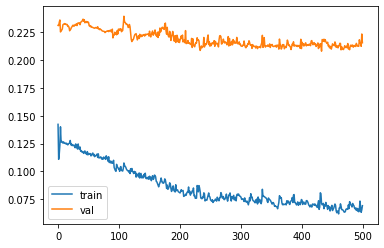

Epoch 1/500
80/92 [=========================>....] - ETA: 0s - loss: 1.4521 - mae: 0.2524
Epoch 00001: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 5ms/step - loss: 1.4033 - mae: 0.2496 - val_loss: 0.7645 - val_mae: 0.2351
Epoch 2/500
92/92 [==============================] - ETA: 0s - loss: 0.9546 - mae: 0.2559
Epoch 00002: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.9546 - mae: 0.2559 - val_loss: 0.7184 - val_mae: 0.2612
Epoch 3/500
67/92 [====================>.........] - ETA: 0s - loss: 0.7470 - mae: 0.2511
Epoch 00003: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.7856 - mae: 0.2594 - val_loss: 0.7140 - val_mae: 0.2522
Epoch 4/500
81/92 [=========================>....] - ETA: 0s - loss: 0.7679 - mae: 0.2552
Epoch 00004: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 4ms/step - loss: 0.7550 - mae: 0.2581 -

Epoch 33/500
88/92 [===========================>..] - ETA: 0s - loss: 0.5965 - mae: 0.2396
Epoch 00033: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 4ms/step - loss: 0.5964 - mae: 0.2406 - val_loss: 0.7284 - val_mae: 0.2595
Epoch 34/500
83/92 [==========================>...] - ETA: 0s - loss: 0.5894 - mae: 0.2389
Epoch 00034: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 4ms/step - loss: 0.5995 - mae: 0.2419 - val_loss: 0.7259 - val_mae: 0.2585
Epoch 35/500
86/92 [===========================>..] - ETA: 0s - loss: 0.6092 - mae: 0.2431
Epoch 00035: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.6036 - mae: 0.2430 - val_loss: 0.7246 - val_mae: 0.2573
Epoch 36/500
83/92 [==========================>...] - ETA: 0s - loss: 0.6011 - mae: 0.2393
Epoch 00036: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 4ms/step - loss: 0.6120 - mae: 0.24

Epoch 65/500
70/92 [=====================>........] - ETA: 0s - loss: 0.5368 - mae: 0.2206
Epoch 00065: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5769 - mae: 0.2331 - val_loss: 0.7840 - val_mae: 0.2548
Epoch 66/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5282 - mae: 0.2188
Epoch 00066: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5769 - mae: 0.2327 - val_loss: 0.7780 - val_mae: 0.2539
Epoch 67/500
73/92 [======================>.......] - ETA: 0s - loss: 0.5577 - mae: 0.2253
Epoch 00067: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5857 - mae: 0.2356 - val_loss: 0.7637 - val_mae: 0.2530
Epoch 68/500
70/92 [=====================>........] - ETA: 0s - loss: 0.5344 - mae: 0.2203
Epoch 00068: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5801 - mae: 0.23

Epoch 97/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5594 - mae: 0.2242
Epoch 00097: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5930 - mae: 0.2355 - val_loss: 0.7627 - val_mae: 0.2606
Epoch 98/500
63/92 [===================>..........] - ETA: 0s - loss: 0.5404 - mae: 0.2224
Epoch 00098: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5748 - mae: 0.2332 - val_loss: 0.7790 - val_mae: 0.2577
Epoch 99/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5182 - mae: 0.2147
Epoch 00099: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5690 - mae: 0.2294 - val_loss: 0.7778 - val_mae: 0.2595
Epoch 100/500
66/92 [====================>.........] - ETA: 0s - loss: 0.5315 - mae: 0.2183
Epoch 00100: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5676 - mae: 0.2

Epoch 00128: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5774 - mae: 0.2300 - val_loss: 0.7892 - val_mae: 0.2568
Epoch 129/500
67/92 [====================>.........] - ETA: 0s - loss: 0.5247 - mae: 0.2152
Epoch 00129: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5783 - mae: 0.2305 - val_loss: 0.8026 - val_mae: 0.2631
Epoch 130/500
70/92 [=====================>........] - ETA: 0s - loss: 0.5221 - mae: 0.2155
Epoch 00130: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5669 - mae: 0.2289 - val_loss: 0.8027 - val_mae: 0.2641
Epoch 131/500
66/92 [====================>.........] - ETA: 0s - loss: 0.5326 - mae: 0.2174
Epoch 00131: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5716 - mae: 0.2286 - val_loss: 0.7851 - val_mae: 0.2588
Epoch 132/500
62/92 [===================>.......

Epoch 160/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5365 - mae: 0.2215
Epoch 00160: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5680 - mae: 0.2317 - val_loss: 0.8394 - val_mae: 0.2697
Epoch 161/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5482 - mae: 0.2282
Epoch 00161: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5899 - mae: 0.2390 - val_loss: 0.9143 - val_mae: 0.2838
Epoch 162/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5438 - mae: 0.2253
Epoch 00162: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5895 - mae: 0.2366 - val_loss: 0.8849 - val_mae: 0.2775
Epoch 163/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5449 - mae: 0.2239
Epoch 00163: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5890 - mae: 

Epoch 192/500
61/92 [==================>...........] - ETA: 0s - loss: 0.5464 - mae: 0.2201
Epoch 00192: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5688 - mae: 0.2267 - val_loss: 0.8821 - val_mae: 0.2729
Epoch 193/500
89/92 [============================>.] - ETA: 0s - loss: 0.5838 - mae: 0.2315
Epoch 00193: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5847 - mae: 0.2319 - val_loss: 0.9303 - val_mae: 0.2819
Epoch 194/500
85/92 [==========================>...] - ETA: 0s - loss: 0.5877 - mae: 0.2319
Epoch 00194: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5740 - mae: 0.2287 - val_loss: 0.8825 - val_mae: 0.2765
Epoch 195/500
60/92 [==================>...........] - ETA: 0s - loss: 0.5411 - mae: 0.2213
Epoch 00195: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5747 - mae: 

Epoch 00223: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5704 - mae: 0.2287 - val_loss: 0.9821 - val_mae: 0.2822
Epoch 224/500
92/92 [==============================] - ETA: 0s - loss: 0.5837 - mae: 0.2308
Epoch 00224: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5837 - mae: 0.2308 - val_loss: 0.9479 - val_mae: 0.2797
Epoch 225/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5460 - mae: 0.2235
Epoch 00225: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5723 - mae: 0.2297 - val_loss: 0.9692 - val_mae: 0.2815
Epoch 226/500
90/92 [============================>.] - ETA: 0s - loss: 0.5729 - mae: 0.2312
Epoch 00226: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5698 - mae: 0.2306 - val_loss: 0.9215 - val_mae: 0.2748
Epoch 227/500
92/92 [===========================

Epoch 255/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5617 - mae: 0.2315
Epoch 00255: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5879 - mae: 0.2365 - val_loss: 0.9051 - val_mae: 0.2743
Epoch 256/500
70/92 [=====================>........] - ETA: 0s - loss: 0.5617 - mae: 0.2320
Epoch 00256: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5974 - mae: 0.2389 - val_loss: 0.9120 - val_mae: 0.2737
Epoch 257/500
62/92 [===================>..........] - ETA: 0s - loss: 0.5867 - mae: 0.2413
Epoch 00257: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.6168 - mae: 0.2465 - val_loss: 0.9333 - val_mae: 0.2747
Epoch 258/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5730 - mae: 0.2363
Epoch 00258: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.6029 - mae: 

Epoch 00286: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5682 - mae: 0.2269 - val_loss: 0.9215 - val_mae: 0.2778
Epoch 287/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5360 - mae: 0.2191
Epoch 00287: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5641 - mae: 0.2263 - val_loss: 0.9336 - val_mae: 0.2786
Epoch 288/500
91/92 [============================>.] - ETA: 0s - loss: 0.5664 - mae: 0.2262
Epoch 00288: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5657 - mae: 0.2260 - val_loss: 0.9313 - val_mae: 0.2804
Epoch 289/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5320 - mae: 0.2182
Epoch 00289: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5673 - mae: 0.2291 - val_loss: 0.9188 - val_mae: 0.2757
Epoch 290/500
67/92 [====================>......

Epoch 318/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5527 - mae: 0.2227
Epoch 00318: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5684 - mae: 0.2268 - val_loss: 0.9996 - val_mae: 0.2852
Epoch 319/500
62/92 [===================>..........] - ETA: 0s - loss: 0.5536 - mae: 0.2240
Epoch 00319: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5631 - mae: 0.2266 - val_loss: 0.9528 - val_mae: 0.2785
Epoch 320/500
63/92 [===================>..........] - ETA: 0s - loss: 0.5468 - mae: 0.2217
Epoch 00320: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5614 - mae: 0.2256 - val_loss: 1.0027 - val_mae: 0.2826
Epoch 321/500
62/92 [===================>..........] - ETA: 0s - loss: 0.5474 - mae: 0.2213
Epoch 00321: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5590 - mae: 

Epoch 350/500
60/92 [==================>...........] - ETA: 0s - loss: 0.5789 - mae: 0.2339
Epoch 00350: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5970 - mae: 0.2373 - val_loss: 0.9668 - val_mae: 0.2755
Epoch 351/500
92/92 [==============================] - ETA: 0s - loss: 0.6274 - mae: 0.2466
Epoch 00351: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.6274 - mae: 0.2466 - val_loss: 0.9268 - val_mae: 0.2701
Epoch 352/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5507 - mae: 0.2281
Epoch 00352: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5924 - mae: 0.2349 - val_loss: 0.9267 - val_mae: 0.2708
Epoch 353/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5612 - mae: 0.2337
Epoch 00353: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5882 - mae: 

Epoch 00381: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5553 - mae: 0.2248 - val_loss: 1.0106 - val_mae: 0.2740
Epoch 382/500
90/92 [============================>.] - ETA: 0s - loss: 0.5569 - mae: 0.2233
Epoch 00382: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5552 - mae: 0.2233 - val_loss: 0.9720 - val_mae: 0.2713
Epoch 383/500
63/92 [===================>..........] - ETA: 0s - loss: 0.5277 - mae: 0.2153
Epoch 00383: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5470 - mae: 0.2208 - val_loss: 0.9999 - val_mae: 0.2726
Epoch 384/500
91/92 [============================>.] - ETA: 0s - loss: 0.5429 - mae: 0.2184
Epoch 00384: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5424 - mae: 0.2183 - val_loss: 1.0093 - val_mae: 0.2739
Epoch 385/500
62/92 [===================>.......

Epoch 413/500
63/92 [===================>..........] - ETA: 0s - loss: 0.5247 - mae: 0.2141
Epoch 00413: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5392 - mae: 0.2173 - val_loss: 1.0925 - val_mae: 0.2732
Epoch 414/500
68/92 [=====================>........] - ETA: 0s - loss: 0.5212 - mae: 0.2133
Epoch 00414: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5462 - mae: 0.2186 - val_loss: 1.1699 - val_mae: 0.2821
Epoch 415/500
67/92 [====================>.........] - ETA: 0s - loss: 0.5152 - mae: 0.2117
Epoch 00415: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5330 - mae: 0.2155 - val_loss: 1.1248 - val_mae: 0.2768
Epoch 416/500
62/92 [===================>..........] - ETA: 0s - loss: 0.5354 - mae: 0.2162
Epoch 00416: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5383 - mae: 

Epoch 00444: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5497 - mae: 0.2210 - val_loss: 1.0619 - val_mae: 0.2745
Epoch 445/500
64/92 [===================>..........] - ETA: 0s - loss: 0.5286 - mae: 0.2153
Epoch 00445: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5477 - mae: 0.2201 - val_loss: 1.0751 - val_mae: 0.2776
Epoch 446/500
65/92 [====================>.........] - ETA: 0s - loss: 0.5273 - mae: 0.2176
Epoch 00446: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5435 - mae: 0.2209 - val_loss: 1.0912 - val_mae: 0.2766
Epoch 447/500
69/92 [=====================>........] - ETA: 0s - loss: 0.5273 - mae: 0.2176
Epoch 00447: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5431 - mae: 0.2206 - val_loss: 1.0896 - val_mae: 0.2761
Epoch 448/500
65/92 [====================>......

Epoch 476/500
91/92 [============================>.] - ETA: 0s - loss: 0.5472 - mae: 0.2133
Epoch 00476: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5464 - mae: 0.2131 - val_loss: 1.0534 - val_mae: 0.2780
Epoch 477/500
62/92 [===================>..........] - ETA: 0s - loss: 0.5347 - mae: 0.2111
Epoch 00477: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5501 - mae: 0.2135 - val_loss: 1.0538 - val_mae: 0.2798
Epoch 478/500
91/92 [============================>.] - ETA: 0s - loss: 0.5708 - mae: 0.2204
Epoch 00478: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5701 - mae: 0.2202 - val_loss: 1.0346 - val_mae: 0.2776
Epoch 479/500
89/92 [============================>.] - ETA: 0s - loss: 0.5630 - mae: 0.2181
Epoch 00479: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 3ms/step - loss: 0.5609 - mae: 

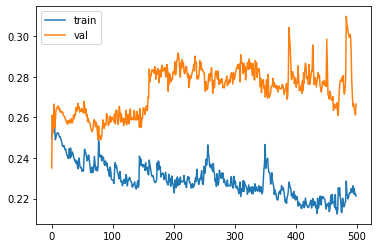

Epoch 1/500
60/82 [====================>.........] - ETA: 0s - loss: 0.6882 - mae: 0.2498
Epoch 00001: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.7015 - mae: 0.2485 - val_loss: 0.9719 - val_mae: 0.2808
Epoch 2/500
64/82 [======================>.......] - ETA: 0s - loss: 0.5208 - mae: 0.2159
Epoch 00002: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5788 - mae: 0.2270 - val_loss: 0.9513 - val_mae: 0.2804
Epoch 3/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4999 - mae: 0.2121
Epoch 00003: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5556 - mae: 0.2234 - val_loss: 0.9471 - val_mae: 0.2819
Epoch 4/500
61/82 [=====================>........] - ETA: 0s - loss: 0.4993 - mae: 0.2136
Epoch 00004: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5541 - mae: 0.2251 -

Epoch 33/500
68/82 [=======================>......] - ETA: 0s - loss: 0.4618 - mae: 0.2049
Epoch 00033: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4990 - mae: 0.2121 - val_loss: 0.9708 - val_mae: 0.2791
Epoch 34/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4595 - mae: 0.2050
Epoch 00034: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5012 - mae: 0.2133 - val_loss: 0.9796 - val_mae: 0.2788
Epoch 35/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4525 - mae: 0.2018
Epoch 00035: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4956 - mae: 0.2111 - val_loss: 0.9892 - val_mae: 0.2795
Epoch 36/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4408 - mae: 0.1982
Epoch 00036: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4965 - mae: 0.21

Epoch 65/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4341 - mae: 0.1923
Epoch 00065: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4721 - mae: 0.2027 - val_loss: 1.0332 - val_mae: 0.2737
Epoch 66/500
61/82 [=====================>........] - ETA: 0s - loss: 0.4296 - mae: 0.1883
Epoch 00066: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4743 - mae: 0.2021 - val_loss: 1.0233 - val_mae: 0.2771
Epoch 67/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4215 - mae: 0.1882
Epoch 00067: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4689 - mae: 0.2015 - val_loss: 1.0173 - val_mae: 0.2726
Epoch 68/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4192 - mae: 0.1865
Epoch 00068: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4663 - mae: 0.20

Epoch 97/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4155 - mae: 0.1843
Epoch 00097: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4487 - mae: 0.1936 - val_loss: 1.0374 - val_mae: 0.2747
Epoch 98/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4130 - mae: 0.1843
Epoch 00098: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4491 - mae: 0.1934 - val_loss: 1.0339 - val_mae: 0.2718
Epoch 99/500
60/82 [====================>.........] - ETA: 0s - loss: 0.4038 - mae: 0.1799
Epoch 00099: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4505 - mae: 0.1944 - val_loss: 1.0382 - val_mae: 0.2749
Epoch 100/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4038 - mae: 0.1811
Epoch 00100: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4474 - mae: 0.1

Epoch 129/500
63/82 [======================>.......] - ETA: 0s - loss: 0.3827 - mae: 0.1726
Epoch 00129: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4221 - mae: 0.1848 - val_loss: 1.0661 - val_mae: 0.2732
Epoch 130/500
62/82 [=====================>........] - ETA: 0s - loss: 0.3795 - mae: 0.1690
Epoch 00130: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4207 - mae: 0.1819 - val_loss: 1.0857 - val_mae: 0.2755
Epoch 131/500
57/82 [===================>..........] - ETA: 0s - loss: 0.3808 - mae: 0.1716
Epoch 00131: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4192 - mae: 0.1836 - val_loss: 1.0761 - val_mae: 0.2743
Epoch 132/500
61/82 [=====================>........] - ETA: 0s - loss: 0.3985 - mae: 0.1750
Epoch 00132: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4313 - mae: 

Epoch 161/500
64/82 [======================>.......] - ETA: 0s - loss: 0.3741 - mae: 0.1668
Epoch 00161: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4063 - mae: 0.1773 - val_loss: 1.1225 - val_mae: 0.2766
Epoch 162/500
65/82 [======================>.......] - ETA: 0s - loss: 0.3722 - mae: 0.1655
Epoch 00162: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4016 - mae: 0.1746 - val_loss: 1.1289 - val_mae: 0.2789
Epoch 163/500
64/82 [======================>.......] - ETA: 0s - loss: 0.3661 - mae: 0.1636
Epoch 00163: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3998 - mae: 0.1738 - val_loss: 1.1152 - val_mae: 0.2758
Epoch 164/500
63/82 [======================>.......] - ETA: 0s - loss: 0.3632 - mae: 0.1633
Epoch 00164: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3944 - mae: 

Epoch 00192: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3832 - mae: 0.1636 - val_loss: 1.1763 - val_mae: 0.2700
Epoch 193/500
65/82 [======================>.......] - ETA: 0s - loss: 0.3619 - mae: 0.1599
Epoch 00193: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3807 - mae: 0.1649 - val_loss: 1.1961 - val_mae: 0.2725
Epoch 194/500
62/82 [=====================>........] - ETA: 0s - loss: 0.3443 - mae: 0.1544
Epoch 00194: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3699 - mae: 0.1624 - val_loss: 1.1893 - val_mae: 0.2743
Epoch 195/500
70/82 [========================>.....] - ETA: 0s - loss: 0.3558 - mae: 0.1590
Epoch 00195: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3739 - mae: 0.1633 - val_loss: 1.2002 - val_mae: 0.2734
Epoch 196/500
68/82 [=======================>...

Epoch 224/500
62/82 [=====================>........] - ETA: 0s - loss: 0.3450 - mae: 0.1521
Epoch 00224: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3683 - mae: 0.1612 - val_loss: 1.2633 - val_mae: 0.2761
Epoch 225/500
64/82 [======================>.......] - ETA: 0s - loss: 0.3522 - mae: 0.1519
Epoch 00225: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3785 - mae: 0.1621 - val_loss: 1.2390 - val_mae: 0.2768
Epoch 226/500
71/82 [========================>.....] - ETA: 0s - loss: 0.3566 - mae: 0.1563
Epoch 00226: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3708 - mae: 0.1602 - val_loss: 1.2686 - val_mae: 0.2751
Epoch 227/500
64/82 [======================>.......] - ETA: 0s - loss: 0.3339 - mae: 0.1475
Epoch 00227: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3586 - mae: 

Epoch 256/500
62/82 [=====================>........] - ETA: 0s - loss: 0.3401 - mae: 0.1496
Epoch 00256: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3538 - mae: 0.1559 - val_loss: 1.3771 - val_mae: 0.2673
Epoch 257/500
61/82 [=====================>........] - ETA: 0s - loss: 0.3457 - mae: 0.1501
Epoch 00257: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3532 - mae: 0.1547 - val_loss: 1.3587 - val_mae: 0.2702
Epoch 258/500
61/82 [=====================>........] - ETA: 0s - loss: 0.3422 - mae: 0.1495
Epoch 00258: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3506 - mae: 0.1543 - val_loss: 1.3572 - val_mae: 0.2659
Epoch 259/500
62/82 [=====================>........] - ETA: 0s - loss: 0.3370 - mae: 0.1472
Epoch 00259: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3533 - mae: 

Epoch 288/500
48/82 [================>.............] - ETA: 0s - loss: 0.3427 - mae: 0.1503
Epoch 00288: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3550 - mae: 0.1550 - val_loss: 1.2950 - val_mae: 0.2697
Epoch 289/500
68/82 [=======================>......] - ETA: 0s - loss: 0.3421 - mae: 0.1534
Epoch 00289: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3512 - mae: 0.1538 - val_loss: 1.3040 - val_mae: 0.2707
Epoch 290/500
67/82 [=======================>......] - ETA: 0s - loss: 0.3495 - mae: 0.1539
Epoch 00290: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3548 - mae: 0.1536 - val_loss: 1.3124 - val_mae: 0.2693
Epoch 291/500
61/82 [=====================>........] - ETA: 0s - loss: 0.3460 - mae: 0.1536
Epoch 00291: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3610 - mae: 

Epoch 00319: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3411 - mae: 0.1481 - val_loss: 1.3634 - val_mae: 0.2651
Epoch 320/500
65/82 [======================>.......] - ETA: 0s - loss: 0.3328 - mae: 0.1465
Epoch 00320: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3397 - mae: 0.1499 - val_loss: 1.3656 - val_mae: 0.2638
Epoch 321/500
67/82 [=======================>......] - ETA: 0s - loss: 0.3349 - mae: 0.1471
Epoch 00321: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3346 - mae: 0.1467 - val_loss: 1.3743 - val_mae: 0.2643
Epoch 322/500
72/82 [=========================>....] - ETA: 0s - loss: 0.3290 - mae: 0.1469
Epoch 00322: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3373 - mae: 0.1490 - val_loss: 1.3760 - val_mae: 0.2689
Epoch 323/500
63/82 [======================>....

Epoch 351/500
69/82 [========================>.....] - ETA: 0s - loss: 0.3272 - mae: 0.1441
Epoch 00351: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3280 - mae: 0.1453 - val_loss: 1.4543 - val_mae: 0.2682
Epoch 352/500
66/82 [=======================>......] - ETA: 0s - loss: 0.3268 - mae: 0.1427
Epoch 00352: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3279 - mae: 0.1449 - val_loss: 1.4541 - val_mae: 0.2697
Epoch 353/500
63/82 [======================>.......] - ETA: 0s - loss: 0.3216 - mae: 0.1399
Epoch 00353: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3268 - mae: 0.1436 - val_loss: 1.4498 - val_mae: 0.2678
Epoch 354/500
65/82 [======================>.......] - ETA: 0s - loss: 0.3226 - mae: 0.1412
Epoch 00354: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3261 - mae: 

Epoch 00382: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3428 - mae: 0.1480 - val_loss: 1.4544 - val_mae: 0.2673
Epoch 383/500
63/82 [======================>.......] - ETA: 0s - loss: 0.3331 - mae: 0.1428
Epoch 00383: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3361 - mae: 0.1459 - val_loss: 1.4820 - val_mae: 0.2717
Epoch 384/500
63/82 [======================>.......] - ETA: 0s - loss: 0.3320 - mae: 0.1416
Epoch 00384: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3413 - mae: 0.1474 - val_loss: 1.4396 - val_mae: 0.2707
Epoch 385/500
66/82 [=======================>......] - ETA: 0s - loss: 0.3346 - mae: 0.1444
Epoch 00385: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3365 - mae: 0.1460 - val_loss: 1.4572 - val_mae: 0.2688
Epoch 386/500
62/82 [=====================>.....

Epoch 414/500
58/82 [====================>.........] - ETA: 0s - loss: 0.3136 - mae: 0.1363
Epoch 00414: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3250 - mae: 0.1421 - val_loss: 1.4736 - val_mae: 0.2735
Epoch 415/500
65/82 [======================>.......] - ETA: 0s - loss: 0.3211 - mae: 0.1401
Epoch 00415: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3221 - mae: 0.1416 - val_loss: 1.5095 - val_mae: 0.2758
Epoch 416/500
71/82 [========================>.....] - ETA: 0s - loss: 0.3486 - mae: 0.1496
Epoch 00416: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3449 - mae: 0.1485 - val_loss: 1.4903 - val_mae: 0.2759
Epoch 417/500
70/82 [========================>.....] - ETA: 0s - loss: 0.3303 - mae: 0.1445
Epoch 00417: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3368 - mae: 

Epoch 446/500
68/82 [=======================>......] - ETA: 0s - loss: 0.3613 - mae: 0.1458
Epoch 00446: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3679 - mae: 0.1497 - val_loss: 1.3976 - val_mae: 0.2699
Epoch 447/500
68/82 [=======================>......] - ETA: 0s - loss: 0.3322 - mae: 0.1447
Epoch 00447: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3355 - mae: 0.1460 - val_loss: 1.4283 - val_mae: 0.2697
Epoch 448/500
66/82 [=======================>......] - ETA: 0s - loss: 0.3223 - mae: 0.1411
Epoch 00448: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3256 - mae: 0.1425 - val_loss: 1.4721 - val_mae: 0.2719
Epoch 449/500
63/82 [======================>.......] - ETA: 0s - loss: 0.3238 - mae: 0.1391
Epoch 00449: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3300 - mae: 

Epoch 00477: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3137 - mae: 0.1362 - val_loss: 1.5589 - val_mae: 0.2743
Epoch 478/500
68/82 [=======================>......] - ETA: 0s - loss: 0.3206 - mae: 0.1385
Epoch 00478: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3185 - mae: 0.1379 - val_loss: 1.5690 - val_mae: 0.2745
Epoch 479/500
66/82 [=======================>......] - ETA: 0s - loss: 0.3210 - mae: 0.1388
Epoch 00479: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3227 - mae: 0.1393 - val_loss: 1.6079 - val_mae: 0.2750
Epoch 480/500
67/82 [=======================>......] - ETA: 0s - loss: 0.3356 - mae: 0.1427
Epoch 00480: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3397 - mae: 0.1451 - val_loss: 1.5072 - val_mae: 0.2759
Epoch 481/500
66/82 [=======================>...

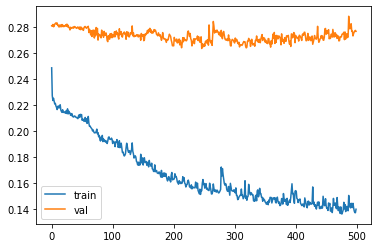

Epoch 1/500
68/94 [====================>.........] - ETA: 0s - loss: 0.7452 - mae: 0.2111
Epoch 00001: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.7279 - mae: 0.1997 - val_loss: 0.9520 - val_mae: 0.2345
Epoch 2/500
62/94 [==================>...........] - ETA: 0s - loss: 0.5088 - mae: 0.1651
Epoch 00002: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.5631 - mae: 0.1778 - val_loss: 0.8835 - val_mae: 0.2330
Epoch 3/500
91/94 [============================>.] - ETA: 0s - loss: 0.5434 - mae: 0.1838
Epoch 00003: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.5339 - mae: 0.1821 - val_loss: 0.8862 - val_mae: 0.2365
Epoch 4/500
94/94 [==============================] - ETA: 0s - loss: 0.5157 - mae: 0.1748
Epoch 00004: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.5157 - mae: 0.1748 -

Epoch 33/500
70/94 [=====================>........] - ETA: 0s - loss: 0.4297 - mae: 0.1694
Epoch 00033: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4278 - mae: 0.1689 - val_loss: 0.8335 - val_mae: 0.2307
Epoch 34/500
71/94 [=====================>........] - ETA: 0s - loss: 0.4299 - mae: 0.1691
Epoch 00034: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4286 - mae: 0.1687 - val_loss: 0.8377 - val_mae: 0.2333
Epoch 35/500
67/94 [====================>.........] - ETA: 0s - loss: 0.4201 - mae: 0.1675
Epoch 00035: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4200 - mae: 0.1676 - val_loss: 0.8563 - val_mae: 0.2328
Epoch 36/500
67/94 [====================>.........] - ETA: 0s - loss: 0.4345 - mae: 0.1711
Epoch 00036: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4379 - mae: 0.17

Epoch 00064: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4145 - mae: 0.1637 - val_loss: 0.8380 - val_mae: 0.2336
Epoch 65/500
93/94 [============================>.] - ETA: 0s - loss: 0.4291 - mae: 0.1689
Epoch 00065: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4271 - mae: 0.1684 - val_loss: 0.8344 - val_mae: 0.2341
Epoch 66/500
66/94 [====================>.........] - ETA: 0s - loss: 0.3986 - mae: 0.1599
Epoch 00066: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4167 - mae: 0.1643 - val_loss: 0.8180 - val_mae: 0.2341
Epoch 67/500
67/94 [====================>.........] - ETA: 0s - loss: 0.4147 - mae: 0.1661
Epoch 00067: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4162 - mae: 0.1666 - val_loss: 0.8280 - val_mae: 0.2339
Epoch 68/500
67/94 [====================>.........]

Epoch 96/500
93/94 [============================>.] - ETA: 0s - loss: 0.4185 - mae: 0.1675
Epoch 00096: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4163 - mae: 0.1668 - val_loss: 0.8257 - val_mae: 0.2296
Epoch 97/500
67/94 [====================>.........] - ETA: 0s - loss: 0.4132 - mae: 0.1640
Epoch 00097: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4096 - mae: 0.1620 - val_loss: 0.8331 - val_mae: 0.2310
Epoch 98/500
65/94 [===================>..........] - ETA: 0s - loss: 0.3704 - mae: 0.1528
Epoch 00098: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.4052 - mae: 0.1608 - val_loss: 0.8415 - val_mae: 0.2315
Epoch 99/500
85/94 [==========================>...] - ETA: 0s - loss: 0.4144 - mae: 0.1631
Epoch 00099: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 4ms/step - loss: 0.4044 - mae: 0.16

Epoch 128/500
63/94 [===================>..........] - ETA: 0s - loss: 0.3794 - mae: 0.1506
Epoch 00128: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3973 - mae: 0.1561 - val_loss: 0.9555 - val_mae: 0.2268
Epoch 129/500
67/94 [====================>.........] - ETA: 0s - loss: 0.3762 - mae: 0.1566
Epoch 00129: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3819 - mae: 0.1559 - val_loss: 0.9880 - val_mae: 0.2240
Epoch 130/500
66/94 [====================>.........] - ETA: 0s - loss: 0.3558 - mae: 0.1460
Epoch 00130: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3738 - mae: 0.1504 - val_loss: 1.0351 - val_mae: 0.2257
Epoch 131/500
93/94 [============================>.] - ETA: 0s - loss: 0.3732 - mae: 0.1508
Epoch 00131: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3710 - mae: 

Epoch 00159: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3631 - mae: 0.1474 - val_loss: 1.0869 - val_mae: 0.2257
Epoch 160/500
67/94 [====================>.........] - ETA: 0s - loss: 0.3515 - mae: 0.1430
Epoch 00160: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3580 - mae: 0.1453 - val_loss: 1.0889 - val_mae: 0.2226
Epoch 161/500
91/94 [============================>.] - ETA: 0s - loss: 0.3620 - mae: 0.1458
Epoch 00161: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3536 - mae: 0.1428 - val_loss: 1.0890 - val_mae: 0.2244
Epoch 162/500
64/94 [===================>..........] - ETA: 0s - loss: 0.3255 - mae: 0.1345
Epoch 00162: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3628 - mae: 0.1463 - val_loss: 1.1052 - val_mae: 0.2275
Epoch 163/500
66/94 [====================>......

Epoch 191/500
71/94 [=====================>........] - ETA: 0s - loss: 0.3356 - mae: 0.1415
Epoch 00191: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3506 - mae: 0.1443 - val_loss: 1.0673 - val_mae: 0.2265
Epoch 192/500
72/94 [=====================>........] - ETA: 0s - loss: 0.3303 - mae: 0.1442
Epoch 00192: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3383 - mae: 0.1435 - val_loss: 1.0564 - val_mae: 0.2201
Epoch 193/500
72/94 [=====================>........] - ETA: 0s - loss: 0.3380 - mae: 0.1412
Epoch 00193: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3461 - mae: 0.1411 - val_loss: 1.0767 - val_mae: 0.2275
Epoch 194/500
71/94 [=====================>........] - ETA: 0s - loss: 0.3388 - mae: 0.1444
Epoch 00194: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3420 - mae: 

Epoch 00222: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3289 - mae: 0.1349 - val_loss: 1.1544 - val_mae: 0.2238
Epoch 223/500
65/94 [===================>..........] - ETA: 0s - loss: 0.3015 - mae: 0.1268
Epoch 00223: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3361 - mae: 0.1396 - val_loss: 1.1676 - val_mae: 0.2215
Epoch 224/500
66/94 [====================>.........] - ETA: 0s - loss: 0.3152 - mae: 0.1331
Epoch 00224: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3369 - mae: 0.1385 - val_loss: 1.1885 - val_mae: 0.2224
Epoch 225/500
65/94 [===================>..........] - ETA: 0s - loss: 0.3143 - mae: 0.1324
Epoch 00225: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3475 - mae: 0.1401 - val_loss: 1.1797 - val_mae: 0.2225
Epoch 226/500
67/94 [====================>......

Epoch 254/500
92/94 [============================>.] - ETA: 0s - loss: 0.3310 - mae: 0.1365
Epoch 00254: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3267 - mae: 0.1350 - val_loss: 1.1478 - val_mae: 0.2265
Epoch 255/500
63/94 [===================>..........] - ETA: 0s - loss: 0.2988 - mae: 0.1266
Epoch 00255: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3222 - mae: 0.1345 - val_loss: 1.1507 - val_mae: 0.2259
Epoch 256/500
89/94 [===========================>..] - ETA: 0s - loss: 0.3377 - mae: 0.1383
Epoch 00256: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3350 - mae: 0.1380 - val_loss: 1.0872 - val_mae: 0.2255
Epoch 257/500
67/94 [====================>.........] - ETA: 0s - loss: 0.3091 - mae: 0.1316
Epoch 00257: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3198 - mae: 

Epoch 00285: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3355 - mae: 0.1384 - val_loss: 1.1977 - val_mae: 0.2332
Epoch 286/500
92/94 [============================>.] - ETA: 0s - loss: 0.3149 - mae: 0.1314
Epoch 00286: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3108 - mae: 0.1299 - val_loss: 1.1422 - val_mae: 0.2292
Epoch 287/500
91/94 [============================>.] - ETA: 0s - loss: 0.3183 - mae: 0.1317
Epoch 00287: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3113 - mae: 0.1292 - val_loss: 1.1850 - val_mae: 0.2316
Epoch 288/500
92/94 [============================>.] - ETA: 0s - loss: 0.3302 - mae: 0.1357
Epoch 00288: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3261 - mae: 0.1344 - val_loss: 1.1881 - val_mae: 0.2326
Epoch 289/500
67/94 [====================>......

Epoch 317/500
65/94 [===================>..........] - ETA: 0s - loss: 0.2671 - mae: 0.1138
Epoch 00317: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3095 - mae: 0.1268 - val_loss: 1.2438 - val_mae: 0.2339
Epoch 318/500
90/94 [===========================>..] - ETA: 0s - loss: 0.3232 - mae: 0.1307
Epoch 00318: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3187 - mae: 0.1289 - val_loss: 1.2795 - val_mae: 0.2361
Epoch 319/500
64/94 [===================>..........] - ETA: 0s - loss: 0.2859 - mae: 0.1132
Epoch 00319: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3217 - mae: 0.1257 - val_loss: 1.1939 - val_mae: 0.2374
Epoch 320/500
92/94 [============================>.] - ETA: 0s - loss: 0.3011 - mae: 0.1257
Epoch 00320: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2979 - mae: 

Epoch 00348: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2911 - mae: 0.1183 - val_loss: 1.2556 - val_mae: 0.2318
Epoch 349/500
93/94 [============================>.] - ETA: 0s - loss: 0.2864 - mae: 0.1181
Epoch 00349: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2848 - mae: 0.1175 - val_loss: 1.2754 - val_mae: 0.2333
Epoch 350/500
94/94 [==============================] - ETA: 0s - loss: 0.3041 - mae: 0.1183
Epoch 00350: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3041 - mae: 0.1183 - val_loss: 1.2523 - val_mae: 0.2293
Epoch 351/500
67/94 [====================>.........] - ETA: 0s - loss: 0.3373 - mae: 0.1264
Epoch 00351: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3289 - mae: 0.1277 - val_loss: 1.2666 - val_mae: 0.2359
Epoch 352/500
78/94 [=======================>...

Epoch 380/500
74/94 [======================>.......] - ETA: 0s - loss: 0.3084 - mae: 0.1205
Epoch 00380: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3226 - mae: 0.1260 - val_loss: 1.2356 - val_mae: 0.2309
Epoch 381/500
70/94 [=====================>........] - ETA: 0s - loss: 0.3113 - mae: 0.1182
Epoch 00381: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3217 - mae: 0.1241 - val_loss: 1.2039 - val_mae: 0.2334
Epoch 382/500
69/94 [=====================>........] - ETA: 0s - loss: 0.3010 - mae: 0.1189
Epoch 00382: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3127 - mae: 0.1241 - val_loss: 1.2101 - val_mae: 0.2338
Epoch 383/500
73/94 [======================>.......] - ETA: 0s - loss: 0.2972 - mae: 0.1192
Epoch 00383: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3118 - mae: 

Epoch 412/500
67/94 [====================>.........] - ETA: 0s - loss: 0.2659 - mae: 0.1109
Epoch 00412: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2827 - mae: 0.1177 - val_loss: 1.2570 - val_mae: 0.2304
Epoch 413/500
68/94 [====================>.........] - ETA: 0s - loss: 0.2640 - mae: 0.1086
Epoch 00413: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2819 - mae: 0.1164 - val_loss: 1.2802 - val_mae: 0.2312
Epoch 414/500
67/94 [====================>.........] - ETA: 0s - loss: 0.3231 - mae: 0.1156
Epoch 00414: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3500 - mae: 0.1249 - val_loss: 1.1930 - val_mae: 0.2318
Epoch 415/500
64/94 [===================>..........] - ETA: 0s - loss: 0.2712 - mae: 0.1113
Epoch 00415: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3129 - mae: 

Epoch 444/500
64/94 [===================>..........] - ETA: 0s - loss: 0.2532 - mae: 0.1056
Epoch 00444: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2911 - mae: 0.1176 - val_loss: 1.3597 - val_mae: 0.2359
Epoch 445/500
68/94 [====================>.........] - ETA: 0s - loss: 0.2668 - mae: 0.1107
Epoch 00445: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2835 - mae: 0.1161 - val_loss: 1.3451 - val_mae: 0.2322
Epoch 446/500
66/94 [====================>.........] - ETA: 0s - loss: 0.2649 - mae: 0.1101
Epoch 00446: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2979 - mae: 0.1211 - val_loss: 1.3230 - val_mae: 0.2353
Epoch 447/500
66/94 [====================>.........] - ETA: 0s - loss: 0.2592 - mae: 0.1081
Epoch 00447: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2896 - mae: 

Epoch 476/500
89/94 [===========================>..] - ETA: 0s - loss: 0.3060 - mae: 0.1194
Epoch 00476: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.3029 - mae: 0.1195 - val_loss: 1.3660 - val_mae: 0.2352
Epoch 477/500
68/94 [====================>.........] - ETA: 0s - loss: 0.2665 - mae: 0.1109
Epoch 00477: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2767 - mae: 0.1144 - val_loss: 1.3722 - val_mae: 0.2357
Epoch 478/500
91/94 [============================>.] - ETA: 0s - loss: 0.2816 - mae: 0.1136
Epoch 00478: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 3ms/step - loss: 0.2750 - mae: 0.1113 - val_loss: 1.3774 - val_mae: 0.2376
Epoch 479/500
82/94 [=========================>....] - ETA: 0s - loss: 0.2932 - mae: 0.1153
Epoch 00479: val_mae did not improve from 0.10687
94/94 [==============================] - 0s 4ms/step - loss: 0.2912 - mae: 

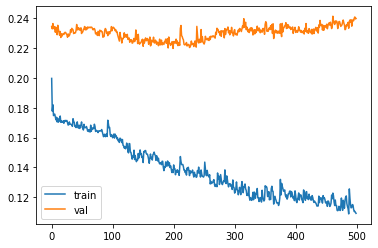

Epoch 1/500
64/79 [=======================>......] - ETA: 0s - loss: 1.3188 - mae: 0.3167
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 1.3123 - mae: 0.3044 - val_loss: 1.4083 - val_mae: 0.2683
Epoch 2/500
61/79 [======================>.......] - ETA: 0s - loss: 1.0040 - mae: 0.2815
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 1.0079 - mae: 0.2691 - val_loss: 1.2960 - val_mae: 0.2605
Epoch 3/500
63/79 [======================>.......] - ETA: 0s - loss: 0.8811 - mae: 0.2761
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.9132 - mae: 0.2684 - val_loss: 1.2288 - val_mae: 0.2712
Epoch 4/500
58/79 [=====================>........] - ETA: 0s - loss: 0.7302 - mae: 0.2570
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.7742 - mae: 0.2474 -

Epoch 33/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6240 - mae: 0.2567
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6488 - mae: 0.2538 - val_loss: 0.9790 - val_mae: 0.2916
Epoch 34/500
59/79 [=====================>........] - ETA: 0s - loss: 0.6382 - mae: 0.2637
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6399 - mae: 0.2525 - val_loss: 0.9725 - val_mae: 0.2889
Epoch 35/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6473 - mae: 0.2657
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6427 - mae: 0.2549 - val_loss: 0.9740 - val_mae: 0.2917
Epoch 36/500
67/79 [========================>.....] - ETA: 0s - loss: 0.6287 - mae: 0.2576
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6360 - mae: 0.25

Epoch 65/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6054 - mae: 0.2529
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6212 - mae: 0.2485 - val_loss: 1.0300 - val_mae: 0.2959
Epoch 66/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6468 - mae: 0.2607
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6363 - mae: 0.2491 - val_loss: 1.0466 - val_mae: 0.2940
Epoch 67/500
69/79 [=========================>....] - ETA: 0s - loss: 0.6164 - mae: 0.2508
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6312 - mae: 0.2495 - val_loss: 1.0337 - val_mae: 0.2948
Epoch 68/500
66/79 [========================>.....] - ETA: 0s - loss: 0.6177 - mae: 0.2555
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6277 - mae: 0.25

Epoch 00096: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6101 - mae: 0.2493 - val_loss: 0.9904 - val_mae: 0.2990
Epoch 97/500
60/79 [=====================>........] - ETA: 0s - loss: 0.6126 - mae: 0.2567
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6016 - mae: 0.2476 - val_loss: 0.9908 - val_mae: 0.2966
Epoch 98/500
64/79 [=======================>......] - ETA: 0s - loss: 0.6080 - mae: 0.2502
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6020 - mae: 0.2453 - val_loss: 0.9956 - val_mae: 0.2985
Epoch 99/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6111 - mae: 0.2526
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6089 - mae: 0.2474 - val_loss: 0.9864 - val_mae: 0.2967
Epoch 100/500
64/79 [=======================>......

Epoch 128/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6484 - mae: 0.2679
Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6218 - mae: 0.2547 - val_loss: 0.9987 - val_mae: 0.2910
Epoch 129/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6009 - mae: 0.2505
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6019 - mae: 0.2473 - val_loss: 0.9954 - val_mae: 0.2902
Epoch 130/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6219 - mae: 0.2562
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5986 - mae: 0.2459 - val_loss: 1.0082 - val_mae: 0.2934
Epoch 131/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6021 - mae: 0.2513
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6010 - mae: 

Epoch 160/500
76/79 [===========================>..] - ETA: 0s - loss: 0.5725 - mae: 0.2348
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5726 - mae: 0.2340 - val_loss: 1.0395 - val_mae: 0.2845
Epoch 161/500
62/79 [======================>.......] - ETA: 0s - loss: 0.5935 - mae: 0.2435
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5695 - mae: 0.2340 - val_loss: 1.0403 - val_mae: 0.2876
Epoch 162/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6008 - mae: 0.2435
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5870 - mae: 0.2377 - val_loss: 1.0194 - val_mae: 0.2886
Epoch 163/500
62/79 [======================>.......] - ETA: 0s - loss: 0.5987 - mae: 0.2415
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5710 - mae: 

Epoch 00191: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5605 - mae: 0.2284 - val_loss: 1.0219 - val_mae: 0.2923
Epoch 192/500
68/79 [========================>.....] - ETA: 0s - loss: 0.5801 - mae: 0.2348
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5711 - mae: 0.2303 - val_loss: 1.0356 - val_mae: 0.2877
Epoch 193/500
66/79 [========================>.....] - ETA: 0s - loss: 0.5848 - mae: 0.2391
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5679 - mae: 0.2319 - val_loss: 1.0380 - val_mae: 0.2876
Epoch 194/500
68/79 [========================>.....] - ETA: 0s - loss: 0.6128 - mae: 0.2442
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5973 - mae: 0.2379 - val_loss: 1.0158 - val_mae: 0.2814
Epoch 195/500
65/79 [=======================>...

Epoch 223/500
64/79 [=======================>......] - ETA: 0s - loss: 0.5959 - mae: 0.2403
Epoch 00223: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5745 - mae: 0.2315 - val_loss: 0.9847 - val_mae: 0.2825
Epoch 224/500
57/79 [====================>.........] - ETA: 0s - loss: 0.6122 - mae: 0.2516
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5796 - mae: 0.2353 - val_loss: 0.9941 - val_mae: 0.2774
Epoch 225/500
61/79 [======================>.......] - ETA: 0s - loss: 0.5882 - mae: 0.2416
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5586 - mae: 0.2289 - val_loss: 1.0066 - val_mae: 0.2774
Epoch 226/500
62/79 [======================>.......] - ETA: 0s - loss: 0.5832 - mae: 0.2381
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5568 - mae: 

Epoch 255/500
62/79 [======================>.......] - ETA: 0s - loss: 0.6015 - mae: 0.2390
Epoch 00255: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5699 - mae: 0.2292 - val_loss: 0.9936 - val_mae: 0.2767
Epoch 256/500
64/79 [=======================>......] - ETA: 0s - loss: 0.6332 - mae: 0.2533
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6039 - mae: 0.2432 - val_loss: 0.9755 - val_mae: 0.2765
Epoch 257/500
64/79 [=======================>......] - ETA: 0s - loss: 0.6177 - mae: 0.2519
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5916 - mae: 0.2420 - val_loss: 0.9903 - val_mae: 0.2739
Epoch 258/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6185 - mae: 0.2506
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5783 - mae: 

Epoch 00286: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5516 - mae: 0.2290 - val_loss: 0.9877 - val_mae: 0.2657
Epoch 287/500
68/79 [========================>.....] - ETA: 0s - loss: 0.6187 - mae: 0.2467
Epoch 00287: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6047 - mae: 0.2414 - val_loss: 1.0163 - val_mae: 0.2635
Epoch 288/500
69/79 [=========================>....] - ETA: 0s - loss: 0.5924 - mae: 0.2481
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5931 - mae: 0.2433 - val_loss: 1.0094 - val_mae: 0.2639
Epoch 289/500
66/79 [========================>.....] - ETA: 0s - loss: 0.5947 - mae: 0.2479
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5859 - mae: 0.2403 - val_loss: 1.0016 - val_mae: 0.2627
Epoch 290/500
69/79 [=========================>.

Epoch 318/500
65/79 [=======================>......] - ETA: 0s - loss: 0.5529 - mae: 0.2295
Epoch 00318: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5595 - mae: 0.2262 - val_loss: 0.9856 - val_mae: 0.2629
Epoch 319/500
65/79 [=======================>......] - ETA: 0s - loss: 0.5728 - mae: 0.2336
Epoch 00319: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5755 - mae: 0.2295 - val_loss: 0.9834 - val_mae: 0.2599
Epoch 320/500
62/79 [======================>.......] - ETA: 0s - loss: 0.5715 - mae: 0.2372
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5557 - mae: 0.2259 - val_loss: 0.9995 - val_mae: 0.2638
Epoch 321/500
65/79 [=======================>......] - ETA: 0s - loss: 0.5455 - mae: 0.2225
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5509 - mae: 

Epoch 350/500
63/79 [======================>.......] - ETA: 0s - loss: 0.5966 - mae: 0.2415
Epoch 00350: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5744 - mae: 0.2297 - val_loss: 1.0086 - val_mae: 0.2579
Epoch 351/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6311 - mae: 0.2490
Epoch 00351: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5936 - mae: 0.2339 - val_loss: 1.0005 - val_mae: 0.2529
Epoch 352/500
61/79 [======================>.......] - ETA: 0s - loss: 0.6697 - mae: 0.2671
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6221 - mae: 0.2474 - val_loss: 0.9931 - val_mae: 0.2517
Epoch 353/500
62/79 [======================>.......] - ETA: 0s - loss: 0.6376 - mae: 0.2632
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6010 - mae: 

Epoch 00381: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6516 - mae: 0.2633 - val_loss: 0.9534 - val_mae: 0.2821
Epoch 382/500
66/79 [========================>.....] - ETA: 0s - loss: 0.6496 - mae: 0.2693
Epoch 00382: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6295 - mae: 0.2605 - val_loss: 0.9656 - val_mae: 0.2833
Epoch 383/500
64/79 [=======================>......] - ETA: 0s - loss: 0.6553 - mae: 0.2726
Epoch 00383: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6303 - mae: 0.2598 - val_loss: 0.9625 - val_mae: 0.2822
Epoch 384/500
67/79 [========================>.....] - ETA: 0s - loss: 0.6615 - mae: 0.2701
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.6367 - mae: 0.2597 - val_loss: 0.9484 - val_mae: 0.2777
Epoch 385/500
67/79 [========================>..

Epoch 413/500
68/79 [========================>.....] - ETA: 0s - loss: 0.6308 - mae: 0.2548
Epoch 00413: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6203 - mae: 0.2495 - val_loss: 1.0294 - val_mae: 0.2919
Epoch 414/500
72/79 [==========================>...] - ETA: 0s - loss: 0.6370 - mae: 0.2441
Epoch 00414: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6465 - mae: 0.2471 - val_loss: 1.0234 - val_mae: 0.2894
Epoch 415/500
73/79 [==========================>...] - ETA: 0s - loss: 0.5968 - mae: 0.2425
Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6146 - mae: 0.2473 - val_loss: 1.0269 - val_mae: 0.2878
Epoch 416/500
75/79 [===========================>..] - ETA: 0s - loss: 0.6011 - mae: 0.2430
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6094 - mae: 

Epoch 00444: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5819 - mae: 0.2411 - val_loss: 1.0244 - val_mae: 0.2896
Epoch 445/500
68/79 [========================>.....] - ETA: 0s - loss: 0.5956 - mae: 0.2444
Epoch 00445: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5770 - mae: 0.2380 - val_loss: 1.0303 - val_mae: 0.2884
Epoch 446/500
68/79 [========================>.....] - ETA: 0s - loss: 0.5818 - mae: 0.2386
Epoch 00446: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5611 - mae: 0.2315 - val_loss: 1.0338 - val_mae: 0.2888
Epoch 447/500
67/79 [========================>.....] - ETA: 0s - loss: 0.6052 - mae: 0.2398
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5770 - mae: 0.2311 - val_loss: 1.0431 - val_mae: 0.2873
Epoch 448/500
64/79 [=======================>...

Epoch 476/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6110 - mae: 0.2518
Epoch 00476: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5765 - mae: 0.2373 - val_loss: 1.0495 - val_mae: 0.2824
Epoch 477/500
65/79 [=======================>......] - ETA: 0s - loss: 0.6094 - mae: 0.2500
Epoch 00477: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5747 - mae: 0.2357 - val_loss: 1.0409 - val_mae: 0.2819
Epoch 478/500
68/79 [========================>.....] - ETA: 0s - loss: 0.6027 - mae: 0.2416
Epoch 00478: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5759 - mae: 0.2331 - val_loss: 1.0465 - val_mae: 0.2815
Epoch 479/500
63/79 [======================>.......] - ETA: 0s - loss: 0.6284 - mae: 0.2547
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5758 - mae: 

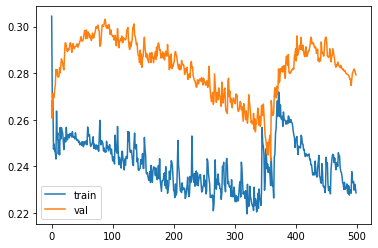

Epoch 1/500
68/79 [========================>.....] - ETA: 0s - loss: 0.6673 - mae: 0.2180
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5972 - mae: 0.1994 - val_loss: 0.4569 - val_mae: 0.1903
Epoch 2/500
66/79 [========================>.....] - ETA: 0s - loss: 0.5940 - mae: 0.2065
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5466 - mae: 0.1928 - val_loss: 0.4422 - val_mae: 0.1796
Epoch 3/500
68/79 [========================>.....] - ETA: 0s - loss: 0.5909 - mae: 0.2003
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5398 - mae: 0.1872 - val_loss: 0.4285 - val_mae: 0.1707
Epoch 4/500
63/79 [======================>.......] - ETA: 0s - loss: 0.5940 - mae: 0.2024
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5313 - mae: 0.1870 -

Epoch 33/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4715 - mae: 0.1842
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4421 - mae: 0.1769 - val_loss: 0.3709 - val_mae: 0.1541
Epoch 34/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4607 - mae: 0.1813
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4394 - mae: 0.1758 - val_loss: 0.3683 - val_mae: 0.1507
Epoch 35/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4802 - mae: 0.1857
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4391 - mae: 0.1750 - val_loss: 0.3657 - val_mae: 0.1490
Epoch 36/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4955 - mae: 0.1855
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4556 - mae: 0.17

Epoch 65/500
74/79 [===========================>..] - ETA: 0s - loss: 0.4371 - mae: 0.1744
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4198 - mae: 0.1695 - val_loss: 0.3713 - val_mae: 0.1476
Epoch 66/500
69/79 [=========================>....] - ETA: 0s - loss: 0.4575 - mae: 0.1808
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4217 - mae: 0.1712 - val_loss: 0.3750 - val_mae: 0.1485
Epoch 67/500
70/79 [=========================>....] - ETA: 0s - loss: 0.4641 - mae: 0.1844
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4308 - mae: 0.1751 - val_loss: 0.3769 - val_mae: 0.1528
Epoch 68/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4770 - mae: 0.1891
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4365 - mae: 0.17

Epoch 00096: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4173 - mae: 0.1678 - val_loss: 0.3690 - val_mae: 0.1499
Epoch 97/500
71/79 [=========================>....] - ETA: 0s - loss: 0.4446 - mae: 0.1767
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4161 - mae: 0.1686 - val_loss: 0.3827 - val_mae: 0.1484
Epoch 98/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4637 - mae: 0.1799
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4189 - mae: 0.1689 - val_loss: 0.3726 - val_mae: 0.1545
Epoch 99/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4350 - mae: 0.1747
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4157 - mae: 0.1696 - val_loss: 0.3754 - val_mae: 0.1477
Epoch 100/500
75/79 [===========================>..

Epoch 128/500
68/79 [========================>.....] - ETA: 0s - loss: 0.4417 - mae: 0.1771
Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4114 - mae: 0.1689 - val_loss: 0.3927 - val_mae: 0.1522
Epoch 129/500
76/79 [===========================>..] - ETA: 0s - loss: 0.4279 - mae: 0.1713
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4180 - mae: 0.1685 - val_loss: 0.4036 - val_mae: 0.1568
Epoch 130/500
55/79 [===================>..........] - ETA: 0s - loss: 0.4542 - mae: 0.1796
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4144 - mae: 0.1695 - val_loss: 0.4022 - val_mae: 0.1558
Epoch 131/500
58/79 [=====================>........] - ETA: 0s - loss: 0.4372 - mae: 0.1758
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4114 - mae: 

Epoch 160/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4314 - mae: 0.1723
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3999 - mae: 0.1630 - val_loss: 0.3992 - val_mae: 0.1465
Epoch 161/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4405 - mae: 0.1751
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4127 - mae: 0.1680 - val_loss: 0.3811 - val_mae: 0.1462
Epoch 162/500
60/79 [=====================>........] - ETA: 0s - loss: 0.4200 - mae: 0.1728
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4028 - mae: 0.1671 - val_loss: 0.3849 - val_mae: 0.1443
Epoch 163/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4141 - mae: 0.1685
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3978 - mae: 

Epoch 192/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4085 - mae: 0.1661
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3883 - mae: 0.1600 - val_loss: 0.4174 - val_mae: 0.1510
Epoch 193/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4141 - mae: 0.1707
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3833 - mae: 0.1606 - val_loss: 0.4163 - val_mae: 0.1492
Epoch 194/500
67/79 [========================>.....] - ETA: 0s - loss: 0.3938 - mae: 0.1617
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3839 - mae: 0.1583 - val_loss: 0.4131 - val_mae: 0.1472
Epoch 195/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4045 - mae: 0.1667
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3808 - mae: 

Epoch 224/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4124 - mae: 0.1621
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3907 - mae: 0.1551 - val_loss: 0.4341 - val_mae: 0.1505
Epoch 225/500
70/79 [=========================>....] - ETA: 0s - loss: 0.4023 - mae: 0.1631
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3757 - mae: 0.1557 - val_loss: 0.4181 - val_mae: 0.1427
Epoch 226/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3858 - mae: 0.1620
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3752 - mae: 0.1561 - val_loss: 0.4368 - val_mae: 0.1521
Epoch 227/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3968 - mae: 0.1606
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3776 - mae: 

Epoch 00255: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3708 - mae: 0.1558 - val_loss: 0.4371 - val_mae: 0.1553
Epoch 256/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3802 - mae: 0.1588
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3650 - mae: 0.1540 - val_loss: 0.4455 - val_mae: 0.1546
Epoch 257/500
67/79 [========================>.....] - ETA: 0s - loss: 0.3752 - mae: 0.1567
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3655 - mae: 0.1544 - val_loss: 0.4309 - val_mae: 0.1451
Epoch 258/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3833 - mae: 0.1569
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3696 - mae: 0.1530 - val_loss: 0.4379 - val_mae: 0.1465
Epoch 259/500
69/79 [=========================>.

Epoch 287/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4197 - mae: 0.1688
Epoch 00287: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3802 - mae: 0.1580 - val_loss: 0.3809 - val_mae: 0.1363
Epoch 288/500
63/79 [======================>.......] - ETA: 0s - loss: 0.3994 - mae: 0.1594
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3746 - mae: 0.1522 - val_loss: 0.3817 - val_mae: 0.1379
Epoch 289/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3909 - mae: 0.1559
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3868 - mae: 0.1537 - val_loss: 0.3882 - val_mae: 0.1332
Epoch 290/500
60/79 [=====================>........] - ETA: 0s - loss: 0.3810 - mae: 0.1544
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3746 - mae: 

Epoch 319/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3932 - mae: 0.1596
Epoch 00319: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3805 - mae: 0.1542 - val_loss: 0.4029 - val_mae: 0.1358
Epoch 320/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3682 - mae: 0.1504
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3598 - mae: 0.1453 - val_loss: 0.3894 - val_mae: 0.1269
Epoch 321/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3781 - mae: 0.1481
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3668 - mae: 0.1415 - val_loss: 0.3932 - val_mae: 0.1293
Epoch 322/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3766 - mae: 0.1456
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3705 - mae: 

Epoch 351/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3834 - mae: 0.1540
Epoch 00351: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3584 - mae: 0.1437 - val_loss: 0.3979 - val_mae: 0.1478
Epoch 352/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3851 - mae: 0.1569
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3642 - mae: 0.1491 - val_loss: 0.3723 - val_mae: 0.1334
Epoch 353/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3774 - mae: 0.1549
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3606 - mae: 0.1484 - val_loss: 0.4164 - val_mae: 0.1582
Epoch 354/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3696 - mae: 0.1528
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3538 - mae: 

Epoch 00382: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3458 - mae: 0.1437 - val_loss: 0.4243 - val_mae: 0.1571
Epoch 383/500
71/79 [=========================>....] - ETA: 0s - loss: 0.3631 - mae: 0.1475
Epoch 00383: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3417 - mae: 0.1411 - val_loss: 0.3890 - val_mae: 0.1358
Epoch 384/500
70/79 [=========================>....] - ETA: 0s - loss: 0.3669 - mae: 0.1495
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3416 - mae: 0.1418 - val_loss: 0.4105 - val_mae: 0.1467
Epoch 385/500
71/79 [=========================>....] - ETA: 0s - loss: 0.3796 - mae: 0.1534
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3578 - mae: 0.1472 - val_loss: 0.3936 - val_mae: 0.1417
Epoch 386/500
72/79 [==========================>

Epoch 414/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3607 - mae: 0.1471
Epoch 00414: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3413 - mae: 0.1406 - val_loss: 0.4805 - val_mae: 0.1728
Epoch 415/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3881 - mae: 0.1486
Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3636 - mae: 0.1426 - val_loss: 0.4274 - val_mae: 0.1401
Epoch 416/500
63/79 [======================>.......] - ETA: 0s - loss: 0.3785 - mae: 0.1564
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3458 - mae: 0.1442 - val_loss: 0.4782 - val_mae: 0.1743
Epoch 417/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3539 - mae: 0.1459
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3430 - mae: 

Epoch 446/500
67/79 [========================>.....] - ETA: 0s - loss: 0.3426 - mae: 0.1445
Epoch 00446: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3313 - mae: 0.1382 - val_loss: 0.4256 - val_mae: 0.1527
Epoch 447/500
62/79 [======================>.......] - ETA: 0s - loss: 0.3669 - mae: 0.1456
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3389 - mae: 0.1371 - val_loss: 0.4294 - val_mae: 0.1534
Epoch 448/500
63/79 [======================>.......] - ETA: 0s - loss: 0.3744 - mae: 0.1518
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3464 - mae: 0.1418 - val_loss: 0.4584 - val_mae: 0.1795
Epoch 449/500
62/79 [======================>.......] - ETA: 0s - loss: 0.3705 - mae: 0.1559
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3408 - mae: 

Epoch 478/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3512 - mae: 0.1482
Epoch 00478: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3320 - mae: 0.1413 - val_loss: 0.4784 - val_mae: 0.1802
Epoch 479/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3623 - mae: 0.1477
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3385 - mae: 0.1391 - val_loss: 0.4979 - val_mae: 0.1914
Epoch 480/500
67/79 [========================>.....] - ETA: 0s - loss: 0.3497 - mae: 0.1440
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3392 - mae: 0.1417 - val_loss: 0.4668 - val_mae: 0.1575
Epoch 481/500
68/79 [========================>.....] - ETA: 0s - loss: 0.3468 - mae: 0.1453
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3243 - mae: 

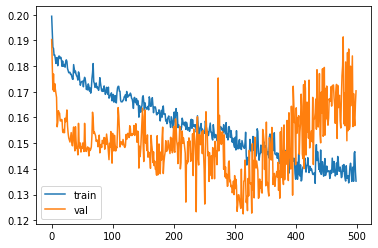

Epoch 1/500
64/89 [====================>.........] - ETA: 0s - loss: 0.4887 - mae: 0.1426
Epoch 00001: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.5449 - mae: 0.1440 - val_loss: 0.4369 - val_mae: 0.1187
Epoch 2/500
68/89 [=====================>........] - ETA: 0s - loss: 0.4594 - mae: 0.1308
Epoch 00002: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4696 - mae: 0.1315 - val_loss: 0.3667 - val_mae: 0.1269
Epoch 3/500
84/89 [===========================>..] - ETA: 0s - loss: 0.4185 - mae: 0.1371
Epoch 00003: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4644 - mae: 0.1434 - val_loss: 0.3745 - val_mae: 0.1189
Epoch 4/500
66/89 [=====================>........] - ETA: 0s - loss: 0.4530 - mae: 0.1423
Epoch 00004: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4544 - mae: 0.1398 -

Epoch 33/500
71/89 [======================>.......] - ETA: 0s - loss: 0.3732 - mae: 0.1370
Epoch 00033: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3935 - mae: 0.1381 - val_loss: 0.3556 - val_mae: 0.1143
Epoch 34/500
69/89 [======================>.......] - ETA: 0s - loss: 0.3820 - mae: 0.1402
Epoch 00034: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3928 - mae: 0.1382 - val_loss: 0.3565 - val_mae: 0.1148
Epoch 35/500
65/89 [====================>.........] - ETA: 0s - loss: 0.3742 - mae: 0.1398
Epoch 00035: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3931 - mae: 0.1387 - val_loss: 0.3555 - val_mae: 0.1153
Epoch 36/500
64/89 [====================>.........] - ETA: 0s - loss: 0.3583 - mae: 0.1361
Epoch 00036: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3908 - mae: 0.13

Epoch 65/500
62/89 [===================>..........] - ETA: 0s - loss: 0.4326 - mae: 0.1347
Epoch 00065: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4249 - mae: 0.1408 - val_loss: 0.3911 - val_mae: 0.1262
Epoch 66/500
63/89 [====================>.........] - ETA: 0s - loss: 0.4273 - mae: 0.1335
Epoch 00066: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4251 - mae: 0.1410 - val_loss: 0.3891 - val_mae: 0.1265
Epoch 67/500
64/89 [====================>.........] - ETA: 0s - loss: 0.4208 - mae: 0.1320
Epoch 00067: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4242 - mae: 0.1408 - val_loss: 0.3925 - val_mae: 0.1255
Epoch 68/500
65/89 [====================>.........] - ETA: 0s - loss: 0.4294 - mae: 0.1352
Epoch 00068: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4243 - mae: 0.14

Epoch 00096: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4029 - mae: 0.1374 - val_loss: 0.4033 - val_mae: 0.1125
Epoch 97/500
69/89 [======================>.......] - ETA: 0s - loss: 0.4082 - mae: 0.1335
Epoch 00097: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4026 - mae: 0.1377 - val_loss: 0.4055 - val_mae: 0.1140
Epoch 98/500
67/89 [=====================>........] - ETA: 0s - loss: 0.4144 - mae: 0.1357
Epoch 00098: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4031 - mae: 0.1387 - val_loss: 0.4068 - val_mae: 0.1141
Epoch 99/500
67/89 [=====================>........] - ETA: 0s - loss: 0.4111 - mae: 0.1356
Epoch 00099: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4025 - mae: 0.1396 - val_loss: 0.4093 - val_mae: 0.1198
Epoch 100/500
65/89 [====================>.........

Epoch 128/500
68/89 [=====================>........] - ETA: 0s - loss: 0.4126 - mae: 0.1330
Epoch 00128: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4027 - mae: 0.1368 - val_loss: 0.3958 - val_mae: 0.1132
Epoch 129/500
65/89 [====================>.........] - ETA: 0s - loss: 0.4120 - mae: 0.1341
Epoch 00129: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4032 - mae: 0.1384 - val_loss: 0.3915 - val_mae: 0.1081
Epoch 130/500
62/89 [===================>..........] - ETA: 0s - loss: 0.4139 - mae: 0.1272
Epoch 00130: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4038 - mae: 0.1331 - val_loss: 0.3782 - val_mae: 0.1180
Epoch 131/500
63/89 [====================>.........] - ETA: 0s - loss: 0.4092 - mae: 0.1358
Epoch 00131: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.4042 - mae: 

Epoch 160/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3743 - mae: 0.1284
Epoch 00160: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3650 - mae: 0.1325 - val_loss: 0.3755 - val_mae: 0.1200
Epoch 161/500
69/89 [======================>.......] - ETA: 0s - loss: 0.3668 - mae: 0.1271
Epoch 00161: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3637 - mae: 0.1321 - val_loss: 0.3750 - val_mae: 0.1190
Epoch 162/500
65/89 [====================>.........] - ETA: 0s - loss: 0.3744 - mae: 0.1305
Epoch 00162: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3718 - mae: 0.1359 - val_loss: 0.3791 - val_mae: 0.1196
Epoch 163/500
70/89 [======================>.......] - ETA: 0s - loss: 0.3709 - mae: 0.1286
Epoch 00163: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3721 - mae: 

Epoch 192/500
70/89 [======================>.......] - ETA: 0s - loss: 0.3463 - mae: 0.1256
Epoch 00192: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3485 - mae: 0.1305 - val_loss: 0.3831 - val_mae: 0.1193
Epoch 193/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3592 - mae: 0.1293
Epoch 00193: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3542 - mae: 0.1317 - val_loss: 0.3860 - val_mae: 0.1209
Epoch 194/500
63/89 [====================>.........] - ETA: 0s - loss: 0.3508 - mae: 0.1246
Epoch 00194: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3541 - mae: 0.1325 - val_loss: 0.3877 - val_mae: 0.1214
Epoch 195/500
70/89 [======================>.......] - ETA: 0s - loss: 0.3452 - mae: 0.1252
Epoch 00195: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3502 - mae: 

Epoch 224/500
65/89 [====================>.........] - ETA: 0s - loss: 0.3395 - mae: 0.1235
Epoch 00224: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3410 - mae: 0.1293 - val_loss: 0.3813 - val_mae: 0.1165
Epoch 225/500
68/89 [=====================>........] - ETA: 0s - loss: 0.3391 - mae: 0.1243
Epoch 00225: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3401 - mae: 0.1293 - val_loss: 0.3823 - val_mae: 0.1165
Epoch 226/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3425 - mae: 0.1250
Epoch 00226: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3385 - mae: 0.1285 - val_loss: 0.3832 - val_mae: 0.1157
Epoch 227/500
63/89 [====================>.........] - ETA: 0s - loss: 0.3415 - mae: 0.1237
Epoch 00227: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3427 - mae: 

Epoch 00255: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3369 - mae: 0.1255 - val_loss: 0.3855 - val_mae: 0.1190
Epoch 256/500
67/89 [=====================>........] - ETA: 0s - loss: 0.3362 - mae: 0.1217
Epoch 00256: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3356 - mae: 0.1253 - val_loss: 0.3882 - val_mae: 0.1201
Epoch 257/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3392 - mae: 0.1226
Epoch 00257: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3387 - mae: 0.1271 - val_loss: 0.3868 - val_mae: 0.1179
Epoch 258/500
64/89 [====================>.........] - ETA: 0s - loss: 0.3279 - mae: 0.1178
Epoch 00258: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3381 - mae: 0.1256 - val_loss: 0.3851 - val_mae: 0.1181
Epoch 259/500
61/89 [===================>.......

Epoch 287/500
64/89 [====================>.........] - ETA: 0s - loss: 0.3108 - mae: 0.1098
Epoch 00287: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3186 - mae: 0.1215 - val_loss: 0.3956 - val_mae: 0.1254
Epoch 288/500
65/89 [====================>.........] - ETA: 0s - loss: 0.3131 - mae: 0.1127
Epoch 00288: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3154 - mae: 0.1212 - val_loss: 0.3942 - val_mae: 0.1242
Epoch 289/500
63/89 [====================>.........] - ETA: 0s - loss: 0.3098 - mae: 0.1107
Epoch 00289: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3153 - mae: 0.1213 - val_loss: 0.3906 - val_mae: 0.1251
Epoch 290/500
67/89 [=====================>........] - ETA: 0s - loss: 0.3177 - mae: 0.1129
Epoch 00290: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3178 - mae: 

Epoch 319/500
69/89 [======================>.......] - ETA: 0s - loss: 0.3110 - mae: 0.1148
Epoch 00319: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3112 - mae: 0.1208 - val_loss: 0.4030 - val_mae: 0.1237
Epoch 320/500
67/89 [=====================>........] - ETA: 0s - loss: 0.3103 - mae: 0.1146
Epoch 00320: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3105 - mae: 0.1210 - val_loss: 0.4294 - val_mae: 0.1215
Epoch 321/500
64/89 [====================>.........] - ETA: 0s - loss: 0.3119 - mae: 0.1070
Epoch 00321: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3161 - mae: 0.1180 - val_loss: 0.4151 - val_mae: 0.1230
Epoch 322/500
59/89 [==================>...........] - ETA: 0s - loss: 0.3232 - mae: 0.1148
Epoch 00322: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3089 - mae: 

Epoch 00350: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2954 - mae: 0.1156 - val_loss: 0.4321 - val_mae: 0.1256
Epoch 351/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3014 - mae: 0.1093
Epoch 00351: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2955 - mae: 0.1153 - val_loss: 0.4431 - val_mae: 0.1250
Epoch 352/500
64/89 [====================>.........] - ETA: 0s - loss: 0.3090 - mae: 0.1117
Epoch 00352: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3109 - mae: 0.1209 - val_loss: 0.4083 - val_mae: 0.1253
Epoch 353/500
62/89 [===================>..........] - ETA: 0s - loss: 0.3066 - mae: 0.1125
Epoch 00353: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3052 - mae: 0.1209 - val_loss: 0.4338 - val_mae: 0.1230
Epoch 354/500
64/89 [====================>......

Epoch 382/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3030 - mae: 0.1103
Epoch 00382: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2979 - mae: 0.1158 - val_loss: 0.4478 - val_mae: 0.1253
Epoch 383/500
68/89 [=====================>........] - ETA: 0s - loss: 0.2891 - mae: 0.1076
Epoch 00383: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2897 - mae: 0.1143 - val_loss: 0.4612 - val_mae: 0.1259
Epoch 384/500
73/89 [=======================>......] - ETA: 0s - loss: 0.2935 - mae: 0.1074
Epoch 00384: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3022 - mae: 0.1177 - val_loss: 0.4503 - val_mae: 0.1280
Epoch 385/500
61/89 [===================>..........] - ETA: 0s - loss: 0.2933 - mae: 0.1051
Epoch 00385: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2902 - mae: 

Epoch 414/500
63/89 [====================>.........] - ETA: 0s - loss: 0.2955 - mae: 0.1045
Epoch 00414: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2961 - mae: 0.1149 - val_loss: 0.4730 - val_mae: 0.1258
Epoch 415/500
60/89 [===================>..........] - ETA: 0s - loss: 0.2952 - mae: 0.1044
Epoch 00415: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 4ms/step - loss: 0.2877 - mae: 0.1125 - val_loss: 0.4737 - val_mae: 0.1258
Epoch 416/500
59/89 [==================>...........] - ETA: 0s - loss: 0.3015 - mae: 0.1072
Epoch 00416: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2894 - mae: 0.1136 - val_loss: 0.4744 - val_mae: 0.1258
Epoch 417/500
63/89 [====================>.........] - ETA: 0s - loss: 0.2915 - mae: 0.1041
Epoch 00417: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2930 - mae: 

Epoch 446/500
64/89 [====================>.........] - ETA: 0s - loss: 0.2756 - mae: 0.0994
Epoch 00446: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2897 - mae: 0.1110 - val_loss: 0.4657 - val_mae: 0.1209
Epoch 447/500
66/89 [=====================>........] - ETA: 0s - loss: 0.2856 - mae: 0.1046
Epoch 00447: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2853 - mae: 0.1112 - val_loss: 0.4603 - val_mae: 0.1233
Epoch 448/500
66/89 [=====================>........] - ETA: 0s - loss: 0.2858 - mae: 0.1041
Epoch 00448: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2855 - mae: 0.1111 - val_loss: 0.4630 - val_mae: 0.1266
Epoch 449/500
68/89 [=====================>........] - ETA: 0s - loss: 0.2801 - mae: 0.1038
Epoch 00449: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2833 - mae: 

Epoch 00477: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3023 - mae: 0.1144 - val_loss: 0.4778 - val_mae: 0.1247
Epoch 478/500
69/89 [======================>.......] - ETA: 0s - loss: 0.2866 - mae: 0.1055
Epoch 00478: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2896 - mae: 0.1120 - val_loss: 0.4850 - val_mae: 0.1265
Epoch 479/500
66/89 [=====================>........] - ETA: 0s - loss: 0.3075 - mae: 0.1088
Epoch 00479: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.3014 - mae: 0.1138 - val_loss: 0.4823 - val_mae: 0.1274
Epoch 480/500
67/89 [=====================>........] - ETA: 0s - loss: 0.2917 - mae: 0.1080
Epoch 00480: val_mae did not improve from 0.10687
89/89 [==============================] - 0s 3ms/step - loss: 0.2892 - mae: 0.1134 - val_loss: 0.4807 - val_mae: 0.1243
Epoch 481/500
69/89 [======================>....

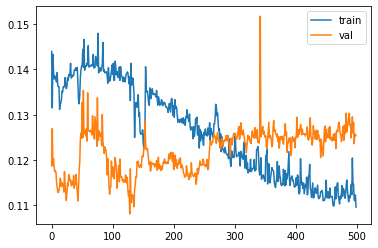

Epoch 1/500
59/82 [====================>.........] - ETA: 0s - loss: 1.0050 - mae: 0.1786
Epoch 00001: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.9037 - mae: 0.1768 - val_loss: 1.2761 - val_mae: 0.2235
Epoch 2/500
81/82 [============================>.] - ETA: 0s - loss: 0.7050 - mae: 0.1748
Epoch 00002: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.7020 - mae: 0.1755 - val_loss: 0.9847 - val_mae: 0.2369
Epoch 3/500
82/82 [==============================] - ETA: 0s - loss: 0.5947 - mae: 0.1815
Epoch 00003: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5947 - mae: 0.1815 - val_loss: 0.9085 - val_mae: 0.2391
Epoch 4/500
56/82 [===================>..........] - ETA: 0s - loss: 0.5624 - mae: 0.1805
Epoch 00004: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5627 - mae: 0.1842 -

Epoch 33/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5466 - mae: 0.1930
Epoch 00033: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5144 - mae: 0.1910 - val_loss: 0.8036 - val_mae: 0.2538
Epoch 34/500
68/82 [=======================>......] - ETA: 0s - loss: 0.5224 - mae: 0.1900
Epoch 00034: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5061 - mae: 0.1916 - val_loss: 0.8025 - val_mae: 0.2541
Epoch 35/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5329 - mae: 0.1940
Epoch 00035: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5037 - mae: 0.1919 - val_loss: 0.8054 - val_mae: 0.2539
Epoch 36/500
69/82 [========================>.....] - ETA: 0s - loss: 0.5134 - mae: 0.1895
Epoch 00036: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4995 - mae: 0.19

Epoch 00064: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4694 - mae: 0.1793 - val_loss: 0.7978 - val_mae: 0.2527
Epoch 65/500
65/82 [======================>.......] - ETA: 0s - loss: 0.5076 - mae: 0.1842
Epoch 00065: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4677 - mae: 0.1780 - val_loss: 0.7895 - val_mae: 0.2511
Epoch 66/500
67/82 [=======================>......] - ETA: 0s - loss: 0.5005 - mae: 0.1818
Epoch 00066: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4700 - mae: 0.1777 - val_loss: 0.7808 - val_mae: 0.2497
Epoch 67/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5140 - mae: 0.1851
Epoch 00067: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4663 - mae: 0.1785 - val_loss: 0.7710 - val_mae: 0.2491
Epoch 68/500
64/82 [======================>.......]

Epoch 96/500
61/82 [=====================>........] - ETA: 0s - loss: 0.4831 - mae: 0.1765
Epoch 00096: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4472 - mae: 0.1719 - val_loss: 0.7658 - val_mae: 0.2442
Epoch 97/500
61/82 [=====================>........] - ETA: 0s - loss: 0.4844 - mae: 0.1752
Epoch 00097: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4493 - mae: 0.1714 - val_loss: 0.7701 - val_mae: 0.2468
Epoch 98/500
62/82 [=====================>........] - ETA: 0s - loss: 0.4924 - mae: 0.1782
Epoch 00098: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4431 - mae: 0.1709 - val_loss: 0.7584 - val_mae: 0.2446
Epoch 99/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4870 - mae: 0.1766
Epoch 00099: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4452 - mae: 0.17

Epoch 00127: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4422 - mae: 0.1706 - val_loss: 0.7431 - val_mae: 0.2423
Epoch 128/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4747 - mae: 0.1756
Epoch 00128: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4406 - mae: 0.1717 - val_loss: 0.7395 - val_mae: 0.2410
Epoch 129/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4788 - mae: 0.1775
Epoch 00129: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4393 - mae: 0.1722 - val_loss: 0.7505 - val_mae: 0.2417
Epoch 130/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4823 - mae: 0.1787
Epoch 00130: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4419 - mae: 0.1732 - val_loss: 0.7631 - val_mae: 0.2375
Epoch 131/500
63/82 [======================>....

Epoch 159/500
61/82 [=====================>........] - ETA: 0s - loss: 0.4646 - mae: 0.1719
Epoch 00159: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4332 - mae: 0.1683 - val_loss: 0.7751 - val_mae: 0.2421
Epoch 160/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4845 - mae: 0.1754
Epoch 00160: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4351 - mae: 0.1675 - val_loss: 0.7675 - val_mae: 0.2420
Epoch 161/500
62/82 [=====================>........] - ETA: 0s - loss: 0.4771 - mae: 0.1735
Epoch 00161: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4385 - mae: 0.1684 - val_loss: 0.7651 - val_mae: 0.2401
Epoch 162/500
59/82 [====================>.........] - ETA: 0s - loss: 0.4460 - mae: 0.1665
Epoch 00162: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4417 - mae: 

Epoch 191/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4621 - mae: 0.1717
Epoch 00191: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4226 - mae: 0.1668 - val_loss: 0.7687 - val_mae: 0.2470
Epoch 192/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4546 - mae: 0.1720
Epoch 00192: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4182 - mae: 0.1663 - val_loss: 0.7703 - val_mae: 0.2467
Epoch 193/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4513 - mae: 0.1692
Epoch 00193: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4177 - mae: 0.1646 - val_loss: 0.7841 - val_mae: 0.2494
Epoch 194/500
62/82 [=====================>........] - ETA: 0s - loss: 0.4545 - mae: 0.1690
Epoch 00194: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4171 - mae: 

Epoch 223/500
69/82 [========================>.....] - ETA: 0s - loss: 0.4379 - mae: 0.1691
Epoch 00223: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4183 - mae: 0.1668 - val_loss: 0.8617 - val_mae: 0.2518
Epoch 224/500
72/82 [=========================>....] - ETA: 0s - loss: 0.4540 - mae: 0.1598
Epoch 00224: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4456 - mae: 0.1630 - val_loss: 0.8052 - val_mae: 0.2464
Epoch 225/500
76/82 [==========================>...] - ETA: 0s - loss: 0.4294 - mae: 0.1660
Epoch 00225: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4221 - mae: 0.1659 - val_loss: 0.8189 - val_mae: 0.2497
Epoch 226/500
74/82 [==========================>...] - ETA: 0s - loss: 0.4232 - mae: 0.1642
Epoch 00226: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4156 - mae: 

Epoch 255/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4413 - mae: 0.1645
Epoch 00255: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4127 - mae: 0.1578 - val_loss: 0.8209 - val_mae: 0.2498
Epoch 256/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4509 - mae: 0.1679
Epoch 00256: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4185 - mae: 0.1624 - val_loss: 0.8260 - val_mae: 0.2520
Epoch 257/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4479 - mae: 0.1656
Epoch 00257: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4105 - mae: 0.1588 - val_loss: 0.8381 - val_mae: 0.2513
Epoch 258/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4530 - mae: 0.1664
Epoch 00258: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4125 - mae: 

Epoch 00286: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3943 - mae: 0.1567 - val_loss: 0.8379 - val_mae: 0.2523
Epoch 287/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4250 - mae: 0.1619
Epoch 00287: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3933 - mae: 0.1569 - val_loss: 0.8464 - val_mae: 0.2489
Epoch 288/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4471 - mae: 0.1642
Epoch 00288: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4130 - mae: 0.1592 - val_loss: 0.8294 - val_mae: 0.2522
Epoch 289/500
66/82 [=======================>......] - ETA: 0s - loss: 0.4286 - mae: 0.1648
Epoch 00289: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3964 - mae: 0.1588 - val_loss: 0.8335 - val_mae: 0.2503
Epoch 290/500
66/82 [=======================>...

Epoch 318/500
70/82 [========================>.....] - ETA: 0s - loss: 0.4127 - mae: 0.1609
Epoch 00318: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3925 - mae: 0.1570 - val_loss: 0.8369 - val_mae: 0.2477
Epoch 319/500
69/82 [========================>.....] - ETA: 0s - loss: 0.4143 - mae: 0.1613
Epoch 00319: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3932 - mae: 0.1574 - val_loss: 0.8325 - val_mae: 0.2466
Epoch 320/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4332 - mae: 0.1654
Epoch 00320: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3948 - mae: 0.1580 - val_loss: 0.8326 - val_mae: 0.2475
Epoch 321/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4266 - mae: 0.1635
Epoch 00321: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3908 - mae: 

Epoch 00349: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4142 - mae: 0.1620 - val_loss: 0.9071 - val_mae: 0.2474
Epoch 350/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4543 - mae: 0.1656
Epoch 00350: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4108 - mae: 0.1587 - val_loss: 0.9357 - val_mae: 0.2508
Epoch 351/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4533 - mae: 0.1664
Epoch 00351: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4170 - mae: 0.1611 - val_loss: 0.9286 - val_mae: 0.2491
Epoch 352/500
62/82 [=====================>........] - ETA: 0s - loss: 0.4455 - mae: 0.1619
Epoch 00352: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4109 - mae: 0.1573 - val_loss: 0.9353 - val_mae: 0.2460
Epoch 353/500
80/82 [===========================

Epoch 381/500
67/82 [=======================>......] - ETA: 0s - loss: 0.4693 - mae: 0.1684
Epoch 00381: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4312 - mae: 0.1614 - val_loss: 0.9131 - val_mae: 0.2533
Epoch 382/500
60/82 [====================>.........] - ETA: 0s - loss: 0.4552 - mae: 0.1604
Epoch 00382: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4287 - mae: 0.1602 - val_loss: 0.9106 - val_mae: 0.2530
Epoch 383/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4698 - mae: 0.1687
Epoch 00383: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4286 - mae: 0.1621 - val_loss: 0.9181 - val_mae: 0.2549
Epoch 384/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4720 - mae: 0.1685
Epoch 00384: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4255 - mae: 

Epoch 413/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4201 - mae: 0.1602
Epoch 00413: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3859 - mae: 0.1534 - val_loss: 0.8896 - val_mae: 0.2504
Epoch 414/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4151 - mae: 0.1599
Epoch 00414: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3806 - mae: 0.1526 - val_loss: 0.8862 - val_mae: 0.2498
Epoch 415/500
69/82 [========================>.....] - ETA: 0s - loss: 0.4019 - mae: 0.1574
Epoch 00415: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.3816 - mae: 0.1536 - val_loss: 0.8746 - val_mae: 0.2485
Epoch 416/500
63/82 [======================>.......] - ETA: 0s - loss: 0.4352 - mae: 0.1637
Epoch 00416: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.3896 - mae: 

Epoch 445/500
68/82 [=======================>......] - ETA: 0s - loss: 0.4744 - mae: 0.1712
Epoch 00445: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4363 - mae: 0.1628 - val_loss: 0.9301 - val_mae: 0.2588
Epoch 446/500
65/82 [======================>.......] - ETA: 0s - loss: 0.4760 - mae: 0.1694
Epoch 00446: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4297 - mae: 0.1602 - val_loss: 0.9310 - val_mae: 0.2593
Epoch 447/500
64/82 [======================>.......] - ETA: 0s - loss: 0.4826 - mae: 0.1716
Epoch 00447: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4368 - mae: 0.1633 - val_loss: 0.9298 - val_mae: 0.2581
Epoch 448/500
68/82 [=======================>......] - ETA: 0s - loss: 0.4722 - mae: 0.1708
Epoch 00448: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4363 - mae: 

Epoch 477/500
72/82 [=========================>....] - ETA: 0s - loss: 0.4446 - mae: 0.1639
Epoch 00477: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4283 - mae: 0.1617 - val_loss: 0.9588 - val_mae: 0.2592
Epoch 478/500
81/82 [============================>.] - ETA: 0s - loss: 0.4308 - mae: 0.1623
Epoch 00478: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4295 - mae: 0.1620 - val_loss: 0.9661 - val_mae: 0.2592
Epoch 479/500
60/82 [====================>.........] - ETA: 0s - loss: 0.4565 - mae: 0.1645
Epoch 00479: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4356 - mae: 0.1637 - val_loss: 0.9532 - val_mae: 0.2602
Epoch 480/500
57/82 [===================>..........] - ETA: 0s - loss: 0.4754 - mae: 0.1704
Epoch 00480: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4504 - mae: 

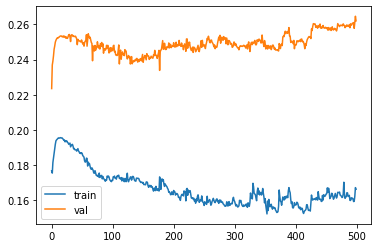

Epoch 1/500
57/79 [====================>.........] - ETA: 0s - loss: 0.5496 - mae: 0.1959
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5632 - mae: 0.2016 - val_loss: 0.9265 - val_mae: 0.2608
Epoch 2/500
64/79 [=======================>......] - ETA: 0s - loss: 0.5386 - mae: 0.1964
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5534 - mae: 0.2002 - val_loss: 0.8860 - val_mae: 0.2614
Epoch 3/500
69/79 [=========================>....] - ETA: 0s - loss: 0.5476 - mae: 0.2001
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5500 - mae: 0.2012 - val_loss: 0.8815 - val_mae: 0.2596
Epoch 4/500
72/79 [==========================>...] - ETA: 0s - loss: 0.5720 - mae: 0.2059
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5500 - mae: 0.2013 -

Epoch 33/500
64/79 [=======================>......] - ETA: 0s - loss: 0.5235 - mae: 0.1970
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5368 - mae: 0.1999 - val_loss: 0.8559 - val_mae: 0.2579
Epoch 34/500
58/79 [=====================>........] - ETA: 0s - loss: 0.5280 - mae: 0.1977
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5348 - mae: 0.1998 - val_loss: 0.8781 - val_mae: 0.2588
Epoch 35/500
63/79 [======================>.......] - ETA: 0s - loss: 0.5250 - mae: 0.1970
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5341 - mae: 0.1987 - val_loss: 0.8636 - val_mae: 0.2577
Epoch 36/500
61/79 [======================>.......] - ETA: 0s - loss: 0.5149 - mae: 0.1942
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5350 - mae: 0.19

79/79 [==============================] - 0s 4ms/step - loss: 0.5525 - mae: 0.2009 - val_loss: 0.7546 - val_mae: 0.2524
Epoch 65/500
64/79 [=======================>......] - ETA: 0s - loss: 0.5021 - mae: 0.1982
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5302 - mae: 0.2040 - val_loss: 0.7396 - val_mae: 0.2589
Epoch 66/500
60/79 [=====================>........] - ETA: 0s - loss: 0.5071 - mae: 0.1947
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5323 - mae: 0.2006 - val_loss: 0.7339 - val_mae: 0.2603
Epoch 67/500
63/79 [======================>.......] - ETA: 0s - loss: 0.5051 - mae: 0.1992
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5263 - mae: 0.2028 - val_loss: 0.7301 - val_mae: 0.2617
Epoch 68/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4957 - mae: 0.1975
Epoch 0006

70/79 [=========================>....] - ETA: 0s - loss: 0.4932 - mae: 0.1993
Epoch 00096: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4880 - mae: 0.1970 - val_loss: 0.7489 - val_mae: 0.2617
Epoch 97/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4649 - mae: 0.1938
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4896 - mae: 0.1975 - val_loss: 0.7474 - val_mae: 0.2613
Epoch 98/500
59/79 [=====================>........] - ETA: 0s - loss: 0.4644 - mae: 0.1935
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4886 - mae: 0.1974 - val_loss: 0.7537 - val_mae: 0.2606
Epoch 99/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4688 - mae: 0.1954
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4906 - mae: 0.1980 - val_loss

Epoch 128/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4717 - mae: 0.1955
Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4958 - mae: 0.1986 - val_loss: 0.7436 - val_mae: 0.2547
Epoch 129/500
59/79 [=====================>........] - ETA: 0s - loss: 0.4660 - mae: 0.1971
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4857 - mae: 0.1991 - val_loss: 0.7370 - val_mae: 0.2507
Epoch 130/500
61/79 [======================>.......] - ETA: 0s - loss: 0.4670 - mae: 0.1930
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.5012 - mae: 0.1989 - val_loss: 0.7470 - val_mae: 0.2600
Epoch 131/500
61/79 [======================>.......] - ETA: 0s - loss: 0.4574 - mae: 0.1956
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4878 - mae: 

Epoch 160/500
61/79 [======================>.......] - ETA: 0s - loss: 0.4532 - mae: 0.1902
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4746 - mae: 0.1945 - val_loss: 0.8153 - val_mae: 0.2519
Epoch 161/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4561 - mae: 0.1916
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4723 - mae: 0.1941 - val_loss: 0.8094 - val_mae: 0.2501
Epoch 162/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4570 - mae: 0.1898
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4694 - mae: 0.1920 - val_loss: 0.8104 - val_mae: 0.2521
Epoch 163/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4539 - mae: 0.1902
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4732 - mae: 

Epoch 00191: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4663 - mae: 0.1920 - val_loss: 0.9248 - val_mae: 0.2551
Epoch 192/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4343 - mae: 0.1870
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4547 - mae: 0.1917 - val_loss: 0.9155 - val_mae: 0.2515
Epoch 193/500
55/79 [===================>..........] - ETA: 0s - loss: 0.4276 - mae: 0.1781
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4521 - mae: 0.1859 - val_loss: 0.9488 - val_mae: 0.2521
Epoch 194/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4315 - mae: 0.1826
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4521 - mae: 0.1866 - val_loss: 0.9025 - val_mae: 0.2556
Epoch 195/500
62/79 [======================>....

Epoch 223/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4031 - mae: 0.1728
Epoch 00223: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4353 - mae: 0.1800 - val_loss: 0.9910 - val_mae: 0.2502
Epoch 224/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4269 - mae: 0.1835
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4495 - mae: 0.1872 - val_loss: 0.9768 - val_mae: 0.2530
Epoch 225/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4149 - mae: 0.1814
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4417 - mae: 0.1879 - val_loss: 1.0156 - val_mae: 0.2487
Epoch 226/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4173 - mae: 0.1784
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4442 - mae: 

Epoch 255/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4021 - mae: 0.1715
Epoch 00255: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4261 - mae: 0.1767 - val_loss: 1.0015 - val_mae: 0.2490
Epoch 256/500
70/79 [=========================>....] - ETA: 0s - loss: 0.4281 - mae: 0.1808
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4238 - mae: 0.1804 - val_loss: 1.0022 - val_mae: 0.2480
Epoch 257/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3973 - mae: 0.1727
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4228 - mae: 0.1786 - val_loss: 0.9840 - val_mae: 0.2502
Epoch 258/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4021 - mae: 0.1745
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4241 - mae: 

Epoch 287/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3895 - mae: 0.1711
Epoch 00287: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4127 - mae: 0.1767 - val_loss: 1.0282 - val_mae: 0.2490
Epoch 288/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4005 - mae: 0.1751
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4216 - mae: 0.1821 - val_loss: 1.0246 - val_mae: 0.2471
Epoch 289/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3874 - mae: 0.1673
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4164 - mae: 0.1742 - val_loss: 1.0675 - val_mae: 0.2508
Epoch 290/500
59/79 [=====================>........] - ETA: 0s - loss: 0.3980 - mae: 0.1757
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4157 - mae: 

Epoch 319/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3807 - mae: 0.1672
Epoch 00319: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4056 - mae: 0.1731 - val_loss: 1.0955 - val_mae: 0.2471
Epoch 320/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3832 - mae: 0.1670
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4105 - mae: 0.1740 - val_loss: 1.0683 - val_mae: 0.2487
Epoch 321/500
67/79 [========================>.....] - ETA: 0s - loss: 0.3734 - mae: 0.1651
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4102 - mae: 0.1737 - val_loss: 1.0756 - val_mae: 0.2501
Epoch 322/500
69/79 [=========================>....] - ETA: 0s - loss: 0.3827 - mae: 0.1680
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4069 - mae: 

Epoch 351/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3841 - mae: 0.1672
Epoch 00351: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4133 - mae: 0.1748 - val_loss: 1.1044 - val_mae: 0.2492
Epoch 352/500
68/79 [========================>.....] - ETA: 0s - loss: 0.3808 - mae: 0.1659
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4094 - mae: 0.1736 - val_loss: 1.1163 - val_mae: 0.2481
Epoch 353/500
76/79 [===========================>..] - ETA: 0s - loss: 0.4137 - mae: 0.1722
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4124 - mae: 0.1733 - val_loss: 1.0763 - val_mae: 0.2506
Epoch 354/500
77/79 [============================>.] - ETA: 0s - loss: 0.4092 - mae: 0.1724
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4085 - mae: 

Epoch 00382: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4000 - mae: 0.1712 - val_loss: 1.1115 - val_mae: 0.2499
Epoch 383/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3780 - mae: 0.1637
Epoch 00383: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4003 - mae: 0.1721 - val_loss: 1.1025 - val_mae: 0.2505
Epoch 384/500
60/79 [=====================>........] - ETA: 0s - loss: 0.3763 - mae: 0.1613
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4077 - mae: 0.1748 - val_loss: 1.0888 - val_mae: 0.2503
Epoch 385/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3752 - mae: 0.1671
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3994 - mae: 0.1759 - val_loss: 1.1304 - val_mae: 0.2467
Epoch 386/500
64/79 [=======================>...

Epoch 414/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3956 - mae: 0.1736
Epoch 00414: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4208 - mae: 0.1816 - val_loss: 1.1256 - val_mae: 0.2496
Epoch 415/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3665 - mae: 0.1618
Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3940 - mae: 0.1707 - val_loss: 1.1205 - val_mae: 0.2504
Epoch 416/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3611 - mae: 0.1619
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3866 - mae: 0.1692 - val_loss: 1.1604 - val_mae: 0.2484
Epoch 417/500
59/79 [=====================>........] - ETA: 0s - loss: 0.3657 - mae: 0.1590
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3922 - mae: 

Epoch 446/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3633 - mae: 0.1634
Epoch 00446: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3900 - mae: 0.1741 - val_loss: 1.1658 - val_mae: 0.2494
Epoch 447/500
64/79 [=======================>......] - ETA: 0s - loss: 0.3536 - mae: 0.1589
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3875 - mae: 0.1687 - val_loss: 1.1695 - val_mae: 0.2493
Epoch 448/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3549 - mae: 0.1589
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3803 - mae: 0.1681 - val_loss: 1.1676 - val_mae: 0.2497
Epoch 449/500
63/79 [======================>.......] - ETA: 0s - loss: 0.3804 - mae: 0.1676
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4404 - mae: 

Epoch 478/500
65/79 [=======================>......] - ETA: 0s - loss: 0.3621 - mae: 0.1626
Epoch 00478: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3896 - mae: 0.1690 - val_loss: 1.2014 - val_mae: 0.2473
Epoch 479/500
66/79 [========================>.....] - ETA: 0s - loss: 0.3561 - mae: 0.1601
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.3815 - mae: 0.1664 - val_loss: 1.1755 - val_mae: 0.2488
Epoch 480/500
63/79 [======================>.......] - ETA: 0s - loss: 0.3564 - mae: 0.1614
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3786 - mae: 0.1679 - val_loss: 1.1629 - val_mae: 0.2505
Epoch 481/500
61/79 [======================>.......] - ETA: 0s - loss: 0.3462 - mae: 0.1564
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.3771 - mae: 

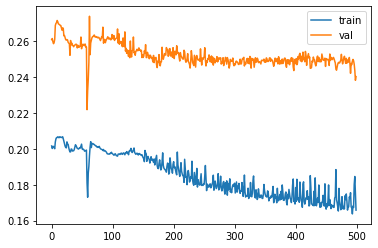

Epoch 1/500
61/88 [===================>..........] - ETA: 0s - loss: 0.4994 - mae: 0.1775
Epoch 00001: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5907 - mae: 0.1714 - val_loss: 1.5377 - val_mae: 0.2571
Epoch 2/500
63/88 [====================>.........] - ETA: 0s - loss: 0.4781 - mae: 0.1941
Epoch 00002: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5368 - mae: 0.1862 - val_loss: 1.4057 - val_mae: 0.2579
Epoch 3/500
64/88 [====================>.........] - ETA: 0s - loss: 0.4572 - mae: 0.1857
Epoch 00003: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5115 - mae: 0.1813 - val_loss: 1.3735 - val_mae: 0.2580
Epoch 4/500
64/88 [====================>.........] - ETA: 0s - loss: 0.4534 - mae: 0.1800
Epoch 00004: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5002 - mae: 0.1755 -

Epoch 33/500
81/88 [==========================>...] - ETA: 0s - loss: 0.4476 - mae: 0.1749
Epoch 00033: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4339 - mae: 0.1705 - val_loss: 1.3743 - val_mae: 0.2594
Epoch 34/500
71/88 [=======================>......] - ETA: 0s - loss: 0.4532 - mae: 0.1782
Epoch 00034: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4320 - mae: 0.1692 - val_loss: 1.3529 - val_mae: 0.2589
Epoch 35/500
64/88 [====================>.........] - ETA: 0s - loss: 0.4130 - mae: 0.1759
Epoch 00035: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4347 - mae: 0.1702 - val_loss: 1.3772 - val_mae: 0.2598
Epoch 36/500
60/88 [===================>..........] - ETA: 0s - loss: 0.4284 - mae: 0.1805
Epoch 00036: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4352 - mae: 0.17

Epoch 65/500
57/88 [==================>...........] - ETA: 0s - loss: 0.4650 - mae: 0.1851
Epoch 00065: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4486 - mae: 0.1721 - val_loss: 1.3733 - val_mae: 0.2644
Epoch 66/500
62/88 [====================>.........] - ETA: 0s - loss: 0.4126 - mae: 0.1740
Epoch 00066: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4267 - mae: 0.1679 - val_loss: 1.3795 - val_mae: 0.2600
Epoch 67/500
60/88 [===================>..........] - ETA: 0s - loss: 0.4311 - mae: 0.1803
Epoch 00067: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4340 - mae: 0.1702 - val_loss: 1.3897 - val_mae: 0.2609
Epoch 68/500
64/88 [====================>.........] - ETA: 0s - loss: 0.4072 - mae: 0.1740
Epoch 00068: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4249 - mae: 0.16

Epoch 97/500
64/88 [====================>.........] - ETA: 0s - loss: 0.4012 - mae: 0.1739
Epoch 00097: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4190 - mae: 0.1668 - val_loss: 1.3869 - val_mae: 0.2587
Epoch 98/500
64/88 [====================>.........] - ETA: 0s - loss: 0.3995 - mae: 0.1721
Epoch 00098: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4179 - mae: 0.1661 - val_loss: 1.3893 - val_mae: 0.2612
Epoch 99/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3823 - mae: 0.1643
Epoch 00099: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4127 - mae: 0.1634 - val_loss: 1.3873 - val_mae: 0.2601
Epoch 100/500
67/88 [=====================>........] - ETA: 0s - loss: 0.3771 - mae: 0.1624
Epoch 00100: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4122 - mae: 0.1

Epoch 00128: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4079 - mae: 0.1621 - val_loss: 1.4108 - val_mae: 0.2622
Epoch 129/500
87/88 [============================>.] - ETA: 0s - loss: 0.4102 - mae: 0.1636
Epoch 00129: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4072 - mae: 0.1626 - val_loss: 1.4094 - val_mae: 0.2598
Epoch 130/500
87/88 [============================>.] - ETA: 0s - loss: 0.4113 - mae: 0.1644
Epoch 00130: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4082 - mae: 0.1634 - val_loss: 1.4221 - val_mae: 0.2598
Epoch 131/500
59/88 [===================>..........] - ETA: 0s - loss: 0.4334 - mae: 0.1780
Epoch 00131: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.4271 - mae: 0.1664 - val_loss: 1.4104 - val_mae: 0.2622
Epoch 132/500
65/88 [=====================>.....

Epoch 160/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3764 - mae: 0.1626
Epoch 00160: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4047 - mae: 0.1609 - val_loss: 1.4221 - val_mae: 0.2611
Epoch 161/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3795 - mae: 0.1600
Epoch 00161: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4066 - mae: 0.1592 - val_loss: 1.4278 - val_mae: 0.2629
Epoch 162/500
70/88 [======================>.......] - ETA: 0s - loss: 0.4186 - mae: 0.1677
Epoch 00162: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3987 - mae: 0.1595 - val_loss: 1.4270 - val_mae: 0.2600
Epoch 163/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3639 - mae: 0.1581
Epoch 00163: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4016 - mae: 

Epoch 192/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3652 - mae: 0.1589
Epoch 00192: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3938 - mae: 0.1571 - val_loss: 1.4399 - val_mae: 0.2610
Epoch 193/500
62/88 [====================>.........] - ETA: 0s - loss: 0.3769 - mae: 0.1626
Epoch 00193: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3921 - mae: 0.1564 - val_loss: 1.4346 - val_mae: 0.2614
Epoch 194/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3669 - mae: 0.1584
Epoch 00194: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3963 - mae: 0.1571 - val_loss: 1.4340 - val_mae: 0.2619
Epoch 195/500
65/88 [=====================>........] - ETA: 0s - loss: 0.3644 - mae: 0.1597
Epoch 00195: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3921 - mae: 

Epoch 00223: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3994 - mae: 0.1569 - val_loss: 1.4717 - val_mae: 0.2632
Epoch 224/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3566 - mae: 0.1532
Epoch 00224: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3924 - mae: 0.1546 - val_loss: 1.4755 - val_mae: 0.2627
Epoch 225/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3594 - mae: 0.1548
Epoch 00225: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3881 - mae: 0.1535 - val_loss: 1.4785 - val_mae: 0.2625
Epoch 226/500
65/88 [=====================>........] - ETA: 0s - loss: 0.3666 - mae: 0.1575
Epoch 00226: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3896 - mae: 0.1542 - val_loss: 1.4763 - val_mae: 0.2637
Epoch 227/500
71/88 [=======================>...

Epoch 255/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3660 - mae: 0.1568
Epoch 00255: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3912 - mae: 0.1546 - val_loss: 1.4778 - val_mae: 0.2622
Epoch 256/500
65/88 [=====================>........] - ETA: 0s - loss: 0.3737 - mae: 0.1610
Epoch 00256: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3939 - mae: 0.1564 - val_loss: 1.4786 - val_mae: 0.2617
Epoch 257/500
63/88 [====================>.........] - ETA: 0s - loss: 0.3737 - mae: 0.1587
Epoch 00257: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3909 - mae: 0.1544 - val_loss: 1.4829 - val_mae: 0.2627
Epoch 258/500
64/88 [====================>.........] - ETA: 0s - loss: 0.3691 - mae: 0.1584
Epoch 00258: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3861 - mae: 

Epoch 287/500
76/88 [========================>.....] - ETA: 0s - loss: 0.3951 - mae: 0.1571
Epoch 00287: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3750 - mae: 0.1507 - val_loss: 1.4458 - val_mae: 0.2610
Epoch 288/500
67/88 [=====================>........] - ETA: 0s - loss: 0.3412 - mae: 0.1502
Epoch 00288: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3714 - mae: 0.1496 - val_loss: 1.4211 - val_mae: 0.2616
Epoch 289/500
62/88 [====================>.........] - ETA: 0s - loss: 0.3631 - mae: 0.1584
Epoch 00289: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3749 - mae: 0.1515 - val_loss: 1.3907 - val_mae: 0.2612
Epoch 290/500
63/88 [====================>.........] - ETA: 0s - loss: 0.3535 - mae: 0.1536
Epoch 00290: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3722 - mae: 

Epoch 319/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3432 - mae: 0.1489
Epoch 00319: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3579 - mae: 0.1471 - val_loss: 1.4720 - val_mae: 0.2709
Epoch 320/500
88/88 [==============================] - ETA: 0s - loss: 0.3596 - mae: 0.1468
Epoch 00320: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3596 - mae: 0.1468 - val_loss: 1.4547 - val_mae: 0.2682
Epoch 321/500
63/88 [====================>.........] - ETA: 0s - loss: 0.3549 - mae: 0.1518
Epoch 00321: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3592 - mae: 0.1478 - val_loss: 1.4527 - val_mae: 0.2707
Epoch 322/500
67/88 [=====================>........] - ETA: 0s - loss: 0.3459 - mae: 0.1494
Epoch 00322: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3621 - mae: 

Epoch 351/500
59/88 [===================>..........] - ETA: 0s - loss: 0.3674 - mae: 0.1546
Epoch 00351: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3575 - mae: 0.1442 - val_loss: 1.4550 - val_mae: 0.2686
Epoch 352/500
61/88 [===================>..........] - ETA: 0s - loss: 0.3611 - mae: 0.1510
Epoch 00352: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3580 - mae: 0.1432 - val_loss: 1.4558 - val_mae: 0.2697
Epoch 353/500
61/88 [===================>..........] - ETA: 0s - loss: 0.3709 - mae: 0.1574
Epoch 00353: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3663 - mae: 0.1478 - val_loss: 1.4910 - val_mae: 0.2696
Epoch 354/500
58/88 [==================>...........] - ETA: 0s - loss: 0.3691 - mae: 0.1530
Epoch 00354: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.3592 - mae: 

Epoch 00382: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3530 - mae: 0.1416 - val_loss: 1.4638 - val_mae: 0.2703
Epoch 383/500
65/88 [=====================>........] - ETA: 0s - loss: 0.3357 - mae: 0.1444
Epoch 00383: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3596 - mae: 0.1441 - val_loss: 1.5924 - val_mae: 0.2836
Epoch 384/500
70/88 [======================>.......] - ETA: 0s - loss: 0.3715 - mae: 0.1497
Epoch 00384: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3556 - mae: 0.1434 - val_loss: 1.4523 - val_mae: 0.2718
Epoch 385/500
64/88 [====================>.........] - ETA: 0s - loss: 0.3457 - mae: 0.1472
Epoch 00385: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3510 - mae: 0.1425 - val_loss: 1.4851 - val_mae: 0.2703
Epoch 386/500
66/88 [=====================>.....

Epoch 414/500
61/88 [===================>..........] - ETA: 0s - loss: 0.3475 - mae: 0.1459
Epoch 00414: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3408 - mae: 0.1377 - val_loss: 1.4691 - val_mae: 0.2734
Epoch 415/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3234 - mae: 0.1357
Epoch 00415: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3447 - mae: 0.1376 - val_loss: 1.5005 - val_mae: 0.2765
Epoch 416/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3268 - mae: 0.1385
Epoch 00416: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3420 - mae: 0.1377 - val_loss: 1.4936 - val_mae: 0.2721
Epoch 417/500
72/88 [=======================>......] - ETA: 0s - loss: 0.3851 - mae: 0.1506
Epoch 00417: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3592 - mae: 

Epoch 00445: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3367 - mae: 0.1360 - val_loss: 1.5283 - val_mae: 0.2726
Epoch 446/500
69/88 [======================>.......] - ETA: 0s - loss: 0.3501 - mae: 0.1473
Epoch 00446: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3457 - mae: 0.1398 - val_loss: 1.5095 - val_mae: 0.2771
Epoch 447/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3265 - mae: 0.1379
Epoch 00447: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3434 - mae: 0.1379 - val_loss: 1.5848 - val_mae: 0.2863
Epoch 448/500
66/88 [=====================>........] - ETA: 0s - loss: 0.3249 - mae: 0.1373
Epoch 00448: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3323 - mae: 0.1342 - val_loss: 1.4738 - val_mae: 0.2789
Epoch 449/500
64/88 [====================>......

Epoch 477/500
68/88 [======================>.......] - ETA: 0s - loss: 0.3412 - mae: 0.1447
Epoch 00477: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3445 - mae: 0.1403 - val_loss: 1.5276 - val_mae: 0.2794
Epoch 478/500
69/88 [======================>.......] - ETA: 0s - loss: 0.3555 - mae: 0.1506
Epoch 00478: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3468 - mae: 0.1413 - val_loss: 1.5484 - val_mae: 0.2781
Epoch 479/500
72/88 [=======================>......] - ETA: 0s - loss: 0.3601 - mae: 0.1446
Epoch 00479: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3362 - mae: 0.1363 - val_loss: 1.5076 - val_mae: 0.2790
Epoch 480/500
70/88 [======================>.......] - ETA: 0s - loss: 0.3530 - mae: 0.1431
Epoch 00480: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.3283 - mae: 

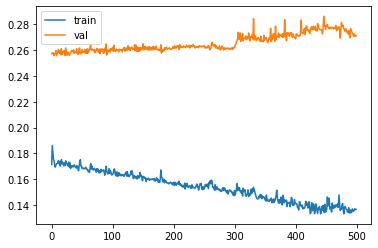

Epoch 1/500
62/90 [===================>..........] - ETA: 0s - loss: 0.9319 - mae: 0.2625
Epoch 00001: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.9209 - mae: 0.2622 - val_loss: 1.1985 - val_mae: 0.3098
Epoch 2/500
70/90 [======================>.......] - ETA: 0s - loss: 0.8387 - mae: 0.2908
Epoch 00002: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.8364 - mae: 0.2878 - val_loss: 1.3060 - val_mae: 0.2965
Epoch 3/500
69/90 [======================>.......] - ETA: 0s - loss: 0.6789 - mae: 0.2761
Epoch 00003: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.7200 - mae: 0.2774 - val_loss: 1.3325 - val_mae: 0.2890
Epoch 4/500
70/90 [======================>.......] - ETA: 0s - loss: 0.6630 - mae: 0.2706
Epoch 00004: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.6767 - mae: 0.2741 -

Epoch 33/500
83/90 [==========================>...] - ETA: 0s - loss: 0.5889 - mae: 0.2504
Epoch 00033: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5859 - mae: 0.2504 - val_loss: 1.2167 - val_mae: 0.2871
Epoch 34/500
66/90 [=====================>........] - ETA: 0s - loss: 0.6074 - mae: 0.2614
Epoch 00034: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5930 - mae: 0.2562 - val_loss: 1.2509 - val_mae: 0.2818
Epoch 35/500
67/90 [=====================>........] - ETA: 0s - loss: 0.6171 - mae: 0.2598
Epoch 00035: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5952 - mae: 0.2554 - val_loss: 1.2195 - val_mae: 0.2886
Epoch 36/500
63/90 [====================>.........] - ETA: 0s - loss: 0.6081 - mae: 0.2627
Epoch 00036: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5901 - mae: 0.25

Epoch 65/500
63/90 [====================>.........] - ETA: 0s - loss: 0.5848 - mae: 0.2489
Epoch 00065: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5576 - mae: 0.2403 - val_loss: 1.2238 - val_mae: 0.2890
Epoch 66/500
68/90 [=====================>........] - ETA: 0s - loss: 0.5958 - mae: 0.2542
Epoch 00066: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5701 - mae: 0.2464 - val_loss: 1.2442 - val_mae: 0.2877
Epoch 67/500
68/90 [=====================>........] - ETA: 0s - loss: 0.5922 - mae: 0.2500
Epoch 00067: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5666 - mae: 0.2431 - val_loss: 1.2435 - val_mae: 0.2881
Epoch 68/500
66/90 [=====================>........] - ETA: 0s - loss: 0.5865 - mae: 0.2464
Epoch 00068: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5663 - mae: 0.24

Epoch 97/500
65/90 [====================>.........] - ETA: 0s - loss: 0.5560 - mae: 0.2457
Epoch 00097: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5322 - mae: 0.2341 - val_loss: 1.2485 - val_mae: 0.2926
Epoch 98/500
62/90 [===================>..........] - ETA: 0s - loss: 0.5599 - mae: 0.2387
Epoch 00098: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5418 - mae: 0.2305 - val_loss: 1.2289 - val_mae: 0.2907
Epoch 99/500
67/90 [=====================>........] - ETA: 0s - loss: 0.5983 - mae: 0.2438
Epoch 00099: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5582 - mae: 0.2331 - val_loss: 1.2349 - val_mae: 0.2966
Epoch 100/500
65/90 [====================>.........] - ETA: 0s - loss: 0.5726 - mae: 0.2450
Epoch 00100: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5485 - mae: 0.2

Epoch 129/500
85/90 [===========================>..] - ETA: 0s - loss: 0.5458 - mae: 0.2320
Epoch 00129: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5371 - mae: 0.2292 - val_loss: 1.2333 - val_mae: 0.2972
Epoch 130/500
89/90 [============================>.] - ETA: 0s - loss: 0.5236 - mae: 0.2266
Epoch 00130: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5229 - mae: 0.2263 - val_loss: 1.2419 - val_mae: 0.2920
Epoch 131/500
90/90 [==============================] - ETA: 0s - loss: 0.5145 - mae: 0.2231
Epoch 00131: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5145 - mae: 0.2231 - val_loss: 1.2661 - val_mae: 0.2987
Epoch 132/500
61/90 [===================>..........] - ETA: 0s - loss: 0.5269 - mae: 0.2314
Epoch 00132: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5123 - mae: 

Epoch 00160: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5085 - mae: 0.2183 - val_loss: 1.2549 - val_mae: 0.2952
Epoch 161/500
67/90 [=====================>........] - ETA: 0s - loss: 0.5505 - mae: 0.2296
Epoch 00161: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5135 - mae: 0.2187 - val_loss: 1.2631 - val_mae: 0.2871
Epoch 162/500
68/90 [=====================>........] - ETA: 0s - loss: 0.5451 - mae: 0.2332
Epoch 00162: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5117 - mae: 0.2217 - val_loss: 1.2843 - val_mae: 0.2973
Epoch 163/500
70/90 [======================>.......] - ETA: 0s - loss: 0.5331 - mae: 0.2281
Epoch 00163: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.5079 - mae: 0.2198 - val_loss: 1.2866 - val_mae: 0.2963
Epoch 164/500
67/90 [=====================>.....

Epoch 192/500
79/90 [=========================>....] - ETA: 0s - loss: 0.4984 - mae: 0.2197
Epoch 00192: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4968 - mae: 0.2179 - val_loss: 1.2677 - val_mae: 0.2899
Epoch 193/500
59/90 [==================>...........] - ETA: 0s - loss: 0.5236 - mae: 0.2310
Epoch 00193: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5025 - mae: 0.2182 - val_loss: 1.2673 - val_mae: 0.2940
Epoch 194/500
85/90 [===========================>..] - ETA: 0s - loss: 0.5148 - mae: 0.2218
Epoch 00194: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5099 - mae: 0.2197 - val_loss: 1.2207 - val_mae: 0.2838
Epoch 195/500
76/90 [========================>.....] - ETA: 0s - loss: 0.5257 - mae: 0.2271
Epoch 00195: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5155 - mae: 

Epoch 224/500
67/90 [=====================>........] - ETA: 0s - loss: 0.5241 - mae: 0.2249
Epoch 00224: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4878 - mae: 0.2115 - val_loss: 1.2913 - val_mae: 0.2867
Epoch 225/500
64/90 [====================>.........] - ETA: 0s - loss: 0.5100 - mae: 0.2223
Epoch 00225: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4861 - mae: 0.2104 - val_loss: 1.2975 - val_mae: 0.2838
Epoch 226/500
90/90 [==============================] - ETA: 0s - loss: 0.4983 - mae: 0.2126
Epoch 00226: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4983 - mae: 0.2126 - val_loss: 1.3103 - val_mae: 0.2951
Epoch 227/500
62/90 [===================>..........] - ETA: 0s - loss: 0.5307 - mae: 0.2290
Epoch 00227: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5073 - mae: 

Epoch 256/500
65/90 [====================>.........] - ETA: 0s - loss: 0.5254 - mae: 0.2268
Epoch 00256: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4943 - mae: 0.2130 - val_loss: 1.2997 - val_mae: 0.2831
Epoch 257/500
68/90 [=====================>........] - ETA: 0s - loss: 0.5248 - mae: 0.2255
Epoch 00257: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4882 - mae: 0.2116 - val_loss: 1.2869 - val_mae: 0.2864
Epoch 258/500
66/90 [=====================>........] - ETA: 0s - loss: 0.5055 - mae: 0.2209
Epoch 00258: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4836 - mae: 0.2090 - val_loss: 1.3012 - val_mae: 0.2822
Epoch 259/500
65/90 [====================>.........] - ETA: 0s - loss: 0.5237 - mae: 0.2239
Epoch 00259: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4940 - mae: 

Epoch 288/500
63/90 [====================>.........] - ETA: 0s - loss: 0.5235 - mae: 0.2253
Epoch 00288: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4872 - mae: 0.2099 - val_loss: 1.2692 - val_mae: 0.2735
Epoch 289/500
62/90 [===================>..........] - ETA: 0s - loss: 0.5132 - mae: 0.2228
Epoch 00289: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4902 - mae: 0.2094 - val_loss: 1.2564 - val_mae: 0.2805
Epoch 290/500
62/90 [===================>..........] - ETA: 0s - loss: 0.5145 - mae: 0.2245
Epoch 00290: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4918 - mae: 0.2102 - val_loss: 1.2891 - val_mae: 0.2881
Epoch 291/500
61/90 [===================>..........] - ETA: 0s - loss: 0.5093 - mae: 0.2240
Epoch 00291: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4894 - mae: 

Epoch 00319: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4871 - mae: 0.2078 - val_loss: 1.3252 - val_mae: 0.2953
Epoch 320/500
66/90 [=====================>........] - ETA: 0s - loss: 0.5161 - mae: 0.2215
Epoch 00320: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4871 - mae: 0.2083 - val_loss: 1.3069 - val_mae: 0.2787
Epoch 321/500
65/90 [====================>.........] - ETA: 0s - loss: 0.5376 - mae: 0.2296
Epoch 00321: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.5089 - mae: 0.2141 - val_loss: 1.2998 - val_mae: 0.2930
Epoch 322/500
66/90 [=====================>........] - ETA: 0s - loss: 0.5039 - mae: 0.2224
Epoch 00322: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4817 - mae: 0.2098 - val_loss: 1.2645 - val_mae: 0.2777
Epoch 323/500
62/90 [===================>.......

Epoch 351/500
73/90 [=======================>......] - ETA: 0s - loss: 0.4981 - mae: 0.2148
Epoch 00351: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4736 - mae: 0.2046 - val_loss: 1.3134 - val_mae: 0.2827
Epoch 352/500
67/90 [=====================>........] - ETA: 0s - loss: 0.5072 - mae: 0.2185
Epoch 00352: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4692 - mae: 0.2028 - val_loss: 1.3285 - val_mae: 0.2874
Epoch 353/500
71/90 [======================>.......] - ETA: 0s - loss: 0.4961 - mae: 0.2134
Epoch 00353: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4707 - mae: 0.2020 - val_loss: 1.3168 - val_mae: 0.2789
Epoch 354/500
68/90 [=====================>........] - ETA: 0s - loss: 0.5032 - mae: 0.2165
Epoch 00354: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4645 - mae: 

Epoch 00382: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4748 - mae: 0.2040 - val_loss: 1.3030 - val_mae: 0.2810
Epoch 383/500
64/90 [====================>.........] - ETA: 0s - loss: 0.5156 - mae: 0.2193
Epoch 00383: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4817 - mae: 0.2047 - val_loss: 1.3702 - val_mae: 0.2995
Epoch 384/500
67/90 [=====================>........] - ETA: 0s - loss: 0.5226 - mae: 0.2195
Epoch 00384: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4807 - mae: 0.2031 - val_loss: 1.3397 - val_mae: 0.2950
Epoch 385/500
68/90 [=====================>........] - ETA: 0s - loss: 0.5114 - mae: 0.2162
Epoch 00385: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4738 - mae: 0.2016 - val_loss: 1.2999 - val_mae: 0.2751
Epoch 386/500
65/90 [====================>......

Epoch 414/500
89/90 [============================>.] - ETA: 0s - loss: 0.4662 - mae: 0.1981
Epoch 00414: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4655 - mae: 0.1978 - val_loss: 1.2936 - val_mae: 0.2786
Epoch 415/500
61/90 [===================>..........] - ETA: 0s - loss: 0.4992 - mae: 0.2179
Epoch 00415: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4645 - mae: 0.1988 - val_loss: 1.3034 - val_mae: 0.2794
Epoch 416/500
61/90 [===================>..........] - ETA: 0s - loss: 0.5047 - mae: 0.2206
Epoch 00416: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4702 - mae: 0.2007 - val_loss: 1.3183 - val_mae: 0.2843
Epoch 417/500
64/90 [====================>.........] - ETA: 0s - loss: 0.5171 - mae: 0.2185
Epoch 00417: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.4754 - mae: 

Epoch 446/500
62/90 [===================>..........] - ETA: 0s - loss: 0.5099 - mae: 0.2288
Epoch 00446: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4781 - mae: 0.2094 - val_loss: 1.2793 - val_mae: 0.2848
Epoch 447/500
65/90 [====================>.........] - ETA: 0s - loss: 0.5050 - mae: 0.2220
Epoch 00447: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4681 - mae: 0.2037 - val_loss: 1.3028 - val_mae: 0.2849
Epoch 448/500
64/90 [====================>.........] - ETA: 0s - loss: 0.5118 - mae: 0.2247
Epoch 00448: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4790 - mae: 0.2072 - val_loss: 1.3199 - val_mae: 0.2894
Epoch 449/500
61/90 [===================>..........] - ETA: 0s - loss: 0.4913 - mae: 0.2200
Epoch 00449: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4626 - mae: 

Epoch 478/500
61/90 [===================>..........] - ETA: 0s - loss: 0.5077 - mae: 0.2248
Epoch 00478: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4758 - mae: 0.2054 - val_loss: 1.2843 - val_mae: 0.2728
Epoch 479/500
63/90 [====================>.........] - ETA: 0s - loss: 0.5115 - mae: 0.2205
Epoch 00479: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4661 - mae: 0.2013 - val_loss: 1.2775 - val_mae: 0.2699
Epoch 480/500
61/90 [===================>..........] - ETA: 0s - loss: 0.5013 - mae: 0.2212
Epoch 00480: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4641 - mae: 0.2000 - val_loss: 1.3176 - val_mae: 0.2804
Epoch 481/500
90/90 [==============================] - ETA: 0s - loss: 0.4618 - mae: 0.1982
Epoch 00481: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 4ms/step - loss: 0.4618 - mae: 

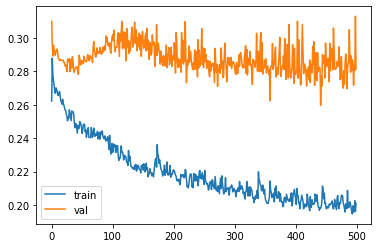

Epoch 1/500
65/82 [======================>.......] - ETA: 0s - loss: 1.1134 - mae: 0.2608
Epoch 00001: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.9507 - mae: 0.2379 - val_loss: 0.5395 - val_mae: 0.1522
Epoch 2/500
68/82 [=======================>......] - ETA: 0s - loss: 0.9898 - mae: 0.2327
Epoch 00002: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.8699 - mae: 0.2161 - val_loss: 0.4933 - val_mae: 0.1623
Epoch 3/500
64/82 [======================>.......] - ETA: 0s - loss: 0.9313 - mae: 0.2425
Epoch 00003: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.7863 - mae: 0.2180 - val_loss: 0.4454 - val_mae: 0.1639
Epoch 4/500
62/82 [=====================>........] - ETA: 0s - loss: 0.8668 - mae: 0.2504
Epoch 00004: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.7214 - mae: 0.2227 -

Epoch 33/500
65/82 [======================>.......] - ETA: 0s - loss: 0.6408 - mae: 0.2402
Epoch 00033: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5553 - mae: 0.2146 - val_loss: 0.4573 - val_mae: 0.1976
Epoch 34/500
66/82 [=======================>......] - ETA: 0s - loss: 0.6340 - mae: 0.2384
Epoch 00034: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5546 - mae: 0.2143 - val_loss: 0.4410 - val_mae: 0.1927
Epoch 35/500
66/82 [=======================>......] - ETA: 0s - loss: 0.6286 - mae: 0.2381
Epoch 00035: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5511 - mae: 0.2140 - val_loss: 0.4417 - val_mae: 0.1936
Epoch 36/500
64/82 [======================>.......] - ETA: 0s - loss: 0.6409 - mae: 0.2405
Epoch 00036: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5506 - mae: 0.21

Epoch 00064: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5264 - mae: 0.2048 - val_loss: 0.4595 - val_mae: 0.1936
Epoch 65/500
62/82 [=====================>........] - ETA: 0s - loss: 0.6314 - mae: 0.2379
Epoch 00065: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5278 - mae: 0.2051 - val_loss: 0.4606 - val_mae: 0.1941
Epoch 66/500
62/82 [=====================>........] - ETA: 0s - loss: 0.6343 - mae: 0.2400
Epoch 00066: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5291 - mae: 0.2065 - val_loss: 0.4798 - val_mae: 0.2001
Epoch 67/500
64/82 [======================>.......] - ETA: 0s - loss: 0.6411 - mae: 0.2358
Epoch 00067: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5443 - mae: 0.2059 - val_loss: 0.4873 - val_mae: 0.2061
Epoch 68/500
64/82 [======================>.......]

Epoch 96/500
61/82 [=====================>........] - ETA: 0s - loss: 0.6380 - mae: 0.2397
Epoch 00096: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5343 - mae: 0.2064 - val_loss: 0.4852 - val_mae: 0.2010
Epoch 97/500
64/82 [======================>.......] - ETA: 0s - loss: 0.6221 - mae: 0.2394
Epoch 00097: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5243 - mae: 0.2060 - val_loss: 0.4612 - val_mae: 0.1908
Epoch 98/500
62/82 [=====================>........] - ETA: 0s - loss: 0.6282 - mae: 0.2391
Epoch 00098: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5202 - mae: 0.2036 - val_loss: 0.4594 - val_mae: 0.1889
Epoch 99/500
64/82 [======================>.......] - ETA: 0s - loss: 0.6137 - mae: 0.2353
Epoch 00099: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5175 - mae: 0.20

Epoch 128/500
67/82 [=======================>......] - ETA: 0s - loss: 0.5933 - mae: 0.2295
Epoch 00128: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5105 - mae: 0.1991 - val_loss: 0.4758 - val_mae: 0.1926
Epoch 129/500
65/82 [======================>.......] - ETA: 0s - loss: 0.5922 - mae: 0.2293
Epoch 00129: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5010 - mae: 0.1963 - val_loss: 0.4715 - val_mae: 0.1885
Epoch 130/500
64/82 [======================>.......] - ETA: 0s - loss: 0.6032 - mae: 0.2305
Epoch 00130: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5064 - mae: 0.1966 - val_loss: 0.4795 - val_mae: 0.1915
Epoch 131/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5925 - mae: 0.2282
Epoch 00131: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.5055 - mae: 

Epoch 160/500
62/82 [=====================>........] - ETA: 0s - loss: 0.6039 - mae: 0.2285
Epoch 00160: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4967 - mae: 0.1927 - val_loss: 0.4842 - val_mae: 0.1908
Epoch 161/500
58/82 [====================>.........] - ETA: 0s - loss: 0.5873 - mae: 0.2275
Epoch 00161: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4955 - mae: 0.1941 - val_loss: 0.4983 - val_mae: 0.1942
Epoch 162/500
59/82 [====================>.........] - ETA: 0s - loss: 0.5923 - mae: 0.2256
Epoch 00162: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.5024 - mae: 0.1938 - val_loss: 0.4832 - val_mae: 0.1908
Epoch 163/500
62/82 [=====================>........] - ETA: 0s - loss: 0.6032 - mae: 0.2303
Epoch 00163: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4974 - mae: 

Epoch 00191: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4915 - mae: 0.1920 - val_loss: 0.4908 - val_mae: 0.1904
Epoch 192/500
63/82 [======================>.......] - ETA: 0s - loss: 0.5974 - mae: 0.2289
Epoch 00192: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4937 - mae: 0.1933 - val_loss: 0.4733 - val_mae: 0.1851
Epoch 193/500
65/82 [======================>.......] - ETA: 0s - loss: 0.5817 - mae: 0.2264
Epoch 00193: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4880 - mae: 0.1923 - val_loss: 0.4966 - val_mae: 0.1901
Epoch 194/500
67/82 [=======================>......] - ETA: 0s - loss: 0.5703 - mae: 0.2221
Epoch 00194: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4883 - mae: 0.1918 - val_loss: 0.4820 - val_mae: 0.1879
Epoch 195/500
68/82 [=======================>...

Epoch 223/500
58/82 [====================>.........] - ETA: 0s - loss: 0.5655 - mae: 0.2193
Epoch 00223: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4710 - mae: 0.1841 - val_loss: 0.5148 - val_mae: 0.1795
Epoch 224/500
65/82 [======================>.......] - ETA: 0s - loss: 0.5596 - mae: 0.2162
Epoch 00224: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4683 - mae: 0.1830 - val_loss: 0.5464 - val_mae: 0.1906
Epoch 225/500
67/82 [=======================>......] - ETA: 0s - loss: 0.5538 - mae: 0.2146
Epoch 00225: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4739 - mae: 0.1855 - val_loss: 0.5131 - val_mae: 0.1846
Epoch 226/500
65/82 [======================>.......] - ETA: 0s - loss: 0.5802 - mae: 0.2256
Epoch 00226: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4846 - mae: 

Epoch 00254: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4641 - mae: 0.1826 - val_loss: 0.5483 - val_mae: 0.1893
Epoch 255/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5676 - mae: 0.2194
Epoch 00255: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4613 - mae: 0.1821 - val_loss: 0.5194 - val_mae: 0.1798
Epoch 256/500
64/82 [======================>.......] - ETA: 0s - loss: 0.5536 - mae: 0.2162
Epoch 00256: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4573 - mae: 0.1805 - val_loss: 0.5140 - val_mae: 0.1752
Epoch 257/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5399 - mae: 0.2111
Epoch 00257: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4573 - mae: 0.1805 - val_loss: 0.5063 - val_mae: 0.1729
Epoch 258/500
65/82 [======================>....

Epoch 286/500
59/82 [====================>.........] - ETA: 0s - loss: 0.5543 - mae: 0.2171
Epoch 00286: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4659 - mae: 0.1826 - val_loss: 0.5174 - val_mae: 0.1755
Epoch 287/500
63/82 [======================>.......] - ETA: 0s - loss: 0.5591 - mae: 0.2146
Epoch 00287: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4602 - mae: 0.1800 - val_loss: 0.5076 - val_mae: 0.1721
Epoch 288/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5604 - mae: 0.2147
Epoch 00288: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4568 - mae: 0.1787 - val_loss: 0.5492 - val_mae: 0.1867
Epoch 289/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5543 - mae: 0.2128
Epoch 00289: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4523 - mae: 

Epoch 318/500
55/82 [===================>..........] - ETA: 0s - loss: 0.5353 - mae: 0.2115
Epoch 00318: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4494 - mae: 0.1765 - val_loss: 0.5415 - val_mae: 0.1801
Epoch 319/500
56/82 [===================>..........] - ETA: 0s - loss: 0.5341 - mae: 0.2099
Epoch 00319: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4488 - mae: 0.1755 - val_loss: 0.5307 - val_mae: 0.1787
Epoch 320/500
58/82 [====================>.........] - ETA: 0s - loss: 0.5317 - mae: 0.2097
Epoch 00320: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4439 - mae: 0.1752 - val_loss: 0.5259 - val_mae: 0.1750
Epoch 321/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5445 - mae: 0.2094
Epoch 00321: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4447 - mae: 

Epoch 350/500
65/82 [======================>.......] - ETA: 0s - loss: 0.5287 - mae: 0.2069
Epoch 00350: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4420 - mae: 0.1746 - val_loss: 0.5371 - val_mae: 0.1748
Epoch 351/500
59/82 [====================>.........] - ETA: 0s - loss: 0.5399 - mae: 0.2084
Epoch 00351: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4565 - mae: 0.1759 - val_loss: 0.5540 - val_mae: 0.1835
Epoch 352/500
70/82 [========================>.....] - ETA: 0s - loss: 0.5002 - mae: 0.1958
Epoch 00352: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4455 - mae: 0.1754 - val_loss: 0.5545 - val_mae: 0.1825
Epoch 353/500
60/82 [====================>.........] - ETA: 0s - loss: 0.5238 - mae: 0.2069
Epoch 00353: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4468 - mae: 

Epoch 382/500
64/82 [======================>.......] - ETA: 0s - loss: 0.5360 - mae: 0.2092
Epoch 00382: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4432 - mae: 0.1748 - val_loss: 0.5385 - val_mae: 0.1770
Epoch 383/500
60/82 [====================>.........] - ETA: 0s - loss: 0.5163 - mae: 0.2052
Epoch 00383: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4409 - mae: 0.1743 - val_loss: 0.5444 - val_mae: 0.1773
Epoch 384/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5223 - mae: 0.2018
Epoch 00384: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4427 - mae: 0.1730 - val_loss: 0.5650 - val_mae: 0.1885
Epoch 385/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5380 - mae: 0.2089
Epoch 00385: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4385 - mae: 

Epoch 414/500
71/82 [========================>.....] - ETA: 0s - loss: 0.4875 - mae: 0.1890
Epoch 00414: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4410 - mae: 0.1722 - val_loss: 0.5645 - val_mae: 0.1859
Epoch 415/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5200 - mae: 0.2047
Epoch 00415: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4398 - mae: 0.1745 - val_loss: 0.5388 - val_mae: 0.1750
Epoch 416/500
69/82 [========================>.....] - ETA: 0s - loss: 0.4999 - mae: 0.1939
Epoch 00416: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4400 - mae: 0.1720 - val_loss: 0.5434 - val_mae: 0.1756
Epoch 417/500
66/82 [=======================>......] - ETA: 0s - loss: 0.5190 - mae: 0.2022
Epoch 00417: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4402 - mae: 

Epoch 00445: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4408 - mae: 0.1741 - val_loss: 0.5551 - val_mae: 0.1827
Epoch 446/500
63/82 [======================>.......] - ETA: 0s - loss: 0.5273 - mae: 0.2068
Epoch 00446: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4359 - mae: 0.1730 - val_loss: 0.5492 - val_mae: 0.1761
Epoch 447/500
58/82 [====================>.........] - ETA: 0s - loss: 0.5258 - mae: 0.2076
Epoch 00447: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4441 - mae: 0.1747 - val_loss: 0.5457 - val_mae: 0.1763
Epoch 448/500
58/82 [====================>.........] - ETA: 0s - loss: 0.5213 - mae: 0.2051
Epoch 00448: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 4ms/step - loss: 0.4407 - mae: 0.1733 - val_loss: 0.5525 - val_mae: 0.1823
Epoch 449/500
59/82 [====================>......

Epoch 477/500
62/82 [=====================>........] - ETA: 0s - loss: 0.5409 - mae: 0.2106
Epoch 00477: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4424 - mae: 0.1752 - val_loss: 0.5601 - val_mae: 0.1790
Epoch 478/500
73/82 [=========================>....] - ETA: 0s - loss: 0.4801 - mae: 0.1876
Epoch 00478: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4450 - mae: 0.1746 - val_loss: 0.5473 - val_mae: 0.1733
Epoch 479/500
67/82 [=======================>......] - ETA: 0s - loss: 0.5083 - mae: 0.1990
Epoch 00479: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4351 - mae: 0.1712 - val_loss: 0.5555 - val_mae: 0.1783
Epoch 480/500
63/82 [======================>.......] - ETA: 0s - loss: 0.5275 - mae: 0.2052
Epoch 00480: val_mae did not improve from 0.10687
82/82 [==============================] - 0s 3ms/step - loss: 0.4356 - mae: 

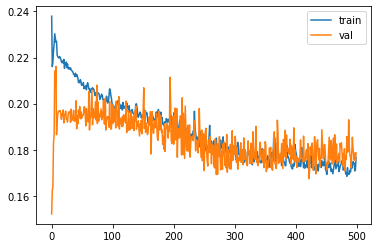

Epoch 1/500
 86/103 [========================>.....] - ETA: 0s - loss: 0.8634 - mae: 0.2981
Epoch 00001: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 4ms/step - loss: 0.8287 - mae: 0.2807 - val_loss: 0.7866 - val_mae: 0.2616
Epoch 2/500
 98/103 [===========================>..] - ETA: 0s - loss: 0.8069 - mae: 0.2868
Epoch 00002: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.7883 - mae: 0.2815 - val_loss: 0.7515 - val_mae: 0.2668
Epoch 3/500
 97/103 [===========================>..] - ETA: 0s - loss: 0.7890 - mae: 0.2940
Epoch 00003: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.7650 - mae: 0.2866 - val_loss: 0.7676 - val_mae: 0.2642
Epoch 4/500
 95/103 [==========================>...] - ETA: 0s - loss: 0.7560 - mae: 0.2857
Epoch 00004: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.7548

 93/103 [==========================>...] - ETA: 0s - loss: 0.6400 - mae: 0.2693
Epoch 00032: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6429 - mae: 0.2686 - val_loss: 0.9027 - val_mae: 0.2556
Epoch 33/500
 93/103 [==========================>...] - ETA: 0s - loss: 0.6461 - mae: 0.2684
Epoch 00033: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6481 - mae: 0.2679 - val_loss: 0.9007 - val_mae: 0.2591
Epoch 34/500
 84/103 [=======================>......] - ETA: 0s - loss: 0.6848 - mae: 0.2903
Epoch 00034: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6322 - mae: 0.2675 - val_loss: 0.9146 - val_mae: 0.2605
Epoch 35/500
 92/103 [=========================>....] - ETA: 0s - loss: 0.6418 - mae: 0.2713
Epoch 00035: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6396 - mae: 0

 96/103 [==========================>...] - ETA: 0s - loss: 0.6473 - mae: 0.2704
Epoch 00063: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6250 - mae: 0.2631 - val_loss: 0.8989 - val_mae: 0.2578
Epoch 64/500
100/103 [============================>.] - ETA: 0s - loss: 0.6320 - mae: 0.2647
Epoch 00064: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6240 - mae: 0.2620 - val_loss: 0.8893 - val_mae: 0.2557
Epoch 65/500
 90/103 [=========================>....] - ETA: 0s - loss: 0.6385 - mae: 0.2708
Epoch 00065: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6295 - mae: 0.2628 - val_loss: 0.8931 - val_mae: 0.2578
Epoch 66/500
 94/103 [==========================>...] - ETA: 0s - loss: 0.6240 - mae: 0.2648
Epoch 00066: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6203 - mae: 0

 98/103 [===========================>..] - ETA: 0s - loss: 0.6392 - mae: 0.2670
Epoch 00094: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6259 - mae: 0.2622 - val_loss: 0.9241 - val_mae: 0.2599
Epoch 95/500
 93/103 [==========================>...] - ETA: 0s - loss: 0.6060 - mae: 0.2595
Epoch 00095: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6148 - mae: 0.2592 - val_loss: 0.9122 - val_mae: 0.2583
Epoch 96/500
 98/103 [===========================>..] - ETA: 0s - loss: 0.6319 - mae: 0.2630
Epoch 00096: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6192 - mae: 0.2584 - val_loss: 0.9300 - val_mae: 0.2587
Epoch 97/500
 96/103 [==========================>...] - ETA: 0s - loss: 0.6351 - mae: 0.2658
Epoch 00097: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6165 - mae: 0

Epoch 125/500
103/103 [==============================] - ETA: 0s - loss: 0.6023 - mae: 0.2544
Epoch 00125: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6023 - mae: 0.2544 - val_loss: 0.9474 - val_mae: 0.2552
Epoch 126/500
102/103 [============================>.] - ETA: 0s - loss: 0.6109 - mae: 0.2551
Epoch 00126: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6099 - mae: 0.2548 - val_loss: 0.9416 - val_mae: 0.2565
Epoch 127/500
 70/103 [===================>..........] - ETA: 0s - loss: 0.6714 - mae: 0.2831
Epoch 00127: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6044 - mae: 0.2544 - val_loss: 0.9433 - val_mae: 0.2570
Epoch 128/500
 71/103 [===================>..........] - ETA: 0s - loss: 0.6613 - mae: 0.2802
Epoch 00128: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 156/500
 69/103 [===================>..........] - ETA: 0s - loss: 0.6874 - mae: 0.2875
Epoch 00156: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6069 - mae: 0.2539 - val_loss: 0.9253 - val_mae: 0.2497
Epoch 157/500
101/103 [============================>.] - ETA: 0s - loss: 0.5961 - mae: 0.2518
Epoch 00157: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5912 - mae: 0.2502 - val_loss: 0.9425 - val_mae: 0.2477
Epoch 158/500
101/103 [============================>.] - ETA: 0s - loss: 0.5910 - mae: 0.2494
Epoch 00158: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5863 - mae: 0.2479 - val_loss: 0.9416 - val_mae: 0.2446
Epoch 159/500
 70/103 [===================>..........] - ETA: 0s - loss: 0.6736 - mae: 0.2854
Epoch 00159: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 187/500
 94/103 [==========================>...] - ETA: 0s - loss: 0.5806 - mae: 0.2459
Epoch 00187: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5778 - mae: 0.2433 - val_loss: 1.0115 - val_mae: 0.2427
Epoch 188/500
 99/103 [===========================>..] - ETA: 0s - loss: 0.5893 - mae: 0.2478
Epoch 00188: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5787 - mae: 0.2439 - val_loss: 0.9894 - val_mae: 0.2443
Epoch 189/500
 90/103 [=========================>....] - ETA: 0s - loss: 0.5847 - mae: 0.2488
Epoch 00189: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5773 - mae: 0.2421 - val_loss: 0.9961 - val_mae: 0.2253
Epoch 190/500
 97/103 [===========================>..] - ETA: 0s - loss: 0.6418 - mae: 0.2576
Epoch 00190: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 218/500
 97/103 [===========================>..] - ETA: 0s - loss: 0.6133 - mae: 0.2510
Epoch 00218: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5957 - mae: 0.2448 - val_loss: 0.9850 - val_mae: 0.2450
Epoch 219/500
 84/103 [=======================>......] - ETA: 0s - loss: 0.6454 - mae: 0.2655
Epoch 00219: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 4ms/step - loss: 0.5943 - mae: 0.2422 - val_loss: 0.9946 - val_mae: 0.2473
Epoch 220/500
 94/103 [==========================>...] - ETA: 0s - loss: 0.5984 - mae: 0.2468
Epoch 00220: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5982 - mae: 0.2433 - val_loss: 0.9849 - val_mae: 0.2484
Epoch 221/500
 95/103 [==========================>...] - ETA: 0s - loss: 0.6091 - mae: 0.2504
Epoch 00221: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 249/500
 95/103 [==========================>...] - ETA: 0s - loss: 0.5886 - mae: 0.2450
Epoch 00249: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5714 - mae: 0.2399 - val_loss: 1.0301 - val_mae: 0.2447
Epoch 250/500
 92/103 [=========================>....] - ETA: 0s - loss: 0.6122 - mae: 0.2287
Epoch 00250: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6096 - mae: 0.2293 - val_loss: 0.9717 - val_mae: 0.2481
Epoch 251/500
 71/103 [===================>..........] - ETA: 0s - loss: 0.6763 - mae: 0.2822
Epoch 00251: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.6058 - mae: 0.2523 - val_loss: 0.9403 - val_mae: 0.2426
Epoch 252/500
 94/103 [==========================>...] - ETA: 0s - loss: 0.6116 - mae: 0.2533
Epoch 00252: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 280/500
 92/103 [=========================>....] - ETA: 0s - loss: 0.5835 - mae: 0.2438
Epoch 00280: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5810 - mae: 0.2422 - val_loss: 0.9830 - val_mae: 0.2446
Epoch 281/500
101/103 [============================>.] - ETA: 0s - loss: 0.5836 - mae: 0.2466
Epoch 00281: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5799 - mae: 0.2455 - val_loss: 0.9630 - val_mae: 0.2434
Epoch 282/500
 93/103 [==========================>...] - ETA: 0s - loss: 0.5628 - mae: 0.2404
Epoch 00282: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5666 - mae: 0.2406 - val_loss: 0.9946 - val_mae: 0.2427
Epoch 283/500
 95/103 [==========================>...] - ETA: 0s - loss: 0.5884 - mae: 0.2459
Epoch 00283: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 311/500
 95/103 [==========================>...] - ETA: 0s - loss: 0.5921 - mae: 0.2495
Epoch 00311: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5787 - mae: 0.2452 - val_loss: 0.9904 - val_mae: 0.2451
Epoch 312/500
 98/103 [===========================>..] - ETA: 0s - loss: 0.5881 - mae: 0.2493
Epoch 00312: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5763 - mae: 0.2454 - val_loss: 0.9817 - val_mae: 0.2448
Epoch 313/500
 93/103 [==========================>...] - ETA: 0s - loss: 0.5626 - mae: 0.2428
Epoch 00313: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5665 - mae: 0.2429 - val_loss: 1.0364 - val_mae: 0.2490
Epoch 314/500
 98/103 [===========================>..] - ETA: 0s - loss: 0.5831 - mae: 0.2459
Epoch 00314: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 342/500
100/103 [============================>.] - ETA: 0s - loss: 0.5714 - mae: 0.2399
Epoch 00342: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5673 - mae: 0.2387 - val_loss: 0.9916 - val_mae: 0.2460
Epoch 343/500
101/103 [============================>.] - ETA: 0s - loss: 0.5705 - mae: 0.2376
Epoch 00343: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5677 - mae: 0.2370 - val_loss: 1.0319 - val_mae: 0.2479
Epoch 344/500
 97/103 [===========================>..] - ETA: 0s - loss: 0.5805 - mae: 0.2432
Epoch 00344: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5643 - mae: 0.2376 - val_loss: 1.0325 - val_mae: 0.2449
Epoch 345/500
 96/103 [==========================>...] - ETA: 0s - loss: 0.5933 - mae: 0.2433
Epoch 00345: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 373/500
 98/103 [===========================>..] - ETA: 0s - loss: 0.6055 - mae: 0.2513
Epoch 00373: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5951 - mae: 0.2470 - val_loss: 1.0715 - val_mae: 0.2421
Epoch 374/500
101/103 [============================>.] - ETA: 0s - loss: 0.5731 - mae: 0.2401
Epoch 00374: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5696 - mae: 0.2391 - val_loss: 1.0554 - val_mae: 0.2469
Epoch 375/500
 96/103 [==========================>...] - ETA: 0s - loss: 0.5876 - mae: 0.2470
Epoch 00375: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5704 - mae: 0.2415 - val_loss: 1.0692 - val_mae: 0.2478
Epoch 376/500
 77/103 [=====================>........] - ETA: 0s - loss: 0.6501 - mae: 0.2730
Epoch 00376: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 404/500
 95/103 [==========================>...] - ETA: 0s - loss: 0.5818 - mae: 0.2431
Epoch 00404: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5675 - mae: 0.2395 - val_loss: 1.0418 - val_mae: 0.2460
Epoch 405/500
 94/103 [==========================>...] - ETA: 0s - loss: 0.5652 - mae: 0.2390
Epoch 00405: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5628 - mae: 0.2381 - val_loss: 1.0459 - val_mae: 0.2473
Epoch 406/500
 96/103 [==========================>...] - ETA: 0s - loss: 0.5809 - mae: 0.2443
Epoch 00406: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5653 - mae: 0.2395 - val_loss: 1.0593 - val_mae: 0.2466
Epoch 407/500
 72/103 [===================>..........] - ETA: 0s - loss: 0.6350 - mae: 0.2677
Epoch 00407: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 435/500
 93/103 [==========================>...] - ETA: 0s - loss: 0.5552 - mae: 0.2359
Epoch 00435: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5597 - mae: 0.2371 - val_loss: 1.0465 - val_mae: 0.2447
Epoch 436/500
 96/103 [==========================>...] - ETA: 0s - loss: 0.5856 - mae: 0.2477
Epoch 00436: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5702 - mae: 0.2429 - val_loss: 1.0642 - val_mae: 0.2419
Epoch 437/500
 85/103 [=======================>......] - ETA: 0s - loss: 0.6128 - mae: 0.2558
Epoch 00437: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5677 - mae: 0.2376 - val_loss: 1.0408 - val_mae: 0.2427
Epoch 438/500
 98/103 [===========================>..] - ETA: 0s - loss: 0.5733 - mae: 0.2408
Epoch 00438: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 466/500
 91/103 [=========================>....] - ETA: 0s - loss: 0.5724 - mae: 0.2470
Epoch 00466: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5830 - mae: 0.2426 - val_loss: 1.0943 - val_mae: 0.2448
Epoch 467/500
 75/103 [====================>.........] - ETA: 0s - loss: 0.6583 - mae: 0.2787
Epoch 00467: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5779 - mae: 0.2420 - val_loss: 1.0608 - val_mae: 0.2431
Epoch 468/500
 92/103 [=========================>....] - ETA: 0s - loss: 0.5710 - mae: 0.2445
Epoch 00468: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5769 - mae: 0.2427 - val_loss: 1.0397 - val_mae: 0.2447
Epoch 469/500
 94/103 [==========================>...] - ETA: 0s - loss: 0.5751 - mae: 0.2451
Epoch 00469: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

Epoch 497/500
 72/103 [===================>..........] - ETA: 0s - loss: 0.6463 - mae: 0.2800
Epoch 00497: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5748 - mae: 0.2446 - val_loss: 1.0477 - val_mae: 0.2440
Epoch 498/500
 73/103 [====================>.........] - ETA: 0s - loss: 0.6690 - mae: 0.2857
Epoch 00498: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5875 - mae: 0.2469 - val_loss: 1.0705 - val_mae: 0.2417
Epoch 499/500
 67/103 [==================>...........] - ETA: 0s - loss: 0.6651 - mae: 0.2832
Epoch 00499: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss: 0.5780 - mae: 0.2437 - val_loss: 1.0750 - val_mae: 0.2418
Epoch 500/500
101/103 [============================>.] - ETA: 0s - loss: 0.5756 - mae: 0.2437
Epoch 00500: val_mae did not improve from 0.10687
103/103 [==============================] - 0s 3ms/step - loss

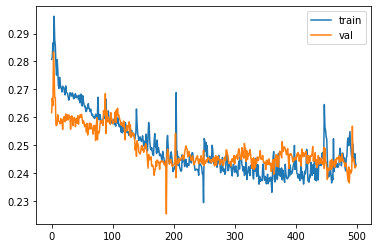

Epoch 1/500
71/79 [=========================>....] - ETA: 0s - loss: 0.7494 - mae: 0.2272
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6957 - mae: 0.2146 - val_loss: 0.8560 - val_mae: 0.2310
Epoch 2/500
70/79 [=========================>....] - ETA: 0s - loss: 0.6727 - mae: 0.2117
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6292 - mae: 0.2044 - val_loss: 0.7804 - val_mae: 0.2435
Epoch 3/500
75/79 [===========================>..] - ETA: 0s - loss: 0.6111 - mae: 0.2033
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6003 - mae: 0.2018 - val_loss: 0.7684 - val_mae: 0.2407
Epoch 4/500
69/79 [=========================>....] - ETA: 0s - loss: 0.5749 - mae: 0.2012
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5776 - mae: 0.1973 -

Epoch 33/500
60/79 [=====================>........] - ETA: 0s - loss: 0.5126 - mae: 0.1937
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5115 - mae: 0.1880 - val_loss: 0.6929 - val_mae: 0.2331
Epoch 34/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4899 - mae: 0.1847
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5087 - mae: 0.1859 - val_loss: 0.6932 - val_mae: 0.2329
Epoch 35/500
70/79 [=========================>....] - ETA: 0s - loss: 0.5425 - mae: 0.1951
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5089 - mae: 0.1858 - val_loss: 0.6921 - val_mae: 0.2327
Epoch 36/500
71/79 [=========================>....] - ETA: 0s - loss: 0.5402 - mae: 0.1943
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5123 - mae: 0.18

Epoch 65/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4838 - mae: 0.1875
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5054 - mae: 0.1872 - val_loss: 0.7229 - val_mae: 0.2332
Epoch 66/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4786 - mae: 0.1872
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5004 - mae: 0.1872 - val_loss: 0.7136 - val_mae: 0.2344
Epoch 67/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4785 - mae: 0.1866
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4985 - mae: 0.1864 - val_loss: 0.7319 - val_mae: 0.2326
Epoch 68/500
68/79 [========================>.....] - ETA: 0s - loss: 0.5440 - mae: 0.2002
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5097 - mae: 0.19

Epoch 97/500
60/79 [=====================>........] - ETA: 0s - loss: 0.5022 - mae: 0.1924
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5038 - mae: 0.1899 - val_loss: 0.7244 - val_mae: 0.2377
Epoch 98/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4820 - mae: 0.1867
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5043 - mae: 0.1895 - val_loss: 0.7229 - val_mae: 0.2374
Epoch 99/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4948 - mae: 0.1918
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5006 - mae: 0.1914 - val_loss: 0.7207 - val_mae: 0.2371
Epoch 100/500
62/79 [======================>.......] - ETA: 0s - loss: 0.4860 - mae: 0.1909
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4994 - mae: 0.1

Epoch 129/500
66/79 [========================>.....] - ETA: 0s - loss: 0.5239 - mae: 0.1872
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.5266 - mae: 0.1885 - val_loss: 0.6875 - val_mae: 0.2330
Epoch 130/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4671 - mae: 0.1812
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4948 - mae: 0.1855 - val_loss: 0.6888 - val_mae: 0.2324
Epoch 131/500
67/79 [========================>.....] - ETA: 0s - loss: 0.5215 - mae: 0.1930
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4945 - mae: 0.1875 - val_loss: 0.6836 - val_mae: 0.2324
Epoch 132/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4703 - mae: 0.1837
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4926 - mae: 

Epoch 161/500
72/79 [==========================>...] - ETA: 0s - loss: 0.4998 - mae: 0.1857
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4786 - mae: 0.1807 - val_loss: 0.7267 - val_mae: 0.2310
Epoch 162/500
67/79 [========================>.....] - ETA: 0s - loss: 0.5018 - mae: 0.1878
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4770 - mae: 0.1810 - val_loss: 0.7214 - val_mae: 0.2303
Epoch 163/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4734 - mae: 0.1823
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4766 - mae: 0.1810 - val_loss: 0.7199 - val_mae: 0.2298
Epoch 164/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4658 - mae: 0.1804
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4761 - mae: 

Epoch 193/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4683 - mae: 0.1848
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4737 - mae: 0.1833 - val_loss: 0.7525 - val_mae: 0.2381
Epoch 194/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4678 - mae: 0.1835
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4741 - mae: 0.1828 - val_loss: 0.7545 - val_mae: 0.2382
Epoch 195/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4677 - mae: 0.1853
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4728 - mae: 0.1835 - val_loss: 0.7558 - val_mae: 0.2387
Epoch 196/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4653 - mae: 0.1835
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4720 - mae: 

Epoch 225/500
53/79 [===================>..........] - ETA: 0s - loss: 0.5235 - mae: 0.2000
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4786 - mae: 0.1844 - val_loss: 0.7234 - val_mae: 0.2385
Epoch 226/500
69/79 [=========================>....] - ETA: 0s - loss: 0.5049 - mae: 0.1904
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4780 - mae: 0.1841 - val_loss: 0.7210 - val_mae: 0.2380
Epoch 227/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4661 - mae: 0.1836
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4785 - mae: 0.1842 - val_loss: 0.7183 - val_mae: 0.2381
Epoch 228/500
67/79 [========================>.....] - ETA: 0s - loss: 0.5039 - mae: 0.1910
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4784 - mae: 

Epoch 257/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4667 - mae: 0.1826
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4749 - mae: 0.1839 - val_loss: 0.7176 - val_mae: 0.2355
Epoch 258/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4745 - mae: 0.1801
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4812 - mae: 0.1819 - val_loss: 0.7046 - val_mae: 0.2361
Epoch 259/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4808 - mae: 0.1840
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4803 - mae: 0.1840 - val_loss: 0.7137 - val_mae: 0.2363
Epoch 260/500
61/79 [======================>.......] - ETA: 0s - loss: 0.4837 - mae: 0.1852
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4807 - mae: 

Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4792 - mae: 0.1813 - val_loss: 0.7475 - val_mae: 0.2322
Epoch 289/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4643 - mae: 0.1812
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4777 - mae: 0.1826 - val_loss: 0.7437 - val_mae: 0.2313
Epoch 290/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4692 - mae: 0.1819
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4779 - mae: 0.1820 - val_loss: 0.7524 - val_mae: 0.2321
Epoch 291/500
61/79 [======================>.......] - ETA: 0s - loss: 0.4786 - mae: 0.1837
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4784 - mae: 0.1812 - val_loss: 0.7725 - val_mae: 0.2329
Epoch 292/500
64/79 [=======================>...

Epoch 320/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4929 - mae: 0.1861
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4662 - mae: 0.1773 - val_loss: 0.7591 - val_mae: 0.2272
Epoch 321/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4926 - mae: 0.1859
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4649 - mae: 0.1771 - val_loss: 0.7490 - val_mae: 0.2278
Epoch 322/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4928 - mae: 0.1865
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4643 - mae: 0.1774 - val_loss: 0.7555 - val_mae: 0.2269
Epoch 323/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4584 - mae: 0.1792
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4619 - mae: 

Epoch 352/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4588 - mae: 0.1801
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4673 - mae: 0.1770 - val_loss: 0.7828 - val_mae: 0.2294
Epoch 353/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4676 - mae: 0.1836
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4630 - mae: 0.1773 - val_loss: 0.8043 - val_mae: 0.2313
Epoch 354/500
68/79 [========================>.....] - ETA: 0s - loss: 0.4951 - mae: 0.1878
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4625 - mae: 0.1768 - val_loss: 0.7809 - val_mae: 0.2290
Epoch 355/500
68/79 [========================>.....] - ETA: 0s - loss: 0.4954 - mae: 0.1875
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4677 - mae: 

Epoch 384/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4431 - mae: 0.1754
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4521 - mae: 0.1749 - val_loss: 0.7529 - val_mae: 0.2303
Epoch 385/500
69/79 [=========================>....] - ETA: 0s - loss: 0.4832 - mae: 0.1813
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4591 - mae: 0.1763 - val_loss: 0.7492 - val_mae: 0.2379
Epoch 386/500
68/79 [========================>.....] - ETA: 0s - loss: 0.4776 - mae: 0.1849
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4559 - mae: 0.1798 - val_loss: 0.7526 - val_mae: 0.2356
Epoch 387/500
68/79 [========================>.....] - ETA: 0s - loss: 0.4797 - mae: 0.1827
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4570 - mae: 

Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4454 - mae: 0.1741 - val_loss: 0.7417 - val_mae: 0.2334
Epoch 416/500
70/79 [=========================>....] - ETA: 0s - loss: 0.4689 - mae: 0.1821
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4450 - mae: 0.1758 - val_loss: 0.7423 - val_mae: 0.2333
Epoch 417/500
69/79 [=========================>....] - ETA: 0s - loss: 0.4685 - mae: 0.1810
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4451 - mae: 0.1753 - val_loss: 0.7507 - val_mae: 0.2336
Epoch 418/500
67/79 [========================>.....] - ETA: 0s - loss: 0.4644 - mae: 0.1807
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4441 - mae: 0.1752 - val_loss: 0.7627 - val_mae: 0.2344
Epoch 419/500
70/79 [=========================>.

Epoch 447/500
69/79 [=========================>....] - ETA: 0s - loss: 0.4669 - mae: 0.1776
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4388 - mae: 0.1698 - val_loss: 0.7430 - val_mae: 0.2290
Epoch 448/500
70/79 [=========================>....] - ETA: 0s - loss: 0.4669 - mae: 0.1787
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4403 - mae: 0.1711 - val_loss: 0.7559 - val_mae: 0.2333
Epoch 449/500
59/79 [=====================>........] - ETA: 0s - loss: 0.4493 - mae: 0.1795
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4373 - mae: 0.1734 - val_loss: 0.7633 - val_mae: 0.2326
Epoch 450/500
60/79 [=====================>........] - ETA: 0s - loss: 0.4441 - mae: 0.1777
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4373 - mae: 

Epoch 479/500
63/79 [======================>.......] - ETA: 0s - loss: 0.4191 - mae: 0.1691
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4282 - mae: 0.1706 - val_loss: 0.8021 - val_mae: 0.2373
Epoch 480/500
66/79 [========================>.....] - ETA: 0s - loss: 0.4296 - mae: 0.1721
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 4ms/step - loss: 0.4278 - mae: 0.1697 - val_loss: 0.8196 - val_mae: 0.2329
Epoch 481/500
64/79 [=======================>......] - ETA: 0s - loss: 0.4181 - mae: 0.1695
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4333 - mae: 0.1700 - val_loss: 0.8075 - val_mae: 0.2350
Epoch 482/500
65/79 [=======================>......] - ETA: 0s - loss: 0.4241 - mae: 0.1699
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.4312 - mae: 

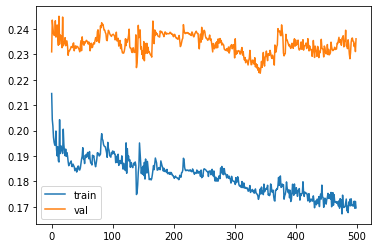

Epoch 1/500
67/81 [=======================>......] - ETA: 0s - loss: 0.6422 - mae: 0.2072
Epoch 00001: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.6763 - mae: 0.2089 - val_loss: 0.3382 - val_mae: 0.1431
Epoch 2/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4783 - mae: 0.1736
Epoch 00002: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.5408 - mae: 0.1816 - val_loss: 0.3375 - val_mae: 0.1464
Epoch 3/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4806 - mae: 0.1758
Epoch 00003: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.5412 - mae: 0.1837 - val_loss: 0.3484 - val_mae: 0.1458
Epoch 4/500
70/81 [========================>.....] - ETA: 0s - loss: 0.5131 - mae: 0.1785
Epoch 00004: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.5338 - mae: 0.1827 -

Epoch 33/500
58/81 [====================>.........] - ETA: 0s - loss: 0.4689 - mae: 0.1813
Epoch 00033: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4916 - mae: 0.1826 - val_loss: 0.3613 - val_mae: 0.1496
Epoch 34/500
60/81 [=====================>........] - ETA: 0s - loss: 0.4534 - mae: 0.1766
Epoch 00034: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4892 - mae: 0.1818 - val_loss: 0.3614 - val_mae: 0.1497
Epoch 35/500
59/81 [====================>.........] - ETA: 0s - loss: 0.4645 - mae: 0.1791
Epoch 00035: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4919 - mae: 0.1822 - val_loss: 0.3621 - val_mae: 0.1501
Epoch 36/500
53/81 [==================>...........] - ETA: 0s - loss: 0.4392 - mae: 0.1770
Epoch 00036: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4950 - mae: 0.18

Epoch 65/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4324 - mae: 0.1738
Epoch 00065: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4914 - mae: 0.1839 - val_loss: 0.3671 - val_mae: 0.1546
Epoch 66/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4371 - mae: 0.1750
Epoch 00066: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4947 - mae: 0.1844 - val_loss: 0.3616 - val_mae: 0.1500
Epoch 67/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4368 - mae: 0.1738
Epoch 00067: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4942 - mae: 0.1840 - val_loss: 0.3583 - val_mae: 0.1494
Epoch 68/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4492 - mae: 0.1761
Epoch 00068: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4935 - mae: 0.18

Epoch 97/500
68/81 [========================>.....] - ETA: 0s - loss: 0.4479 - mae: 0.1747
Epoch 00097: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4866 - mae: 0.1813 - val_loss: 0.3628 - val_mae: 0.1480
Epoch 98/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4429 - mae: 0.1739
Epoch 00098: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4866 - mae: 0.1814 - val_loss: 0.3658 - val_mae: 0.1496
Epoch 99/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4389 - mae: 0.1739
Epoch 00099: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4866 - mae: 0.1827 - val_loss: 0.3639 - val_mae: 0.1505
Epoch 100/500
63/81 [======================>.......] - ETA: 0s - loss: 0.4489 - mae: 0.1764
Epoch 00100: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4873 - mae: 0.1

Epoch 129/500
62/81 [=====================>........] - ETA: 0s - loss: 0.4482 - mae: 0.1755
Epoch 00129: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4828 - mae: 0.1809 - val_loss: 0.3723 - val_mae: 0.1555
Epoch 130/500
61/81 [=====================>........] - ETA: 0s - loss: 0.4437 - mae: 0.1777
Epoch 00130: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4837 - mae: 0.1839 - val_loss: 0.3713 - val_mae: 0.1535
Epoch 131/500
59/81 [====================>.........] - ETA: 0s - loss: 0.4529 - mae: 0.1801
Epoch 00131: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4827 - mae: 0.1831 - val_loss: 0.3700 - val_mae: 0.1518
Epoch 132/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4417 - mae: 0.1743
Epoch 00132: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4824 - mae: 

Epoch 161/500
63/81 [======================>.......] - ETA: 0s - loss: 0.4421 - mae: 0.1739
Epoch 00161: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4783 - mae: 0.1803 - val_loss: 0.3591 - val_mae: 0.1499
Epoch 162/500
62/81 [=====================>........] - ETA: 0s - loss: 0.4518 - mae: 0.1775
Epoch 00162: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4819 - mae: 0.1832 - val_loss: 0.3671 - val_mae: 0.1495
Epoch 163/500
62/81 [=====================>........] - ETA: 0s - loss: 0.4479 - mae: 0.1743
Epoch 00163: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4787 - mae: 0.1798 - val_loss: 0.3611 - val_mae: 0.1477
Epoch 164/500
68/81 [========================>.....] - ETA: 0s - loss: 0.4386 - mae: 0.1717
Epoch 00164: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4768 - mae: 

Epoch 193/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4198 - mae: 0.1668
Epoch 00193: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4700 - mae: 0.1780 - val_loss: 0.3828 - val_mae: 0.1556
Epoch 194/500
68/81 [========================>.....] - ETA: 0s - loss: 0.4312 - mae: 0.1709
Epoch 00194: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4665 - mae: 0.1792 - val_loss: 0.3800 - val_mae: 0.1530
Epoch 195/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4286 - mae: 0.1700
Epoch 00195: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4647 - mae: 0.1764 - val_loss: 0.3845 - val_mae: 0.1531
Epoch 196/500
69/81 [========================>.....] - ETA: 0s - loss: 0.4434 - mae: 0.1690
Epoch 00196: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4671 - mae: 

Epoch 225/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4394 - mae: 0.1722
Epoch 00225: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4813 - mae: 0.1823 - val_loss: 0.3905 - val_mae: 0.1545
Epoch 226/500
61/81 [=====================>........] - ETA: 0s - loss: 0.4311 - mae: 0.1724
Epoch 00226: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4651 - mae: 0.1766 - val_loss: 0.3933 - val_mae: 0.1561
Epoch 227/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4231 - mae: 0.1693
Epoch 00227: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4610 - mae: 0.1785 - val_loss: 0.3864 - val_mae: 0.1533
Epoch 228/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4315 - mae: 0.1666
Epoch 00228: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4639 - mae: 

Epoch 257/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4199 - mae: 0.1648
Epoch 00257: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4700 - mae: 0.1781 - val_loss: 0.3854 - val_mae: 0.1547
Epoch 258/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4403 - mae: 0.1717
Epoch 00258: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4712 - mae: 0.1788 - val_loss: 0.3908 - val_mae: 0.1581
Epoch 259/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4187 - mae: 0.1646
Epoch 00259: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4660 - mae: 0.1784 - val_loss: 0.3846 - val_mae: 0.1535
Epoch 260/500
66/81 [=======================>......] - ETA: 0s - loss: 0.4257 - mae: 0.1630
Epoch 00260: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4711 - mae: 

Epoch 289/500
58/81 [====================>.........] - ETA: 0s - loss: 0.4355 - mae: 0.1704
Epoch 00289: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4600 - mae: 0.1729 - val_loss: 0.3849 - val_mae: 0.1573
Epoch 290/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4181 - mae: 0.1654
Epoch 00290: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4602 - mae: 0.1749 - val_loss: 0.3805 - val_mae: 0.1546
Epoch 291/500
66/81 [=======================>......] - ETA: 0s - loss: 0.4129 - mae: 0.1593
Epoch 00291: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4616 - mae: 0.1706 - val_loss: 0.3798 - val_mae: 0.1546
Epoch 292/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4190 - mae: 0.1648
Epoch 00292: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4595 - mae: 

Epoch 321/500
81/81 [==============================] - ETA: 0s - loss: 0.4751 - mae: 0.1800
Epoch 00321: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4751 - mae: 0.1800 - val_loss: 0.3837 - val_mae: 0.1504
Epoch 322/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4096 - mae: 0.1581
Epoch 00322: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4709 - mae: 0.1734 - val_loss: 0.3874 - val_mae: 0.1534
Epoch 323/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4204 - mae: 0.1621
Epoch 00323: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4681 - mae: 0.1746 - val_loss: 0.3886 - val_mae: 0.1537
Epoch 324/500
62/81 [=====================>........] - ETA: 0s - loss: 0.4259 - mae: 0.1642
Epoch 00324: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4591 - mae: 

Epoch 353/500
67/81 [=======================>......] - ETA: 0s - loss: 0.3995 - mae: 0.1559
Epoch 00353: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4551 - mae: 0.1667 - val_loss: 0.4016 - val_mae: 0.1493
Epoch 354/500
67/81 [=======================>......] - ETA: 0s - loss: 0.4055 - mae: 0.1577
Epoch 00354: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4637 - mae: 0.1726 - val_loss: 0.3961 - val_mae: 0.1528
Epoch 355/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4155 - mae: 0.1617
Epoch 00355: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4589 - mae: 0.1707 - val_loss: 0.3939 - val_mae: 0.1515
Epoch 356/500
66/81 [=======================>......] - ETA: 0s - loss: 0.4052 - mae: 0.1586
Epoch 00356: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4544 - mae: 

Epoch 385/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4206 - mae: 0.1629
Epoch 00385: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4528 - mae: 0.1715 - val_loss: 0.4074 - val_mae: 0.1536
Epoch 386/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4228 - mae: 0.1628
Epoch 00386: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4506 - mae: 0.1698 - val_loss: 0.4056 - val_mae: 0.1556
Epoch 387/500
66/81 [=======================>......] - ETA: 0s - loss: 0.4091 - mae: 0.1597
Epoch 00387: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4488 - mae: 0.1693 - val_loss: 0.3934 - val_mae: 0.1478
Epoch 388/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4139 - mae: 0.1614
Epoch 00388: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4484 - mae: 

Epoch 417/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4123 - mae: 0.1600
Epoch 00417: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4403 - mae: 0.1649 - val_loss: 0.4198 - val_mae: 0.1596
Epoch 418/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4084 - mae: 0.1598
Epoch 00418: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4417 - mae: 0.1667 - val_loss: 0.4226 - val_mae: 0.1615
Epoch 419/500
65/81 [=======================>......] - ETA: 0s - loss: 0.4111 - mae: 0.1624
Epoch 00419: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4419 - mae: 0.1679 - val_loss: 0.4174 - val_mae: 0.1565
Epoch 420/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4104 - mae: 0.1602
Epoch 00420: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4375 - mae: 

Epoch 449/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4258 - mae: 0.1570
Epoch 00449: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4549 - mae: 0.1638 - val_loss: 0.4611 - val_mae: 0.1635
Epoch 450/500
62/81 [=====================>........] - ETA: 0s - loss: 0.4205 - mae: 0.1552
Epoch 00450: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4467 - mae: 0.1580 - val_loss: 0.4617 - val_mae: 0.1671
Epoch 451/500
64/81 [======================>.......] - ETA: 0s - loss: 0.4118 - mae: 0.1616
Epoch 00451: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 3ms/step - loss: 0.4498 - mae: 0.1702 - val_loss: 0.4585 - val_mae: 0.1686
Epoch 452/500
60/81 [=====================>........] - ETA: 0s - loss: 0.4193 - mae: 0.1603
Epoch 00452: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4435 - mae: 

Epoch 00480: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4201 - mae: 0.1563 - val_loss: 0.4768 - val_mae: 0.1664
Epoch 481/500
60/81 [=====================>........] - ETA: 0s - loss: 0.4009 - mae: 0.1566
Epoch 00481: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4214 - mae: 0.1574 - val_loss: 0.4825 - val_mae: 0.1674
Epoch 482/500
58/81 [====================>.........] - ETA: 0s - loss: 0.4118 - mae: 0.1599
Epoch 00482: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4189 - mae: 0.1556 - val_loss: 0.4806 - val_mae: 0.1665
Epoch 483/500
58/81 [====================>.........] - ETA: 0s - loss: 0.4125 - mae: 0.1606
Epoch 00483: val_mae did not improve from 0.10687
81/81 [==============================] - 0s 4ms/step - loss: 0.4200 - mae: 0.1567 - val_loss: 0.4867 - val_mae: 0.1679
Epoch 484/500
55/81 [===================>.......

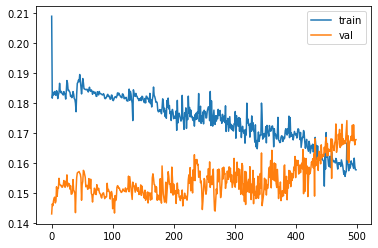

Epoch 1/500
63/88 [====================>.........] - ETA: 0s - loss: 0.8583 - mae: 0.2300
Epoch 00001: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.7893 - mae: 0.2206 - val_loss: 0.7322 - val_mae: 0.2470
Epoch 2/500
67/88 [=====================>........] - ETA: 0s - loss: 0.7126 - mae: 0.2243
Epoch 00002: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.6541 - mae: 0.2146 - val_loss: 0.6927 - val_mae: 0.2505
Epoch 3/500
67/88 [=====================>........] - ETA: 0s - loss: 0.6673 - mae: 0.2258
Epoch 00003: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.6115 - mae: 0.2158 - val_loss: 0.6808 - val_mae: 0.2541
Epoch 4/500
64/88 [====================>.........] - ETA: 0s - loss: 0.6493 - mae: 0.2276
Epoch 00004: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5993 - mae: 0.2190 -

Epoch 33/500
62/88 [====================>.........] - ETA: 0s - loss: 0.5877 - mae: 0.2249
Epoch 00033: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5551 - mae: 0.2186 - val_loss: 0.7054 - val_mae: 0.2584
Epoch 34/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5834 - mae: 0.2236
Epoch 00034: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5544 - mae: 0.2183 - val_loss: 0.7077 - val_mae: 0.2584
Epoch 35/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5838 - mae: 0.2232
Epoch 00035: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5553 - mae: 0.2179 - val_loss: 0.7087 - val_mae: 0.2587
Epoch 36/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5825 - mae: 0.2227
Epoch 00036: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5546 - mae: 0.21

Epoch 00064: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5459 - mae: 0.2166 - val_loss: 0.7130 - val_mae: 0.2525
Epoch 65/500
67/88 [=====================>........] - ETA: 0s - loss: 0.5778 - mae: 0.2216
Epoch 00065: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5445 - mae: 0.2162 - val_loss: 0.7166 - val_mae: 0.2521
Epoch 66/500
78/88 [=========================>....] - ETA: 0s - loss: 0.5623 - mae: 0.2200
Epoch 00066: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5441 - mae: 0.2153 - val_loss: 0.7188 - val_mae: 0.2523
Epoch 67/500
64/88 [====================>.........] - ETA: 0s - loss: 0.5676 - mae: 0.2185
Epoch 00067: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5426 - mae: 0.2151 - val_loss: 0.7187 - val_mae: 0.2525
Epoch 68/500
62/88 [====================>.........]

Epoch 96/500
68/88 [======================>.......] - ETA: 0s - loss: 0.5708 - mae: 0.2217
Epoch 00096: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5394 - mae: 0.2157 - val_loss: 0.6997 - val_mae: 0.2510
Epoch 97/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5633 - mae: 0.2178
Epoch 00097: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5403 - mae: 0.2154 - val_loss: 0.7012 - val_mae: 0.2514
Epoch 98/500
60/88 [===================>..........] - ETA: 0s - loss: 0.5749 - mae: 0.2231
Epoch 00098: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5389 - mae: 0.2162 - val_loss: 0.7047 - val_mae: 0.2518
Epoch 99/500
69/88 [======================>.......] - ETA: 0s - loss: 0.5698 - mae: 0.2219
Epoch 00099: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5401 - mae: 0.21

Epoch 128/500
68/88 [======================>.......] - ETA: 0s - loss: 0.5698 - mae: 0.2177
Epoch 00128: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5371 - mae: 0.2124 - val_loss: 0.7262 - val_mae: 0.2518
Epoch 129/500
65/88 [=====================>........] - ETA: 0s - loss: 0.5672 - mae: 0.2167
Epoch 00129: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5351 - mae: 0.2121 - val_loss: 0.7275 - val_mae: 0.2511
Epoch 130/500
61/88 [===================>..........] - ETA: 0s - loss: 0.5678 - mae: 0.2173
Epoch 00130: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5355 - mae: 0.2121 - val_loss: 0.7204 - val_mae: 0.2510
Epoch 131/500
67/88 [=====================>........] - ETA: 0s - loss: 0.5634 - mae: 0.2161
Epoch 00131: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5325 - mae: 

Epoch 160/500
79/88 [=========================>....] - ETA: 0s - loss: 0.5505 - mae: 0.2144
Epoch 00160: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5371 - mae: 0.2116 - val_loss: 0.7331 - val_mae: 0.2521
Epoch 161/500
65/88 [=====================>........] - ETA: 0s - loss: 0.5666 - mae: 0.2153
Epoch 00161: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5345 - mae: 0.2111 - val_loss: 0.7347 - val_mae: 0.2520
Epoch 162/500
68/88 [======================>.......] - ETA: 0s - loss: 0.5700 - mae: 0.2168
Epoch 00162: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5367 - mae: 0.2117 - val_loss: 0.7270 - val_mae: 0.2519
Epoch 163/500
69/88 [======================>.......] - ETA: 0s - loss: 0.5650 - mae: 0.2170
Epoch 00163: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5342 - mae: 

Epoch 00191: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5342 - mae: 0.2091 - val_loss: 0.7584 - val_mae: 0.2520
Epoch 192/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5582 - mae: 0.2116
Epoch 00192: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5329 - mae: 0.2094 - val_loss: 0.7598 - val_mae: 0.2516
Epoch 193/500
79/88 [=========================>....] - ETA: 0s - loss: 0.5464 - mae: 0.2115
Epoch 00193: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5326 - mae: 0.2086 - val_loss: 0.7608 - val_mae: 0.2522
Epoch 194/500
77/88 [=========================>....] - ETA: 0s - loss: 0.5635 - mae: 0.2155
Epoch 00194: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5395 - mae: 0.2098 - val_loss: 0.7533 - val_mae: 0.2522
Epoch 195/500
85/88 [===========================

Epoch 223/500
57/88 [==================>...........] - ETA: 0s - loss: 0.6391 - mae: 0.2177
Epoch 00223: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5839 - mae: 0.2138 - val_loss: 0.7377 - val_mae: 0.2487
Epoch 224/500
88/88 [==============================] - ETA: 0s - loss: 0.5685 - mae: 0.2142
Epoch 00224: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5685 - mae: 0.2142 - val_loss: 0.7415 - val_mae: 0.2493
Epoch 225/500
88/88 [==============================] - ETA: 0s - loss: 0.5684 - mae: 0.2144
Epoch 00225: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5684 - mae: 0.2144 - val_loss: 0.7355 - val_mae: 0.2498
Epoch 226/500
59/88 [===================>..........] - ETA: 0s - loss: 0.6193 - mae: 0.2231
Epoch 00226: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 4ms/step - loss: 0.5646 - mae: 

Epoch 255/500
72/88 [=======================>......] - ETA: 0s - loss: 0.5886 - mae: 0.2180
Epoch 00255: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5521 - mae: 0.2117 - val_loss: 0.7524 - val_mae: 0.2571
Epoch 256/500
70/88 [======================>.......] - ETA: 0s - loss: 0.5824 - mae: 0.2159
Epoch 00256: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5523 - mae: 0.2118 - val_loss: 0.7507 - val_mae: 0.2564
Epoch 257/500
70/88 [======================>.......] - ETA: 0s - loss: 0.5795 - mae: 0.2152
Epoch 00257: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5515 - mae: 0.2118 - val_loss: 0.7483 - val_mae: 0.2563
Epoch 258/500
67/88 [=====================>........] - ETA: 0s - loss: 0.5969 - mae: 0.2191
Epoch 00258: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5563 - mae: 

88/88 [==============================] - 0s 3ms/step - loss: 0.5224 - mae: 0.2046 - val_loss: 0.7306 - val_mae: 0.2540
Epoch 287/500
69/88 [======================>.......] - ETA: 0s - loss: 0.5532 - mae: 0.2100
Epoch 00287: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5244 - mae: 0.2051 - val_loss: 0.7286 - val_mae: 0.2551
Epoch 288/500
64/88 [====================>.........] - ETA: 0s - loss: 0.5453 - mae: 0.2075
Epoch 00288: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5222 - mae: 0.2046 - val_loss: 0.7269 - val_mae: 0.2548
Epoch 289/500
68/88 [======================>.......] - ETA: 0s - loss: 0.5562 - mae: 0.2098
Epoch 00289: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5247 - mae: 0.2043 - val_loss: 0.7256 - val_mae: 0.2546
Epoch 290/500
70/88 [======================>.......] - ETA: 0s - loss: 0.5502 - mae: 0.2094
Epoch 

Epoch 318/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5454 - mae: 0.2090
Epoch 00318: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5226 - mae: 0.2071 - val_loss: 0.7381 - val_mae: 0.2521
Epoch 319/500
62/88 [====================>.........] - ETA: 0s - loss: 0.5459 - mae: 0.2118
Epoch 00319: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5220 - mae: 0.2081 - val_loss: 0.7345 - val_mae: 0.2500
Epoch 320/500
61/88 [===================>..........] - ETA: 0s - loss: 0.5494 - mae: 0.2110
Epoch 00320: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5197 - mae: 0.2063 - val_loss: 0.7366 - val_mae: 0.2499
Epoch 321/500
65/88 [=====================>........] - ETA: 0s - loss: 0.5516 - mae: 0.2127
Epoch 00321: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5224 - mae: 

Epoch 350/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5519 - mae: 0.2120
Epoch 00350: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5263 - mae: 0.2087 - val_loss: 0.6918 - val_mae: 0.2503
Epoch 351/500
67/88 [=====================>........] - ETA: 0s - loss: 0.5441 - mae: 0.2125
Epoch 00351: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5151 - mae: 0.2074 - val_loss: 0.6933 - val_mae: 0.2497
Epoch 352/500
64/88 [====================>.........] - ETA: 0s - loss: 0.5370 - mae: 0.2108
Epoch 00352: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5139 - mae: 0.2070 - val_loss: 0.6963 - val_mae: 0.2503
Epoch 353/500
65/88 [=====================>........] - ETA: 0s - loss: 0.5405 - mae: 0.2109
Epoch 00353: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5131 - mae: 

Epoch 382/500
64/88 [====================>.........] - ETA: 0s - loss: 0.5478 - mae: 0.2134
Epoch 00382: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5270 - mae: 0.2107 - val_loss: 0.6875 - val_mae: 0.2556
Epoch 383/500
68/88 [======================>.......] - ETA: 0s - loss: 0.5542 - mae: 0.2172
Epoch 00383: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5247 - mae: 0.2106 - val_loss: 0.6840 - val_mae: 0.2527
Epoch 384/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5475 - mae: 0.2124
Epoch 00384: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5274 - mae: 0.2098 - val_loss: 0.6831 - val_mae: 0.2535
Epoch 385/500
62/88 [====================>.........] - ETA: 0s - loss: 0.5437 - mae: 0.2132
Epoch 00385: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5218 - mae: 

Epoch 414/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5468 - mae: 0.2165
Epoch 00414: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5233 - mae: 0.2123 - val_loss: 0.6987 - val_mae: 0.2577
Epoch 415/500
66/88 [=====================>........] - ETA: 0s - loss: 0.5460 - mae: 0.2161
Epoch 00415: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5258 - mae: 0.2123 - val_loss: 0.6971 - val_mae: 0.2570
Epoch 416/500
69/88 [======================>.......] - ETA: 0s - loss: 0.5505 - mae: 0.2186
Epoch 00416: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5225 - mae: 0.2124 - val_loss: 0.7008 - val_mae: 0.2577
Epoch 417/500
60/88 [===================>..........] - ETA: 0s - loss: 0.5594 - mae: 0.2207
Epoch 00417: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5240 - mae: 

Epoch 446/500
68/88 [======================>.......] - ETA: 0s - loss: 0.5486 - mae: 0.2158
Epoch 00446: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5183 - mae: 0.2095 - val_loss: 0.6964 - val_mae: 0.2570
Epoch 447/500
70/88 [======================>.......] - ETA: 0s - loss: 0.5404 - mae: 0.2133
Epoch 00447: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5176 - mae: 0.2088 - val_loss: 0.6989 - val_mae: 0.2563
Epoch 448/500
71/88 [=======================>......] - ETA: 0s - loss: 0.5383 - mae: 0.2132
Epoch 00448: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5162 - mae: 0.2084 - val_loss: 0.7002 - val_mae: 0.2572
Epoch 449/500
71/88 [=======================>......] - ETA: 0s - loss: 0.5376 - mae: 0.2131
Epoch 00449: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5153 - mae: 

Epoch 478/500
67/88 [=====================>........] - ETA: 0s - loss: 0.5441 - mae: 0.2107
Epoch 00478: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5128 - mae: 0.2053 - val_loss: 0.7064 - val_mae: 0.2524
Epoch 479/500
73/88 [=======================>......] - ETA: 0s - loss: 0.5431 - mae: 0.2141
Epoch 00479: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5127 - mae: 0.2066 - val_loss: 0.7059 - val_mae: 0.2532
Epoch 480/500
63/88 [====================>.........] - ETA: 0s - loss: 0.5271 - mae: 0.2077
Epoch 00480: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5097 - mae: 0.2050 - val_loss: 0.7076 - val_mae: 0.2521
Epoch 481/500
84/88 [===========================>..] - ETA: 0s - loss: 0.5278 - mae: 0.2095
Epoch 00481: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5188 - mae: 

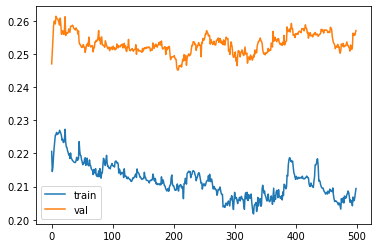

Epoch 1/500
80/88 [==========================>...] - ETA: 0s - loss: 0.5618 - mae: 0.2133
Epoch 00001: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.5576 - mae: 0.2116 - val_loss: 0.3512 - val_mae: 0.1547
Epoch 2/500
50/88 [================>.............] - ETA: 0s - loss: 0.5153 - mae: 0.1913
Epoch 00002: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.5163 - mae: 0.1832 - val_loss: 0.3460 - val_mae: 0.1485
Epoch 3/500
49/88 [===============>..............] - ETA: 0s - loss: 0.5135 - mae: 0.1858
Epoch 00003: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.5073 - mae: 0.1784 - val_loss: 0.3443 - val_mae: 0.1469
Epoch 4/500
50/88 [================>.............] - ETA: 0s - loss: 0.4923 - mae: 0.1812
Epoch 00004: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4994 - mae: 0.1769 -

Epoch 33/500
46/88 [==============>...............] - ETA: 0s - loss: 0.4530 - mae: 0.1655
Epoch 00033: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4745 - mae: 0.1745 - val_loss: 0.3567 - val_mae: 0.1523
Epoch 34/500
47/88 [===============>..............] - ETA: 0s - loss: 0.4666 - mae: 0.1693
Epoch 00034: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4748 - mae: 0.1742 - val_loss: 0.3607 - val_mae: 0.1530
Epoch 35/500
80/88 [==========================>...] - ETA: 0s - loss: 0.4756 - mae: 0.1718
Epoch 00035: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4743 - mae: 0.1745 - val_loss: 0.3590 - val_mae: 0.1515
Epoch 36/500
81/88 [==========================>...] - ETA: 0s - loss: 0.4814 - mae: 0.1720
Epoch 00036: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4769 - mae: 0.17

Epoch 65/500
47/88 [===============>..............] - ETA: 0s - loss: 0.4686 - mae: 0.1679
Epoch 00065: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4716 - mae: 0.1731 - val_loss: 0.3743 - val_mae: 0.1563
Epoch 66/500
46/88 [==============>...............] - ETA: 0s - loss: 0.4575 - mae: 0.1648
Epoch 00066: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4721 - mae: 0.1743 - val_loss: 0.3658 - val_mae: 0.1530
Epoch 67/500
86/88 [============================>.] - ETA: 0s - loss: 0.4778 - mae: 0.1741
Epoch 00067: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4739 - mae: 0.1733 - val_loss: 0.3697 - val_mae: 0.1556
Epoch 68/500
45/88 [==============>...............] - ETA: 0s - loss: 0.4410 - mae: 0.1601
Epoch 00068: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4747 - mae: 0.17

Epoch 97/500
53/88 [=================>............] - ETA: 0s - loss: 0.4823 - mae: 0.1697
Epoch 00097: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4734 - mae: 0.1713 - val_loss: 0.3881 - val_mae: 0.1599
Epoch 98/500
54/88 [=================>............] - ETA: 0s - loss: 0.4761 - mae: 0.1689
Epoch 00098: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4748 - mae: 0.1755 - val_loss: 0.3722 - val_mae: 0.1514
Epoch 99/500
53/88 [=================>............] - ETA: 0s - loss: 0.4811 - mae: 0.1704
Epoch 00099: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4726 - mae: 0.1720 - val_loss: 0.3756 - val_mae: 0.1525
Epoch 100/500
53/88 [=================>............] - ETA: 0s - loss: 0.4816 - mae: 0.1704
Epoch 00100: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4725 - mae: 0.1

Epoch 129/500
52/88 [================>.............] - ETA: 0s - loss: 0.4589 - mae: 0.1676
Epoch 00129: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4734 - mae: 0.1678 - val_loss: 0.3609 - val_mae: 0.1437
Epoch 130/500
51/88 [================>.............] - ETA: 0s - loss: 0.4670 - mae: 0.1704
Epoch 00130: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4710 - mae: 0.1678 - val_loss: 0.3545 - val_mae: 0.1409
Epoch 131/500
51/88 [================>.............] - ETA: 0s - loss: 0.4685 - mae: 0.1718
Epoch 00131: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4720 - mae: 0.1689 - val_loss: 0.3598 - val_mae: 0.1439
Epoch 132/500
53/88 [=================>............] - ETA: 0s - loss: 0.4572 - mae: 0.1697
Epoch 00132: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4705 - mae: 

Epoch 161/500
52/88 [================>.............] - ETA: 0s - loss: 0.4578 - mae: 0.1671
Epoch 00161: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4517 - mae: 0.1628 - val_loss: 0.3702 - val_mae: 0.1491
Epoch 162/500
50/88 [================>.............] - ETA: 0s - loss: 0.4677 - mae: 0.1704
Epoch 00162: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4517 - mae: 0.1628 - val_loss: 0.3768 - val_mae: 0.1511
Epoch 163/500
52/88 [================>.............] - ETA: 0s - loss: 0.4504 - mae: 0.1667
Epoch 00163: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4476 - mae: 0.1640 - val_loss: 0.3857 - val_mae: 0.1559
Epoch 164/500
51/88 [================>.............] - ETA: 0s - loss: 0.4578 - mae: 0.1684
Epoch 00164: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4446 - mae: 

Epoch 00192: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4519 - mae: 0.1630 - val_loss: 0.3621 - val_mae: 0.1494
Epoch 193/500
50/88 [================>.............] - ETA: 0s - loss: 0.4861 - mae: 0.1738
Epoch 00193: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 3ms/step - loss: 0.4457 - mae: 0.1661 - val_loss: 0.3819 - val_mae: 0.1574
Epoch 194/500
84/88 [===========================>..] - ETA: 0s - loss: 0.4517 - mae: 0.1659
Epoch 00194: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4472 - mae: 0.1654 - val_loss: 0.3752 - val_mae: 0.1510
Epoch 195/500
84/88 [===========================>..] - ETA: 0s - loss: 0.4519 - mae: 0.1623
Epoch 00195: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4475 - mae: 0.1620 - val_loss: 0.3745 - val_mae: 0.1518
Epoch 196/500
88/88 [===========================

Epoch 224/500
54/88 [=================>............] - ETA: 0s - loss: 0.4477 - mae: 0.1637
Epoch 00224: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4476 - mae: 0.1630 - val_loss: 0.3858 - val_mae: 0.1567
Epoch 225/500
52/88 [================>.............] - ETA: 0s - loss: 0.4600 - mae: 0.1679
Epoch 00225: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4424 - mae: 0.1631 - val_loss: 0.3858 - val_mae: 0.1565
Epoch 226/500
52/88 [================>.............] - ETA: 0s - loss: 0.4596 - mae: 0.1667
Epoch 00226: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4583 - mae: 0.1688 - val_loss: 0.4044 - val_mae: 0.1642
Epoch 227/500
52/88 [================>.............] - ETA: 0s - loss: 0.4597 - mae: 0.1667
Epoch 00227: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4531 - mae: 

Epoch 256/500
52/88 [================>.............] - ETA: 0s - loss: 0.4720 - mae: 0.1692
Epoch 00256: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4416 - mae: 0.1613 - val_loss: 0.3724 - val_mae: 0.1495
Epoch 257/500
54/88 [=================>............] - ETA: 0s - loss: 0.4584 - mae: 0.1664
Epoch 00257: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4402 - mae: 0.1614 - val_loss: 0.3769 - val_mae: 0.1519
Epoch 258/500
52/88 [================>.............] - ETA: 0s - loss: 0.4713 - mae: 0.1701
Epoch 00258: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4397 - mae: 0.1620 - val_loss: 0.3742 - val_mae: 0.1507
Epoch 259/500
52/88 [================>.............] - ETA: 0s - loss: 0.4715 - mae: 0.1697
Epoch 00259: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4382 - mae: 

Epoch 00287: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4495 - mae: 0.1628 - val_loss: 0.3806 - val_mae: 0.1541
Epoch 288/500
50/88 [================>.............] - ETA: 0s - loss: 0.4969 - mae: 0.1721
Epoch 00288: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4517 - mae: 0.1646 - val_loss: 0.3681 - val_mae: 0.1481
Epoch 289/500
51/88 [================>.............] - ETA: 0s - loss: 0.4900 - mae: 0.1702
Epoch 00289: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4580 - mae: 0.1639 - val_loss: 0.3760 - val_mae: 0.1535
Epoch 290/500
52/88 [================>.............] - ETA: 0s - loss: 0.4840 - mae: 0.1698
Epoch 00290: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4514 - mae: 0.1641 - val_loss: 0.3718 - val_mae: 0.1514
Epoch 291/500
51/88 [================>..........

Epoch 319/500
52/88 [================>.............] - ETA: 0s - loss: 0.4758 - mae: 0.1671
Epoch 00319: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4664 - mae: 0.1724 - val_loss: 0.3772 - val_mae: 0.1540
Epoch 320/500
52/88 [================>.............] - ETA: 0s - loss: 0.4702 - mae: 0.1647
Epoch 00320: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4508 - mae: 0.1625 - val_loss: 0.3738 - val_mae: 0.1539
Epoch 321/500
52/88 [================>.............] - ETA: 0s - loss: 0.4702 - mae: 0.1649
Epoch 00321: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4505 - mae: 0.1659 - val_loss: 0.3985 - val_mae: 0.1647
Epoch 322/500
52/88 [================>.............] - ETA: 0s - loss: 0.4703 - mae: 0.1654
Epoch 00322: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4451 - mae: 

Epoch 351/500
52/88 [================>.............] - ETA: 0s - loss: 0.4649 - mae: 0.1626
Epoch 00351: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4348 - mae: 0.1575 - val_loss: 0.3898 - val_mae: 0.1559
Epoch 352/500
52/88 [================>.............] - ETA: 0s - loss: 0.4631 - mae: 0.1624
Epoch 00352: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4362 - mae: 0.1574 - val_loss: 0.3889 - val_mae: 0.1546
Epoch 353/500
53/88 [=================>............] - ETA: 0s - loss: 0.4562 - mae: 0.1612
Epoch 00353: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4342 - mae: 0.1580 - val_loss: 0.3819 - val_mae: 0.1525
Epoch 354/500
53/88 [=================>............] - ETA: 0s - loss: 0.4569 - mae: 0.1612
Epoch 00354: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4358 - mae: 

Epoch 383/500
52/88 [================>.............] - ETA: 0s - loss: 0.4596 - mae: 0.1645
Epoch 00383: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4452 - mae: 0.1610 - val_loss: 0.3790 - val_mae: 0.1523
Epoch 384/500
52/88 [================>.............] - ETA: 0s - loss: 0.4587 - mae: 0.1653
Epoch 00384: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4433 - mae: 0.1621 - val_loss: 0.3832 - val_mae: 0.1541
Epoch 385/500
52/88 [================>.............] - ETA: 0s - loss: 0.4599 - mae: 0.1650
Epoch 00385: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4435 - mae: 0.1619 - val_loss: 0.3764 - val_mae: 0.1516
Epoch 386/500
53/88 [=================>............] - ETA: 0s - loss: 0.4528 - mae: 0.1635
Epoch 00386: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4423 - mae: 

Epoch 415/500
53/88 [=================>............] - ETA: 0s - loss: 0.4448 - mae: 0.1617
Epoch 00415: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4400 - mae: 0.1610 - val_loss: 0.3788 - val_mae: 0.1535
Epoch 416/500
52/88 [================>.............] - ETA: 0s - loss: 0.4505 - mae: 0.1641
Epoch 00416: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4393 - mae: 0.1624 - val_loss: 0.3784 - val_mae: 0.1539
Epoch 417/500
52/88 [================>.............] - ETA: 0s - loss: 0.4509 - mae: 0.1637
Epoch 00417: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4403 - mae: 0.1622 - val_loss: 0.3753 - val_mae: 0.1521
Epoch 418/500
52/88 [================>.............] - ETA: 0s - loss: 0.4528 - mae: 0.1637
Epoch 00418: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4431 - mae: 

Epoch 447/500
51/88 [================>.............] - ETA: 0s - loss: 0.4613 - mae: 0.1639
Epoch 00447: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4347 - mae: 0.1592 - val_loss: 0.3842 - val_mae: 0.1550
Epoch 448/500
52/88 [================>.............] - ETA: 0s - loss: 0.4562 - mae: 0.1610
Epoch 00448: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4353 - mae: 0.1577 - val_loss: 0.3879 - val_mae: 0.1552
Epoch 449/500
51/88 [================>.............] - ETA: 0s - loss: 0.4617 - mae: 0.1632
Epoch 00449: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4369 - mae: 0.1589 - val_loss: 0.3876 - val_mae: 0.1555
Epoch 450/500
49/88 [===============>..............] - ETA: 0s - loss: 0.4778 - mae: 0.1665
Epoch 00450: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4363 - mae: 

Epoch 00478: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4323 - mae: 0.1544 - val_loss: 0.3775 - val_mae: 0.1484
Epoch 479/500
51/88 [================>.............] - ETA: 0s - loss: 0.4676 - mae: 0.1639
Epoch 00479: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4318 - mae: 0.1546 - val_loss: 0.3821 - val_mae: 0.1503
Epoch 480/500
52/88 [================>.............] - ETA: 0s - loss: 0.4608 - mae: 0.1627
Epoch 00480: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4315 - mae: 0.1549 - val_loss: 0.3887 - val_mae: 0.1524
Epoch 481/500
52/88 [================>.............] - ETA: 0s - loss: 0.4609 - mae: 0.1625
Epoch 00481: val_mae did not improve from 0.10687
88/88 [==============================] - 0s 2ms/step - loss: 0.4320 - mae: 0.1552 - val_loss: 0.3926 - val_mae: 0.1536
Epoch 482/500
49/88 [===============>...........

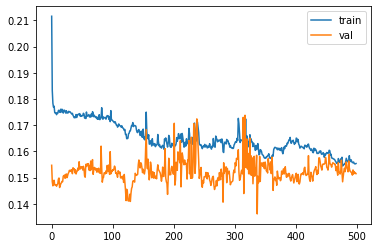

Epoch 1/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5376 - mae: 0.2034
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5007 - mae: 0.1995 - val_loss: 0.9209 - val_mae: 0.2557
Epoch 2/500
50/79 [=================>............] - ETA: 0s - loss: 0.4773 - mae: 0.1796
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.4066 - mae: 0.1577 - val_loss: 0.9431 - val_mae: 0.2521
Epoch 3/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4527 - mae: 0.1713
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3905 - mae: 0.1501 - val_loss: 0.9530 - val_mae: 0.2532
Epoch 4/500
50/79 [=================>............] - ETA: 0s - loss: 0.4537 - mae: 0.1740
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3871 - mae: 0.1510 -

Epoch 33/500
54/79 [===================>..........] - ETA: 0s - loss: 0.4505 - mae: 0.1747
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3877 - mae: 0.1513 - val_loss: 1.1104 - val_mae: 0.2508
Epoch 34/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4351 - mae: 0.1721
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3862 - mae: 0.1522 - val_loss: 1.1151 - val_mae: 0.2512
Epoch 35/500
51/79 [==================>...........] - ETA: 0s - loss: 0.4346 - mae: 0.1726
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3869 - mae: 0.1528 - val_loss: 1.1251 - val_mae: 0.2510
Epoch 36/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4426 - mae: 0.1761
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3880 - mae: 0.15

Epoch 65/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4369 - mae: 0.1731
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3791 - mae: 0.1518 - val_loss: 1.1956 - val_mae: 0.2498
Epoch 66/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4405 - mae: 0.1744
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3790 - mae: 0.1517 - val_loss: 1.1967 - val_mae: 0.2498
Epoch 67/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4368 - mae: 0.1731
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3790 - mae: 0.1517 - val_loss: 1.1978 - val_mae: 0.2498
Epoch 68/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4404 - mae: 0.1743
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3789 - mae: 0.15

Epoch 97/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4295 - mae: 0.1605
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3719 - mae: 0.1450 - val_loss: 1.1499 - val_mae: 0.2452
Epoch 98/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4273 - mae: 0.1604
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3697 - mae: 0.1448 - val_loss: 1.1563 - val_mae: 0.2454
Epoch 99/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4252 - mae: 0.1603
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3676 - mae: 0.1445 - val_loss: 1.1580 - val_mae: 0.2451
Epoch 100/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4231 - mae: 0.1599
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3644 - mae: 0.1

Epoch 129/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4059 - mae: 0.1598
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3577 - mae: 0.1449 - val_loss: 1.2215 - val_mae: 0.2483
Epoch 130/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4047 - mae: 0.1616
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3544 - mae: 0.1441 - val_loss: 1.2562 - val_mae: 0.2464
Epoch 131/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4010 - mae: 0.1582
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3496 - mae: 0.1410 - val_loss: 1.2544 - val_mae: 0.2463
Epoch 132/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4042 - mae: 0.1591
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3499 - mae: 

Epoch 161/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3821 - mae: 0.1573
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3363 - mae: 0.1386 - val_loss: 1.3071 - val_mae: 0.2470
Epoch 162/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3838 - mae: 0.1578
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3351 - mae: 0.1380 - val_loss: 1.3150 - val_mae: 0.2459
Epoch 163/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3874 - mae: 0.1573
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3347 - mae: 0.1371 - val_loss: 1.2958 - val_mae: 0.2462
Epoch 164/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3904 - mae: 0.1590
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3366 - mae: 

Epoch 193/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3841 - mae: 0.1582
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3285 - mae: 0.1354 - val_loss: 1.3426 - val_mae: 0.2447
Epoch 194/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3846 - mae: 0.1586
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3292 - mae: 0.1358 - val_loss: 1.3365 - val_mae: 0.2454
Epoch 195/500
53/79 [===================>..........] - ETA: 0s - loss: 0.4051 - mae: 0.1642
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3425 - mae: 0.1408 - val_loss: 1.3242 - val_mae: 0.2475
Epoch 196/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3937 - mae: 0.1642
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3319 - mae: 

Epoch 225/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3775 - mae: 0.1541
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3211 - mae: 0.1313 - val_loss: 1.3919 - val_mae: 0.2440
Epoch 226/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3774 - mae: 0.1554
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3162 - mae: 0.1311 - val_loss: 1.3937 - val_mae: 0.2440
Epoch 227/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3771 - mae: 0.1554
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3146 - mae: 0.1304 - val_loss: 1.3990 - val_mae: 0.2437
Epoch 228/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3766 - mae: 0.1554
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3143 - mae: 

Epoch 257/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3780 - mae: 0.1510
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3307 - mae: 0.1283 - val_loss: 1.3788 - val_mae: 0.2466
Epoch 258/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3718 - mae: 0.1509
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3304 - mae: 0.1293 - val_loss: 1.3723 - val_mae: 0.2460
Epoch 259/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3792 - mae: 0.1512
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3315 - mae: 0.1287 - val_loss: 1.3618 - val_mae: 0.2463
Epoch 260/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3724 - mae: 0.1513
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3324 - mae: 

Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3445 - mae: 0.1221 - val_loss: 1.2906 - val_mae: 0.2469
Epoch 289/500
38/79 [=============>................] - ETA: 0s - loss: 0.4058 - mae: 0.1396
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3412 - mae: 0.1218 - val_loss: 1.2768 - val_mae: 0.2487
Epoch 290/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3975 - mae: 0.1461
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3388 - mae: 0.1234 - val_loss: 1.2750 - val_mae: 0.2503
Epoch 291/500
49/79 [=================>............] - ETA: 0s - loss: 0.4475 - mae: 0.1496
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3700 - mae: 0.1259 - val_loss: 1.2660 - val_mae: 0.2468
Epoch 292/500
50/79 [=================>.........

Epoch 320/500
52/79 [==================>...........] - ETA: 0s - loss: 0.4045 - mae: 0.1627
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3440 - mae: 0.1364 - val_loss: 1.2407 - val_mae: 0.2480
Epoch 321/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3981 - mae: 0.1573
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3424 - mae: 0.1336 - val_loss: 1.2479 - val_mae: 0.2481
Epoch 322/500
50/79 [=================>............] - ETA: 0s - loss: 0.3966 - mae: 0.1576
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3386 - mae: 0.1322 - val_loss: 1.2508 - val_mae: 0.2465
Epoch 323/500
48/79 [=================>............] - ETA: 0s - loss: 0.3930 - mae: 0.1531
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3369 - mae: 

Epoch 352/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3552 - mae: 0.1404
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3070 - mae: 0.1203 - val_loss: 1.2832 - val_mae: 0.2474
Epoch 353/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3583 - mae: 0.1423
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3078 - mae: 0.1211 - val_loss: 1.2861 - val_mae: 0.2481
Epoch 354/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3560 - mae: 0.1402
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3055 - mae: 0.1192 - val_loss: 1.2800 - val_mae: 0.2483
Epoch 355/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3535 - mae: 0.1416
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3015 - mae: 

Epoch 384/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3565 - mae: 0.1424
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3125 - mae: 0.1197 - val_loss: 1.2963 - val_mae: 0.2502
Epoch 385/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3539 - mae: 0.1410
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3038 - mae: 0.1190 - val_loss: 1.2897 - val_mae: 0.2496
Epoch 386/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3563 - mae: 0.1420
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3041 - mae: 0.1198 - val_loss: 1.2781 - val_mae: 0.2484
Epoch 387/500
51/79 [==================>...........] - ETA: 0s - loss: 0.3522 - mae: 0.1419
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3054 - mae: 

Epoch 416/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3552 - mae: 0.1415
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3001 - mae: 0.1188 - val_loss: 1.2898 - val_mae: 0.2507
Epoch 417/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3503 - mae: 0.1399
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3006 - mae: 0.1182 - val_loss: 1.2969 - val_mae: 0.2500
Epoch 418/500
54/79 [===================>..........] - ETA: 0s - loss: 0.3487 - mae: 0.1397
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2991 - mae: 0.1179 - val_loss: 1.3008 - val_mae: 0.2494
Epoch 419/500
55/79 [===================>..........] - ETA: 0s - loss: 0.3462 - mae: 0.1386
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2998 - mae: 

Epoch 448/500
52/79 [==================>...........] - ETA: 0s - loss: 0.3610 - mae: 0.1473
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3124 - mae: 0.1224 - val_loss: 1.2356 - val_mae: 0.2477
Epoch 449/500
54/79 [===================>..........] - ETA: 0s - loss: 0.3611 - mae: 0.1458
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3136 - mae: 0.1213 - val_loss: 1.2575 - val_mae: 0.2470
Epoch 450/500
54/79 [===================>..........] - ETA: 0s - loss: 0.3574 - mae: 0.1439
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3113 - mae: 0.1203 - val_loss: 1.2547 - val_mae: 0.2454
Epoch 451/500
50/79 [=================>............] - ETA: 0s - loss: 0.3495 - mae: 0.1417
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.3039 - mae: 

Epoch 480/500
53/79 [===================>..........] - ETA: 0s - loss: 0.3521 - mae: 0.1433
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2990 - mae: 0.1204 - val_loss: 1.3027 - val_mae: 0.2482
Epoch 481/500
54/79 [===================>..........] - ETA: 0s - loss: 0.3407 - mae: 0.1386
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2903 - mae: 0.1172 - val_loss: 1.2911 - val_mae: 0.2481
Epoch 482/500
54/79 [===================>..........] - ETA: 0s - loss: 0.3397 - mae: 0.1387
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2894 - mae: 0.1165 - val_loss: 1.3258 - val_mae: 0.2460
Epoch 483/500
54/79 [===================>..........] - ETA: 0s - loss: 0.3384 - mae: 0.1343
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.2912 - mae: 

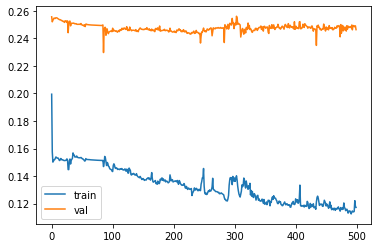

Epoch 1/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.5547 - mae: 0.1257
Epoch 00001: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.7029 - mae: 0.1639 - val_loss: 0.8067 - val_mae: 0.2194
Epoch 2/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.4753 - mae: 0.1408
Epoch 00002: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.6126 - mae: 0.1727 - val_loss: 0.7588 - val_mae: 0.2325
Epoch 3/500
 52/101 [==============>...............] - ETA: 0s - loss: 0.4482 - mae: 0.1627
Epoch 00003: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5703 - mae: 0.1880 - val_loss: 0.7677 - val_mae: 0.2411
Epoch 4/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.4313 - mae: 0.1658
Epoch 00004: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5621

 54/101 [===============>..............] - ETA: 0s - loss: 0.4176 - mae: 0.1596
Epoch 00032: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5500 - mae: 0.1924 - val_loss: 0.7795 - val_mae: 0.2430
Epoch 33/500
 55/101 [===============>..............] - ETA: 0s - loss: 0.4153 - mae: 0.1581
Epoch 00033: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5829 - mae: 0.1893 - val_loss: 0.8808 - val_mae: 0.2372
Epoch 34/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.4103 - mae: 0.1561
Epoch 00034: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5728 - mae: 0.1884 - val_loss: 0.8458 - val_mae: 0.2384
Epoch 35/500
 52/101 [==============>...............] - ETA: 0s - loss: 0.4163 - mae: 0.1585
Epoch 00035: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5689 - mae: 0

 55/101 [===============>..............] - ETA: 0s - loss: 0.3836 - mae: 0.1638
Epoch 00063: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5271 - mae: 0.1917 - val_loss: 0.8080 - val_mae: 0.2397
Epoch 64/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3861 - mae: 0.1652
Epoch 00064: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5233 - mae: 0.1902 - val_loss: 0.7910 - val_mae: 0.2384
Epoch 65/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3840 - mae: 0.1644
Epoch 00065: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5235 - mae: 0.1904 - val_loss: 0.8063 - val_mae: 0.2399
Epoch 66/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3828 - mae: 0.1642
Epoch 00066: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5220 - mae: 0

 54/101 [===============>..............] - ETA: 0s - loss: 0.3737 - mae: 0.1551
Epoch 00094: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5030 - mae: 0.1846 - val_loss: 0.7856 - val_mae: 0.2390
Epoch 95/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3748 - mae: 0.1552
Epoch 00095: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5037 - mae: 0.1851 - val_loss: 0.7841 - val_mae: 0.2401
Epoch 96/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3715 - mae: 0.1542
Epoch 00096: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5004 - mae: 0.1837 - val_loss: 0.7813 - val_mae: 0.2389
Epoch 97/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3745 - mae: 0.1567
Epoch 00097: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.5140 - mae: 0

Epoch 125/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3606 - mae: 0.1462
Epoch 00125: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4717 - mae: 0.1736 - val_loss: 0.7428 - val_mae: 0.2327
Epoch 126/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3609 - mae: 0.1451
Epoch 00126: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4700 - mae: 0.1730 - val_loss: 0.7545 - val_mae: 0.2332
Epoch 127/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3553 - mae: 0.1440
Epoch 00127: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4653 - mae: 0.1725 - val_loss: 0.7596 - val_mae: 0.2308
Epoch 128/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3633 - mae: 0.1451
Epoch 00128: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 156/500
 99/101 [============================>.] - ETA: 0s - loss: 0.4489 - mae: 0.1672
Epoch 00156: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 3ms/step - loss: 0.4492 - mae: 0.1680 - val_loss: 0.7863 - val_mae: 0.2300
Epoch 157/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3369 - mae: 0.1364
Epoch 00157: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4489 - mae: 0.1669 - val_loss: 0.7852 - val_mae: 0.2323
Epoch 158/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3366 - mae: 0.1370
Epoch 00158: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4481 - mae: 0.1672 - val_loss: 0.7733 - val_mae: 0.2311
Epoch 159/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3406 - mae: 0.1390
Epoch 00159: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 187/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3220 - mae: 0.1330
Epoch 00187: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4319 - mae: 0.1608 - val_loss: 0.7555 - val_mae: 0.2357
Epoch 188/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3250 - mae: 0.1365
Epoch 00188: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4325 - mae: 0.1639 - val_loss: 0.8074 - val_mae: 0.2326
Epoch 189/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3197 - mae: 0.1345
Epoch 00189: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4302 - mae: 0.1621 - val_loss: 0.7809 - val_mae: 0.2315
Epoch 190/500
 55/101 [===============>..............] - ETA: 0s - loss: 0.3133 - mae: 0.1322
Epoch 00190: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 218/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3239 - mae: 0.1363
Epoch 00218: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4259 - mae: 0.1613 - val_loss: 0.7723 - val_mae: 0.2281
Epoch 219/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3177 - mae: 0.1316
Epoch 00219: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4245 - mae: 0.1597 - val_loss: 0.8003 - val_mae: 0.2297
Epoch 220/500
 82/101 [=======================>......] - ETA: 0s - loss: 0.3874 - mae: 0.1434
Epoch 00220: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4319 - mae: 0.1611 - val_loss: 0.7608 - val_mae: 0.2325
Epoch 221/500
 55/101 [===============>..............] - ETA: 0s - loss: 0.3193 - mae: 0.1321
Epoch 00221: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 249/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3114 - mae: 0.1302
Epoch 00249: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4157 - mae: 0.1588 - val_loss: 0.8026 - val_mae: 0.2283
Epoch 250/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3501 - mae: 0.1446
Epoch 00250: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4426 - mae: 0.1659 - val_loss: 0.7868 - val_mae: 0.2297
Epoch 251/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3115 - mae: 0.1286
Epoch 00251: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4188 - mae: 0.1574 - val_loss: 0.7638 - val_mae: 0.2325
Epoch 252/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3120 - mae: 0.1323
Epoch 00252: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 280/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3015 - mae: 0.1278
Epoch 00280: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4051 - mae: 0.1552 - val_loss: 0.8320 - val_mae: 0.2285
Epoch 281/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2989 - mae: 0.1266
Epoch 00281: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4075 - mae: 0.1555 - val_loss: 0.8779 - val_mae: 0.2333
Epoch 282/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3145 - mae: 0.1324
Epoch 00282: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4193 - mae: 0.1590 - val_loss: 0.8354 - val_mae: 0.2337
Epoch 283/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3094 - mae: 0.1312
Epoch 00283: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 311/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.2929 - mae: 0.1259
Epoch 00311: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4018 - mae: 0.1544 - val_loss: 0.8486 - val_mae: 0.2360
Epoch 312/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2955 - mae: 0.1262
Epoch 00312: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4041 - mae: 0.1553 - val_loss: 0.8586 - val_mae: 0.2337
Epoch 313/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2875 - mae: 0.1239
Epoch 00313: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4011 - mae: 0.1530 - val_loss: 0.8035 - val_mae: 0.2384
Epoch 314/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2998 - mae: 0.1300
Epoch 00314: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 342/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3006 - mae: 0.1313
Epoch 00342: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4182 - mae: 0.1606 - val_loss: 0.8603 - val_mae: 0.2404
Epoch 343/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2966 - mae: 0.1306
Epoch 00343: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4087 - mae: 0.1587 - val_loss: 0.8883 - val_mae: 0.2296
Epoch 344/500
 52/101 [==============>...............] - ETA: 0s - loss: 0.3066 - mae: 0.1293
Epoch 00344: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4076 - mae: 0.1549 - val_loss: 0.8572 - val_mae: 0.2334
Epoch 345/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2990 - mae: 0.1276
Epoch 00345: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 373/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.2993 - mae: 0.1326
Epoch 00373: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4029 - mae: 0.1589 - val_loss: 0.9224 - val_mae: 0.2321
Epoch 374/500
 81/101 [=======================>......] - ETA: 0s - loss: 0.3483 - mae: 0.1349
Epoch 00374: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4068 - mae: 0.1574 - val_loss: 0.8832 - val_mae: 0.2359
Epoch 375/500
 85/101 [========================>.....] - ETA: 0s - loss: 0.3742 - mae: 0.1422
Epoch 00375: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4130 - mae: 0.1587 - val_loss: 0.9001 - val_mae: 0.2360
Epoch 376/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3171 - mae: 0.1331
Epoch 00376: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 404/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3063 - mae: 0.1252
Epoch 00404: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4088 - mae: 0.1550 - val_loss: 0.9767 - val_mae: 0.2429
Epoch 405/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3027 - mae: 0.1302
Epoch 00405: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4034 - mae: 0.1565 - val_loss: 0.8978 - val_mae: 0.2345
Epoch 406/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3096 - mae: 0.1295
Epoch 00406: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4009 - mae: 0.1560 - val_loss: 0.9237 - val_mae: 0.2340
Epoch 407/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3068 - mae: 0.1256
Epoch 00407: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 435/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3068 - mae: 0.1323
Epoch 00435: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.3955 - mae: 0.1566 - val_loss: 0.8970 - val_mae: 0.2362
Epoch 436/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3050 - mae: 0.1274
Epoch 00436: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.3992 - mae: 0.1560 - val_loss: 0.9166 - val_mae: 0.2353
Epoch 437/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3081 - mae: 0.1264
Epoch 00437: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.3992 - mae: 0.1546 - val_loss: 0.9319 - val_mae: 0.2362
Epoch 438/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3017 - mae: 0.1249
Epoch 00438: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 466/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3399 - mae: 0.1424
Epoch 00466: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4238 - mae: 0.1681 - val_loss: 0.9210 - val_mae: 0.2475
Epoch 467/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3306 - mae: 0.1391
Epoch 00467: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4220 - mae: 0.1666 - val_loss: 0.9642 - val_mae: 0.2485
Epoch 468/500
 53/101 [==============>...............] - ETA: 0s - loss: 0.3492 - mae: 0.1451
Epoch 00468: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4301 - mae: 0.1684 - val_loss: 0.8867 - val_mae: 0.2435
Epoch 469/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3438 - mae: 0.1433
Epoch 00469: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

Epoch 497/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3199 - mae: 0.1355
Epoch 00497: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4059 - mae: 0.1614 - val_loss: 0.9723 - val_mae: 0.2445
Epoch 498/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3165 - mae: 0.1349
Epoch 00498: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4067 - mae: 0.1619 - val_loss: 0.9870 - val_mae: 0.2449
Epoch 499/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3235 - mae: 0.1373
Epoch 00499: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss: 0.4080 - mae: 0.1627 - val_loss: 0.9804 - val_mae: 0.2448
Epoch 500/500
 54/101 [===============>..............] - ETA: 0s - loss: 0.3283 - mae: 0.1398
Epoch 00500: val_mae did not improve from 0.10687
101/101 [==============================] - 0s 2ms/step - loss

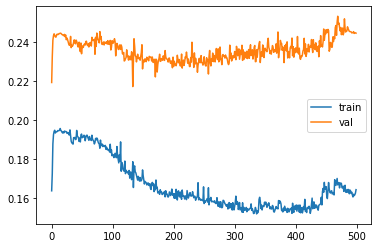

Epoch 1/500
56/93 [=================>............] - ETA: 0s - loss: 0.8478 - mae: 0.2190
Epoch 00001: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.6697 - mae: 0.1998 - val_loss: 1.0361 - val_mae: 0.2465
Epoch 2/500
54/93 [================>.............] - ETA: 0s - loss: 0.8373 - mae: 0.2027
Epoch 00002: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.6178 - mae: 0.1734 - val_loss: 1.2466 - val_mae: 0.2543
Epoch 3/500
54/93 [================>.............] - ETA: 0s - loss: 0.7552 - mae: 0.2008
Epoch 00003: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.5678 - mae: 0.1650 - val_loss: 1.2577 - val_mae: 0.2495
Epoch 4/500
53/93 [================>.............] - ETA: 0s - loss: 0.7400 - mae: 0.1998
Epoch 00004: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 3ms/step - loss: 0.5488 - mae: 0.1615 -

Epoch 33/500
52/93 [===============>..............] - ETA: 0s - loss: 0.6371 - mae: 0.2251
Epoch 00033: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4535 - mae: 0.1645 - val_loss: 1.3760 - val_mae: 0.2428
Epoch 34/500
53/93 [================>.............] - ETA: 0s - loss: 0.6243 - mae: 0.2205
Epoch 00034: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4520 - mae: 0.1636 - val_loss: 1.3901 - val_mae: 0.2413
Epoch 35/500
54/93 [================>.............] - ETA: 0s - loss: 0.6599 - mae: 0.2041
Epoch 00035: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4786 - mae: 0.1561 - val_loss: 1.4065 - val_mae: 0.2426
Epoch 36/500
53/93 [================>.............] - ETA: 0s - loss: 0.6515 - mae: 0.2170
Epoch 00036: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4673 - mae: 0.16

Epoch 65/500
53/93 [================>.............] - ETA: 0s - loss: 0.6461 - mae: 0.2293
Epoch 00065: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4522 - mae: 0.1626 - val_loss: 1.4468 - val_mae: 0.2422
Epoch 66/500
53/93 [================>.............] - ETA: 0s - loss: 0.6455 - mae: 0.2283
Epoch 00066: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4515 - mae: 0.1609 - val_loss: 1.4498 - val_mae: 0.2417
Epoch 67/500
54/93 [================>.............] - ETA: 0s - loss: 0.6378 - mae: 0.2264
Epoch 00067: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4526 - mae: 0.1608 - val_loss: 1.4463 - val_mae: 0.2419
Epoch 68/500
53/93 [================>.............] - ETA: 0s - loss: 0.6472 - mae: 0.2299
Epoch 00068: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4521 - mae: 0.16

Epoch 97/500
54/93 [================>.............] - ETA: 0s - loss: 0.6344 - mae: 0.2256
Epoch 00097: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4522 - mae: 0.1618 - val_loss: 1.4666 - val_mae: 0.2444
Epoch 98/500
54/93 [================>.............] - ETA: 0s - loss: 0.6344 - mae: 0.2255
Epoch 00098: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4517 - mae: 0.1616 - val_loss: 1.4706 - val_mae: 0.2444
Epoch 99/500
47/93 [==============>...............] - ETA: 0s - loss: 0.7064 - mae: 0.2457
Epoch 00099: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4506 - mae: 0.1613 - val_loss: 1.4778 - val_mae: 0.2441
Epoch 100/500
91/93 [============================>.] - ETA: 0s - loss: 0.4466 - mae: 0.1585
Epoch 00100: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4502 - mae: 0.1

Epoch 129/500
54/93 [================>.............] - ETA: 0s - loss: 0.6298 - mae: 0.2253
Epoch 00129: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4358 - mae: 0.1561 - val_loss: 1.5034 - val_mae: 0.2406
Epoch 130/500
53/93 [================>.............] - ETA: 0s - loss: 0.6378 - mae: 0.2278
Epoch 00130: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4338 - mae: 0.1557 - val_loss: 1.5026 - val_mae: 0.2406
Epoch 131/500
53/93 [================>.............] - ETA: 0s - loss: 0.6375 - mae: 0.2281
Epoch 00131: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4344 - mae: 0.1551 - val_loss: 1.5005 - val_mae: 0.2411
Epoch 132/500
53/93 [================>.............] - ETA: 0s - loss: 0.6376 - mae: 0.2296
Epoch 00132: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4361 - mae: 

Epoch 161/500
54/93 [================>.............] - ETA: 0s - loss: 0.6244 - mae: 0.2238
Epoch 00161: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4263 - mae: 0.1506 - val_loss: 1.4609 - val_mae: 0.2419
Epoch 162/500
54/93 [================>.............] - ETA: 0s - loss: 0.6253 - mae: 0.2247
Epoch 00162: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4286 - mae: 0.1512 - val_loss: 1.4737 - val_mae: 0.2400
Epoch 163/500
52/93 [===============>..............] - ETA: 0s - loss: 0.6482 - mae: 0.2331
Epoch 00163: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4346 - mae: 0.1566 - val_loss: 1.4674 - val_mae: 0.2403
Epoch 164/500
54/93 [================>.............] - ETA: 0s - loss: 0.6516 - mae: 0.2251
Epoch 00164: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4475 - mae: 

Epoch 193/500
53/93 [================>.............] - ETA: 0s - loss: 0.6471 - mae: 0.2207
Epoch 00193: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4342 - mae: 0.1504 - val_loss: 1.3584 - val_mae: 0.2458
Epoch 194/500
54/93 [================>.............] - ETA: 0s - loss: 0.6329 - mae: 0.2185
Epoch 00194: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4303 - mae: 0.1506 - val_loss: 1.3566 - val_mae: 0.2458
Epoch 195/500
54/93 [================>.............] - ETA: 0s - loss: 0.6385 - mae: 0.2190
Epoch 00195: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4331 - mae: 0.1504 - val_loss: 1.3545 - val_mae: 0.2461
Epoch 196/500
53/93 [================>.............] - ETA: 0s - loss: 0.6438 - mae: 0.2210
Epoch 00196: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4312 - mae: 

Epoch 225/500
55/93 [================>.............] - ETA: 0s - loss: 0.6206 - mae: 0.2176
Epoch 00225: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4298 - mae: 0.1517 - val_loss: 1.3708 - val_mae: 0.2442
Epoch 226/500
54/93 [================>.............] - ETA: 0s - loss: 0.6261 - mae: 0.2173
Epoch 00226: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4253 - mae: 0.1496 - val_loss: 1.3737 - val_mae: 0.2442
Epoch 227/500
53/93 [================>.............] - ETA: 0s - loss: 0.6296 - mae: 0.2198
Epoch 00227: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4241 - mae: 0.1504 - val_loss: 1.3794 - val_mae: 0.2438
Epoch 228/500
54/93 [================>.............] - ETA: 0s - loss: 0.6190 - mae: 0.2154
Epoch 00228: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4202 - mae: 

Epoch 257/500
54/93 [================>.............] - ETA: 0s - loss: 0.6118 - mae: 0.2263
Epoch 00257: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4216 - mae: 0.1541 - val_loss: 1.4326 - val_mae: 0.2446
Epoch 258/500
54/93 [================>.............] - ETA: 0s - loss: 0.6111 - mae: 0.2260
Epoch 00258: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4216 - mae: 0.1536 - val_loss: 1.4412 - val_mae: 0.2458
Epoch 259/500
53/93 [================>.............] - ETA: 0s - loss: 0.6193 - mae: 0.2282
Epoch 00259: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4196 - mae: 0.1532 - val_loss: 1.4415 - val_mae: 0.2445
Epoch 260/500
54/93 [================>.............] - ETA: 0s - loss: 0.6114 - mae: 0.2250
Epoch 00260: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4219 - mae: 

Epoch 289/500
52/93 [===============>..............] - ETA: 0s - loss: 0.6114 - mae: 0.2267
Epoch 00289: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4040 - mae: 0.1474 - val_loss: 1.5386 - val_mae: 0.2443
Epoch 290/500
54/93 [================>.............] - ETA: 0s - loss: 0.5957 - mae: 0.2227
Epoch 00290: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4068 - mae: 0.1491 - val_loss: 1.5223 - val_mae: 0.2438
Epoch 291/500
53/93 [================>.............] - ETA: 0s - loss: 0.5997 - mae: 0.2244
Epoch 00291: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4044 - mae: 0.1488 - val_loss: 1.5277 - val_mae: 0.2433
Epoch 292/500
53/93 [================>.............] - ETA: 0s - loss: 0.5991 - mae: 0.2223
Epoch 00292: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4041 - mae: 

Epoch 321/500
53/93 [================>.............] - ETA: 0s - loss: 0.6025 - mae: 0.2276
Epoch 00321: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4079 - mae: 0.1513 - val_loss: 1.5357 - val_mae: 0.2427
Epoch 322/500
53/93 [================>.............] - ETA: 0s - loss: 0.6035 - mae: 0.2241
Epoch 00322: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4051 - mae: 0.1479 - val_loss: 1.5346 - val_mae: 0.2421
Epoch 323/500
53/93 [================>.............] - ETA: 0s - loss: 0.6019 - mae: 0.2228
Epoch 00323: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4028 - mae: 0.1467 - val_loss: 1.5261 - val_mae: 0.2405
Epoch 324/500
53/93 [================>.............] - ETA: 0s - loss: 0.5995 - mae: 0.2209
Epoch 00324: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4023 - mae: 

Epoch 353/500
55/93 [================>.............] - ETA: 0s - loss: 0.5988 - mae: 0.2151
Epoch 00353: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4192 - mae: 0.1469 - val_loss: 1.4464 - val_mae: 0.2401
Epoch 354/500
53/93 [================>.............] - ETA: 0s - loss: 0.6156 - mae: 0.2223
Epoch 00354: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4170 - mae: 0.1492 - val_loss: 1.4412 - val_mae: 0.2416
Epoch 355/500
53/93 [================>.............] - ETA: 0s - loss: 0.6095 - mae: 0.2233
Epoch 00355: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4074 - mae: 0.1483 - val_loss: 1.4517 - val_mae: 0.2411
Epoch 356/500
54/93 [================>.............] - ETA: 0s - loss: 0.5996 - mae: 0.2200
Epoch 00356: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4060 - mae: 

Epoch 385/500
53/93 [================>.............] - ETA: 0s - loss: 0.6150 - mae: 0.2207
Epoch 00385: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4113 - mae: 0.1464 - val_loss: 1.4369 - val_mae: 0.2378
Epoch 386/500
54/93 [================>.............] - ETA: 0s - loss: 0.6234 - mae: 0.2171
Epoch 00386: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4220 - mae: 0.1460 - val_loss: 1.4335 - val_mae: 0.2357
Epoch 387/500
53/93 [================>.............] - ETA: 0s - loss: 0.6135 - mae: 0.2230
Epoch 00387: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4352 - mae: 0.1523 - val_loss: 1.4583 - val_mae: 0.2380
Epoch 388/500
54/93 [================>.............] - ETA: 0s - loss: 0.5826 - mae: 0.2143
Epoch 00388: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3994 - mae: 

Epoch 417/500
54/93 [================>.............] - ETA: 0s - loss: 0.5717 - mae: 0.2050
Epoch 00417: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 3ms/step - loss: 0.4044 - mae: 0.1471 - val_loss: 1.4261 - val_mae: 0.2501
Epoch 418/500
47/93 [==============>...............] - ETA: 0s - loss: 0.6467 - mae: 0.2267
Epoch 00418: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4173 - mae: 0.1517 - val_loss: 1.4167 - val_mae: 0.2503
Epoch 419/500
54/93 [================>.............] - ETA: 0s - loss: 0.5781 - mae: 0.2041
Epoch 00419: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4046 - mae: 0.1444 - val_loss: 1.4258 - val_mae: 0.2462
Epoch 420/500
48/93 [==============>...............] - ETA: 0s - loss: 0.6301 - mae: 0.2217
Epoch 00420: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4007 - mae: 

Epoch 449/500
53/93 [================>.............] - ETA: 0s - loss: 0.6034 - mae: 0.2138
Epoch 00449: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.4086 - mae: 0.1469 - val_loss: 1.3831 - val_mae: 0.2451
Epoch 450/500
54/93 [================>.............] - ETA: 0s - loss: 0.5784 - mae: 0.2113
Epoch 00450: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3950 - mae: 0.1455 - val_loss: 1.3919 - val_mae: 0.2446
Epoch 451/500
53/93 [================>.............] - ETA: 0s - loss: 0.5834 - mae: 0.2130
Epoch 00451: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3924 - mae: 0.1449 - val_loss: 1.3952 - val_mae: 0.2439
Epoch 452/500
53/93 [================>.............] - ETA: 0s - loss: 0.5778 - mae: 0.2149
Epoch 00452: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3922 - mae: 

Epoch 481/500
53/93 [================>.............] - ETA: 0s - loss: 0.5844 - mae: 0.2146
Epoch 00481: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3900 - mae: 0.1431 - val_loss: 1.3987 - val_mae: 0.2419
Epoch 482/500
54/93 [================>.............] - ETA: 0s - loss: 0.5774 - mae: 0.2126
Epoch 00482: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3906 - mae: 0.1433 - val_loss: 1.4019 - val_mae: 0.2421
Epoch 483/500
54/93 [================>.............] - ETA: 0s - loss: 0.5763 - mae: 0.2125
Epoch 00483: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3899 - mae: 0.1433 - val_loss: 1.4017 - val_mae: 0.2410
Epoch 484/500
45/93 [=============>................] - ETA: 0s - loss: 0.6673 - mae: 0.2414
Epoch 00484: val_mae did not improve from 0.10687
93/93 [==============================] - 0s 2ms/step - loss: 0.3889 - mae: 

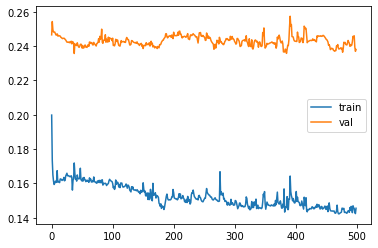

Epoch 1/500
106/107 [============================>.] - ETA: 0s - loss: 0.9503 - mae: 0.2767
Epoch 00001: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.9489 - mae: 0.2768 - val_loss: 0.4547 - val_mae: 0.2144
Epoch 2/500
107/107 [==============================] - ETA: 0s - loss: 0.8307 - mae: 0.2926
Epoch 00002: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.8307 - mae: 0.2926 - val_loss: 0.4969 - val_mae: 0.2363
Epoch 3/500
106/107 [============================>.] - ETA: 0s - loss: 0.7782 - mae: 0.2945
Epoch 00003: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.7782 - mae: 0.2947 - val_loss: 0.4910 - val_mae: 0.2324
Epoch 4/500
107/107 [==============================] - ETA: 0s - loss: 0.7591 - mae: 0.2952
Epoch 00004: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.7591

105/107 [============================>.] - ETA: 0s - loss: 0.7121 - mae: 0.2931
Epoch 00032: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.7200 - mae: 0.2947 - val_loss: 0.4637 - val_mae: 0.2336
Epoch 33/500
106/107 [============================>.] - ETA: 0s - loss: 0.7164 - mae: 0.2947
Epoch 00033: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.7176 - mae: 0.2949 - val_loss: 0.4511 - val_mae: 0.2242
Epoch 34/500
106/107 [============================>.] - ETA: 0s - loss: 0.7151 - mae: 0.2942
Epoch 00034: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.7156 - mae: 0.2945 - val_loss: 0.4515 - val_mae: 0.2258
Epoch 35/500
106/107 [============================>.] - ETA: 0s - loss: 0.7182 - mae: 0.2939
Epoch 00035: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.7187 - mae: 0

105/107 [============================>.] - ETA: 0s - loss: 0.6807 - mae: 0.2800
Epoch 00063: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6917 - mae: 0.2820 - val_loss: 0.4389 - val_mae: 0.2146
Epoch 64/500
101/107 [===========================>..] - ETA: 0s - loss: 0.6876 - mae: 0.2822
Epoch 00064: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6888 - mae: 0.2826 - val_loss: 0.4490 - val_mae: 0.2226
Epoch 65/500
105/107 [============================>.] - ETA: 0s - loss: 0.6757 - mae: 0.2821
Epoch 00065: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6828 - mae: 0.2838 - val_loss: 0.4353 - val_mae: 0.2125
Epoch 66/500
105/107 [============================>.] - ETA: 0s - loss: 0.6799 - mae: 0.2822
Epoch 00066: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6869 - mae: 0

106/107 [============================>.] - ETA: 0s - loss: 0.6892 - mae: 0.2857
Epoch 00094: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6904 - mae: 0.2860 - val_loss: 0.4457 - val_mae: 0.2165
Epoch 95/500
105/107 [============================>.] - ETA: 0s - loss: 0.6811 - mae: 0.2841
Epoch 00095: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6909 - mae: 0.2859 - val_loss: 0.4506 - val_mae: 0.2196
Epoch 96/500
107/107 [==============================] - ETA: 0s - loss: 0.6891 - mae: 0.2851
Epoch 00096: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6891 - mae: 0.2851 - val_loss: 0.4483 - val_mae: 0.2181
Epoch 97/500
106/107 [============================>.] - ETA: 0s - loss: 0.6947 - mae: 0.2861
Epoch 00097: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6961 - mae: 0

Epoch 125/500
106/107 [============================>.] - ETA: 0s - loss: 0.6927 - mae: 0.2893
Epoch 00125: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6938 - mae: 0.2896 - val_loss: 0.4492 - val_mae: 0.2214
Epoch 126/500
107/107 [==============================] - ETA: 0s - loss: 0.6928 - mae: 0.2886
Epoch 00126: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6928 - mae: 0.2886 - val_loss: 0.4469 - val_mae: 0.2190
Epoch 127/500
104/107 [============================>.] - ETA: 0s - loss: 0.6765 - mae: 0.2841
Epoch 00127: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6870 - mae: 0.2868 - val_loss: 0.4430 - val_mae: 0.2178
Epoch 128/500
107/107 [==============================] - ETA: 0s - loss: 0.6889 - mae: 0.2872
Epoch 00128: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 156/500
104/107 [============================>.] - ETA: 0s - loss: 0.6579 - mae: 0.2796
Epoch 00156: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6674 - mae: 0.2822 - val_loss: 0.4429 - val_mae: 0.2158
Epoch 157/500
105/107 [============================>.] - ETA: 0s - loss: 0.6632 - mae: 0.2812
Epoch 00157: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6680 - mae: 0.2823 - val_loss: 0.4407 - val_mae: 0.2152
Epoch 158/500
105/107 [============================>.] - ETA: 0s - loss: 0.6661 - mae: 0.2814
Epoch 00158: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6703 - mae: 0.2825 - val_loss: 0.4422 - val_mae: 0.2175
Epoch 159/500
107/107 [==============================] - ETA: 0s - loss: 0.6677 - mae: 0.2823
Epoch 00159: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 187/500
107/107 [==============================] - ETA: 0s - loss: 0.6523 - mae: 0.2774
Epoch 00187: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6523 - mae: 0.2774 - val_loss: 0.4468 - val_mae: 0.2179
Epoch 188/500
106/107 [============================>.] - ETA: 0s - loss: 0.6483 - mae: 0.2764
Epoch 00188: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6495 - mae: 0.2767 - val_loss: 0.4471 - val_mae: 0.2184
Epoch 189/500
 98/107 [==========================>...] - ETA: 0s - loss: 0.6605 - mae: 0.2793
Epoch 00189: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6506 - mae: 0.2767 - val_loss: 0.4342 - val_mae: 0.2116
Epoch 190/500
105/107 [============================>.] - ETA: 0s - loss: 0.6608 - mae: 0.2796
Epoch 00190: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 218/500
107/107 [==============================] - ETA: 0s - loss: 0.6462 - mae: 0.2741
Epoch 00218: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6462 - mae: 0.2741 - val_loss: 0.4481 - val_mae: 0.2136
Epoch 219/500
105/107 [============================>.] - ETA: 0s - loss: 0.6382 - mae: 0.2711
Epoch 00219: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6415 - mae: 0.2722 - val_loss: 0.4527 - val_mae: 0.2163
Epoch 220/500
107/107 [==============================] - ETA: 0s - loss: 0.6387 - mae: 0.2720
Epoch 00220: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6387 - mae: 0.2720 - val_loss: 0.4557 - val_mae: 0.2154
Epoch 221/500
107/107 [==============================] - ETA: 0s - loss: 0.6400 - mae: 0.2725
Epoch 00221: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 249/500
106/107 [============================>.] - ETA: 0s - loss: 0.6495 - mae: 0.2708
Epoch 00249: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6510 - mae: 0.2712 - val_loss: 0.4625 - val_mae: 0.2154
Epoch 250/500
106/107 [============================>.] - ETA: 0s - loss: 0.6355 - mae: 0.2675
Epoch 00250: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6368 - mae: 0.2679 - val_loss: 0.4511 - val_mae: 0.2124
Epoch 251/500
106/107 [============================>.] - ETA: 0s - loss: 0.6322 - mae: 0.2678
Epoch 00251: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6335 - mae: 0.2682 - val_loss: 0.4521 - val_mae: 0.2131
Epoch 252/500
106/107 [============================>.] - ETA: 0s - loss: 0.6310 - mae: 0.2674
Epoch 00252: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 280/500
104/107 [============================>.] - ETA: 0s - loss: 0.6166 - mae: 0.2634
Epoch 00280: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6245 - mae: 0.2660 - val_loss: 0.4654 - val_mae: 0.2151
Epoch 281/500
107/107 [==============================] - ETA: 0s - loss: 0.6247 - mae: 0.2662
Epoch 00281: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6247 - mae: 0.2662 - val_loss: 0.4587 - val_mae: 0.2123
Epoch 282/500
105/107 [============================>.] - ETA: 0s - loss: 0.6193 - mae: 0.2639
Epoch 00282: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6232 - mae: 0.2651 - val_loss: 0.4586 - val_mae: 0.2126
Epoch 283/500
106/107 [============================>.] - ETA: 0s - loss: 0.6251 - mae: 0.2659
Epoch 00283: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 311/500
105/107 [============================>.] - ETA: 0s - loss: 0.6078 - mae: 0.2581
Epoch 00311: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6121 - mae: 0.2595 - val_loss: 0.5114 - val_mae: 0.2323
Epoch 312/500
107/107 [==============================] - ETA: 0s - loss: 0.6157 - mae: 0.2605
Epoch 00312: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6157 - mae: 0.2605 - val_loss: 0.5519 - val_mae: 0.2443
Epoch 313/500
105/107 [============================>.] - ETA: 0s - loss: 0.6183 - mae: 0.2639
Epoch 00313: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6230 - mae: 0.2653 - val_loss: 0.4905 - val_mae: 0.2240
Epoch 314/500
106/107 [============================>.] - ETA: 0s - loss: 0.6248 - mae: 0.2630
Epoch 00314: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 342/500
106/107 [============================>.] - ETA: 0s - loss: 0.6000 - mae: 0.2544
Epoch 00342: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6023 - mae: 0.2550 - val_loss: 0.5272 - val_mae: 0.2371
Epoch 343/500
106/107 [============================>.] - ETA: 0s - loss: 0.5994 - mae: 0.2547
Epoch 00343: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6019 - mae: 0.2553 - val_loss: 0.5267 - val_mae: 0.2374
Epoch 344/500
106/107 [============================>.] - ETA: 0s - loss: 0.6012 - mae: 0.2546
Epoch 00344: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6037 - mae: 0.2552 - val_loss: 0.5219 - val_mae: 0.2351
Epoch 345/500
107/107 [==============================] - ETA: 0s - loss: 0.6051 - mae: 0.2544
Epoch 00345: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 373/500
107/107 [==============================] - ETA: 0s - loss: 0.6067 - mae: 0.2579
Epoch 00373: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6067 - mae: 0.2579 - val_loss: 0.4928 - val_mae: 0.2253
Epoch 374/500
106/107 [============================>.] - ETA: 0s - loss: 0.6155 - mae: 0.2581
Epoch 00374: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6179 - mae: 0.2587 - val_loss: 0.4945 - val_mae: 0.2252
Epoch 375/500
106/107 [============================>.] - ETA: 0s - loss: 0.6057 - mae: 0.2573
Epoch 00375: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6079 - mae: 0.2579 - val_loss: 0.4844 - val_mae: 0.2220
Epoch 376/500
107/107 [==============================] - ETA: 0s - loss: 0.6093 - mae: 0.2581
Epoch 00376: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 404/500
107/107 [==============================] - ETA: 0s - loss: 0.6044 - mae: 0.2531
Epoch 00404: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6044 - mae: 0.2531 - val_loss: 0.5326 - val_mae: 0.2371
Epoch 405/500
106/107 [============================>.] - ETA: 0s - loss: 0.5992 - mae: 0.2519
Epoch 00405: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6015 - mae: 0.2525 - val_loss: 0.5297 - val_mae: 0.2371
Epoch 406/500
106/107 [============================>.] - ETA: 0s - loss: 0.6077 - mae: 0.2524
Epoch 00406: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6105 - mae: 0.2531 - val_loss: 0.5358 - val_mae: 0.2367
Epoch 407/500
104/107 [============================>.] - ETA: 0s - loss: 0.5947 - mae: 0.2491
Epoch 00407: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 435/500
104/107 [============================>.] - ETA: 0s - loss: 0.6103 - mae: 0.2507
Epoch 00435: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6203 - mae: 0.2538 - val_loss: 0.5123 - val_mae: 0.2283
Epoch 436/500
106/107 [============================>.] - ETA: 0s - loss: 0.6056 - mae: 0.2517
Epoch 00436: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6080 - mae: 0.2524 - val_loss: 0.5349 - val_mae: 0.2393
Epoch 437/500
105/107 [============================>.] - ETA: 0s - loss: 0.5916 - mae: 0.2515
Epoch 00437: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.5967 - mae: 0.2530 - val_loss: 0.5339 - val_mae: 0.2387
Epoch 438/500
 54/107 [==============>...............] - ETA: 0s - loss: 0.5778 - mae: 0.2358
Epoch 00438: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 466/500
107/107 [==============================] - ETA: 0s - loss: 0.5987 - mae: 0.2537
Epoch 00466: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.5987 - mae: 0.2537 - val_loss: 0.5297 - val_mae: 0.2369
Epoch 467/500
 98/107 [==========================>...] - ETA: 0s - loss: 0.6227 - mae: 0.2528
Epoch 00467: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6158 - mae: 0.2519 - val_loss: 0.5215 - val_mae: 0.2324
Epoch 468/500
105/107 [============================>.] - ETA: 0s - loss: 0.5973 - mae: 0.2501
Epoch 00468: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.6022 - mae: 0.2516 - val_loss: 0.5386 - val_mae: 0.2419
Epoch 469/500
 54/107 [==============>...............] - ETA: 0s - loss: 0.5700 - mae: 0.2339
Epoch 00469: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

Epoch 497/500
107/107 [==============================] - ETA: 0s - loss: 0.5855 - mae: 0.2485
Epoch 00497: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.5855 - mae: 0.2485 - val_loss: 0.5220 - val_mae: 0.2296
Epoch 498/500
105/107 [============================>.] - ETA: 0s - loss: 0.5920 - mae: 0.2468
Epoch 00498: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.5972 - mae: 0.2484 - val_loss: 0.5201 - val_mae: 0.2309
Epoch 499/500
107/107 [==============================] - ETA: 0s - loss: 0.5910 - mae: 0.2494
Epoch 00499: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss: 0.5910 - mae: 0.2494 - val_loss: 0.5270 - val_mae: 0.2345
Epoch 500/500
106/107 [============================>.] - ETA: 0s - loss: 0.5913 - mae: 0.2505
Epoch 00500: val_mae did not improve from 0.10687
107/107 [==============================] - 0s 2ms/step - loss

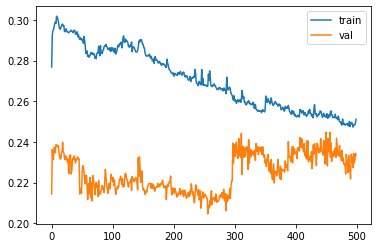

Epoch 1/500
55/85 [==================>...........] - ETA: 0s - loss: 0.5305 - mae: 0.1976
Epoch 00001: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 3ms/step - loss: 0.5265 - mae: 0.2026 - val_loss: 0.9375 - val_mae: 0.2672
Epoch 2/500
82/85 [===========================>..] - ETA: 0s - loss: 0.4717 - mae: 0.1716
Epoch 00002: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 3ms/step - loss: 0.4844 - mae: 0.1751 - val_loss: 0.9553 - val_mae: 0.2627
Epoch 3/500
55/85 [==================>...........] - ETA: 0s - loss: 0.4763 - mae: 0.1637
Epoch 00003: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4805 - mae: 0.1697 - val_loss: 0.9485 - val_mae: 0.2599
Epoch 4/500
53/85 [=================>............] - ETA: 0s - loss: 0.4745 - mae: 0.1594
Epoch 00004: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4686 - mae: 0.1663 -

Epoch 33/500
52/85 [=================>............] - ETA: 0s - loss: 0.4564 - mae: 0.1643
Epoch 00033: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4490 - mae: 0.1670 - val_loss: 0.8969 - val_mae: 0.2569
Epoch 34/500
53/85 [=================>............] - ETA: 0s - loss: 0.4509 - mae: 0.1627
Epoch 00034: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4498 - mae: 0.1682 - val_loss: 0.9046 - val_mae: 0.2561
Epoch 35/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4446 - mae: 0.1614
Epoch 00035: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4483 - mae: 0.1668 - val_loss: 0.9064 - val_mae: 0.2566
Epoch 36/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4448 - mae: 0.1612
Epoch 00036: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4484 - mae: 0.16

Epoch 65/500
51/85 [=================>............] - ETA: 0s - loss: 0.4614 - mae: 0.1625
Epoch 00065: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4283 - mae: 0.1621 - val_loss: 0.9168 - val_mae: 0.2629
Epoch 66/500
55/85 [==================>...........] - ETA: 0s - loss: 0.4441 - mae: 0.1588
Epoch 00066: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4410 - mae: 0.1629 - val_loss: 0.9294 - val_mae: 0.2601
Epoch 67/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4425 - mae: 0.1572
Epoch 00067: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4534 - mae: 0.1666 - val_loss: 0.9610 - val_mae: 0.2590
Epoch 68/500
52/85 [=================>............] - ETA: 0s - loss: 0.4578 - mae: 0.1581
Epoch 00068: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4398 - mae: 0.15

Epoch 00096: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4158 - mae: 0.1553 - val_loss: 0.9735 - val_mae: 0.2578
Epoch 97/500
53/85 [=================>............] - ETA: 0s - loss: 0.4402 - mae: 0.1536
Epoch 00097: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4075 - mae: 0.1538 - val_loss: 0.9516 - val_mae: 0.2591
Epoch 98/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4371 - mae: 0.1519
Epoch 00098: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4170 - mae: 0.1541 - val_loss: 0.9613 - val_mae: 0.2589
Epoch 99/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4342 - mae: 0.1554
Epoch 00099: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4316 - mae: 0.1579 - val_loss: 0.9896 - val_mae: 0.2601
Epoch 100/500
54/85 [==================>...........

Epoch 128/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4212 - mae: 0.1513
Epoch 00128: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4020 - mae: 0.1544 - val_loss: 0.9940 - val_mae: 0.2586
Epoch 129/500
53/85 [=================>............] - ETA: 0s - loss: 0.4269 - mae: 0.1527
Epoch 00129: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4007 - mae: 0.1531 - val_loss: 0.9912 - val_mae: 0.2601
Epoch 130/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4204 - mae: 0.1518
Epoch 00130: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3994 - mae: 0.1531 - val_loss: 1.0136 - val_mae: 0.2593
Epoch 131/500
53/85 [=================>............] - ETA: 0s - loss: 0.4530 - mae: 0.1481
Epoch 00131: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4173 - mae: 

Epoch 160/500
53/85 [=================>............] - ETA: 0s - loss: 0.4295 - mae: 0.1599
Epoch 00160: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4129 - mae: 0.1555 - val_loss: 1.0025 - val_mae: 0.2527
Epoch 161/500
52/85 [=================>............] - ETA: 0s - loss: 0.4354 - mae: 0.1616
Epoch 00161: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4135 - mae: 0.1561 - val_loss: 1.0061 - val_mae: 0.2529
Epoch 162/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4371 - mae: 0.1578
Epoch 00162: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4254 - mae: 0.1563 - val_loss: 1.0179 - val_mae: 0.2519
Epoch 163/500
53/85 [=================>............] - ETA: 0s - loss: 0.4409 - mae: 0.1578
Epoch 00163: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4240 - mae: 

Epoch 192/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4217 - mae: 0.1570
Epoch 00192: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3990 - mae: 0.1532 - val_loss: 0.9972 - val_mae: 0.2531
Epoch 193/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4212 - mae: 0.1578
Epoch 00193: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3990 - mae: 0.1537 - val_loss: 1.0010 - val_mae: 0.2533
Epoch 194/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4212 - mae: 0.1575
Epoch 00194: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3990 - mae: 0.1530 - val_loss: 0.9864 - val_mae: 0.2532
Epoch 195/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4291 - mae: 0.1567
Epoch 00195: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4030 - mae: 

Epoch 224/500
55/85 [==================>...........] - ETA: 0s - loss: 0.4226 - mae: 0.1507
Epoch 00224: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4181 - mae: 0.1473 - val_loss: 1.0378 - val_mae: 0.2456
Epoch 225/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4279 - mae: 0.1494
Epoch 00225: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4172 - mae: 0.1486 - val_loss: 1.0207 - val_mae: 0.2490
Epoch 226/500
53/85 [=================>............] - ETA: 0s - loss: 0.4340 - mae: 0.1537
Epoch 00226: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4176 - mae: 0.1511 - val_loss: 1.0112 - val_mae: 0.2503
Epoch 227/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4255 - mae: 0.1518
Epoch 00227: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4147 - mae: 

Epoch 256/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4229 - mae: 0.1509
Epoch 00256: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4164 - mae: 0.1531 - val_loss: 0.9692 - val_mae: 0.2539
Epoch 257/500
52/85 [=================>............] - ETA: 0s - loss: 0.4326 - mae: 0.1535
Epoch 00257: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4140 - mae: 0.1526 - val_loss: 0.9743 - val_mae: 0.2535
Epoch 258/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4246 - mae: 0.1508
Epoch 00258: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4176 - mae: 0.1534 - val_loss: 0.9585 - val_mae: 0.2551
Epoch 259/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4246 - mae: 0.1511
Epoch 00259: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4159 - mae: 

Epoch 288/500
53/85 [=================>............] - ETA: 0s - loss: 0.4823 - mae: 0.1528
Epoch 00288: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4520 - mae: 0.1554 - val_loss: 0.9230 - val_mae: 0.2631
Epoch 289/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4746 - mae: 0.1510
Epoch 00289: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4521 - mae: 0.1555 - val_loss: 0.9278 - val_mae: 0.2637
Epoch 290/500
53/85 [=================>............] - ETA: 0s - loss: 0.4833 - mae: 0.1506
Epoch 00290: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4534 - mae: 0.1547 - val_loss: 0.9306 - val_mae: 0.2645
Epoch 291/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4773 - mae: 0.1487
Epoch 00291: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4563 - mae: 

Epoch 320/500
53/85 [=================>............] - ETA: 0s - loss: 0.5135 - mae: 0.1586
Epoch 00320: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4652 - mae: 0.1576 - val_loss: 0.9513 - val_mae: 0.2680
Epoch 321/500
53/85 [=================>............] - ETA: 0s - loss: 0.5129 - mae: 0.1590
Epoch 00321: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.5001 - mae: 0.1579 - val_loss: 0.9419 - val_mae: 0.2692
Epoch 322/500
54/85 [==================>...........] - ETA: 0s - loss: 0.5044 - mae: 0.1585
Epoch 00322: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4808 - mae: 0.1669 - val_loss: 0.9550 - val_mae: 0.2760
Epoch 323/500
55/85 [==================>...........] - ETA: 0s - loss: 0.4986 - mae: 0.1522
Epoch 00323: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4758 - mae: 

Epoch 352/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4355 - mae: 0.1512
Epoch 00352: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4040 - mae: 0.1479 - val_loss: 1.0036 - val_mae: 0.2596
Epoch 353/500
46/85 [===============>..............] - ETA: 0s - loss: 0.4928 - mae: 0.1658
Epoch 00353: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4048 - mae: 0.1481 - val_loss: 1.0074 - val_mae: 0.2593
Epoch 354/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4357 - mae: 0.1511
Epoch 00354: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4110 - mae: 0.1503 - val_loss: 1.0061 - val_mae: 0.2594
Epoch 355/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4359 - mae: 0.1506
Epoch 00355: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4059 - mae: 

Epoch 384/500
53/85 [=================>............] - ETA: 0s - loss: 0.4369 - mae: 0.1608
Epoch 00384: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4095 - mae: 0.1554 - val_loss: 1.0096 - val_mae: 0.2599
Epoch 385/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4267 - mae: 0.1552
Epoch 00385: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4069 - mae: 0.1529 - val_loss: 1.0166 - val_mae: 0.2562
Epoch 386/500
53/85 [=================>............] - ETA: 0s - loss: 0.4301 - mae: 0.1592
Epoch 00386: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 3ms/step - loss: 0.3969 - mae: 0.1508 - val_loss: 1.0234 - val_mae: 0.2565
Epoch 387/500
83/85 [============================>.] - ETA: 0s - loss: 0.3937 - mae: 0.1482
Epoch 00387: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 3ms/step - loss: 0.3944 - mae: 

Epoch 416/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4157 - mae: 0.1506
Epoch 00416: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3796 - mae: 0.1447 - val_loss: 1.0420 - val_mae: 0.2632
Epoch 417/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4158 - mae: 0.1503
Epoch 00417: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3806 - mae: 0.1445 - val_loss: 1.0414 - val_mae: 0.2633
Epoch 418/500
53/85 [=================>............] - ETA: 0s - loss: 0.4222 - mae: 0.1521
Epoch 00418: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3846 - mae: 0.1457 - val_loss: 1.0431 - val_mae: 0.2632
Epoch 419/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4162 - mae: 0.1504
Epoch 00419: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3817 - mae: 

Epoch 448/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4387 - mae: 0.1658
Epoch 00448: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4168 - mae: 0.1565 - val_loss: 1.0949 - val_mae: 0.2591
Epoch 449/500
55/85 [==================>...........] - ETA: 0s - loss: 0.4247 - mae: 0.1612
Epoch 00449: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4105 - mae: 0.1543 - val_loss: 1.0984 - val_mae: 0.2588
Epoch 450/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4429 - mae: 0.1604
Epoch 00450: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4242 - mae: 0.1553 - val_loss: 1.0857 - val_mae: 0.2569
Epoch 451/500
55/85 [==================>...........] - ETA: 0s - loss: 0.4389 - mae: 0.1605
Epoch 00451: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.4203 - mae: 

Epoch 480/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4264 - mae: 0.1581
Epoch 00480: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3970 - mae: 0.1507 - val_loss: 1.0356 - val_mae: 0.2633
Epoch 481/500
54/85 [==================>...........] - ETA: 0s - loss: 0.4262 - mae: 0.1565
Epoch 00481: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3939 - mae: 0.1492 - val_loss: 1.0421 - val_mae: 0.2646
Epoch 482/500
53/85 [=================>............] - ETA: 0s - loss: 0.4320 - mae: 0.1560
Epoch 00482: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3922 - mae: 0.1474 - val_loss: 1.0475 - val_mae: 0.2652
Epoch 483/500
53/85 [=================>............] - ETA: 0s - loss: 0.4319 - mae: 0.1546
Epoch 00483: val_mae did not improve from 0.10687
85/85 [==============================] - 0s 2ms/step - loss: 0.3898 - mae: 

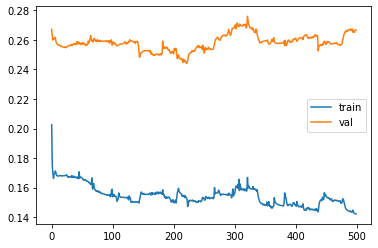

Epoch 1/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7998 - mae: 0.2492
Epoch 00001: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6836 - mae: 0.2253 - val_loss: 0.4388 - val_mae: 0.1756
Epoch 2/500
53/84 [=================>............] - ETA: 0s - loss: 0.7476 - mae: 0.2744
Epoch 00002: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6544 - mae: 0.2480 - val_loss: 0.4207 - val_mae: 0.1752
Epoch 3/500
75/84 [=========================>....] - ETA: 0s - loss: 0.6597 - mae: 0.2484
Epoch 00003: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 3ms/step - loss: 0.6408 - mae: 0.2411 - val_loss: 0.3966 - val_mae: 0.1763
Epoch 4/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7232 - mae: 0.2717
Epoch 00004: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6362 - mae: 0.2474 -

Epoch 33/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7108 - mae: 0.2758
Epoch 00033: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6240 - mae: 0.2500 - val_loss: 0.4091 - val_mae: 0.1873
Epoch 34/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7108 - mae: 0.2758
Epoch 00034: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6240 - mae: 0.2500 - val_loss: 0.4091 - val_mae: 0.1873
Epoch 35/500
51/84 [=================>............] - ETA: 0s - loss: 0.7359 - mae: 0.2823
Epoch 00035: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6240 - mae: 0.2500 - val_loss: 0.4090 - val_mae: 0.1873
Epoch 36/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7107 - mae: 0.2758
Epoch 00036: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6239 - mae: 0.25

Epoch 65/500
53/84 [=================>............] - ETA: 0s - loss: 0.7188 - mae: 0.2783
Epoch 00065: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6253 - mae: 0.2507 - val_loss: 0.4032 - val_mae: 0.1866
Epoch 66/500
53/84 [=================>............] - ETA: 0s - loss: 0.7186 - mae: 0.2783
Epoch 00066: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6236 - mae: 0.2501 - val_loss: 0.4490 - val_mae: 0.1959
Epoch 67/500
53/84 [=================>............] - ETA: 0s - loss: 0.7185 - mae: 0.2784
Epoch 00067: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6236 - mae: 0.2502 - val_loss: 0.4492 - val_mae: 0.1960
Epoch 68/500
55/84 [==================>...........] - ETA: 0s - loss: 0.7029 - mae: 0.2744
Epoch 00068: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6236 - mae: 0.25

Epoch 97/500
53/84 [=================>............] - ETA: 0s - loss: 0.7184 - mae: 0.2781
Epoch 00097: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6207 - mae: 0.2502 - val_loss: 0.4619 - val_mae: 0.1997
Epoch 98/500
52/84 [=================>............] - ETA: 0s - loss: 0.7263 - mae: 0.2801
Epoch 00098: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6207 - mae: 0.2502 - val_loss: 0.4619 - val_mae: 0.1998
Epoch 99/500
53/84 [=================>............] - ETA: 0s - loss: 0.7184 - mae: 0.2781
Epoch 00099: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6207 - mae: 0.2502 - val_loss: 0.4620 - val_mae: 0.1998
Epoch 100/500
55/84 [==================>...........] - ETA: 0s - loss: 0.7028 - mae: 0.2741
Epoch 00100: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6207 - mae: 0.2

Epoch 129/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7114 - mae: 0.2763
Epoch 00129: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6233 - mae: 0.2503 - val_loss: 0.4044 - val_mae: 0.1861
Epoch 130/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7114 - mae: 0.2763
Epoch 00130: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6233 - mae: 0.2503 - val_loss: 0.4044 - val_mae: 0.1861
Epoch 131/500
53/84 [=================>............] - ETA: 0s - loss: 0.7196 - mae: 0.2785
Epoch 00131: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6233 - mae: 0.2503 - val_loss: 0.4044 - val_mae: 0.1861
Epoch 132/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7113 - mae: 0.2763
Epoch 00132: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6233 - mae: 

Epoch 161/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7010 - mae: 0.2786
Epoch 00161: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6192 - mae: 0.2495 - val_loss: 0.3781 - val_mae: 0.1808
Epoch 162/500
53/84 [=================>............] - ETA: 0s - loss: 0.7105 - mae: 0.2811
Epoch 00162: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6202 - mae: 0.2497 - val_loss: 0.3775 - val_mae: 0.1807
Epoch 163/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7119 - mae: 0.2795
Epoch 00163: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6291 - mae: 0.2499 - val_loss: 0.3997 - val_mae: 0.1817
Epoch 164/500
53/84 [=================>............] - ETA: 0s - loss: 0.7179 - mae: 0.2809
Epoch 00164: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6293 - mae: 

Epoch 193/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7352 - mae: 0.2849
Epoch 00193: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6343 - mae: 0.2493 - val_loss: 0.4240 - val_mae: 0.1794
Epoch 194/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7347 - mae: 0.2851
Epoch 00194: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6334 - mae: 0.2490 - val_loss: 0.4176 - val_mae: 0.1734
Epoch 195/500
53/84 [=================>............] - ETA: 0s - loss: 0.7428 - mae: 0.2871
Epoch 00195: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6332 - mae: 0.2489 - val_loss: 0.4174 - val_mae: 0.1761
Epoch 196/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7341 - mae: 0.2851
Epoch 00196: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6327 - mae: 

Epoch 225/500
53/84 [=================>............] - ETA: 0s - loss: 0.7172 - mae: 0.2843
Epoch 00225: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6091 - mae: 0.2487 - val_loss: 0.4086 - val_mae: 0.1790
Epoch 226/500
45/84 [===============>..............] - ETA: 0s - loss: 0.7651 - mae: 0.2957
Epoch 00226: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6081 - mae: 0.2481 - val_loss: 0.4106 - val_mae: 0.1788
Epoch 227/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7090 - mae: 0.2818
Epoch 00227: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6071 - mae: 0.2473 - val_loss: 0.4149 - val_mae: 0.1790
Epoch 228/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7071 - mae: 0.2815
Epoch 00228: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6052 - mae: 

Epoch 257/500
53/84 [=================>............] - ETA: 0s - loss: 0.7204 - mae: 0.2772
Epoch 00257: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6238 - mae: 0.2435 - val_loss: 0.4243 - val_mae: 0.1735
Epoch 258/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7126 - mae: 0.2730
Epoch 00258: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6176 - mae: 0.2435 - val_loss: 0.4235 - val_mae: 0.1748
Epoch 259/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7230 - mae: 0.2713
Epoch 00259: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6237 - mae: 0.2442 - val_loss: 0.4429 - val_mae: 0.1834
Epoch 260/500
53/84 [=================>............] - ETA: 0s - loss: 0.7165 - mae: 0.2774
Epoch 00260: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6121 - mae: 

Epoch 289/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7054 - mae: 0.2812
Epoch 00289: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5988 - mae: 0.2430 - val_loss: 0.4169 - val_mae: 0.1643
Epoch 290/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7020 - mae: 0.2813
Epoch 00290: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5966 - mae: 0.2426 - val_loss: 0.4045 - val_mae: 0.1639
Epoch 291/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7015 - mae: 0.2821
Epoch 00291: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6038 - mae: 0.2410 - val_loss: 0.3906 - val_mae: 0.1613
Epoch 292/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6989 - mae: 0.2826
Epoch 00292: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6049 - mae: 

Epoch 321/500
53/84 [=================>............] - ETA: 0s - loss: 0.7066 - mae: 0.2880
Epoch 00321: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5834 - mae: 0.2397 - val_loss: 0.4223 - val_mae: 0.1537
Epoch 322/500
53/84 [=================>............] - ETA: 0s - loss: 0.7062 - mae: 0.2882
Epoch 00322: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5872 - mae: 0.2388 - val_loss: 0.4313 - val_mae: 0.1591
Epoch 323/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6990 - mae: 0.2862
Epoch 00323: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5965 - mae: 0.2431 - val_loss: 0.4242 - val_mae: 0.1596
Epoch 324/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6996 - mae: 0.2851
Epoch 00324: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5896 - mae: 

Epoch 353/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6991 - mae: 0.2903
Epoch 00353: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5720 - mae: 0.2397 - val_loss: 0.3889 - val_mae: 0.1597
Epoch 354/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6981 - mae: 0.2901
Epoch 00354: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5691 - mae: 0.2386 - val_loss: 0.3880 - val_mae: 0.1556
Epoch 355/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6973 - mae: 0.2897
Epoch 00355: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5681 - mae: 0.2373 - val_loss: 0.3897 - val_mae: 0.1570
Epoch 356/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6965 - mae: 0.2899
Epoch 00356: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5684 - mae: 

Epoch 385/500
55/84 [==================>...........] - ETA: 0s - loss: 0.6900 - mae: 0.2876
Epoch 00385: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5638 - mae: 0.2373 - val_loss: 0.3955 - val_mae: 0.1553
Epoch 386/500
53/84 [=================>............] - ETA: 0s - loss: 0.7038 - mae: 0.2903
Epoch 00386: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5704 - mae: 0.2357 - val_loss: 0.3918 - val_mae: 0.1584
Epoch 387/500
53/84 [=================>............] - ETA: 0s - loss: 0.7025 - mae: 0.2910
Epoch 00387: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5632 - mae: 0.2368 - val_loss: 0.3962 - val_mae: 0.1555
Epoch 388/500
55/84 [==================>...........] - ETA: 0s - loss: 0.6910 - mae: 0.2871
Epoch 00388: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5662 - mae: 

Epoch 417/500
55/84 [==================>...........] - ETA: 0s - loss: 0.6841 - mae: 0.2865
Epoch 00417: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5526 - mae: 0.2345 - val_loss: 0.4066 - val_mae: 0.1556
Epoch 418/500
55/84 [==================>...........] - ETA: 0s - loss: 0.6860 - mae: 0.2867
Epoch 00418: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5603 - mae: 0.2329 - val_loss: 0.3944 - val_mae: 0.1574
Epoch 419/500
55/84 [==================>...........] - ETA: 0s - loss: 0.6983 - mae: 0.2886
Epoch 00419: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5701 - mae: 0.2404 - val_loss: 0.3947 - val_mae: 0.1566
Epoch 420/500
53/84 [=================>............] - ETA: 0s - loss: 0.7148 - mae: 0.2905
Epoch 00420: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5670 - mae: 

Epoch 449/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6971 - mae: 0.2875
Epoch 00449: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5578 - mae: 0.2342 - val_loss: 0.4054 - val_mae: 0.1569
Epoch 450/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6976 - mae: 0.2874
Epoch 00450: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5621 - mae: 0.2355 - val_loss: 0.3929 - val_mae: 0.1577
Epoch 451/500
54/84 [==================>...........] - ETA: 0s - loss: 0.6966 - mae: 0.2873
Epoch 00451: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5611 - mae: 0.2341 - val_loss: 0.3888 - val_mae: 0.1546
Epoch 452/500
53/84 [=================>............] - ETA: 0s - loss: 0.7064 - mae: 0.2897
Epoch 00452: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.5606 - mae: 

Epoch 481/500
53/84 [=================>............] - ETA: 0s - loss: 0.7301 - mae: 0.2831
Epoch 00481: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6313 - mae: 0.2492 - val_loss: 0.3865 - val_mae: 0.1755
Epoch 482/500
53/84 [=================>............] - ETA: 0s - loss: 0.7245 - mae: 0.2811
Epoch 00482: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6243 - mae: 0.2457 - val_loss: 0.3848 - val_mae: 0.1732
Epoch 483/500
54/84 [==================>...........] - ETA: 0s - loss: 0.7145 - mae: 0.2797
Epoch 00483: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6228 - mae: 0.2461 - val_loss: 0.3836 - val_mae: 0.1733
Epoch 484/500
53/84 [=================>............] - ETA: 0s - loss: 0.7239 - mae: 0.2834
Epoch 00484: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6207 - mae: 

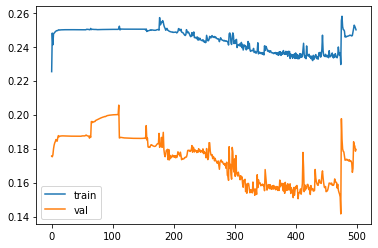

Epoch 1/500
54/90 [=================>............] - ETA: 0s - loss: 0.7627 - mae: 0.2581
Epoch 00001: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.8087 - mae: 0.2797 - val_loss: 0.4258 - val_mae: 0.2130
Epoch 2/500
56/90 [=================>............] - ETA: 0s - loss: 0.7494 - mae: 0.2845
Epoch 00002: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.7677 - mae: 0.2934 - val_loss: 0.4445 - val_mae: 0.2237
Epoch 3/500
45/90 [==============>...............] - ETA: 0s - loss: 0.7696 - mae: 0.2936
Epoch 00003: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7537 - mae: 0.2959 - val_loss: 0.4583 - val_mae: 0.2300
Epoch 4/500
52/90 [================>.............] - ETA: 0s - loss: 0.7408 - mae: 0.2880
Epoch 00004: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7675 - mae: 0.2992 -

Epoch 33/500
53/90 [================>.............] - ETA: 0s - loss: 0.7052 - mae: 0.2913
Epoch 00033: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7424 - mae: 0.3010 - val_loss: 0.4670 - val_mae: 0.2335
Epoch 34/500
54/90 [=================>............] - ETA: 0s - loss: 0.7070 - mae: 0.2911
Epoch 00034: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7427 - mae: 0.3004 - val_loss: 0.4684 - val_mae: 0.2346
Epoch 35/500
54/90 [=================>............] - ETA: 0s - loss: 0.7034 - mae: 0.2897
Epoch 00035: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7541 - mae: 0.3030 - val_loss: 0.4756 - val_mae: 0.2384
Epoch 36/500
53/90 [================>.............] - ETA: 0s - loss: 0.7032 - mae: 0.2927
Epoch 00036: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7554 - mae: 0.30

Epoch 65/500
54/90 [=================>............] - ETA: 0s - loss: 0.6894 - mae: 0.2866
Epoch 00065: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7330 - mae: 0.2964 - val_loss: 0.4710 - val_mae: 0.2342
Epoch 66/500
55/90 [=================>............] - ETA: 0s - loss: 0.7047 - mae: 0.2895
Epoch 00066: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7349 - mae: 0.2968 - val_loss: 0.4836 - val_mae: 0.2418
Epoch 67/500
53/90 [================>.............] - ETA: 0s - loss: 0.6910 - mae: 0.2882
Epoch 00067: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7372 - mae: 0.2974 - val_loss: 0.4580 - val_mae: 0.2270
Epoch 68/500
54/90 [=================>............] - ETA: 0s - loss: 0.6892 - mae: 0.2853
Epoch 00068: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7524 - mae: 0.30

Epoch 97/500
55/90 [=================>............] - ETA: 0s - loss: 0.6853 - mae: 0.2861
Epoch 00097: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7296 - mae: 0.2963 - val_loss: 0.4815 - val_mae: 0.2415
Epoch 98/500
54/90 [=================>............] - ETA: 0s - loss: 0.6758 - mae: 0.2842
Epoch 00098: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7318 - mae: 0.2973 - val_loss: 0.4769 - val_mae: 0.2383
Epoch 99/500
52/90 [================>.............] - ETA: 0s - loss: 0.6679 - mae: 0.2795
Epoch 00099: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7279 - mae: 0.2943 - val_loss: 0.4797 - val_mae: 0.2397
Epoch 100/500
54/90 [=================>............] - ETA: 0s - loss: 0.6721 - mae: 0.2824
Epoch 00100: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7265 - mae: 0.2

Epoch 129/500
53/90 [================>.............] - ETA: 0s - loss: 0.6783 - mae: 0.2849
Epoch 00129: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7322 - mae: 0.2984 - val_loss: 0.4733 - val_mae: 0.2370
Epoch 130/500
54/90 [=================>............] - ETA: 0s - loss: 0.6771 - mae: 0.2855
Epoch 00130: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7279 - mae: 0.2972 - val_loss: 0.4729 - val_mae: 0.2362
Epoch 131/500
54/90 [=================>............] - ETA: 0s - loss: 0.6813 - mae: 0.2837
Epoch 00131: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7246 - mae: 0.2941 - val_loss: 0.4771 - val_mae: 0.2365
Epoch 132/500
54/90 [=================>............] - ETA: 0s - loss: 0.6733 - mae: 0.2831
Epoch 00132: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7261 - mae: 

Epoch 161/500
54/90 [=================>............] - ETA: 0s - loss: 0.6736 - mae: 0.2847
Epoch 00161: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 3ms/step - loss: 0.7325 - mae: 0.2941 - val_loss: 0.4761 - val_mae: 0.2360
Epoch 162/500
81/90 [==========================>...] - ETA: 0s - loss: 0.7341 - mae: 0.2925
Epoch 00162: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7285 - mae: 0.2920 - val_loss: 0.4684 - val_mae: 0.2318
Epoch 163/500
54/90 [=================>............] - ETA: 0s - loss: 0.6695 - mae: 0.2817
Epoch 00163: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7292 - mae: 0.2916 - val_loss: 0.4778 - val_mae: 0.2366
Epoch 164/500
54/90 [=================>............] - ETA: 0s - loss: 0.6702 - mae: 0.2842
Epoch 00164: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7290 - mae: 

Epoch 193/500
53/90 [================>.............] - ETA: 0s - loss: 0.6897 - mae: 0.2849
Epoch 00193: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7269 - mae: 0.2980 - val_loss: 0.4618 - val_mae: 0.2324
Epoch 194/500
53/90 [================>.............] - ETA: 0s - loss: 0.6883 - mae: 0.2835
Epoch 00194: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7259 - mae: 0.2969 - val_loss: 0.4637 - val_mae: 0.2333
Epoch 195/500
54/90 [=================>............] - ETA: 0s - loss: 0.6894 - mae: 0.2847
Epoch 00195: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7245 - mae: 0.2967 - val_loss: 0.4615 - val_mae: 0.2319
Epoch 196/500
54/90 [=================>............] - ETA: 0s - loss: 0.6885 - mae: 0.2839
Epoch 00196: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7235 - mae: 

Epoch 225/500
54/90 [=================>............] - ETA: 0s - loss: 0.6653 - mae: 0.2795
Epoch 00225: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7173 - mae: 0.2925 - val_loss: 0.4772 - val_mae: 0.2358
Epoch 226/500
48/90 [===============>..............] - ETA: 0s - loss: 0.6665 - mae: 0.2815
Epoch 00226: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7176 - mae: 0.2928 - val_loss: 0.4787 - val_mae: 0.2367
Epoch 227/500
53/90 [================>.............] - ETA: 0s - loss: 0.6591 - mae: 0.2784
Epoch 00227: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7187 - mae: 0.2932 - val_loss: 0.4785 - val_mae: 0.2367
Epoch 228/500
52/90 [================>.............] - ETA: 0s - loss: 0.6703 - mae: 0.2817
Epoch 00228: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7224 - mae: 

Epoch 257/500
53/90 [================>.............] - ETA: 0s - loss: 0.6768 - mae: 0.2809
Epoch 00257: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7236 - mae: 0.2903 - val_loss: 0.4530 - val_mae: 0.2231
Epoch 258/500
52/90 [================>.............] - ETA: 0s - loss: 0.6768 - mae: 0.2802
Epoch 00258: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7225 - mae: 0.2904 - val_loss: 0.4673 - val_mae: 0.2311
Epoch 259/500
54/90 [=================>............] - ETA: 0s - loss: 0.6818 - mae: 0.2842
Epoch 00259: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7215 - mae: 0.2915 - val_loss: 0.4569 - val_mae: 0.2256
Epoch 260/500
54/90 [=================>............] - ETA: 0s - loss: 0.6846 - mae: 0.2833
Epoch 00260: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7248 - mae: 

Epoch 289/500
54/90 [=================>............] - ETA: 0s - loss: 0.6657 - mae: 0.2795
Epoch 00289: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7038 - mae: 0.2885 - val_loss: 0.4552 - val_mae: 0.2272
Epoch 290/500
54/90 [=================>............] - ETA: 0s - loss: 0.6675 - mae: 0.2804
Epoch 00290: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7038 - mae: 0.2887 - val_loss: 0.4517 - val_mae: 0.2256
Epoch 291/500
53/90 [================>.............] - ETA: 0s - loss: 0.6716 - mae: 0.2813
Epoch 00291: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7051 - mae: 0.2905 - val_loss: 0.4576 - val_mae: 0.2287
Epoch 292/500
54/90 [=================>............] - ETA: 0s - loss: 0.6752 - mae: 0.2837
Epoch 00292: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7051 - mae: 

Epoch 321/500
52/90 [================>.............] - ETA: 0s - loss: 0.6650 - mae: 0.2782
Epoch 00321: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7032 - mae: 0.2886 - val_loss: 0.4659 - val_mae: 0.2311
Epoch 322/500
55/90 [=================>............] - ETA: 0s - loss: 0.6721 - mae: 0.2794
Epoch 00322: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7026 - mae: 0.2878 - val_loss: 0.4711 - val_mae: 0.2331
Epoch 323/500
74/90 [=======================>......] - ETA: 0s - loss: 0.7343 - mae: 0.2954
Epoch 00323: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7025 - mae: 0.2877 - val_loss: 0.4646 - val_mae: 0.2303
Epoch 324/500
53/90 [================>.............] - ETA: 0s - loss: 0.6602 - mae: 0.2758
Epoch 00324: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7011 - mae: 

Epoch 353/500
52/90 [================>.............] - ETA: 0s - loss: 0.6484 - mae: 0.2767
Epoch 00353: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7031 - mae: 0.2871 - val_loss: 0.4710 - val_mae: 0.2357
Epoch 354/500
54/90 [=================>............] - ETA: 0s - loss: 0.6523 - mae: 0.2785
Epoch 00354: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7033 - mae: 0.2885 - val_loss: 0.4710 - val_mae: 0.2374
Epoch 355/500
54/90 [=================>............] - ETA: 0s - loss: 0.6542 - mae: 0.2787
Epoch 00355: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7081 - mae: 0.2888 - val_loss: 0.4676 - val_mae: 0.2353
Epoch 356/500
53/90 [================>.............] - ETA: 0s - loss: 0.6482 - mae: 0.2762
Epoch 00356: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7079 - mae: 

Epoch 385/500
52/90 [================>.............] - ETA: 0s - loss: 0.6742 - mae: 0.2873
Epoch 00385: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7237 - mae: 0.2960 - val_loss: 0.4778 - val_mae: 0.2396
Epoch 386/500
55/90 [=================>............] - ETA: 0s - loss: 0.6812 - mae: 0.2888
Epoch 00386: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7188 - mae: 0.2946 - val_loss: 0.4781 - val_mae: 0.2384
Epoch 387/500
54/90 [=================>............] - ETA: 0s - loss: 0.6712 - mae: 0.2867
Epoch 00387: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7240 - mae: 0.2958 - val_loss: 0.4770 - val_mae: 0.2407
Epoch 388/500
54/90 [=================>............] - ETA: 0s - loss: 0.6738 - mae: 0.2874
Epoch 00388: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.7235 - mae: 

Epoch 417/500
53/90 [================>.............] - ETA: 0s - loss: 0.6347 - mae: 0.2721
Epoch 00417: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6882 - mae: 0.2844 - val_loss: 0.4526 - val_mae: 0.2285
Epoch 418/500
86/90 [===========================>..] - ETA: 0s - loss: 0.6914 - mae: 0.2837
Epoch 00418: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6869 - mae: 0.2837 - val_loss: 0.4565 - val_mae: 0.2294
Epoch 419/500
53/90 [================>.............] - ETA: 0s - loss: 0.6362 - mae: 0.2726
Epoch 00419: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6959 - mae: 0.2849 - val_loss: 0.4522 - val_mae: 0.2272
Epoch 420/500
53/90 [================>.............] - ETA: 0s - loss: 0.6346 - mae: 0.2711
Epoch 00420: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6901 - mae: 

Epoch 449/500
54/90 [=================>............] - ETA: 0s - loss: 0.6414 - mae: 0.2733
Epoch 00449: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6851 - mae: 0.2806 - val_loss: 0.4614 - val_mae: 0.2266
Epoch 450/500
51/90 [================>.............] - ETA: 0s - loss: 0.6221 - mae: 0.2681
Epoch 00450: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6834 - mae: 0.2788 - val_loss: 0.4655 - val_mae: 0.2272
Epoch 451/500
53/90 [================>.............] - ETA: 0s - loss: 0.6311 - mae: 0.2698
Epoch 00451: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6881 - mae: 0.2798 - val_loss: 0.4702 - val_mae: 0.2293
Epoch 452/500
54/90 [=================>............] - ETA: 0s - loss: 0.6345 - mae: 0.2706
Epoch 00452: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6880 - mae: 

Epoch 481/500
53/90 [================>.............] - ETA: 0s - loss: 0.6211 - mae: 0.2683
Epoch 00481: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6761 - mae: 0.2757 - val_loss: 0.4747 - val_mae: 0.2299
Epoch 482/500
55/90 [=================>............] - ETA: 0s - loss: 0.6416 - mae: 0.2716
Epoch 00482: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6827 - mae: 0.2771 - val_loss: 0.4657 - val_mae: 0.2263
Epoch 483/500
52/90 [================>.............] - ETA: 0s - loss: 0.6287 - mae: 0.2683
Epoch 00483: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6808 - mae: 0.2762 - val_loss: 0.4677 - val_mae: 0.2281
Epoch 484/500
53/90 [================>.............] - ETA: 0s - loss: 0.6218 - mae: 0.2681
Epoch 00484: val_mae did not improve from 0.10687
90/90 [==============================] - 0s 2ms/step - loss: 0.6753 - mae: 

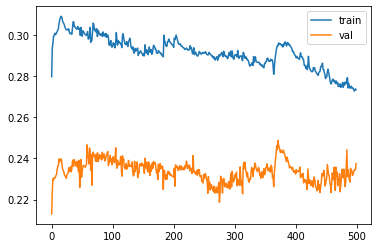

Epoch 1/500
54/96 [===============>..............] - ETA: 0s - loss: 0.4752 - mae: 0.2114
Epoch 00001: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.5273 - mae: 0.2237 - val_loss: 0.7036 - val_mae: 0.2687
Epoch 2/500
54/96 [===============>..............] - ETA: 0s - loss: 0.4265 - mae: 0.1765
Epoch 00002: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4837 - mae: 0.1931 - val_loss: 0.7125 - val_mae: 0.2580
Epoch 3/500
53/96 [===============>..............] - ETA: 0s - loss: 0.4179 - mae: 0.1664
Epoch 00003: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4520 - mae: 0.1698 - val_loss: 0.7460 - val_mae: 0.2455
Epoch 4/500
54/96 [===============>..............] - ETA: 0s - loss: 0.4079 - mae: 0.1605
Epoch 00004: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4474 - mae: 0.1643 -

Epoch 33/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3944 - mae: 0.1588
Epoch 00033: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4399 - mae: 0.1618 - val_loss: 0.7495 - val_mae: 0.2410
Epoch 34/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3925 - mae: 0.1588
Epoch 00034: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4395 - mae: 0.1616 - val_loss: 0.7496 - val_mae: 0.2413
Epoch 35/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3918 - mae: 0.1591
Epoch 00035: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4390 - mae: 0.1618 - val_loss: 0.7539 - val_mae: 0.2411
Epoch 36/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3852 - mae: 0.1567
Epoch 00036: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4385 - mae: 0.16

Epoch 65/500
55/96 [================>.............] - ETA: 0s - loss: 0.3961 - mae: 0.1587
Epoch 00065: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4217 - mae: 0.1604 - val_loss: 0.7958 - val_mae: 0.2452
Epoch 66/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3776 - mae: 0.1538
Epoch 00066: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4207 - mae: 0.1605 - val_loss: 0.7974 - val_mae: 0.2452
Epoch 67/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3809 - mae: 0.1547
Epoch 00067: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4206 - mae: 0.1602 - val_loss: 0.7993 - val_mae: 0.2450
Epoch 68/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3784 - mae: 0.1535
Epoch 00068: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4209 - mae: 0.16

Epoch 97/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3928 - mae: 0.1502
Epoch 00097: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4240 - mae: 0.1611 - val_loss: 0.7897 - val_mae: 0.2566
Epoch 98/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3900 - mae: 0.1483
Epoch 00098: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4258 - mae: 0.1613 - val_loss: 0.7869 - val_mae: 0.2570
Epoch 99/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3882 - mae: 0.1492
Epoch 00099: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4247 - mae: 0.1613 - val_loss: 0.7873 - val_mae: 0.2570
Epoch 100/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3873 - mae: 0.1492
Epoch 00100: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4232 - mae: 0.1

Epoch 129/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3927 - mae: 0.1536
Epoch 00129: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4199 - mae: 0.1604 - val_loss: 0.7641 - val_mae: 0.2472
Epoch 130/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3863 - mae: 0.1528
Epoch 00130: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4164 - mae: 0.1587 - val_loss: 0.7567 - val_mae: 0.2461
Epoch 131/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3888 - mae: 0.1533
Epoch 00131: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4176 - mae: 0.1586 - val_loss: 0.7618 - val_mae: 0.2463
Epoch 132/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3861 - mae: 0.1530
Epoch 00132: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4164 - mae: 

Epoch 161/500
55/96 [================>.............] - ETA: 0s - loss: 0.3909 - mae: 0.1573
Epoch 00161: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.4007 - mae: 0.1597 - val_loss: 0.8238 - val_mae: 0.2447
Epoch 162/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3650 - mae: 0.1479
Epoch 00162: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3961 - mae: 0.1546 - val_loss: 0.7833 - val_mae: 0.2414
Epoch 163/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3680 - mae: 0.1477
Epoch 00163: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 3ms/step - loss: 0.3993 - mae: 0.1557 - val_loss: 0.7863 - val_mae: 0.2456
Epoch 164/500
78/96 [=======================>......] - ETA: 0s - loss: 0.4087 - mae: 0.1634
Epoch 00164: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 3ms/step - loss: 0.3893 - mae: 

Epoch 193/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3471 - mae: 0.1371
Epoch 00193: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3619 - mae: 0.1440 - val_loss: 0.9333 - val_mae: 0.2435
Epoch 194/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3442 - mae: 0.1365
Epoch 00194: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3628 - mae: 0.1448 - val_loss: 0.9320 - val_mae: 0.2442
Epoch 195/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3452 - mae: 0.1360
Epoch 00195: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3650 - mae: 0.1444 - val_loss: 0.9248 - val_mae: 0.2453
Epoch 196/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3464 - mae: 0.1387
Epoch 00196: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3711 - mae: 

Epoch 225/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3439 - mae: 0.1367
Epoch 00225: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3441 - mae: 0.1394 - val_loss: 1.1170 - val_mae: 0.2400
Epoch 226/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3417 - mae: 0.1355
Epoch 00226: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3419 - mae: 0.1378 - val_loss: 1.1470 - val_mae: 0.2400
Epoch 227/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3510 - mae: 0.1344
Epoch 00227: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3493 - mae: 0.1391 - val_loss: 1.1505 - val_mae: 0.2422
Epoch 228/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3425 - mae: 0.1376
Epoch 00228: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3419 - mae: 

Epoch 257/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3374 - mae: 0.1384
Epoch 00257: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3396 - mae: 0.1378 - val_loss: 1.1027 - val_mae: 0.2390
Epoch 258/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3382 - mae: 0.1383
Epoch 00258: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3392 - mae: 0.1377 - val_loss: 1.1238 - val_mae: 0.2394
Epoch 259/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3409 - mae: 0.1386
Epoch 00259: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3393 - mae: 0.1376 - val_loss: 1.1456 - val_mae: 0.2407
Epoch 260/500
55/96 [================>.............] - ETA: 0s - loss: 0.3517 - mae: 0.1433
Epoch 00260: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3388 - mae: 

Epoch 289/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3500 - mae: 0.1358
Epoch 00289: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3390 - mae: 0.1364 - val_loss: 1.1683 - val_mae: 0.2424
Epoch 290/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3464 - mae: 0.1425
Epoch 00290: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3346 - mae: 0.1359 - val_loss: 1.1282 - val_mae: 0.2361
Epoch 291/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3379 - mae: 0.1382
Epoch 00291: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3283 - mae: 0.1340 - val_loss: 1.1325 - val_mae: 0.2359
Epoch 292/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3362 - mae: 0.1388
Epoch 00292: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3270 - mae: 

Epoch 321/500
55/96 [================>.............] - ETA: 0s - loss: 0.3688 - mae: 0.1484
Epoch 00321: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3451 - mae: 0.1394 - val_loss: 1.0706 - val_mae: 0.2347
Epoch 322/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3459 - mae: 0.1428
Epoch 00322: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3374 - mae: 0.1379 - val_loss: 0.9984 - val_mae: 0.2353
Epoch 323/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3505 - mae: 0.1446
Epoch 00323: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3385 - mae: 0.1389 - val_loss: 1.0484 - val_mae: 0.2365
Epoch 324/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3446 - mae: 0.1414
Epoch 00324: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3336 - mae: 

Epoch 353/500
93/96 [============================>.] - ETA: 0s - loss: 0.3156 - mae: 0.1306
Epoch 00353: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3182 - mae: 0.1307 - val_loss: 1.0832 - val_mae: 0.2311
Epoch 354/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3403 - mae: 0.1388
Epoch 00354: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3181 - mae: 0.1311 - val_loss: 1.1087 - val_mae: 0.2340
Epoch 355/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3322 - mae: 0.1400
Epoch 00355: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3139 - mae: 0.1310 - val_loss: 1.1069 - val_mae: 0.2320
Epoch 356/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3450 - mae: 0.1400
Epoch 00356: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3185 - mae: 

Epoch 385/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3379 - mae: 0.1394
Epoch 00385: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3151 - mae: 0.1291 - val_loss: 1.1638 - val_mae: 0.2326
Epoch 386/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3377 - mae: 0.1418
Epoch 00386: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3117 - mae: 0.1299 - val_loss: 1.1623 - val_mae: 0.2314
Epoch 387/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3332 - mae: 0.1349
Epoch 00387: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3126 - mae: 0.1284 - val_loss: 1.1466 - val_mae: 0.2313
Epoch 388/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3376 - mae: 0.1378
Epoch 00388: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3104 - mae: 

Epoch 417/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3261 - mae: 0.1351
Epoch 00417: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3024 - mae: 0.1251 - val_loss: 1.1695 - val_mae: 0.2319
Epoch 418/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3303 - mae: 0.1375
Epoch 00418: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3044 - mae: 0.1267 - val_loss: 1.1586 - val_mae: 0.2320
Epoch 419/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3350 - mae: 0.1361
Epoch 00419: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3070 - mae: 0.1270 - val_loss: 1.1639 - val_mae: 0.2267
Epoch 420/500
52/96 [===============>..............] - ETA: 0s - loss: 0.3348 - mae: 0.1363
Epoch 00420: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3092 - mae: 

Epoch 00448: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3091 - mae: 0.1253 - val_loss: 1.2124 - val_mae: 0.2367
Epoch 449/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3308 - mae: 0.1336
Epoch 00449: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3053 - mae: 0.1239 - val_loss: 1.1889 - val_mae: 0.2398
Epoch 450/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3344 - mae: 0.1397
Epoch 00450: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3064 - mae: 0.1271 - val_loss: 1.1966 - val_mae: 0.2352
Epoch 451/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3296 - mae: 0.1323
Epoch 00451: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3045 - mae: 0.1229 - val_loss: 1.2010 - val_mae: 0.2379
Epoch 452/500
53/96 [===============>...........

Epoch 480/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3202 - mae: 0.1314
Epoch 00480: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3122 - mae: 0.1281 - val_loss: 1.2049 - val_mae: 0.2347
Epoch 481/500
53/96 [===============>..............] - ETA: 0s - loss: 0.3333 - mae: 0.1276
Epoch 00481: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3175 - mae: 0.1257 - val_loss: 1.1434 - val_mae: 0.2353
Epoch 482/500
55/96 [================>.............] - ETA: 0s - loss: 0.3358 - mae: 0.1346
Epoch 00482: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3120 - mae: 0.1224 - val_loss: 1.1317 - val_mae: 0.2393
Epoch 483/500
54/96 [===============>..............] - ETA: 0s - loss: 0.3297 - mae: 0.1355
Epoch 00483: val_mae did not improve from 0.10687
96/96 [==============================] - 0s 2ms/step - loss: 0.3070 - mae: 

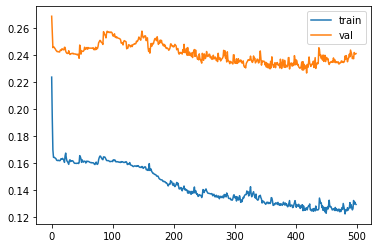

Epoch 1/500
54/78 [===================>..........] - ETA: 0s - loss: 1.1228 - mae: 0.2838
Epoch 00001: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 1.0583 - mae: 0.2849 - val_loss: 0.7700 - val_mae: 0.2578
Epoch 2/500
52/78 [===================>..........] - ETA: 0s - loss: 1.0012 - mae: 0.2718
Epoch 00002: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.9510 - mae: 0.2697 - val_loss: 0.7058 - val_mae: 0.2576
Epoch 3/500
54/78 [===================>..........] - ETA: 0s - loss: 0.9122 - mae: 0.2738
Epoch 00003: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.8469 - mae: 0.2686 - val_loss: 0.7172 - val_mae: 0.2538
Epoch 4/500
55/78 [====================>.........] - ETA: 0s - loss: 0.8785 - mae: 0.2679
Epoch 00004: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.8396 - mae: 0.2653 -

Epoch 33/500
53/78 [===================>..........] - ETA: 0s - loss: 0.7205 - mae: 0.2782
Epoch 00033: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6872 - mae: 0.2731 - val_loss: 0.6533 - val_mae: 0.2684
Epoch 34/500
53/78 [===================>..........] - ETA: 0s - loss: 0.7072 - mae: 0.2754
Epoch 00034: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6790 - mae: 0.2712 - val_loss: 0.6901 - val_mae: 0.2684
Epoch 35/500
53/78 [===================>..........] - ETA: 0s - loss: 0.8417 - mae: 0.2793
Epoch 00035: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7798 - mae: 0.2770 - val_loss: 0.6734 - val_mae: 0.2730
Epoch 36/500
53/78 [===================>..........] - ETA: 0s - loss: 0.7209 - mae: 0.2784
Epoch 00036: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6955 - mae: 0.27

Epoch 65/500
53/78 [===================>..........] - ETA: 0s - loss: 0.6919 - mae: 0.2730
Epoch 00065: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6674 - mae: 0.2692 - val_loss: 0.6421 - val_mae: 0.2655
Epoch 66/500
54/78 [===================>..........] - ETA: 0s - loss: 0.6870 - mae: 0.2708
Epoch 00066: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.6682 - mae: 0.2687 - val_loss: 0.6410 - val_mae: 0.2654
Epoch 67/500
74/78 [===========================>..] - ETA: 0s - loss: 0.6735 - mae: 0.2693
Epoch 00067: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.6655 - mae: 0.2685 - val_loss: 0.6560 - val_mae: 0.2663
Epoch 68/500
54/78 [===================>..........] - ETA: 0s - loss: 0.6962 - mae: 0.2699
Epoch 00068: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.6770 - mae: 0.26

Epoch 97/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7953 - mae: 0.2899
Epoch 00097: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7596 - mae: 0.2872 - val_loss: 0.7126 - val_mae: 0.2809
Epoch 98/500
54/78 [===================>..........] - ETA: 0s - loss: 0.8129 - mae: 0.2951
Epoch 00098: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7593 - mae: 0.2871 - val_loss: 0.7129 - val_mae: 0.2809
Epoch 99/500
53/78 [===================>..........] - ETA: 0s - loss: 0.8206 - mae: 0.2969
Epoch 00099: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7590 - mae: 0.2870 - val_loss: 0.7133 - val_mae: 0.2810
Epoch 100/500
54/78 [===================>..........] - ETA: 0s - loss: 0.8123 - mae: 0.2952
Epoch 00100: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7588 - mae: 0.2

Epoch 129/500
42/78 [===============>..............] - ETA: 0s - loss: 0.8107 - mae: 0.2905
Epoch 00129: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.7527 - mae: 0.2844 - val_loss: 0.7282 - val_mae: 0.2810
Epoch 130/500
44/78 [===============>..............] - ETA: 0s - loss: 0.7886 - mae: 0.2859
Epoch 00130: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7522 - mae: 0.2843 - val_loss: 0.7282 - val_mae: 0.2812
Epoch 131/500
47/78 [=================>............] - ETA: 0s - loss: 0.8159 - mae: 0.2949
Epoch 00131: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7520 - mae: 0.2844 - val_loss: 0.7253 - val_mae: 0.2801
Epoch 132/500
49/78 [=================>............] - ETA: 0s - loss: 0.8104 - mae: 0.2938
Epoch 00132: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7546 - mae: 

Epoch 161/500
52/78 [===================>..........] - ETA: 0s - loss: 0.8125 - mae: 0.2982
Epoch 00161: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7635 - mae: 0.2885 - val_loss: 0.7553 - val_mae: 0.2830
Epoch 162/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7972 - mae: 0.2943
Epoch 00162: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7634 - mae: 0.2885 - val_loss: 0.7552 - val_mae: 0.2830
Epoch 163/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7972 - mae: 0.2943
Epoch 00163: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7632 - mae: 0.2885 - val_loss: 0.7555 - val_mae: 0.2831
Epoch 164/500
47/78 [=================>............] - ETA: 0s - loss: 0.8178 - mae: 0.2993
Epoch 00164: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7631 - mae: 

Epoch 193/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7967 - mae: 0.2947
Epoch 00193: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7616 - mae: 0.2880 - val_loss: 0.7562 - val_mae: 0.2823
Epoch 194/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7967 - mae: 0.2947
Epoch 00194: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7615 - mae: 0.2880 - val_loss: 0.7558 - val_mae: 0.2823
Epoch 195/500
49/78 [=================>............] - ETA: 0s - loss: 0.8157 - mae: 0.2991
Epoch 00195: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7615 - mae: 0.2880 - val_loss: 0.7555 - val_mae: 0.2822
Epoch 196/500
49/78 [=================>............] - ETA: 0s - loss: 0.8157 - mae: 0.2991
Epoch 00196: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7615 - mae: 

Epoch 00224: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7611 - mae: 0.2879 - val_loss: 0.7542 - val_mae: 0.2823
Epoch 225/500
52/78 [===================>..........] - ETA: 0s - loss: 0.8116 - mae: 0.2987
Epoch 00225: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7611 - mae: 0.2879 - val_loss: 0.7545 - val_mae: 0.2823
Epoch 226/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7965 - mae: 0.2947
Epoch 00226: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7611 - mae: 0.2879 - val_loss: 0.7545 - val_mae: 0.2823
Epoch 227/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7965 - mae: 0.2947
Epoch 00227: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7611 - mae: 0.2879 - val_loss: 0.7548 - val_mae: 0.2823
Epoch 228/500
51/78 [==================>........

Epoch 256/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8066 - mae: 0.2961
Epoch 00256: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7664 - mae: 0.2884 - val_loss: 0.7517 - val_mae: 0.2869
Epoch 257/500
49/78 [=================>............] - ETA: 0s - loss: 0.8164 - mae: 0.2984
Epoch 00257: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7663 - mae: 0.2884 - val_loss: 0.7506 - val_mae: 0.2868
Epoch 258/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7972 - mae: 0.2940
Epoch 00258: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7683 - mae: 0.2885 - val_loss: 0.7521 - val_mae: 0.2868
Epoch 259/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8066 - mae: 0.2962
Epoch 00259: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7685 - mae: 

Epoch 288/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8071 - mae: 0.2982
Epoch 00288: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7717 - mae: 0.2898 - val_loss: 0.7588 - val_mae: 0.2902
Epoch 289/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8075 - mae: 0.2981
Epoch 00289: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7700 - mae: 0.2896 - val_loss: 0.7529 - val_mae: 0.2891
Epoch 290/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8072 - mae: 0.2974
Epoch 00290: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7697 - mae: 0.2894 - val_loss: 0.7529 - val_mae: 0.2891
Epoch 291/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7980 - mae: 0.2946
Epoch 00291: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7695 - mae: 

Epoch 320/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7952 - mae: 0.2931
Epoch 00320: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7635 - mae: 0.2879 - val_loss: 0.7515 - val_mae: 0.2877
Epoch 321/500
52/78 [===================>..........] - ETA: 0s - loss: 0.8103 - mae: 0.2969
Epoch 00321: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7633 - mae: 0.2878 - val_loss: 0.7505 - val_mae: 0.2875
Epoch 322/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8045 - mae: 0.2950
Epoch 00322: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7630 - mae: 0.2877 - val_loss: 0.7509 - val_mae: 0.2876
Epoch 323/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8044 - mae: 0.2950
Epoch 00323: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7626 - mae: 

Epoch 352/500
51/78 [==================>...........] - ETA: 0s - loss: 0.8005 - mae: 0.2967
Epoch 00352: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7647 - mae: 0.2898 - val_loss: 0.7629 - val_mae: 0.2904
Epoch 353/500
47/78 [=================>............] - ETA: 0s - loss: 0.8159 - mae: 0.3004
Epoch 00353: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7645 - mae: 0.2897 - val_loss: 0.7629 - val_mae: 0.2904
Epoch 354/500
52/78 [===================>..........] - ETA: 0s - loss: 0.8154 - mae: 0.3007
Epoch 00354: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7644 - mae: 0.2898 - val_loss: 0.7630 - val_mae: 0.2905
Epoch 355/500
51/78 [==================>...........] - ETA: 0s - loss: 0.8003 - mae: 0.2968
Epoch 00355: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7647 - mae: 

Epoch 384/500
42/78 [===============>..............] - ETA: 0s - loss: 0.8027 - mae: 0.2971
Epoch 00384: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7660 - mae: 0.2900 - val_loss: 0.7643 - val_mae: 0.2909
Epoch 385/500
48/78 [=================>............] - ETA: 0s - loss: 0.8284 - mae: 0.3040
Epoch 00385: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7656 - mae: 0.2899 - val_loss: 0.7633 - val_mae: 0.2907
Epoch 386/500
76/78 [============================>.] - ETA: 0s - loss: 0.7719 - mae: 0.2916
Epoch 00386: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 3ms/step - loss: 0.7648 - mae: 0.2897 - val_loss: 0.7628 - val_mae: 0.2904
Epoch 387/500
47/78 [=================>............] - ETA: 0s - loss: 0.8151 - mae: 0.3010
Epoch 00387: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7652 - mae: 

Epoch 416/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7979 - mae: 0.2985
Epoch 00416: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7669 - mae: 0.2898 - val_loss: 0.7810 - val_mae: 0.2946
Epoch 417/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7979 - mae: 0.2985
Epoch 00417: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7669 - mae: 0.2898 - val_loss: 0.7808 - val_mae: 0.2946
Epoch 418/500
51/78 [==================>...........] - ETA: 0s - loss: 0.7979 - mae: 0.2985
Epoch 00418: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7669 - mae: 0.2898 - val_loss: 0.7808 - val_mae: 0.2946
Epoch 419/500
49/78 [=================>............] - ETA: 0s - loss: 0.8166 - mae: 0.3028
Epoch 00419: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7669 - mae: 

Epoch 448/500
47/78 [=================>............] - ETA: 0s - loss: 0.8122 - mae: 0.3032
Epoch 00448: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7737 - mae: 0.2907 - val_loss: 0.7903 - val_mae: 0.2967
Epoch 449/500
52/78 [===================>..........] - ETA: 0s - loss: 0.8118 - mae: 0.3033
Epoch 00449: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7737 - mae: 0.2907 - val_loss: 0.7904 - val_mae: 0.2967
Epoch 450/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8052 - mae: 0.3016
Epoch 00450: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7726 - mae: 0.2908 - val_loss: 0.7901 - val_mae: 0.2966
Epoch 451/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8053 - mae: 0.3011
Epoch 00451: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7774 - mae: 

Epoch 480/500
39/78 [==============>...............] - ETA: 0s - loss: 0.8327 - mae: 0.3059
Epoch 00480: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7748 - mae: 0.2906 - val_loss: 0.7854 - val_mae: 0.2958
Epoch 481/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8058 - mae: 0.3009
Epoch 00481: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7774 - mae: 0.2917 - val_loss: 0.7853 - val_mae: 0.2960
Epoch 482/500
48/78 [=================>............] - ETA: 0s - loss: 0.8254 - mae: 0.3050
Epoch 00482: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7756 - mae: 0.2905 - val_loss: 0.7862 - val_mae: 0.2956
Epoch 483/500
50/78 [==================>...........] - ETA: 0s - loss: 0.8058 - mae: 0.3009
Epoch 00483: val_mae did not improve from 0.10687
78/78 [==============================] - 0s 2ms/step - loss: 0.7756 - mae: 

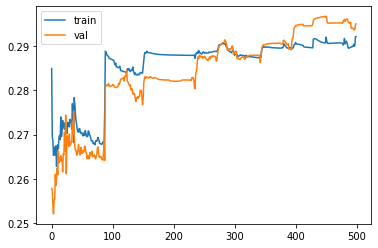

Epoch 1/500
50/84 [================>.............] - ETA: 0s - loss: 0.7162 - mae: 0.2705
Epoch 00001: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.7033 - mae: 0.2663 - val_loss: 0.7814 - val_mae: 0.2831
Epoch 2/500
77/84 [==========================>...] - ETA: 0s - loss: 0.6886 - mae: 0.2569
Epoch 00002: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.7001 - mae: 0.2596 - val_loss: 0.7828 - val_mae: 0.2800
Epoch 3/500
50/84 [================>.............] - ETA: 0s - loss: 0.7108 - mae: 0.2592
Epoch 00003: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2572 - val_loss: 0.7834 - val_mae: 0.2788
Epoch 4/500
51/84 [=================>............] - ETA: 0s - loss: 0.7159 - mae: 0.2595
Epoch 00004: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2563 -

Epoch 33/500
50/84 [================>.............] - ETA: 0s - loss: 0.7108 - mae: 0.2574
Epoch 00033: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6991 - mae: 0.2558 - val_loss: 0.7845 - val_mae: 0.2783
Epoch 34/500
51/84 [=================>............] - ETA: 0s - loss: 0.7162 - mae: 0.2589
Epoch 00034: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6991 - mae: 0.2558 - val_loss: 0.7846 - val_mae: 0.2784
Epoch 35/500
51/84 [=================>............] - ETA: 0s - loss: 0.7162 - mae: 0.2589
Epoch 00035: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6991 - mae: 0.2558 - val_loss: 0.7846 - val_mae: 0.2784
Epoch 36/500
46/84 [===============>..............] - ETA: 0s - loss: 0.6963 - mae: 0.2544
Epoch 00036: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6991 - mae: 0.25

Epoch 65/500
50/84 [================>.............] - ETA: 0s - loss: 0.7107 - mae: 0.2574
Epoch 00065: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2557 - val_loss: 0.7847 - val_mae: 0.2783
Epoch 66/500
49/84 [================>.............] - ETA: 0s - loss: 0.7196 - mae: 0.2594
Epoch 00066: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2557 - val_loss: 0.7847 - val_mae: 0.2783
Epoch 67/500
51/84 [=================>............] - ETA: 0s - loss: 0.7161 - mae: 0.2588
Epoch 00067: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2557 - val_loss: 0.7847 - val_mae: 0.2783
Epoch 68/500
51/84 [=================>............] - ETA: 0s - loss: 0.7161 - mae: 0.2588
Epoch 00068: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.25

Epoch 97/500
52/84 [=================>............] - ETA: 0s - loss: 0.7260 - mae: 0.2611
Epoch 00097: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2557 - val_loss: 0.7846 - val_mae: 0.2783
Epoch 98/500
50/84 [================>.............] - ETA: 0s - loss: 0.7107 - mae: 0.2574
Epoch 00098: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2557 - val_loss: 0.7846 - val_mae: 0.2783
Epoch 99/500
51/84 [=================>............] - ETA: 0s - loss: 0.7161 - mae: 0.2588
Epoch 00099: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2557 - val_loss: 0.7846 - val_mae: 0.2783
Epoch 100/500
51/84 [=================>............] - ETA: 0s - loss: 0.7161 - mae: 0.2588
Epoch 00100: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2

Epoch 129/500
50/84 [================>.............] - ETA: 0s - loss: 0.7107 - mae: 0.2574
Epoch 00129: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2784
Epoch 130/500
50/84 [================>.............] - ETA: 0s - loss: 0.7107 - mae: 0.2574
Epoch 00130: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2784
Epoch 131/500
49/84 [================>.............] - ETA: 0s - loss: 0.7196 - mae: 0.2594
Epoch 00131: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2784
Epoch 132/500
51/84 [=================>............] - ETA: 0s - loss: 0.7161 - mae: 0.2588
Epoch 00132: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 

Epoch 161/500
47/84 [===============>..............] - ETA: 0s - loss: 0.7163 - mae: 0.2587
Epoch 00161: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2784
Epoch 162/500
49/84 [================>.............] - ETA: 0s - loss: 0.7196 - mae: 0.2594
Epoch 00162: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2784
Epoch 163/500
48/84 [================>.............] - ETA: 0s - loss: 0.7289 - mae: 0.2615
Epoch 00163: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2784
Epoch 164/500
48/84 [================>.............] - ETA: 0s - loss: 0.7289 - mae: 0.2615
Epoch 00164: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 

Epoch 193/500
50/84 [================>.............] - ETA: 0s - loss: 0.7106 - mae: 0.2575
Epoch 00193: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6993 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2785
Epoch 194/500
48/84 [================>.............] - ETA: 0s - loss: 0.7288 - mae: 0.2616
Epoch 00194: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6993 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2785
Epoch 195/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2590
Epoch 00195: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6993 - mae: 0.2558 - val_loss: 0.7856 - val_mae: 0.2785
Epoch 196/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2590
Epoch 00196: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6993 - mae: 

Epoch 225/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2591
Epoch 00225: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7855 - val_mae: 0.2785
Epoch 226/500
50/84 [================>.............] - ETA: 0s - loss: 0.7107 - mae: 0.2577
Epoch 00226: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7855 - val_mae: 0.2785
Epoch 227/500
48/84 [================>.............] - ETA: 0s - loss: 0.7288 - mae: 0.2618
Epoch 00227: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7855 - val_mae: 0.2785
Epoch 228/500
50/84 [================>.............] - ETA: 0s - loss: 0.7107 - mae: 0.2577
Epoch 00228: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 

Epoch 257/500
53/84 [=================>............] - ETA: 0s - loss: 0.7300 - mae: 0.2623
Epoch 00257: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7854 - val_mae: 0.2784
Epoch 258/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2592
Epoch 00258: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7854 - val_mae: 0.2784
Epoch 259/500
52/84 [=================>............] - ETA: 0s - loss: 0.7260 - mae: 0.2614
Epoch 00259: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7854 - val_mae: 0.2784
Epoch 260/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2592
Epoch 00260: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 

Epoch 289/500
53/84 [=================>............] - ETA: 0s - loss: 0.7300 - mae: 0.2624
Epoch 00289: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7852 - val_mae: 0.2784
Epoch 290/500
50/84 [================>.............] - ETA: 0s - loss: 0.7106 - mae: 0.2577
Epoch 00290: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7852 - val_mae: 0.2784
Epoch 291/500
50/84 [================>.............] - ETA: 0s - loss: 0.7106 - mae: 0.2577
Epoch 00291: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7852 - val_mae: 0.2784
Epoch 292/500
50/84 [================>.............] - ETA: 0s - loss: 0.7106 - mae: 0.2577
Epoch 00292: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 

Epoch 321/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2592
Epoch 00321: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7852 - val_mae: 0.2784
Epoch 322/500
49/84 [================>.............] - ETA: 0s - loss: 0.7195 - mae: 0.2597
Epoch 00322: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7852 - val_mae: 0.2784
Epoch 323/500
50/84 [================>.............] - ETA: 0s - loss: 0.7106 - mae: 0.2578
Epoch 00323: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.2557 - val_loss: 0.7852 - val_mae: 0.2784
Epoch 324/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2592
Epoch 00324: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 

Epoch 353/500
52/84 [=================>............] - ETA: 0s - loss: 0.7259 - mae: 0.2615
Epoch 00353: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6988 - mae: 0.2557 - val_loss: 0.7827 - val_mae: 0.2779
Epoch 354/500
49/84 [================>.............] - ETA: 0s - loss: 0.7195 - mae: 0.2598
Epoch 00354: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6988 - mae: 0.2557 - val_loss: 0.7825 - val_mae: 0.2778
Epoch 355/500
51/84 [=================>............] - ETA: 0s - loss: 0.7160 - mae: 0.2593
Epoch 00355: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6988 - mae: 0.2557 - val_loss: 0.7827 - val_mae: 0.2779
Epoch 356/500
52/84 [=================>............] - ETA: 0s - loss: 0.7259 - mae: 0.2615
Epoch 00356: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6988 - mae: 

Epoch 385/500
52/84 [=================>............] - ETA: 0s - loss: 0.7258 - mae: 0.2616
Epoch 00385: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2558 - val_loss: 0.7841 - val_mae: 0.2782
Epoch 386/500
49/84 [================>.............] - ETA: 0s - loss: 0.7193 - mae: 0.2598
Epoch 00386: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7841 - val_mae: 0.2782
Epoch 387/500
51/84 [=================>............] - ETA: 0s - loss: 0.7159 - mae: 0.2593
Epoch 00387: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7841 - val_mae: 0.2782
Epoch 388/500
51/84 [=================>............] - ETA: 0s - loss: 0.7158 - mae: 0.2593
Epoch 00388: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 

Epoch 417/500
50/84 [================>.............] - ETA: 0s - loss: 0.7104 - mae: 0.2576
Epoch 00417: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6996 - mae: 0.2557 - val_loss: 0.7842 - val_mae: 0.2780
Epoch 418/500
52/84 [=================>............] - ETA: 0s - loss: 0.7257 - mae: 0.2613
Epoch 00418: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6996 - mae: 0.2557 - val_loss: 0.7842 - val_mae: 0.2780
Epoch 419/500
50/84 [================>.............] - ETA: 0s - loss: 0.7104 - mae: 0.2576
Epoch 00419: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6996 - mae: 0.2557 - val_loss: 0.7842 - val_mae: 0.2780
Epoch 420/500
50/84 [================>.............] - ETA: 0s - loss: 0.7104 - mae: 0.2576
Epoch 00420: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6996 - mae: 

Epoch 449/500
51/84 [=================>............] - ETA: 0s - loss: 0.7158 - mae: 0.2592
Epoch 00449: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7841 - val_mae: 0.2781
Epoch 450/500
46/84 [===============>..............] - ETA: 0s - loss: 0.6962 - mae: 0.2548
Epoch 00450: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7841 - val_mae: 0.2781
Epoch 451/500
49/84 [================>.............] - ETA: 0s - loss: 0.7193 - mae: 0.2598
Epoch 00451: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7841 - val_mae: 0.2781
Epoch 452/500
51/84 [=================>............] - ETA: 0s - loss: 0.7158 - mae: 0.2592
Epoch 00452: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 

Epoch 481/500
50/84 [================>.............] - ETA: 0s - loss: 0.7104 - mae: 0.2578
Epoch 00481: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7840 - val_mae: 0.2781
Epoch 482/500
50/84 [================>.............] - ETA: 0s - loss: 0.7104 - mae: 0.2578
Epoch 00482: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7840 - val_mae: 0.2781
Epoch 483/500
51/84 [=================>............] - ETA: 0s - loss: 0.7158 - mae: 0.2592
Epoch 00483: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2557 - val_loss: 0.7840 - val_mae: 0.2781
Epoch 484/500
50/84 [================>.............] - ETA: 0s - loss: 0.7104 - mae: 0.2578
Epoch 00484: val_mae did not improve from 0.10687
84/84 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 

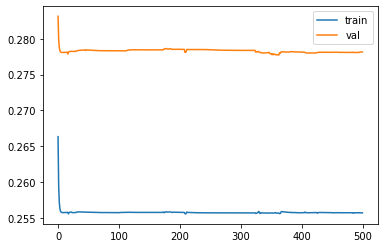

Epoch 1/500
53/79 [===================>..........] - ETA: 0s - loss: 1.0186 - mae: 0.3156
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.9319 - mae: 0.3042 - val_loss: 0.8754 - val_mae: 0.3122
Epoch 2/500
50/79 [=================>............] - ETA: 0s - loss: 0.9332 - mae: 0.3259
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.9006 - mae: 0.3192 - val_loss: 0.8634 - val_mae: 0.3184
Epoch 3/500
51/79 [==================>...........] - ETA: 0s - loss: 0.9244 - mae: 0.3347
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8811 - mae: 0.3241 - val_loss: 0.8523 - val_mae: 0.3224
Epoch 4/500
50/79 [=================>............] - ETA: 0s - loss: 0.9039 - mae: 0.3411
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8672 - mae: 0.3300 -

Epoch 33/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8995 - mae: 0.3433
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8524 - mae: 0.3301 - val_loss: 0.8412 - val_mae: 0.3263
Epoch 34/500
52/79 [==================>...........] - ETA: 0s - loss: 0.9069 - mae: 0.3452
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8523 - mae: 0.3301 - val_loss: 0.8411 - val_mae: 0.3263
Epoch 35/500
50/79 [=================>............] - ETA: 0s - loss: 0.8892 - mae: 0.3406
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8523 - mae: 0.3301 - val_loss: 0.8411 - val_mae: 0.3263
Epoch 36/500
50/79 [=================>............] - ETA: 0s - loss: 0.8892 - mae: 0.3406
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8523 - mae: 0.33

Epoch 65/500
52/79 [==================>...........] - ETA: 0s - loss: 0.9064 - mae: 0.3451
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8521 - mae: 0.3301 - val_loss: 0.8408 - val_mae: 0.3263
Epoch 66/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8990 - mae: 0.3432
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8521 - mae: 0.3301 - val_loss: 0.8408 - val_mae: 0.3263
Epoch 67/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8989 - mae: 0.3432
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8521 - mae: 0.3301 - val_loss: 0.8408 - val_mae: 0.3263
Epoch 68/500
50/79 [=================>............] - ETA: 0s - loss: 0.8887 - mae: 0.3405
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8521 - mae: 0.33

Epoch 97/500
50/79 [=================>............] - ETA: 0s - loss: 0.8886 - mae: 0.3405
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8520 - mae: 0.3301 - val_loss: 0.8406 - val_mae: 0.3262
Epoch 98/500
47/79 [================>.............] - ETA: 0s - loss: 0.9068 - mae: 0.3452
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8520 - mae: 0.3301 - val_loss: 0.8406 - val_mae: 0.3262
Epoch 99/500
49/79 [=================>............] - ETA: 0s - loss: 0.8984 - mae: 0.3429
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8520 - mae: 0.3301 - val_loss: 0.8406 - val_mae: 0.3262
Epoch 100/500
52/79 [==================>...........] - ETA: 0s - loss: 0.9062 - mae: 0.3451
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8520 - mae: 0.3

Epoch 129/500
50/79 [=================>............] - ETA: 0s - loss: 0.8732 - mae: 0.3343
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8186 - mae: 0.3192 - val_loss: 0.8714 - val_mae: 0.3200
Epoch 130/500
49/79 [=================>............] - ETA: 0s - loss: 0.8824 - mae: 0.3376
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8180 - mae: 0.3199 - val_loss: 0.8703 - val_mae: 0.3206
Epoch 131/500
50/79 [=================>............] - ETA: 0s - loss: 0.8715 - mae: 0.3353
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8177 - mae: 0.3204 - val_loss: 0.8697 - val_mae: 0.3210
Epoch 132/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8804 - mae: 0.3381
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8176 - mae: 

Epoch 161/500
50/79 [=================>............] - ETA: 0s - loss: 0.8703 - mae: 0.3357
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8693 - val_mae: 0.3220
Epoch 162/500
49/79 [=================>............] - ETA: 0s - loss: 0.8804 - mae: 0.3383
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8693 - val_mae: 0.3220
Epoch 163/500
50/79 [=================>............] - ETA: 0s - loss: 0.8703 - mae: 0.3357
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8693 - val_mae: 0.3220
Epoch 164/500
50/79 [=================>............] - ETA: 0s - loss: 0.8703 - mae: 0.3357
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 

Epoch 193/500
50/79 [=================>............] - ETA: 0s - loss: 0.8703 - mae: 0.3357
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8694 - val_mae: 0.3220
Epoch 194/500
49/79 [=================>............] - ETA: 0s - loss: 0.8804 - mae: 0.3383
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8694 - val_mae: 0.3220
Epoch 195/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8872 - mae: 0.3401
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8694 - val_mae: 0.3220
Epoch 196/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8872 - mae: 0.3401
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 

Epoch 225/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8872 - mae: 0.3401
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8693 - val_mae: 0.3220
Epoch 226/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8872 - mae: 0.3401
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8693 - val_mae: 0.3220
Epoch 227/500
56/79 [====================>.........] - ETA: 0s - loss: 0.8825 - mae: 0.3385
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 0.3211 - val_loss: 0.8693 - val_mae: 0.3220
Epoch 228/500
53/79 [===================>..........] - ETA: 0s - loss: 0.8918 - mae: 0.3406
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8173 - mae: 

Epoch 257/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8987 - mae: 0.3423
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8410 - mae: 0.3268 - val_loss: 0.8598 - val_mae: 0.3261
Epoch 258/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8910 - mae: 0.3404
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8410 - mae: 0.3269 - val_loss: 0.8598 - val_mae: 0.3261
Epoch 259/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8911 - mae: 0.3405
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8410 - mae: 0.3269 - val_loss: 0.8597 - val_mae: 0.3261
Epoch 260/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8911 - mae: 0.3406
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8410 - mae: 

Epoch 289/500
53/79 [===================>..........] - ETA: 0s - loss: 0.9005 - mae: 0.3427
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8394 - mae: 0.3263 - val_loss: 0.8595 - val_mae: 0.3256
Epoch 290/500
50/79 [=================>............] - ETA: 0s - loss: 0.8790 - mae: 0.3375
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8394 - mae: 0.3263 - val_loss: 0.8595 - val_mae: 0.3256
Epoch 291/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8976 - mae: 0.3423
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8394 - mae: 0.3263 - val_loss: 0.8595 - val_mae: 0.3256
Epoch 292/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8976 - mae: 0.3423
Epoch 00292: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8394 - mae: 

Epoch 321/500
49/79 [=================>............] - ETA: 0s - loss: 0.9319 - mae: 0.3461
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8727 - mae: 0.3332 - val_loss: 0.8773 - val_mae: 0.3325
Epoch 322/500
49/79 [=================>............] - ETA: 0s - loss: 0.9262 - mae: 0.3456
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8699 - mae: 0.3336 - val_loss: 0.8753 - val_mae: 0.3331
Epoch 323/500
50/79 [=================>............] - ETA: 0s - loss: 0.9014 - mae: 0.3441
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8599 - mae: 0.3338 - val_loss: 0.8681 - val_mae: 0.3322
Epoch 324/500
49/79 [=================>............] - ETA: 0s - loss: 0.9006 - mae: 0.3461
Epoch 00324: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8518 - mae: 

Epoch 353/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8890 - mae: 0.3407
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8421 - mae: 0.3278 - val_loss: 0.8578 - val_mae: 0.3268
Epoch 354/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8890 - mae: 0.3407
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8421 - mae: 0.3278 - val_loss: 0.8578 - val_mae: 0.3268
Epoch 355/500
50/79 [=================>............] - ETA: 0s - loss: 0.8783 - mae: 0.3379
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8421 - mae: 0.3278 - val_loss: 0.8578 - val_mae: 0.3268
Epoch 356/500
50/79 [=================>............] - ETA: 0s - loss: 0.8783 - mae: 0.3379
Epoch 00356: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8421 - mae: 

Epoch 385/500
52/79 [==================>...........] - ETA: 0s - loss: 0.9028 - mae: 0.3433
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8445 - mae: 0.3286 - val_loss: 0.8664 - val_mae: 0.3290
Epoch 386/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8931 - mae: 0.3417
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8430 - mae: 0.3286 - val_loss: 0.8671 - val_mae: 0.3288
Epoch 387/500
50/79 [=================>............] - ETA: 0s - loss: 0.8798 - mae: 0.3379
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8411 - mae: 0.3279 - val_loss: 0.8667 - val_mae: 0.3288
Epoch 388/500
49/79 [=================>............] - ETA: 0s - loss: 0.8879 - mae: 0.3403
Epoch 00388: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8400 - mae: 

Epoch 417/500
50/79 [=================>............] - ETA: 0s - loss: 0.8623 - mae: 0.3337
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8325 - mae: 0.3258 - val_loss: 0.8656 - val_mae: 0.3289
Epoch 418/500
50/79 [=================>............] - ETA: 0s - loss: 0.8631 - mae: 0.3331
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8330 - mae: 0.3255 - val_loss: 0.8659 - val_mae: 0.3289
Epoch 419/500
50/79 [=================>............] - ETA: 0s - loss: 0.8634 - mae: 0.3331
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8332 - mae: 0.3255 - val_loss: 0.8664 - val_mae: 0.3290
Epoch 420/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8821 - mae: 0.3378
Epoch 00420: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8332 - mae: 

Epoch 449/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8471 - mae: 0.3252
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8092 - mae: 0.3163 - val_loss: 0.8581 - val_mae: 0.3265
Epoch 450/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8385 - mae: 0.3229
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8095 - mae: 0.3162 - val_loss: 0.8584 - val_mae: 0.3267
Epoch 451/500
49/79 [=================>............] - ETA: 0s - loss: 0.8338 - mae: 0.3215
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8085 - mae: 0.3160 - val_loss: 0.8570 - val_mae: 0.3260
Epoch 452/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8480 - mae: 0.3257
Epoch 00452: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8097 - mae: 

Epoch 481/500
50/79 [=================>............] - ETA: 0s - loss: 0.7868 - mae: 0.3077
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7846 - mae: 0.3073 - val_loss: 0.8579 - val_mae: 0.3221
Epoch 482/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8114 - mae: 0.3131
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7839 - mae: 0.3069 - val_loss: 0.8557 - val_mae: 0.3220
Epoch 483/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7983 - mae: 0.3099
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7825 - mae: 0.3066 - val_loss: 0.8547 - val_mae: 0.3221
Epoch 484/500
48/79 [=================>............] - ETA: 0s - loss: 0.7982 - mae: 0.3100
Epoch 00484: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7811 - mae: 

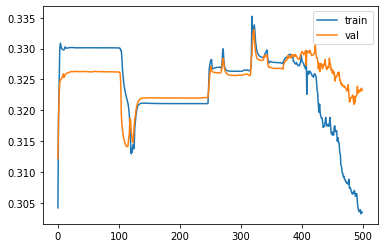

Epoch 1/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6876 - mae: 0.2726
Epoch 00001: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6995 - mae: 0.2677 - val_loss: 0.8009 - val_mae: 0.2784
Epoch 2/500
50/92 [===============>..............] - ETA: 0s - loss: 0.6804 - mae: 0.2520
Epoch 00002: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6824 - mae: 0.2444 - val_loss: 0.7993 - val_mae: 0.2712
Epoch 3/500
51/92 [===============>..............] - ETA: 0s - loss: 0.6706 - mae: 0.2449
Epoch 00003: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6647 - mae: 0.2389 - val_loss: 0.7998 - val_mae: 0.2693
Epoch 4/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6622 - mae: 0.2408
Epoch 00004: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6663 - mae: 0.2385 -

Epoch 33/500
48/92 [==============>...............] - ETA: 0s - loss: 0.6771 - mae: 0.2278
Epoch 00033: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6168 - mae: 0.2249 - val_loss: 0.7983 - val_mae: 0.2544
Epoch 34/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6384 - mae: 0.2194
Epoch 00034: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6162 - mae: 0.2255 - val_loss: 0.7970 - val_mae: 0.2542
Epoch 35/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6324 - mae: 0.2186
Epoch 00035: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6104 - mae: 0.2255 - val_loss: 0.7992 - val_mae: 0.2534
Epoch 36/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6288 - mae: 0.2175
Epoch 00036: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6069 - mae: 0.22

Epoch 65/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6297 - mae: 0.2193
Epoch 00065: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6077 - mae: 0.2250 - val_loss: 0.7994 - val_mae: 0.2535
Epoch 66/500
51/92 [===============>..............] - ETA: 0s - loss: 0.6404 - mae: 0.2215
Epoch 00066: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6079 - mae: 0.2245 - val_loss: 0.7990 - val_mae: 0.2537
Epoch 67/500
50/92 [===============>..............] - ETA: 0s - loss: 0.6495 - mae: 0.2241
Epoch 00067: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6049 - mae: 0.2242 - val_loss: 0.7979 - val_mae: 0.2536
Epoch 68/500
48/92 [==============>...............] - ETA: 0s - loss: 0.6662 - mae: 0.2279
Epoch 00068: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6035 - mae: 0.22

Epoch 97/500
49/92 [==============>...............] - ETA: 0s - loss: 0.6565 - mae: 0.2400
Epoch 00097: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6291 - mae: 0.2332 - val_loss: 0.7929 - val_mae: 0.2598
Epoch 98/500
51/92 [===============>..............] - ETA: 0s - loss: 0.6436 - mae: 0.2366
Epoch 00098: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6310 - mae: 0.2332 - val_loss: 0.8026 - val_mae: 0.2610
Epoch 99/500
52/92 [===============>..............] - ETA: 0s - loss: 0.6468 - mae: 0.2356
Epoch 00099: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6385 - mae: 0.2340 - val_loss: 0.7993 - val_mae: 0.2613
Epoch 100/500
77/92 [========================>.....] - ETA: 0s - loss: 0.6378 - mae: 0.2330
Epoch 00100: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6360 - mae: 0.2

Epoch 129/500
51/92 [===============>..............] - ETA: 0s - loss: 0.6207 - mae: 0.2272
Epoch 00129: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6004 - mae: 0.2245 - val_loss: 1.1042 - val_mae: 0.2738
Epoch 130/500
49/92 [==============>...............] - ETA: 0s - loss: 0.7077 - mae: 0.2240
Epoch 00130: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6370 - mae: 0.2165 - val_loss: 0.7864 - val_mae: 0.2402
Epoch 131/500
49/92 [==============>...............] - ETA: 0s - loss: 0.6450 - mae: 0.2259
Epoch 00131: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.6080 - mae: 0.2216 - val_loss: 0.7969 - val_mae: 0.2445
Epoch 132/500
50/92 [===============>..............] - ETA: 0s - loss: 0.6082 - mae: 0.2248
Epoch 00132: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.5861 - mae: 

Epoch 161/500
51/92 [===============>..............] - ETA: 0s - loss: 0.5004 - mae: 0.2109
Epoch 00161: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.5203 - mae: 0.2187 - val_loss: 0.8044 - val_mae: 0.2351
Epoch 162/500
50/92 [===============>..............] - ETA: 0s - loss: 0.5116 - mae: 0.2132
Epoch 00162: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.5234 - mae: 0.2185 - val_loss: 0.8704 - val_mae: 0.2468
Epoch 163/500
51/92 [===============>..............] - ETA: 0s - loss: 0.5093 - mae: 0.2185
Epoch 00163: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.5246 - mae: 0.2215 - val_loss: 0.7839 - val_mae: 0.2303
Epoch 164/500
50/92 [===============>..............] - ETA: 0s - loss: 0.5058 - mae: 0.2134
Epoch 00164: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.5204 - mae: 

Epoch 193/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4747 - mae: 0.1974
Epoch 00193: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4970 - mae: 0.2091 - val_loss: 0.8095 - val_mae: 0.2266
Epoch 194/500
52/92 [===============>..............] - ETA: 0s - loss: 0.4702 - mae: 0.1966
Epoch 00194: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4967 - mae: 0.2090 - val_loss: 0.8182 - val_mae: 0.2249
Epoch 195/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4746 - mae: 0.1968
Epoch 00195: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4984 - mae: 0.2087 - val_loss: 0.8107 - val_mae: 0.2245
Epoch 196/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4718 - mae: 0.1962
Epoch 00196: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4984 - mae: 

Epoch 225/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4598 - mae: 0.1924
Epoch 00225: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4843 - mae: 0.2045 - val_loss: 0.8289 - val_mae: 0.2183
Epoch 226/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4637 - mae: 0.1931
Epoch 00226: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4822 - mae: 0.2037 - val_loss: 0.8324 - val_mae: 0.2190
Epoch 227/500
49/92 [==============>...............] - ETA: 0s - loss: 0.4736 - mae: 0.1949
Epoch 00227: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4973 - mae: 0.2042 - val_loss: 0.8330 - val_mae: 0.2234
Epoch 228/500
52/92 [===============>..............] - ETA: 0s - loss: 0.4564 - mae: 0.1925
Epoch 00228: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4874 - mae: 

Epoch 257/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4539 - mae: 0.1906
Epoch 00257: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4819 - mae: 0.2027 - val_loss: 0.8394 - val_mae: 0.2140
Epoch 258/500
91/92 [============================>.] - ETA: 0s - loss: 0.4753 - mae: 0.1998
Epoch 00258: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4750 - mae: 0.1997 - val_loss: 0.8498 - val_mae: 0.2142
Epoch 259/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4518 - mae: 0.1869
Epoch 00259: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4797 - mae: 0.1995 - val_loss: 0.8240 - val_mae: 0.2184
Epoch 260/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4472 - mae: 0.1908
Epoch 00260: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4747 - mae: 

Epoch 289/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4508 - mae: 0.1870
Epoch 00289: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4733 - mae: 0.1995 - val_loss: 0.8724 - val_mae: 0.2152
Epoch 290/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4449 - mae: 0.1861
Epoch 00290: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4699 - mae: 0.1981 - val_loss: 0.8755 - val_mae: 0.2135
Epoch 291/500
52/92 [===============>..............] - ETA: 0s - loss: 0.4408 - mae: 0.1850
Epoch 00291: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4698 - mae: 0.1978 - val_loss: 0.8609 - val_mae: 0.2142
Epoch 292/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4461 - mae: 0.1864
Epoch 00292: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4682 - mae: 

Epoch 321/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4401 - mae: 0.1847
Epoch 00321: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4630 - mae: 0.1965 - val_loss: 0.8480 - val_mae: 0.2163
Epoch 322/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4299 - mae: 0.1823
Epoch 00322: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4605 - mae: 0.1953 - val_loss: 0.8627 - val_mae: 0.2164
Epoch 323/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4417 - mae: 0.1842
Epoch 00323: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4636 - mae: 0.1956 - val_loss: 0.8409 - val_mae: 0.2173
Epoch 324/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4486 - mae: 0.1895
Epoch 00324: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4686 - mae: 

Epoch 353/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4506 - mae: 0.1859
Epoch 00353: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4689 - mae: 0.1971 - val_loss: 0.8411 - val_mae: 0.2172
Epoch 354/500
48/92 [==============>...............] - ETA: 0s - loss: 0.4484 - mae: 0.1889
Epoch 00354: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4601 - mae: 0.1947 - val_loss: 0.8683 - val_mae: 0.2183
Epoch 355/500
53/92 [================>.............] - ETA: 0s - loss: 0.4323 - mae: 0.1835
Epoch 00355: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4571 - mae: 0.1946 - val_loss: 0.8474 - val_mae: 0.2189
Epoch 356/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4354 - mae: 0.1833
Epoch 00356: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4689 - mae: 

Epoch 385/500
49/92 [==============>...............] - ETA: 0s - loss: 0.4446 - mae: 0.1859
Epoch 00385: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4598 - mae: 0.1954 - val_loss: 0.8359 - val_mae: 0.2145
Epoch 386/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4397 - mae: 0.1841
Epoch 00386: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4646 - mae: 0.1965 - val_loss: 0.8770 - val_mae: 0.2183
Epoch 387/500
49/92 [==============>...............] - ETA: 0s - loss: 0.4429 - mae: 0.1835
Epoch 00387: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4579 - mae: 0.1935 - val_loss: 0.8775 - val_mae: 0.2167
Epoch 388/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4255 - mae: 0.1789
Epoch 00388: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4556 - mae: 

Epoch 417/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4257 - mae: 0.1800
Epoch 00417: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4517 - mae: 0.1925 - val_loss: 0.8600 - val_mae: 0.2154
Epoch 418/500
48/92 [==============>...............] - ETA: 0s - loss: 0.4495 - mae: 0.1860
Epoch 00418: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4536 - mae: 0.1916 - val_loss: 0.8479 - val_mae: 0.2113
Epoch 419/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4264 - mae: 0.1780
Epoch 00419: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4481 - mae: 0.1897 - val_loss: 0.8511 - val_mae: 0.2132
Epoch 420/500
52/92 [===============>..............] - ETA: 0s - loss: 0.4241 - mae: 0.1793
Epoch 00420: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4571 - mae: 

Epoch 449/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4322 - mae: 0.1776
Epoch 00449: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4512 - mae: 0.1905 - val_loss: 0.8647 - val_mae: 0.2148
Epoch 450/500
52/92 [===============>..............] - ETA: 0s - loss: 0.4242 - mae: 0.1775
Epoch 00450: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4583 - mae: 0.1900 - val_loss: 0.8626 - val_mae: 0.2166
Epoch 451/500
51/92 [===============>..............] - ETA: 0s - loss: 0.4515 - mae: 0.1875
Epoch 00451: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4688 - mae: 0.1986 - val_loss: 0.8755 - val_mae: 0.2161
Epoch 452/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4515 - mae: 0.1797
Epoch 00452: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4633 - mae: 

Epoch 481/500
50/92 [===============>..............] - ETA: 0s - loss: 0.4297 - mae: 0.1778
Epoch 00481: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4515 - mae: 0.1898 - val_loss: 0.8234 - val_mae: 0.2146
Epoch 482/500
49/92 [==============>...............] - ETA: 0s - loss: 0.4296 - mae: 0.1810
Epoch 00482: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4445 - mae: 0.1895 - val_loss: 0.8404 - val_mae: 0.2132
Epoch 483/500
49/92 [==============>...............] - ETA: 0s - loss: 0.4398 - mae: 0.1828
Epoch 00483: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4532 - mae: 0.1902 - val_loss: 0.8173 - val_mae: 0.2132
Epoch 484/500
52/92 [===============>..............] - ETA: 0s - loss: 0.4187 - mae: 0.1771
Epoch 00484: val_mae did not improve from 0.10687
92/92 [==============================] - 0s 2ms/step - loss: 0.4523 - mae: 

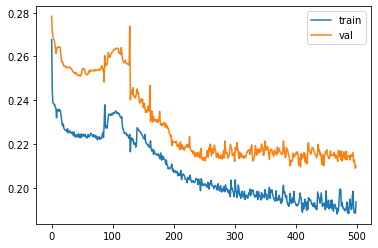

Epoch 1/500
51/99 [==============>...............] - ETA: 0s - loss: 0.8399 - mae: 0.2533
Epoch 00001: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.8342 - mae: 0.2561 - val_loss: 0.4388 - val_mae: 0.2068
Epoch 2/500
96/99 [============================>.] - ETA: 0s - loss: 0.7208 - mae: 0.2538
Epoch 00002: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.7114 - mae: 0.2520 - val_loss: 0.4261 - val_mae: 0.1909
Epoch 3/500
51/99 [==============>...............] - ETA: 0s - loss: 0.6742 - mae: 0.2516
Epoch 00003: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6939 - mae: 0.2543 - val_loss: 0.4177 - val_mae: 0.1896
Epoch 4/500
50/99 [==============>...............] - ETA: 0s - loss: 0.6387 - mae: 0.2499
Epoch 00004: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6597 - mae: 0.2534 -

Epoch 33/500
98/99 [============================>.] - ETA: 0s - loss: 0.5981 - mae: 0.2419
Epoch 00033: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5979 - mae: 0.2420 - val_loss: 0.4318 - val_mae: 0.1924
Epoch 34/500
51/99 [==============>...............] - ETA: 0s - loss: 0.6046 - mae: 0.2409
Epoch 00034: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5899 - mae: 0.2434 - val_loss: 0.4154 - val_mae: 0.1824
Epoch 35/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5931 - mae: 0.2349
Epoch 00035: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5792 - mae: 0.2388 - val_loss: 0.4131 - val_mae: 0.1814
Epoch 36/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5850 - mae: 0.2331
Epoch 00036: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5764 - mae: 0.23

Epoch 65/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5645 - mae: 0.2245
Epoch 00065: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5658 - mae: 0.2344 - val_loss: 0.4038 - val_mae: 0.1776
Epoch 66/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5482 - mae: 0.2222
Epoch 00066: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5714 - mae: 0.2372 - val_loss: 0.3971 - val_mae: 0.1757
Epoch 67/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5491 - mae: 0.2236
Epoch 00067: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5743 - mae: 0.2393 - val_loss: 0.3985 - val_mae: 0.1758
Epoch 68/500
49/99 [=============>................] - ETA: 0s - loss: 0.5790 - mae: 0.2299
Epoch 00068: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5788 - mae: 0.24

Epoch 97/500
49/99 [=============>................] - ETA: 0s - loss: 0.5882 - mae: 0.2249
Epoch 00097: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6027 - mae: 0.2339 - val_loss: 0.4302 - val_mae: 0.1935
Epoch 98/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5820 - mae: 0.2344
Epoch 00098: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5701 - mae: 0.2383 - val_loss: 0.4077 - val_mae: 0.1817
Epoch 99/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5666 - mae: 0.2254
Epoch 00099: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5712 - mae: 0.2348 - val_loss: 0.4055 - val_mae: 0.1785
Epoch 100/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5684 - mae: 0.2262
Epoch 00100: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5648 - mae: 0.2

Epoch 129/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5438 - mae: 0.2197
Epoch 00129: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5543 - mae: 0.2314 - val_loss: 0.4212 - val_mae: 0.1806
Epoch 130/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5625 - mae: 0.2191
Epoch 00130: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5567 - mae: 0.2275 - val_loss: 0.4031 - val_mae: 0.1810
Epoch 131/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5508 - mae: 0.2190
Epoch 00131: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5741 - mae: 0.2263 - val_loss: 0.3974 - val_mae: 0.1852
Epoch 132/500
99/99 [==============================] - ETA: 0s - loss: 0.5720 - mae: 0.2323
Epoch 00132: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5720 - mae: 

Epoch 161/500
99/99 [==============================] - ETA: 0s - loss: 0.5715 - mae: 0.2392
Epoch 00161: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5715 - mae: 0.2392 - val_loss: 0.4134 - val_mae: 0.1854
Epoch 162/500
98/99 [============================>.] - ETA: 0s - loss: 0.5874 - mae: 0.2359
Epoch 00162: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5871 - mae: 0.2360 - val_loss: 0.4119 - val_mae: 0.1882
Epoch 163/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5461 - mae: 0.2291
Epoch 00163: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5739 - mae: 0.2357 - val_loss: 0.4074 - val_mae: 0.1842
Epoch 164/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5622 - mae: 0.2334
Epoch 00164: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5916 - mae: 

Epoch 193/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5623 - mae: 0.2253
Epoch 00193: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5838 - mae: 0.2424 - val_loss: 0.3967 - val_mae: 0.1742
Epoch 194/500
49/99 [=============>................] - ETA: 0s - loss: 0.5809 - mae: 0.2299
Epoch 00194: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5919 - mae: 0.2440 - val_loss: 0.3996 - val_mae: 0.1749
Epoch 195/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5850 - mae: 0.2288
Epoch 00195: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6007 - mae: 0.2455 - val_loss: 0.3900 - val_mae: 0.1788
Epoch 196/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5706 - mae: 0.2293
Epoch 00196: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5969 - mae: 

Epoch 225/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5852 - mae: 0.2263
Epoch 00225: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5818 - mae: 0.2357 - val_loss: 0.3863 - val_mae: 0.1707
Epoch 226/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5890 - mae: 0.2259
Epoch 00226: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5858 - mae: 0.2348 - val_loss: 0.3906 - val_mae: 0.1711
Epoch 227/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5853 - mae: 0.2240
Epoch 00227: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5834 - mae: 0.2351 - val_loss: 0.3924 - val_mae: 0.1725
Epoch 228/500
50/99 [==============>...............] - ETA: 0s - loss: 0.6098 - mae: 0.2311
Epoch 00228: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5976 - mae: 

Epoch 257/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5953 - mae: 0.2423
Epoch 00257: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5986 - mae: 0.2491 - val_loss: 0.3936 - val_mae: 0.1816
Epoch 258/500
99/99 [==============================] - ETA: 0s - loss: 0.5989 - mae: 0.2492
Epoch 00258: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5989 - mae: 0.2492 - val_loss: 0.3938 - val_mae: 0.1811
Epoch 259/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5960 - mae: 0.2421
Epoch 00259: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5984 - mae: 0.2493 - val_loss: 0.3914 - val_mae: 0.1806
Epoch 260/500
99/99 [==============================] - ETA: 0s - loss: 0.5976 - mae: 0.2480
Epoch 00260: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5976 - mae: 

Epoch 289/500
51/99 [==============>...............] - ETA: 0s - loss: 0.6046 - mae: 0.2536
Epoch 00289: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6026 - mae: 0.2504 - val_loss: 0.4156 - val_mae: 0.1938
Epoch 290/500
99/99 [==============================] - ETA: 0s - loss: 0.6030 - mae: 0.2509
Epoch 00290: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6030 - mae: 0.2509 - val_loss: 0.4179 - val_mae: 0.1945
Epoch 291/500
98/99 [============================>.] - ETA: 0s - loss: 0.6007 - mae: 0.2507
Epoch 00291: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5998 - mae: 0.2505 - val_loss: 0.4143 - val_mae: 0.1929
Epoch 292/500
49/99 [=============>................] - ETA: 0s - loss: 0.6127 - mae: 0.2554
Epoch 00292: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5974 - mae: 

Epoch 321/500
51/99 [==============>...............] - ETA: 0s - loss: 0.6394 - mae: 0.2532
Epoch 00321: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6184 - mae: 0.2500 - val_loss: 0.4237 - val_mae: 0.2009
Epoch 322/500
51/99 [==============>...............] - ETA: 0s - loss: 0.6126 - mae: 0.2593
Epoch 00322: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6079 - mae: 0.2540 - val_loss: 0.4210 - val_mae: 0.1992
Epoch 323/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5941 - mae: 0.2502
Epoch 00323: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6006 - mae: 0.2489 - val_loss: 0.4182 - val_mae: 0.1977
Epoch 324/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5868 - mae: 0.2475
Epoch 00324: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6046 - mae: 

Epoch 353/500
49/99 [=============>................] - ETA: 0s - loss: 0.5771 - mae: 0.2409
Epoch 00353: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5791 - mae: 0.2415 - val_loss: 0.4155 - val_mae: 0.1899
Epoch 354/500
50/99 [==============>...............] - ETA: 0s - loss: 0.6326 - mae: 0.2552
Epoch 00354: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6102 - mae: 0.2520 - val_loss: 0.4251 - val_mae: 0.1959
Epoch 355/500
49/99 [=============>................] - ETA: 0s - loss: 0.5875 - mae: 0.2469
Epoch 00355: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5857 - mae: 0.2456 - val_loss: 0.4134 - val_mae: 0.1875
Epoch 356/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5744 - mae: 0.2403
Epoch 00356: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5860 - mae: 

Epoch 385/500
51/99 [==============>...............] - ETA: 0s - loss: 0.6125 - mae: 0.2397
Epoch 00385: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6266 - mae: 0.2525 - val_loss: 0.4390 - val_mae: 0.2083
Epoch 386/500
99/99 [==============================] - ETA: 0s - loss: 0.5846 - mae: 0.2461
Epoch 00386: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5846 - mae: 0.2461 - val_loss: 0.4315 - val_mae: 0.2012
Epoch 387/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5510 - mae: 0.2351
Epoch 00387: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5889 - mae: 0.2461 - val_loss: 0.4217 - val_mae: 0.1960
Epoch 388/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5542 - mae: 0.2387
Epoch 00388: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5840 - mae: 

Epoch 417/500
98/99 [============================>.] - ETA: 0s - loss: 0.6251 - mae: 0.2464
Epoch 00417: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6239 - mae: 0.2462 - val_loss: 0.4218 - val_mae: 0.1962
Epoch 418/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5187 - mae: 0.2215
Epoch 00418: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6202 - mae: 0.2472 - val_loss: 0.4380 - val_mae: 0.2051
Epoch 419/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5176 - mae: 0.2224
Epoch 00419: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6196 - mae: 0.2477 - val_loss: 0.4457 - val_mae: 0.2089
Epoch 420/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5229 - mae: 0.2251
Epoch 00420: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6226 - mae: 

Epoch 449/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5066 - mae: 0.2187
Epoch 00449: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5864 - mae: 0.2414 - val_loss: 0.4478 - val_mae: 0.1998
Epoch 450/500
52/99 [==============>...............] - ETA: 0s - loss: 0.5023 - mae: 0.2187
Epoch 00450: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5966 - mae: 0.2422 - val_loss: 0.4433 - val_mae: 0.1973
Epoch 451/500
50/99 [==============>...............] - ETA: 0s - loss: 0.5125 - mae: 0.2198
Epoch 00451: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5982 - mae: 0.2428 - val_loss: 0.4527 - val_mae: 0.2051
Epoch 452/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5147 - mae: 0.2233
Epoch 00452: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5882 - mae: 

Epoch 00480: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6070 - mae: 0.2503 - val_loss: 0.4488 - val_mae: 0.2027
Epoch 481/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5469 - mae: 0.2247
Epoch 00481: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6026 - mae: 0.2463 - val_loss: 0.4753 - val_mae: 0.2139
Epoch 482/500
49/99 [=============>................] - ETA: 0s - loss: 0.5634 - mae: 0.2357
Epoch 00482: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.6098 - mae: 0.2498 - val_loss: 0.4605 - val_mae: 0.2076
Epoch 483/500
51/99 [==============>...............] - ETA: 0s - loss: 0.5394 - mae: 0.2293
Epoch 00483: val_mae did not improve from 0.10687
99/99 [==============================] - 0s 2ms/step - loss: 0.5944 - mae: 0.2477 - val_loss: 0.4616 - val_mae: 0.2066
Epoch 484/500
98/99 [===========================

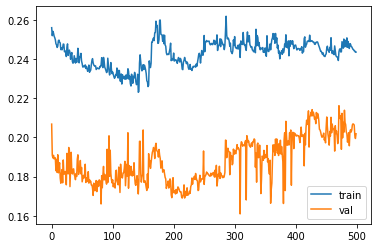

Epoch 1/500
51/79 [==================>...........] - ETA: 0s - loss: 1.0819 - mae: 0.3244
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.9801 - mae: 0.3097 - val_loss: 0.7905 - val_mae: 0.2804
Epoch 2/500
47/79 [================>.............] - ETA: 0s - loss: 0.9139 - mae: 0.3203
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8624 - mae: 0.3149 - val_loss: 0.7593 - val_mae: 0.2936
Epoch 3/500
49/79 [=================>............] - ETA: 0s - loss: 0.8489 - mae: 0.3207
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8203 - mae: 0.3173 - val_loss: 0.7782 - val_mae: 0.3002
Epoch 4/500
49/79 [=================>............] - ETA: 0s - loss: 0.8275 - mae: 0.3240
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8035 - mae: 0.3193 -

Epoch 33/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7832 - mae: 0.3214
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7643 - mae: 0.3149 - val_loss: 0.7516 - val_mae: 0.2946
Epoch 34/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7707 - mae: 0.3191
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7597 - mae: 0.3142 - val_loss: 0.7593 - val_mae: 0.2947
Epoch 35/500
48/79 [=================>............] - ETA: 0s - loss: 0.7808 - mae: 0.3207
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7608 - mae: 0.3138 - val_loss: 0.7472 - val_mae: 0.2944
Epoch 36/500
49/79 [=================>............] - ETA: 0s - loss: 0.7668 - mae: 0.3174
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7590 - mae: 0.31

Epoch 65/500
49/79 [=================>............] - ETA: 0s - loss: 0.7412 - mae: 0.3117
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7319 - mae: 0.3073 - val_loss: 0.7618 - val_mae: 0.2931
Epoch 66/500
50/79 [=================>............] - ETA: 0s - loss: 0.7492 - mae: 0.3142
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7310 - mae: 0.3073 - val_loss: 0.7651 - val_mae: 0.2932
Epoch 67/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7435 - mae: 0.3127
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7306 - mae: 0.3071 - val_loss: 0.7650 - val_mae: 0.2940
Epoch 68/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7425 - mae: 0.3126
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7300 - mae: 0.30

Epoch 97/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7296 - mae: 0.3072
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7301 - mae: 0.3054 - val_loss: 0.7563 - val_mae: 0.2916
Epoch 98/500
49/79 [=================>............] - ETA: 0s - loss: 0.7301 - mae: 0.3072
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7293 - mae: 0.3052 - val_loss: 0.7571 - val_mae: 0.2913
Epoch 99/500
50/79 [=================>............] - ETA: 0s - loss: 0.7489 - mae: 0.3119
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7390 - mae: 0.3066 - val_loss: 0.7643 - val_mae: 0.2914
Epoch 100/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7418 - mae: 0.3101
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7345 - mae: 0.3

Epoch 129/500
49/79 [=================>............] - ETA: 0s - loss: 0.7313 - mae: 0.3089
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7315 - mae: 0.3070 - val_loss: 0.7241 - val_mae: 0.2887
Epoch 130/500
48/79 [=================>............] - ETA: 0s - loss: 0.7407 - mae: 0.3124
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7284 - mae: 0.3071 - val_loss: 0.7174 - val_mae: 0.2887
Epoch 131/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7341 - mae: 0.3111
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7308 - mae: 0.3083 - val_loss: 0.7310 - val_mae: 0.2898
Epoch 132/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7335 - mae: 0.3111
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7258 - mae: 

Epoch 161/500
50/79 [=================>............] - ETA: 0s - loss: 0.7239 - mae: 0.3041
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7135 - mae: 0.2992 - val_loss: 0.7541 - val_mae: 0.2873
Epoch 162/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7233 - mae: 0.3041
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7184 - mae: 0.3006 - val_loss: 0.7570 - val_mae: 0.2874
Epoch 163/500
50/79 [=================>............] - ETA: 0s - loss: 0.7245 - mae: 0.3048
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7137 - mae: 0.2997 - val_loss: 0.7517 - val_mae: 0.2869
Epoch 164/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7158 - mae: 0.3025
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7122 - mae: 

Epoch 193/500
49/79 [=================>............] - ETA: 0s - loss: 0.7171 - mae: 0.2999
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7117 - mae: 0.2987 - val_loss: 0.7606 - val_mae: 0.2874
Epoch 194/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7288 - mae: 0.3028
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7183 - mae: 0.3003 - val_loss: 0.7707 - val_mae: 0.2896
Epoch 195/500
36/79 [============>.................] - ETA: 0s - loss: 0.7481 - mae: 0.3077
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7207 - mae: 0.3015 - val_loss: 0.7648 - val_mae: 0.2895
Epoch 196/500
50/79 [=================>............] - ETA: 0s - loss: 0.7367 - mae: 0.3063
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7191 - mae: 

Epoch 225/500
50/79 [=================>............] - ETA: 0s - loss: 0.7074 - mae: 0.2940
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6979 - mae: 0.2925 - val_loss: 0.7484 - val_mae: 0.2830
Epoch 226/500
50/79 [=================>............] - ETA: 0s - loss: 0.7216 - mae: 0.2975
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7091 - mae: 0.2952 - val_loss: 0.7654 - val_mae: 0.2826
Epoch 227/500
50/79 [=================>............] - ETA: 0s - loss: 0.7316 - mae: 0.3003
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7168 - mae: 0.2978 - val_loss: 0.7471 - val_mae: 0.2848
Epoch 228/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7008 - mae: 0.2952
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7012 - mae: 

Epoch 257/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7189 - mae: 0.2952
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7126 - mae: 0.2952 - val_loss: 0.7671 - val_mae: 0.2845
Epoch 258/500
46/79 [================>.............] - ETA: 0s - loss: 0.7294 - mae: 0.2962
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7100 - mae: 0.2943 - val_loss: 0.7710 - val_mae: 0.2854
Epoch 259/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7261 - mae: 0.2955
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7152 - mae: 0.2951 - val_loss: 0.7697 - val_mae: 0.2854
Epoch 260/500
50/79 [=================>............] - ETA: 0s - loss: 0.7333 - mae: 0.2972
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7171 - mae: 

Epoch 289/500
48/79 [=================>............] - ETA: 0s - loss: 0.6999 - mae: 0.2886
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6930 - mae: 0.2898 - val_loss: 0.7723 - val_mae: 0.2826
Epoch 290/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7031 - mae: 0.2890
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6966 - mae: 0.2899 - val_loss: 0.7735 - val_mae: 0.2821
Epoch 291/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6952 - mae: 0.2871
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6930 - mae: 0.2883 - val_loss: 0.7632 - val_mae: 0.2809
Epoch 292/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6951 - mae: 0.2863
Epoch 00292: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6931 - mae: 

Epoch 321/500
50/79 [=================>............] - ETA: 0s - loss: 0.7088 - mae: 0.2902
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6932 - mae: 0.2880 - val_loss: 0.7686 - val_mae: 0.2799
Epoch 322/500
49/79 [=================>............] - ETA: 0s - loss: 0.6984 - mae: 0.2872
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6930 - mae: 0.2880 - val_loss: 0.7734 - val_mae: 0.2802
Epoch 323/500
50/79 [=================>............] - ETA: 0s - loss: 0.7018 - mae: 0.2891
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6886 - mae: 0.2873 - val_loss: 0.7752 - val_mae: 0.2802
Epoch 324/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7006 - mae: 0.2881
Epoch 00324: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6927 - mae: 

Epoch 353/500
50/79 [=================>............] - ETA: 0s - loss: 0.7048 - mae: 0.2905
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6891 - mae: 0.2880 - val_loss: 0.7415 - val_mae: 0.2787
Epoch 354/500
50/79 [=================>............] - ETA: 0s - loss: 0.7045 - mae: 0.2895
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6923 - mae: 0.2883 - val_loss: 0.7394 - val_mae: 0.2793
Epoch 355/500
48/79 [=================>............] - ETA: 0s - loss: 0.6982 - mae: 0.2890
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6910 - mae: 0.2891 - val_loss: 0.7417 - val_mae: 0.2796
Epoch 356/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6944 - mae: 0.2886
Epoch 00356: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - mae: 

Epoch 385/500
50/79 [=================>............] - ETA: 0s - loss: 0.7138 - mae: 0.2951
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6956 - mae: 0.2907 - val_loss: 0.7647 - val_mae: 0.2829
Epoch 386/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7155 - mae: 0.2964
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7012 - mae: 0.2929 - val_loss: 0.7642 - val_mae: 0.2833
Epoch 387/500
49/79 [=================>............] - ETA: 0s - loss: 0.7026 - mae: 0.2943
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6935 - mae: 0.2924 - val_loss: 0.7563 - val_mae: 0.2820
Epoch 388/500
50/79 [=================>............] - ETA: 0s - loss: 0.7016 - mae: 0.2940
Epoch 00388: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6861 - mae: 

Epoch 417/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6814 - mae: 0.2843
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6785 - mae: 0.2845 - val_loss: 0.7522 - val_mae: 0.2816
Epoch 418/500
49/79 [=================>............] - ETA: 0s - loss: 0.6852 - mae: 0.2843
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6766 - mae: 0.2841 - val_loss: 0.7577 - val_mae: 0.2820
Epoch 419/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6836 - mae: 0.2848
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6758 - mae: 0.2841 - val_loss: 0.7593 - val_mae: 0.2818
Epoch 420/500
49/79 [=================>............] - ETA: 0s - loss: 0.6781 - mae: 0.2820
Epoch 00420: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6732 - mae: 

Epoch 449/500
50/79 [=================>............] - ETA: 0s - loss: 0.6909 - mae: 0.2818
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6701 - mae: 0.2786 - val_loss: 0.7565 - val_mae: 0.2812
Epoch 450/500
50/79 [=================>............] - ETA: 0s - loss: 0.7084 - mae: 0.2849
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6779 - mae: 0.2795 - val_loss: 0.7730 - val_mae: 0.2759
Epoch 451/500
49/79 [=================>............] - ETA: 0s - loss: 0.6989 - mae: 0.2805
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6770 - mae: 0.2792 - val_loss: 0.7705 - val_mae: 0.2766
Epoch 452/500
50/79 [=================>............] - ETA: 0s - loss: 0.7000 - mae: 0.2832
Epoch 00452: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6699 - mae: 

Epoch 481/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6892 - mae: 0.2805
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6725 - mae: 0.2801 - val_loss: 0.7341 - val_mae: 0.2820
Epoch 482/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6697 - mae: 0.2753
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6624 - mae: 0.2772 - val_loss: 0.7446 - val_mae: 0.2813
Epoch 483/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6663 - mae: 0.2741
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6611 - mae: 0.2765 - val_loss: 0.7522 - val_mae: 0.2821
Epoch 484/500
49/79 [=================>............] - ETA: 0s - loss: 0.6710 - mae: 0.2748
Epoch 00484: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6610 - mae: 

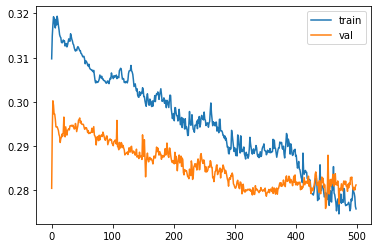

Epoch 1/500
53/79 [===================>..........] - ETA: 0s - loss: 1.0775 - mae: 0.3196
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 1.0194 - mae: 0.3100 - val_loss: 0.8267 - val_mae: 0.2904
Epoch 2/500
49/79 [=================>............] - ETA: 0s - loss: 0.9844 - mae: 0.3168
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.9330 - mae: 0.3073 - val_loss: 0.7904 - val_mae: 0.2950
Epoch 3/500
44/79 [===============>..............] - ETA: 0s - loss: 0.9092 - mae: 0.3147
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8700 - mae: 0.3099 - val_loss: 0.7660 - val_mae: 0.3021
Epoch 4/500
50/79 [=================>............] - ETA: 0s - loss: 0.8711 - mae: 0.3244
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8433 - mae: 0.3174 -

Epoch 33/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8270 - mae: 0.3214
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8219 - mae: 0.3166 - val_loss: 0.7791 - val_mae: 0.3103
Epoch 34/500
49/79 [=================>............] - ETA: 0s - loss: 0.8379 - mae: 0.3214
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8406 - mae: 0.3226 - val_loss: 0.7835 - val_mae: 0.3161
Epoch 35/500
50/79 [=================>............] - ETA: 0s - loss: 0.8386 - mae: 0.3287
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8338 - mae: 0.3252 - val_loss: 0.7832 - val_mae: 0.3184
Epoch 36/500
50/79 [=================>............] - ETA: 0s - loss: 0.8228 - mae: 0.3267
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8231 - mae: 0.32

Epoch 65/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7923 - mae: 0.3128
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7834 - mae: 0.3071 - val_loss: 0.7424 - val_mae: 0.3026
Epoch 66/500
50/79 [=================>............] - ETA: 0s - loss: 0.7847 - mae: 0.3070
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7790 - mae: 0.3004 - val_loss: 0.7479 - val_mae: 0.3006
Epoch 67/500
53/79 [===================>..........] - ETA: 0s - loss: 0.7875 - mae: 0.3063
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7753 - mae: 0.2994 - val_loss: 0.7483 - val_mae: 0.3009
Epoch 68/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7802 - mae: 0.3056
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7719 - mae: 0.29

Epoch 97/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7858 - mae: 0.3217
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8106 - mae: 0.3301 - val_loss: 0.7666 - val_mae: 0.3235
Epoch 98/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7785 - mae: 0.3181
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8052 - mae: 0.3273 - val_loss: 0.7581 - val_mae: 0.3202
Epoch 99/500
50/79 [=================>............] - ETA: 0s - loss: 0.7542 - mae: 0.3117
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7913 - mae: 0.3231 - val_loss: 0.7469 - val_mae: 0.3163
Epoch 100/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7575 - mae: 0.3110
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7772 - mae: 0.3

Epoch 129/500
50/79 [=================>............] - ETA: 0s - loss: 0.7098 - mae: 0.2949
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7057 - mae: 0.2927 - val_loss: 0.6608 - val_mae: 0.2851
Epoch 130/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7124 - mae: 0.2961
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7024 - mae: 0.2931 - val_loss: 0.6636 - val_mae: 0.2855
Epoch 131/500
49/79 [=================>............] - ETA: 0s - loss: 0.7074 - mae: 0.2936
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7045 - mae: 0.2918 - val_loss: 0.6639 - val_mae: 0.2858
Epoch 132/500
48/79 [=================>............] - ETA: 0s - loss: 0.7048 - mae: 0.2941
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7014 - mae: 

Epoch 161/500
50/79 [=================>............] - ETA: 0s - loss: 0.7921 - mae: 0.3091
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7841 - mae: 0.3060 - val_loss: 0.7335 - val_mae: 0.2996
Epoch 162/500
50/79 [=================>............] - ETA: 0s - loss: 0.7926 - mae: 0.3092
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7846 - mae: 0.3061 - val_loss: 0.7338 - val_mae: 0.2995
Epoch 163/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7978 - mae: 0.3107
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7851 - mae: 0.3063 - val_loss: 0.7329 - val_mae: 0.2994
Epoch 164/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7965 - mae: 0.3101
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7834 - mae: 

Epoch 193/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8242 - mae: 0.3168
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8025 - mae: 0.3104 - val_loss: 0.7382 - val_mae: 0.3011
Epoch 194/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8173 - mae: 0.3151
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7983 - mae: 0.3093 - val_loss: 0.7404 - val_mae: 0.3016
Epoch 195/500
46/79 [================>.............] - ETA: 0s - loss: 0.8212 - mae: 0.3160
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7964 - mae: 0.3087 - val_loss: 0.7405 - val_mae: 0.3017
Epoch 196/500
50/79 [=================>............] - ETA: 0s - loss: 0.8098 - mae: 0.3127
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7952 - mae: 

Epoch 225/500
50/79 [=================>............] - ETA: 0s - loss: 0.7749 - mae: 0.3048
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7663 - mae: 0.3025 - val_loss: 0.7178 - val_mae: 0.2952
Epoch 226/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7806 - mae: 0.3066
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7658 - mae: 0.3027 - val_loss: 0.7157 - val_mae: 0.2946
Epoch 227/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7774 - mae: 0.3058
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7635 - mae: 0.3020 - val_loss: 0.7165 - val_mae: 0.2947
Epoch 228/500
50/79 [=================>............] - ETA: 0s - loss: 0.7751 - mae: 0.3049
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7639 - mae: 

Epoch 257/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7395 - mae: 0.2964
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7205 - mae: 0.2927 - val_loss: 0.7023 - val_mae: 0.2980
Epoch 258/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7442 - mae: 0.2953
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7190 - mae: 0.2915 - val_loss: 0.7033 - val_mae: 0.2986
Epoch 259/500
50/79 [=================>............] - ETA: 0s - loss: 0.7307 - mae: 0.2938
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7179 - mae: 0.2915 - val_loss: 0.6997 - val_mae: 0.2968
Epoch 260/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7350 - mae: 0.2935
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7154 - mae: 

Epoch 289/500
49/79 [=================>............] - ETA: 0s - loss: 0.6990 - mae: 0.2917
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6933 - mae: 0.2902 - val_loss: 0.6680 - val_mae: 0.2843
Epoch 290/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7035 - mae: 0.2929
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6932 - mae: 0.2904 - val_loss: 0.6673 - val_mae: 0.2837
Epoch 291/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7179 - mae: 0.2943
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6957 - mae: 0.2905 - val_loss: 0.6670 - val_mae: 0.2838
Epoch 292/500
49/79 [=================>............] - ETA: 0s - loss: 0.6922 - mae: 0.2907
Epoch 00292: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6883 - mae: 

Epoch 321/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7132 - mae: 0.2964
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6931 - mae: 0.2928 - val_loss: 0.6635 - val_mae: 0.2812
Epoch 322/500
49/79 [=================>............] - ETA: 0s - loss: 0.7056 - mae: 0.2942
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6978 - mae: 0.2937 - val_loss: 0.6598 - val_mae: 0.2815
Epoch 323/500
49/79 [=================>............] - ETA: 0s - loss: 0.6995 - mae: 0.2933
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6944 - mae: 0.2933 - val_loss: 0.6588 - val_mae: 0.2812
Epoch 324/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7244 - mae: 0.2987
Epoch 00324: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7004 - mae: 

Epoch 353/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7128 - mae: 0.2958
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6895 - mae: 0.2919 - val_loss: 0.6780 - val_mae: 0.2846
Epoch 354/500
50/79 [=================>............] - ETA: 0s - loss: 0.6963 - mae: 0.2928
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6887 - mae: 0.2917 - val_loss: 0.6778 - val_mae: 0.2844
Epoch 355/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7010 - mae: 0.2940
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6875 - mae: 0.2909 - val_loss: 0.6797 - val_mae: 0.2846
Epoch 356/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6962 - mae: 0.2924
Epoch 00356: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6857 - mae: 

Epoch 385/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6882 - mae: 0.2860
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6776 - mae: 0.2807 - val_loss: 0.6956 - val_mae: 0.2831
Epoch 386/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7043 - mae: 0.2915
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6933 - mae: 0.2900 - val_loss: 0.6852 - val_mae: 0.2852
Epoch 387/500
50/79 [=================>............] - ETA: 0s - loss: 0.6878 - mae: 0.2885
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6833 - mae: 0.2880 - val_loss: 0.6869 - val_mae: 0.2839
Epoch 388/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6936 - mae: 0.2860
Epoch 00388: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6758 - mae: 

Epoch 417/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6720 - mae: 0.2786
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6657 - mae: 0.2770 - val_loss: 0.7026 - val_mae: 0.2821
Epoch 418/500
50/79 [=================>............] - ETA: 0s - loss: 0.6696 - mae: 0.2773
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6663 - mae: 0.2768 - val_loss: 0.7032 - val_mae: 0.2821
Epoch 419/500
49/79 [=================>............] - ETA: 0s - loss: 0.6681 - mae: 0.2778
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6662 - mae: 0.2767 - val_loss: 0.7033 - val_mae: 0.2822
Epoch 420/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6724 - mae: 0.2785
Epoch 00420: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6660 - mae: 

Epoch 449/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6987 - mae: 0.2830
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6809 - mae: 0.2794 - val_loss: 0.7042 - val_mae: 0.2811
Epoch 450/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6986 - mae: 0.2830
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6803 - mae: 0.2786 - val_loss: 0.7058 - val_mae: 0.2811
Epoch 451/500
50/79 [=================>............] - ETA: 0s - loss: 0.6750 - mae: 0.2812
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6677 - mae: 0.2783 - val_loss: 0.7074 - val_mae: 0.2818
Epoch 452/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6926 - mae: 0.2824
Epoch 00452: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6919 - mae: 

Epoch 481/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6827 - mae: 0.2856
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6633 - mae: 0.2803 - val_loss: 0.7030 - val_mae: 0.2818
Epoch 482/500
50/79 [=================>............] - ETA: 0s - loss: 0.6744 - mae: 0.2815
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6651 - mae: 0.2780 - val_loss: 0.7152 - val_mae: 0.2836
Epoch 483/500
50/79 [=================>............] - ETA: 0s - loss: 0.6690 - mae: 0.2826
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6619 - mae: 0.2796 - val_loss: 0.7109 - val_mae: 0.2833
Epoch 484/500
50/79 [=================>............] - ETA: 0s - loss: 0.6674 - mae: 0.2815
Epoch 00484: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6599 - mae: 

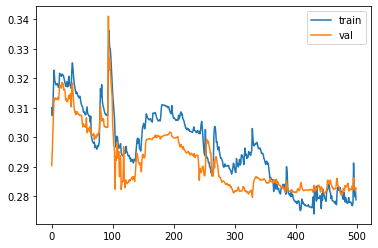

Epoch 1/500
53/79 [===================>..........] - ETA: 0s - loss: 0.7179 - mae: 0.2721
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.7942 - mae: 0.2813 - val_loss: 0.8506 - val_mae: 0.2968
Epoch 2/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6095 - mae: 0.2587
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7067 - mae: 0.2716 - val_loss: 0.8428 - val_mae: 0.2950
Epoch 3/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6037 - mae: 0.2590
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7077 - mae: 0.2715 - val_loss: 0.8321 - val_mae: 0.2901
Epoch 4/500
50/79 [=================>............] - ETA: 0s - loss: 0.6046 - mae: 0.2570
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6884 - mae: 0.2692 -

Epoch 33/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6007 - mae: 0.2551
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6626 - mae: 0.2656 - val_loss: 0.7976 - val_mae: 0.2866
Epoch 34/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5999 - mae: 0.2548
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6608 - mae: 0.2656 - val_loss: 0.7970 - val_mae: 0.2872
Epoch 35/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6011 - mae: 0.2555
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6606 - mae: 0.2661 - val_loss: 0.7977 - val_mae: 0.2873
Epoch 36/500
50/79 [=================>............] - ETA: 0s - loss: 0.6011 - mae: 0.2546
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6599 - mae: 0.26

Epoch 65/500
50/79 [=================>............] - ETA: 0s - loss: 0.5906 - mae: 0.2490
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6443 - mae: 0.2643 - val_loss: 0.8068 - val_mae: 0.2936
Epoch 66/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5878 - mae: 0.2497
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6418 - mae: 0.2638 - val_loss: 0.8064 - val_mae: 0.2930
Epoch 67/500
49/79 [=================>............] - ETA: 0s - loss: 0.5923 - mae: 0.2493
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6407 - mae: 0.2634 - val_loss: 0.8067 - val_mae: 0.2932
Epoch 68/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5878 - mae: 0.2494
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6400 - mae: 0.26

Epoch 97/500
48/79 [=================>............] - ETA: 0s - loss: 0.5999 - mae: 0.2525
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6459 - mae: 0.2653 - val_loss: 0.8234 - val_mae: 0.2937
Epoch 98/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5904 - mae: 0.2514
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6455 - mae: 0.2652 - val_loss: 0.8225 - val_mae: 0.2937
Epoch 99/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5902 - mae: 0.2513
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6454 - mae: 0.2652 - val_loss: 0.8235 - val_mae: 0.2933
Epoch 100/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5901 - mae: 0.2513
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6462 - mae: 0.2

Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6451 - mae: 0.2636 - val_loss: 0.8503 - val_mae: 0.3049
Epoch 129/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5859 - mae: 0.2459
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6477 - mae: 0.2643 - val_loss: 0.8260 - val_mae: 0.2992
Epoch 130/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5953 - mae: 0.2479
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6431 - mae: 0.2625 - val_loss: 0.8499 - val_mae: 0.3052
Epoch 131/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5850 - mae: 0.2449
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6421 - mae: 0.2628 - val_loss: 0.8356 - val_mae: 0.3039
Epoch 132/500
52/79 [==================>........

Epoch 160/500
49/79 [=================>............] - ETA: 0s - loss: 0.5846 - mae: 0.2423
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6349 - mae: 0.2608 - val_loss: 0.8413 - val_mae: 0.3082
Epoch 161/500
50/79 [=================>............] - ETA: 0s - loss: 0.5800 - mae: 0.2419
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6364 - mae: 0.2610 - val_loss: 0.8425 - val_mae: 0.3084
Epoch 162/500
50/79 [=================>............] - ETA: 0s - loss: 0.5824 - mae: 0.2423
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6366 - mae: 0.2609 - val_loss: 0.8427 - val_mae: 0.3081
Epoch 163/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5884 - mae: 0.2451
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6332 - mae: 

Epoch 192/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5777 - mae: 0.2428
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6355 - mae: 0.2612 - val_loss: 0.8455 - val_mae: 0.3083
Epoch 193/500
50/79 [=================>............] - ETA: 0s - loss: 0.5789 - mae: 0.2421
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6365 - mae: 0.2613 - val_loss: 0.8460 - val_mae: 0.3088
Epoch 194/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6137 - mae: 0.2479
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6593 - mae: 0.2660 - val_loss: 0.8473 - val_mae: 0.3077
Epoch 195/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6104 - mae: 0.2472
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6560 - mae: 

Epoch 224/500
50/79 [=================>............] - ETA: 0s - loss: 0.5731 - mae: 0.2376
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6187 - mae: 0.2523 - val_loss: 0.8404 - val_mae: 0.2989
Epoch 225/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5729 - mae: 0.2389
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6224 - mae: 0.2547 - val_loss: 0.8407 - val_mae: 0.2998
Epoch 226/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5737 - mae: 0.2388
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6217 - mae: 0.2544 - val_loss: 0.8383 - val_mae: 0.2998
Epoch 227/500
50/79 [=================>............] - ETA: 0s - loss: 0.5760 - mae: 0.2383
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6317 - mae: 

Epoch 00255: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6217 - mae: 0.2541 - val_loss: 0.8601 - val_mae: 0.3044
Epoch 256/500
49/79 [=================>............] - ETA: 0s - loss: 0.5748 - mae: 0.2370
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6170 - mae: 0.2522 - val_loss: 0.8636 - val_mae: 0.3043
Epoch 257/500
50/79 [=================>............] - ETA: 0s - loss: 0.5709 - mae: 0.2353
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6168 - mae: 0.2517 - val_loss: 0.8596 - val_mae: 0.3042
Epoch 258/500
49/79 [=================>............] - ETA: 0s - loss: 0.5736 - mae: 0.2365
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6169 - mae: 0.2520 - val_loss: 0.8608 - val_mae: 0.3041
Epoch 259/500
49/79 [=================>.........

Epoch 287/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5661 - mae: 0.2401
Epoch 00287: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6329 - mae: 0.2583 - val_loss: 0.8444 - val_mae: 0.3048
Epoch 288/500
49/79 [=================>............] - ETA: 0s - loss: 0.5966 - mae: 0.2444
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6422 - mae: 0.2591 - val_loss: 0.8610 - val_mae: 0.3072
Epoch 289/500
48/79 [=================>............] - ETA: 0s - loss: 0.5833 - mae: 0.2441
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6304 - mae: 0.2579 - val_loss: 0.8667 - val_mae: 0.3067
Epoch 290/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5817 - mae: 0.2428
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6358 - mae: 

Epoch 00318: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6221 - mae: 0.2551 - val_loss: 0.8310 - val_mae: 0.2949
Epoch 319/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5691 - mae: 0.2382
Epoch 00319: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6218 - mae: 0.2542 - val_loss: 0.8315 - val_mae: 0.2949
Epoch 320/500
50/79 [=================>............] - ETA: 0s - loss: 0.5719 - mae: 0.2388
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6212 - mae: 0.2546 - val_loss: 0.8319 - val_mae: 0.2949
Epoch 321/500
50/79 [=================>............] - ETA: 0s - loss: 0.5717 - mae: 0.2385
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6210 - mae: 0.2541 - val_loss: 0.8309 - val_mae: 0.2949
Epoch 322/500
51/79 [==================>........

Epoch 350/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5898 - mae: 0.2419
Epoch 00350: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6323 - mae: 0.2559 - val_loss: 0.8373 - val_mae: 0.2988
Epoch 351/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5779 - mae: 0.2418
Epoch 00351: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6285 - mae: 0.2555 - val_loss: 0.8390 - val_mae: 0.2986
Epoch 352/500
49/79 [=================>............] - ETA: 0s - loss: 0.5806 - mae: 0.2416
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6255 - mae: 0.2579 - val_loss: 0.8423 - val_mae: 0.2998
Epoch 353/500
50/79 [=================>............] - ETA: 0s - loss: 0.6010 - mae: 0.2417
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6379 - mae: 

Epoch 382/500
49/79 [=================>............] - ETA: 0s - loss: 0.5888 - mae: 0.2484
Epoch 00382: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6401 - mae: 0.2585 - val_loss: 0.9454 - val_mae: 0.2961
Epoch 383/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6113 - mae: 0.2592
Epoch 00383: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6567 - mae: 0.2607 - val_loss: 0.9326 - val_mae: 0.2930
Epoch 384/500
54/79 [===================>..........] - ETA: 0s - loss: 0.6130 - mae: 0.2597
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6477 - mae: 0.2631 - val_loss: 0.9395 - val_mae: 0.2960
Epoch 385/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6069 - mae: 0.2548
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6352 - mae: 

Epoch 414/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5971 - mae: 0.2508
Epoch 00414: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6266 - mae: 0.2542 - val_loss: 0.9204 - val_mae: 0.2914
Epoch 415/500
49/79 [=================>............] - ETA: 0s - loss: 0.5910 - mae: 0.2476
Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6288 - mae: 0.2548 - val_loss: 0.9037 - val_mae: 0.2862
Epoch 416/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5884 - mae: 0.2483
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6269 - mae: 0.2537 - val_loss: 0.9131 - val_mae: 0.2878
Epoch 417/500
50/79 [=================>............] - ETA: 0s - loss: 0.5890 - mae: 0.2479
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.6249 - mae: 

Epoch 446/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5822 - mae: 0.2406
Epoch 00446: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5896 - mae: 0.2425 - val_loss: 0.8420 - val_mae: 0.2929
Epoch 447/500
51/79 [==================>...........] - ETA: 0s - loss: 0.5822 - mae: 0.2406
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5896 - mae: 0.2425 - val_loss: 0.8438 - val_mae: 0.2930
Epoch 448/500
50/79 [=================>............] - ETA: 0s - loss: 0.5842 - mae: 0.2407
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5911 - mae: 0.2428 - val_loss: 0.8456 - val_mae: 0.2935
Epoch 449/500
52/79 [==================>...........] - ETA: 0s - loss: 0.5923 - mae: 0.2430
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5933 - mae: 

Epoch 478/500
50/79 [=================>............] - ETA: 0s - loss: 0.5837 - mae: 0.2415
Epoch 00478: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5834 - mae: 0.2407 - val_loss: 0.8397 - val_mae: 0.2895
Epoch 479/500
50/79 [=================>............] - ETA: 0s - loss: 0.5844 - mae: 0.2423
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5844 - mae: 0.2411 - val_loss: 0.8478 - val_mae: 0.2889
Epoch 480/500
50/79 [=================>............] - ETA: 0s - loss: 0.5837 - mae: 0.2412
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.5828 - mae: 0.2405 - val_loss: 0.8468 - val_mae: 0.2894
Epoch 481/500
49/79 [=================>............] - ETA: 0s - loss: 0.5887 - mae: 0.2423
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6089 - mae: 

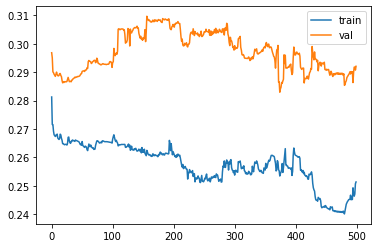

Epoch 1/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7751 - mae: 0.3000
Epoch 00001: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7215 - mae: 0.2831 - val_loss: 0.9197 - val_mae: 0.3055
Epoch 2/500
48/95 [==============>...............] - ETA: 0s - loss: 0.7799 - mae: 0.3096
Epoch 00002: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7334 - mae: 0.2914 - val_loss: 0.9100 - val_mae: 0.3066
Epoch 3/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7579 - mae: 0.3106
Epoch 00003: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7123 - mae: 0.2896 - val_loss: 0.9101 - val_mae: 0.3062
Epoch 4/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7517 - mae: 0.3094
Epoch 00004: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7079 - mae: 0.2887 -

Epoch 33/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7224 - mae: 0.3013
Epoch 00033: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6933 - mae: 0.2840 - val_loss: 0.9291 - val_mae: 0.3039
Epoch 34/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7225 - mae: 0.3012
Epoch 00034: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6933 - mae: 0.2839 - val_loss: 0.9293 - val_mae: 0.3039
Epoch 35/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7291 - mae: 0.3030
Epoch 00035: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6932 - mae: 0.2839 - val_loss: 0.9295 - val_mae: 0.3038
Epoch 36/500
53/95 [===============>..............] - ETA: 0s - loss: 0.7225 - mae: 0.3012
Epoch 00036: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6932 - mae: 0.28

Epoch 65/500
48/95 [==============>...............] - ETA: 0s - loss: 0.7314 - mae: 0.3050
Epoch 00065: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6990 - mae: 0.2865 - val_loss: 0.9960 - val_mae: 0.3086
Epoch 66/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7332 - mae: 0.3065
Epoch 00066: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7011 - mae: 0.2873 - val_loss: 0.9991 - val_mae: 0.3087
Epoch 67/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7396 - mae: 0.3084
Epoch 00067: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7010 - mae: 0.2874 - val_loss: 1.0028 - val_mae: 0.3090
Epoch 68/500
53/95 [===============>..............] - ETA: 0s - loss: 0.7282 - mae: 0.3058
Epoch 00068: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7002 - mae: 0.28

Epoch 97/500
53/95 [===============>..............] - ETA: 0s - loss: 0.7140 - mae: 0.2997
Epoch 00097: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6867 - mae: 0.2829 - val_loss: 0.9137 - val_mae: 0.2994
Epoch 98/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7204 - mae: 0.3015
Epoch 00098: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6867 - mae: 0.2829 - val_loss: 0.9140 - val_mae: 0.2994
Epoch 99/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7138 - mae: 0.2997
Epoch 00099: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6867 - mae: 0.2828 - val_loss: 0.9143 - val_mae: 0.2994
Epoch 100/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7202 - mae: 0.3014
Epoch 00100: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6866 - mae: 0.2

Epoch 129/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7126 - mae: 0.2989
Epoch 00129: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6861 - mae: 0.2823 - val_loss: 0.9479 - val_mae: 0.3040
Epoch 130/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7128 - mae: 0.2990
Epoch 00130: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6861 - mae: 0.2823 - val_loss: 0.9502 - val_mae: 0.3042
Epoch 131/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7121 - mae: 0.2989
Epoch 00131: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6861 - mae: 0.2823 - val_loss: 0.9526 - val_mae: 0.3044
Epoch 132/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7128 - mae: 0.2990
Epoch 00132: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6861 - mae: 

Epoch 161/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7275 - mae: 0.3006
Epoch 00161: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6949 - mae: 0.2831 - val_loss: 0.9563 - val_mae: 0.3066
Epoch 162/500
48/95 [==============>...............] - ETA: 0s - loss: 0.7179 - mae: 0.2985
Epoch 00162: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6945 - mae: 0.2832 - val_loss: 0.9381 - val_mae: 0.3027
Epoch 163/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7148 - mae: 0.2984
Epoch 00163: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6944 - mae: 0.2832 - val_loss: 0.9466 - val_mae: 0.3040
Epoch 164/500
47/95 [=============>................] - ETA: 0s - loss: 0.7071 - mae: 0.2972
Epoch 00164: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7378 - mae: 

Epoch 193/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7308 - mae: 0.3056
Epoch 00193: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7074 - mae: 0.2883 - val_loss: 1.0155 - val_mae: 0.3178
Epoch 194/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7282 - mae: 0.3051
Epoch 00194: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7060 - mae: 0.2881 - val_loss: 1.0215 - val_mae: 0.3185
Epoch 195/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7281 - mae: 0.3067
Epoch 00195: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7028 - mae: 0.2884 - val_loss: 1.0225 - val_mae: 0.3176
Epoch 196/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7373 - mae: 0.3067
Epoch 00196: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7054 - mae: 

Epoch 00224: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7583 - mae: 0.2955 - val_loss: 0.9362 - val_mae: 0.3076
Epoch 225/500
48/95 [==============>...............] - ETA: 0s - loss: 0.7985 - mae: 0.3163
Epoch 00225: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7581 - mae: 0.2955 - val_loss: 0.9339 - val_mae: 0.3076
Epoch 226/500
51/95 [===============>..............] - ETA: 0s - loss: 0.8068 - mae: 0.3179
Epoch 00226: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7580 - mae: 0.2955 - val_loss: 0.9320 - val_mae: 0.3077
Epoch 227/500
50/95 [==============>...............] - ETA: 0s - loss: 0.8138 - mae: 0.3197
Epoch 00227: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7580 - mae: 0.2956 - val_loss: 0.9298 - val_mae: 0.3076
Epoch 228/500
51/95 [===============>...........

Epoch 256/500
51/95 [===============>..............] - ETA: 0s - loss: 0.8098 - mae: 0.3182
Epoch 00256: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7582 - mae: 0.2963 - val_loss: 0.9680 - val_mae: 0.2986
Epoch 257/500
48/95 [==============>...............] - ETA: 0s - loss: 0.8087 - mae: 0.3169
Epoch 00257: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7616 - mae: 0.2964 - val_loss: 0.9877 - val_mae: 0.3203
Epoch 258/500
48/95 [==============>...............] - ETA: 0s - loss: 1.0111 - mae: 0.3426
Epoch 00258: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.8790 - mae: 0.3122 - val_loss: 0.9423 - val_mae: 0.3101
Epoch 259/500
49/95 [==============>...............] - ETA: 0s - loss: 0.8700 - mae: 0.3297
Epoch 00259: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7943 - mae: 

Epoch 288/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7478 - mae: 0.3081
Epoch 00288: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7187 - mae: 0.2903 - val_loss: 0.9296 - val_mae: 0.3048
Epoch 289/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7541 - mae: 0.3100
Epoch 00289: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7187 - mae: 0.2903 - val_loss: 0.9299 - val_mae: 0.3047
Epoch 290/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7492 - mae: 0.3085
Epoch 00290: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7185 - mae: 0.2902 - val_loss: 0.9310 - val_mae: 0.3046
Epoch 291/500
46/95 [=============>................] - ETA: 0s - loss: 0.7275 - mae: 0.3047
Epoch 00291: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7185 - mae: 

Epoch 320/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7490 - mae: 0.3082
Epoch 00320: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7190 - mae: 0.2897 - val_loss: 1.0419 - val_mae: 0.3048
Epoch 321/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7461 - mae: 0.3075
Epoch 00321: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7185 - mae: 0.2896 - val_loss: 1.0431 - val_mae: 0.3048
Epoch 322/500
48/95 [==============>...............] - ETA: 0s - loss: 0.7415 - mae: 0.3061
Epoch 00322: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7149 - mae: 0.2889 - val_loss: 1.0355 - val_mae: 0.3037
Epoch 323/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7415 - mae: 0.3066
Epoch 00323: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7145 - mae: 

Epoch 352/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7355 - mae: 0.3053
Epoch 00352: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7102 - mae: 0.2878 - val_loss: 1.0477 - val_mae: 0.3069
Epoch 353/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7352 - mae: 0.3057
Epoch 00353: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7092 - mae: 0.2880 - val_loss: 1.0446 - val_mae: 0.3063
Epoch 354/500
48/95 [==============>...............] - ETA: 0s - loss: 0.7295 - mae: 0.3046
Epoch 00354: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7095 - mae: 0.2874 - val_loss: 1.0436 - val_mae: 0.3062
Epoch 355/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7324 - mae: 0.3052
Epoch 00355: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7078 - mae: 

Epoch 384/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7204 - mae: 0.3036
Epoch 00384: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6966 - mae: 0.2861 - val_loss: 1.0023 - val_mae: 0.3096
Epoch 385/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7244 - mae: 0.3058
Epoch 00385: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6960 - mae: 0.2869 - val_loss: 0.9810 - val_mae: 0.3057
Epoch 386/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7153 - mae: 0.3026
Epoch 00386: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6927 - mae: 0.2856 - val_loss: 0.9816 - val_mae: 0.3059
Epoch 387/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7203 - mae: 0.3038
Epoch 00387: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6928 - mae: 

Epoch 00415: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6850 - mae: 0.2842 - val_loss: 1.0353 - val_mae: 0.3036
Epoch 416/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7171 - mae: 0.3030
Epoch 00416: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6851 - mae: 0.2842 - val_loss: 1.0396 - val_mae: 0.3040
Epoch 417/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7184 - mae: 0.3036
Epoch 00417: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6870 - mae: 0.2848 - val_loss: 1.0421 - val_mae: 0.3041
Epoch 418/500
51/95 [===============>..............] - ETA: 0s - loss: 0.7109 - mae: 0.3011
Epoch 00418: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6864 - mae: 0.2844 - val_loss: 1.0435 - val_mae: 0.3043
Epoch 419/500
51/95 [===============>...........

Epoch 447/500
52/95 [===============>..............] - ETA: 0s - loss: 0.7071 - mae: 0.3000
Epoch 00447: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6843 - mae: 0.2832 - val_loss: 1.0494 - val_mae: 0.3030
Epoch 448/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7084 - mae: 0.3000
Epoch 00448: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6840 - mae: 0.2830 - val_loss: 1.0461 - val_mae: 0.3025
Epoch 449/500
50/95 [==============>...............] - ETA: 0s - loss: 0.7149 - mae: 0.3020
Epoch 00449: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6845 - mae: 0.2832 - val_loss: 1.0486 - val_mae: 0.3026
Epoch 450/500
49/95 [==============>...............] - ETA: 0s - loss: 0.7110 - mae: 0.3017
Epoch 00450: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.6858 - mae: 

Epoch 479/500
77/95 [=======================>......] - ETA: 0s - loss: 0.6976 - mae: 0.2961
Epoch 00479: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7148 - mae: 0.2906 - val_loss: 0.9442 - val_mae: 0.3037
Epoch 480/500
88/95 [==========================>...] - ETA: 0s - loss: 0.7299 - mae: 0.2980
Epoch 00480: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7229 - mae: 0.2925 - val_loss: 0.9462 - val_mae: 0.3024
Epoch 481/500
93/95 [============================>.] - ETA: 0s - loss: 0.7739 - mae: 0.3093
Epoch 00481: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7677 - mae: 0.3078 - val_loss: 0.9805 - val_mae: 0.3159
Epoch 482/500
89/95 [===========================>..] - ETA: 0s - loss: 0.7735 - mae: 0.3099
Epoch 00482: val_mae did not improve from 0.10687
95/95 [==============================] - 0s 2ms/step - loss: 0.7614 - mae: 

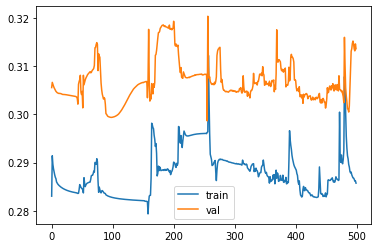

Epoch 1/500
52/87 [================>.............] - ETA: 0s - loss: 0.7094 - mae: 0.2853
Epoch 00001: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6780 - mae: 0.2772 - val_loss: 0.6598 - val_mae: 0.2700
Epoch 2/500
85/87 [============================>.] - ETA: 0s - loss: 0.6879 - mae: 0.2679
Epoch 00002: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6811 - mae: 0.2662 - val_loss: 0.6920 - val_mae: 0.2656
Epoch 3/500
51/87 [================>.............] - ETA: 0s - loss: 0.7180 - mae: 0.2772
Epoch 00003: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6732 - mae: 0.2609 - val_loss: 0.6642 - val_mae: 0.2650
Epoch 4/500
49/87 [===============>..............] - ETA: 0s - loss: 0.7299 - mae: 0.2791
Epoch 00004: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6638 - mae: 0.2660 -

Epoch 33/500
51/87 [================>.............] - ETA: 0s - loss: 0.7105 - mae: 0.2758
Epoch 00033: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6441 - mae: 0.2579 - val_loss: 0.6648 - val_mae: 0.2603
Epoch 34/500
53/87 [=================>............] - ETA: 0s - loss: 0.7120 - mae: 0.2766
Epoch 00034: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6439 - mae: 0.2578 - val_loss: 0.6661 - val_mae: 0.2605
Epoch 35/500
50/87 [================>.............] - ETA: 0s - loss: 0.7132 - mae: 0.2761
Epoch 00035: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6456 - mae: 0.2577 - val_loss: 0.6602 - val_mae: 0.2599
Epoch 36/500
50/87 [================>.............] - ETA: 0s - loss: 0.7163 - mae: 0.2763
Epoch 00036: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6462 - mae: 0.25

Epoch 00064: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6365 - mae: 0.2583 - val_loss: 0.6504 - val_mae: 0.2599
Epoch 65/500
48/87 [===============>..............] - ETA: 0s - loss: 0.6993 - mae: 0.2734
Epoch 00065: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6362 - mae: 0.2581 - val_loss: 0.6479 - val_mae: 0.2597
Epoch 66/500
51/87 [================>.............] - ETA: 0s - loss: 0.6983 - mae: 0.2737
Epoch 00066: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6435 - mae: 0.2598 - val_loss: 0.6552 - val_mae: 0.2621
Epoch 67/500
51/87 [================>.............] - ETA: 0s - loss: 0.6911 - mae: 0.2737
Epoch 00067: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6394 - mae: 0.2595 - val_loss: 0.6572 - val_mae: 0.2610
Epoch 68/500
50/87 [================>.............]

Epoch 96/500
51/87 [================>.............] - ETA: 0s - loss: 0.6680 - mae: 0.2688
Epoch 00096: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6260 - mae: 0.2573 - val_loss: 0.6491 - val_mae: 0.2630
Epoch 97/500
52/87 [================>.............] - ETA: 0s - loss: 0.6796 - mae: 0.2704
Epoch 00097: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6315 - mae: 0.2573 - val_loss: 0.6551 - val_mae: 0.2639
Epoch 98/500
52/87 [================>.............] - ETA: 0s - loss: 0.6767 - mae: 0.2707
Epoch 00098: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6270 - mae: 0.2573 - val_loss: 0.6469 - val_mae: 0.2621
Epoch 99/500
51/87 [================>.............] - ETA: 0s - loss: 0.6869 - mae: 0.2690
Epoch 00099: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6394 - mae: 0.25

Epoch 128/500
52/87 [================>.............] - ETA: 0s - loss: 0.6633 - mae: 0.2664
Epoch 00128: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6098 - mae: 0.2508 - val_loss: 0.6448 - val_mae: 0.2585
Epoch 129/500
47/87 [===============>..............] - ETA: 0s - loss: 0.6727 - mae: 0.2678
Epoch 00129: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6091 - mae: 0.2511 - val_loss: 0.6422 - val_mae: 0.2577
Epoch 130/500
52/87 [================>.............] - ETA: 0s - loss: 0.6642 - mae: 0.2654
Epoch 00130: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6105 - mae: 0.2504 - val_loss: 0.6527 - val_mae: 0.2602
Epoch 131/500
49/87 [===============>..............] - ETA: 0s - loss: 0.6742 - mae: 0.2670
Epoch 00131: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6150 - mae: 

Epoch 160/500
51/87 [================>.............] - ETA: 0s - loss: 0.6584 - mae: 0.2635
Epoch 00160: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.6018 - mae: 0.2495 - val_loss: 0.6420 - val_mae: 0.2578
Epoch 161/500
49/87 [===============>..............] - ETA: 0s - loss: 0.6595 - mae: 0.2635
Epoch 00161: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5988 - mae: 0.2490 - val_loss: 0.6408 - val_mae: 0.2572
Epoch 162/500
51/87 [================>.............] - ETA: 0s - loss: 0.6482 - mae: 0.2622
Epoch 00162: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5951 - mae: 0.2488 - val_loss: 0.6405 - val_mae: 0.2580
Epoch 163/500
52/87 [================>.............] - ETA: 0s - loss: 0.6485 - mae: 0.2646
Epoch 00163: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5930 - mae: 

Epoch 192/500
51/87 [================>.............] - ETA: 0s - loss: 0.6412 - mae: 0.2622
Epoch 00192: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5966 - mae: 0.2491 - val_loss: 0.6440 - val_mae: 0.2569
Epoch 193/500
51/87 [================>.............] - ETA: 0s - loss: 0.6363 - mae: 0.2615
Epoch 00193: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5929 - mae: 0.2485 - val_loss: 0.6510 - val_mae: 0.2582
Epoch 194/500
51/87 [================>.............] - ETA: 0s - loss: 0.6441 - mae: 0.2615
Epoch 00194: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5975 - mae: 0.2481 - val_loss: 0.6517 - val_mae: 0.2554
Epoch 195/500
50/87 [================>.............] - ETA: 0s - loss: 0.6497 - mae: 0.2625
Epoch 00195: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5980 - mae: 

Epoch 224/500
52/87 [================>.............] - ETA: 0s - loss: 0.6315 - mae: 0.2662
Epoch 00224: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5805 - mae: 0.2468 - val_loss: 0.6586 - val_mae: 0.2638
Epoch 225/500
50/87 [================>.............] - ETA: 0s - loss: 0.6360 - mae: 0.2670
Epoch 00225: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5826 - mae: 0.2474 - val_loss: 0.6622 - val_mae: 0.2636
Epoch 226/500
49/87 [===============>..............] - ETA: 0s - loss: 0.6350 - mae: 0.2660
Epoch 00226: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5814 - mae: 0.2468 - val_loss: 0.6633 - val_mae: 0.2640
Epoch 227/500
50/87 [================>.............] - ETA: 0s - loss: 0.6347 - mae: 0.2662
Epoch 00227: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5832 - mae: 

Epoch 256/500
51/87 [================>.............] - ETA: 0s - loss: 0.6260 - mae: 0.2631
Epoch 00256: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5824 - mae: 0.2463 - val_loss: 0.6626 - val_mae: 0.2600
Epoch 257/500
52/87 [================>.............] - ETA: 0s - loss: 0.6311 - mae: 0.2641
Epoch 00257: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5831 - mae: 0.2461 - val_loss: 0.6662 - val_mae: 0.2603
Epoch 258/500
51/87 [================>.............] - ETA: 0s - loss: 0.6356 - mae: 0.2633
Epoch 00258: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5873 - mae: 0.2461 - val_loss: 0.6688 - val_mae: 0.2618
Epoch 259/500
52/87 [================>.............] - ETA: 0s - loss: 0.6367 - mae: 0.2650
Epoch 00259: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5856 - mae: 

Epoch 288/500
49/87 [===============>..............] - ETA: 0s - loss: 0.6251 - mae: 0.2635
Epoch 00288: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5771 - mae: 0.2460 - val_loss: 0.6479 - val_mae: 0.2574
Epoch 289/500
51/87 [================>.............] - ETA: 0s - loss: 0.6182 - mae: 0.2616
Epoch 00289: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5755 - mae: 0.2453 - val_loss: 0.6512 - val_mae: 0.2574
Epoch 290/500
48/87 [===============>..............] - ETA: 0s - loss: 0.6277 - mae: 0.2638
Epoch 00290: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5771 - mae: 0.2454 - val_loss: 0.6484 - val_mae: 0.2566
Epoch 291/500
50/87 [================>.............] - ETA: 0s - loss: 0.6230 - mae: 0.2625
Epoch 00291: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5768 - mae: 

Epoch 00319: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5794 - mae: 0.2454 - val_loss: 0.6529 - val_mae: 0.2584
Epoch 320/500
52/87 [================>.............] - ETA: 0s - loss: 0.6243 - mae: 0.2622
Epoch 00320: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5785 - mae: 0.2452 - val_loss: 0.6541 - val_mae: 0.2585
Epoch 321/500
52/87 [================>.............] - ETA: 0s - loss: 0.6222 - mae: 0.2620
Epoch 00321: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5782 - mae: 0.2455 - val_loss: 0.6579 - val_mae: 0.2585
Epoch 322/500
52/87 [================>.............] - ETA: 0s - loss: 0.6263 - mae: 0.2627
Epoch 00322: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5804 - mae: 0.2460 - val_loss: 0.6557 - val_mae: 0.2582
Epoch 323/500
52/87 [================>..........

Epoch 351/500
52/87 [================>.............] - ETA: 0s - loss: 0.6196 - mae: 0.2564
Epoch 00351: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5788 - mae: 0.2425 - val_loss: 0.6734 - val_mae: 0.2556
Epoch 352/500
51/87 [================>.............] - ETA: 0s - loss: 0.6153 - mae: 0.2560
Epoch 00352: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5765 - mae: 0.2434 - val_loss: 0.6724 - val_mae: 0.2610
Epoch 353/500
51/87 [================>.............] - ETA: 0s - loss: 0.6111 - mae: 0.2562
Epoch 00353: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5751 - mae: 0.2427 - val_loss: 0.6716 - val_mae: 0.2564
Epoch 354/500
52/87 [================>.............] - ETA: 0s - loss: 0.6319 - mae: 0.2575
Epoch 00354: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5845 - mae: 

Epoch 00382: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5798 - mae: 0.2403 - val_loss: 0.6856 - val_mae: 0.2662
Epoch 383/500
51/87 [================>.............] - ETA: 0s - loss: 0.6242 - mae: 0.2535
Epoch 00383: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5785 - mae: 0.2418 - val_loss: 0.6875 - val_mae: 0.2634
Epoch 384/500
53/87 [=================>............] - ETA: 0s - loss: 0.6196 - mae: 0.2499
Epoch 00384: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5757 - mae: 0.2388 - val_loss: 0.6984 - val_mae: 0.2623
Epoch 385/500
50/87 [================>.............] - ETA: 0s - loss: 0.6288 - mae: 0.2530
Epoch 00385: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5784 - mae: 0.2393 - val_loss: 0.6848 - val_mae: 0.2586
Epoch 386/500
49/87 [===============>...........

Epoch 414/500
51/87 [================>.............] - ETA: 0s - loss: 0.6255 - mae: 0.2527
Epoch 00414: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5803 - mae: 0.2410 - val_loss: 0.6859 - val_mae: 0.2551
Epoch 415/500
51/87 [================>.............] - ETA: 0s - loss: 0.6110 - mae: 0.2507
Epoch 00415: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5721 - mae: 0.2398 - val_loss: 0.6916 - val_mae: 0.2563
Epoch 416/500
51/87 [================>.............] - ETA: 0s - loss: 0.6031 - mae: 0.2489
Epoch 00416: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5665 - mae: 0.2391 - val_loss: 0.6905 - val_mae: 0.2565
Epoch 417/500
52/87 [================>.............] - ETA: 0s - loss: 0.6136 - mae: 0.2510
Epoch 00417: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5724 - mae: 

Epoch 446/500
53/87 [=================>............] - ETA: 0s - loss: 0.5984 - mae: 0.2473
Epoch 00446: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5630 - mae: 0.2377 - val_loss: 0.6905 - val_mae: 0.2558
Epoch 447/500
50/87 [================>.............] - ETA: 0s - loss: 0.6018 - mae: 0.2494
Epoch 00447: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5580 - mae: 0.2370 - val_loss: 0.6930 - val_mae: 0.2582
Epoch 448/500
50/87 [================>.............] - ETA: 0s - loss: 0.6088 - mae: 0.2515
Epoch 00448: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5641 - mae: 0.2383 - val_loss: 0.6985 - val_mae: 0.2578
Epoch 449/500
51/87 [================>.............] - ETA: 0s - loss: 0.5961 - mae: 0.2465
Epoch 00449: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5631 - mae: 

Epoch 478/500
52/87 [================>.............] - ETA: 0s - loss: 0.6028 - mae: 0.2477
Epoch 00478: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5642 - mae: 0.2380 - val_loss: 0.6789 - val_mae: 0.2578
Epoch 479/500
50/87 [================>.............] - ETA: 0s - loss: 0.6159 - mae: 0.2530
Epoch 00479: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5821 - mae: 0.2418 - val_loss: 0.6879 - val_mae: 0.2588
Epoch 480/500
52/87 [================>.............] - ETA: 0s - loss: 0.6037 - mae: 0.2501
Epoch 00480: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5716 - mae: 0.2400 - val_loss: 0.6862 - val_mae: 0.2570
Epoch 481/500
50/87 [================>.............] - ETA: 0s - loss: 0.6212 - mae: 0.2544
Epoch 00481: val_mae did not improve from 0.10687
87/87 [==============================] - 0s 2ms/step - loss: 0.5749 - mae: 

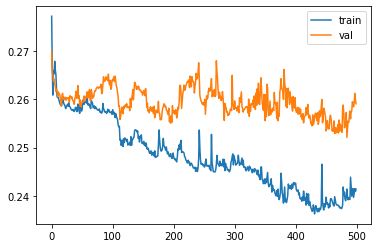

Epoch 1/500
51/79 [==================>...........] - ETA: 0s - loss: 0.8788 - mae: 0.2782
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.8648 - mae: 0.2754 - val_loss: 0.6801 - val_mae: 0.2574
Epoch 2/500
35/79 [============>.................] - ETA: 0s - loss: 0.9523 - mae: 0.3018
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.8532 - mae: 0.2835 - val_loss: 0.6497 - val_mae: 0.2581
Epoch 3/500
32/79 [===========>..................] - ETA: 0s - loss: 0.9588 - mae: 0.3029
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8314 - mae: 0.2785 - val_loss: 0.6555 - val_mae: 0.2638
Epoch 4/500
52/79 [==================>...........] - ETA: 0s - loss: 0.9057 - mae: 0.2889
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8260 - mae: 0.2834 -

Epoch 33/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7198 - mae: 0.2921
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7138 - mae: 0.2907 - val_loss: 0.6486 - val_mae: 0.2745
Epoch 34/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7188 - mae: 0.2924
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7129 - mae: 0.2908 - val_loss: 0.6493 - val_mae: 0.2745
Epoch 35/500
50/79 [=================>............] - ETA: 0s - loss: 0.6751 - mae: 0.2861
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7096 - mae: 0.2901 - val_loss: 0.6500 - val_mae: 0.2749
Epoch 36/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7429 - mae: 0.2965
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7095 - mae: 0.29

Epoch 00064: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7050 - mae: 0.2909 - val_loss: 0.6515 - val_mae: 0.2755
Epoch 65/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7146 - mae: 0.2948
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7121 - mae: 0.2929 - val_loss: 0.6534 - val_mae: 0.2757
Epoch 66/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7073 - mae: 0.2924
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7068 - mae: 0.2911 - val_loss: 0.6562 - val_mae: 0.2754
Epoch 67/500
53/79 [===================>..........] - ETA: 0s - loss: 0.7331 - mae: 0.2988
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7066 - mae: 0.2920 - val_loss: 0.6562 - val_mae: 0.2752
Epoch 68/500
52/79 [==================>...........]

Epoch 96/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7152 - mae: 0.2949
Epoch 00096: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7153 - mae: 0.2919 - val_loss: 0.6504 - val_mae: 0.2761
Epoch 97/500
50/79 [=================>............] - ETA: 0s - loss: 0.6843 - mae: 0.2900
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7158 - mae: 0.2923 - val_loss: 0.6493 - val_mae: 0.2760
Epoch 98/500
50/79 [=================>............] - ETA: 0s - loss: 0.6838 - mae: 0.2901
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7155 - mae: 0.2925 - val_loss: 0.6497 - val_mae: 0.2762
Epoch 99/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7148 - mae: 0.2955
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7153 - mae: 0.29

Epoch 128/500
48/79 [=================>............] - ETA: 0s - loss: 0.6941 - mae: 0.2925
Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7125 - mae: 0.2932 - val_loss: 0.6615 - val_mae: 0.2793
Epoch 129/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7350 - mae: 0.3000
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7125 - mae: 0.2931 - val_loss: 0.6616 - val_mae: 0.2793
Epoch 130/500
50/79 [=================>............] - ETA: 0s - loss: 0.6862 - mae: 0.2903
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7122 - mae: 0.2930 - val_loss: 0.6615 - val_mae: 0.2793
Epoch 131/500
50/79 [=================>............] - ETA: 0s - loss: 0.6863 - mae: 0.2902
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7123 - mae: 

Epoch 160/500
53/79 [===================>..........] - ETA: 0s - loss: 0.7206 - mae: 0.2983
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7070 - mae: 0.2920 - val_loss: 0.6624 - val_mae: 0.2791
Epoch 161/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7028 - mae: 0.2942
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7105 - mae: 0.2924 - val_loss: 0.6596 - val_mae: 0.2789
Epoch 162/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7222 - mae: 0.2984
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7085 - mae: 0.2922 - val_loss: 0.6608 - val_mae: 0.2790
Epoch 163/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7023 - mae: 0.2942
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7094 - mae: 

Epoch 192/500
50/79 [=================>............] - ETA: 0s - loss: 0.6878 - mae: 0.2918
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7091 - mae: 0.2935 - val_loss: 0.6651 - val_mae: 0.2795
Epoch 193/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7236 - mae: 0.3002
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7042 - mae: 0.2929 - val_loss: 0.6654 - val_mae: 0.2793
Epoch 194/500
50/79 [=================>............] - ETA: 0s - loss: 0.6807 - mae: 0.2910
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7049 - mae: 0.2929 - val_loss: 0.6651 - val_mae: 0.2793
Epoch 195/500
49/79 [=================>............] - ETA: 0s - loss: 0.6817 - mae: 0.2912
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7040 - mae: 

Epoch 224/500
50/79 [=================>............] - ETA: 0s - loss: 0.6840 - mae: 0.2912
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7060 - mae: 0.2941 - val_loss: 0.6717 - val_mae: 0.2834
Epoch 225/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7060 - mae: 0.2958
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7051 - mae: 0.2939 - val_loss: 0.6717 - val_mae: 0.2834
Epoch 226/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7060 - mae: 0.2956
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7051 - mae: 0.2938 - val_loss: 0.6701 - val_mae: 0.2833
Epoch 227/500
50/79 [=================>............] - ETA: 0s - loss: 0.6830 - mae: 0.2906
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7051 - mae: 

Epoch 00255: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7085 - mae: 0.2926 - val_loss: 0.6572 - val_mae: 0.2761
Epoch 256/500
50/79 [=================>............] - ETA: 0s - loss: 0.6809 - mae: 0.2894
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7132 - mae: 0.2933 - val_loss: 0.6674 - val_mae: 0.2777
Epoch 257/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7296 - mae: 0.2996
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7132 - mae: 0.2935 - val_loss: 0.6665 - val_mae: 0.2772
Epoch 258/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7059 - mae: 0.2946
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7110 - mae: 0.2929 - val_loss: 0.6672 - val_mae: 0.2767
Epoch 259/500
52/79 [==================>........

Epoch 287/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7096 - mae: 0.2944
Epoch 00287: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7098 - mae: 0.2944 - val_loss: 0.6795 - val_mae: 0.2775
Epoch 288/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7245 - mae: 0.2975
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7075 - mae: 0.2938 - val_loss: 0.6784 - val_mae: 0.2772
Epoch 289/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7221 - mae: 0.2970
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7058 - mae: 0.2934 - val_loss: 0.6780 - val_mae: 0.2770
Epoch 290/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7034 - mae: 0.2927
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7046 - mae: 

Epoch 319/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7082 - mae: 0.2907
Epoch 00319: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6893 - mae: 0.2885 - val_loss: 0.6615 - val_mae: 0.2764
Epoch 320/500
48/79 [=================>............] - ETA: 0s - loss: 0.6764 - mae: 0.2840
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6900 - mae: 0.2888 - val_loss: 0.6654 - val_mae: 0.2759
Epoch 321/500
50/79 [=================>............] - ETA: 0s - loss: 0.6687 - mae: 0.2815
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6915 - mae: 0.2886 - val_loss: 0.6629 - val_mae: 0.2758
Epoch 322/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6910 - mae: 0.2867
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6911 - mae: 

Epoch 351/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6965 - mae: 0.2894
Epoch 00351: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2919 - val_loss: 0.6777 - val_mae: 0.2778
Epoch 352/500
50/79 [=================>............] - ETA: 0s - loss: 0.6751 - mae: 0.2833
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6992 - mae: 0.2913 - val_loss: 0.6751 - val_mae: 0.2770
Epoch 353/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7123 - mae: 0.2923
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6994 - mae: 0.2912 - val_loss: 0.6763 - val_mae: 0.2771
Epoch 354/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6967 - mae: 0.2887
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7001 - mae: 

Epoch 383/500
53/79 [===================>..........] - ETA: 0s - loss: 0.7036 - mae: 0.2921
Epoch 00383: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6903 - mae: 0.2903 - val_loss: 0.6655 - val_mae: 0.2756
Epoch 384/500
49/79 [=================>............] - ETA: 0s - loss: 0.6733 - mae: 0.2839
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6901 - mae: 0.2900 - val_loss: 0.6625 - val_mae: 0.2749
Epoch 385/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6900 - mae: 0.2876
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6886 - mae: 0.2894 - val_loss: 0.6636 - val_mae: 0.2749
Epoch 386/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6913 - mae: 0.2881
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6895 - mae: 

Epoch 00414: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6804 - mae: 0.2875 - val_loss: 0.6910 - val_mae: 0.2733
Epoch 415/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6858 - mae: 0.2888
Epoch 00415: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6813 - mae: 0.2868 - val_loss: 0.6899 - val_mae: 0.2727
Epoch 416/500
48/79 [=================>............] - ETA: 0s - loss: 0.6741 - mae: 0.2849
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6798 - mae: 0.2870 - val_loss: 0.6935 - val_mae: 0.2740
Epoch 417/500
49/79 [=================>............] - ETA: 0s - loss: 0.6751 - mae: 0.2857
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6800 - mae: 0.2877 - val_loss: 0.6914 - val_mae: 0.2729
Epoch 418/500
51/79 [==================>........

Epoch 446/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7092 - mae: 0.2921
Epoch 00446: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6894 - mae: 0.2874 - val_loss: 0.7054 - val_mae: 0.2757
Epoch 447/500
48/79 [=================>............] - ETA: 0s - loss: 0.6842 - mae: 0.2899
Epoch 00447: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6921 - mae: 0.2878 - val_loss: 0.7019 - val_mae: 0.2759
Epoch 448/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7237 - mae: 0.2955
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6889 - mae: 0.2872 - val_loss: 0.7043 - val_mae: 0.2757
Epoch 449/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7169 - mae: 0.2941
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6943 - mae: 

Epoch 478/500
50/79 [=================>............] - ETA: 0s - loss: 0.6824 - mae: 0.2914
Epoch 00478: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6983 - mae: 0.2929 - val_loss: 0.6885 - val_mae: 0.2798
Epoch 479/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7136 - mae: 0.2963
Epoch 00479: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6969 - mae: 0.2925 - val_loss: 0.6910 - val_mae: 0.2798
Epoch 480/500
50/79 [=================>............] - ETA: 0s - loss: 0.6823 - mae: 0.2912
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6969 - mae: 0.2921 - val_loss: 0.6867 - val_mae: 0.2792
Epoch 481/500
49/79 [=================>............] - ETA: 0s - loss: 0.6823 - mae: 0.2910
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.6975 - mae: 

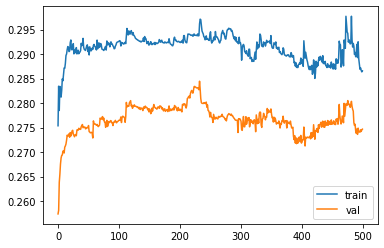

Epoch 1/500
52/79 [==================>...........] - ETA: 0s - loss: 0.8125 - mae: 0.2820
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.9974 - mae: 0.3130 - val_loss: 0.4835 - val_mae: 0.2204
Epoch 2/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7674 - mae: 0.3086
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.9076 - mae: 0.3281 - val_loss: 0.5595 - val_mae: 0.2625
Epoch 3/500
49/79 [=================>............] - ETA: 0s - loss: 0.7508 - mae: 0.3057
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8873 - mae: 0.3250 - val_loss: 0.5728 - val_mae: 0.2634
Epoch 4/500
50/79 [=================>............] - ETA: 0s - loss: 0.7430 - mae: 0.3064
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8821 - mae: 0.3271 -

Epoch 32/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7082 - mae: 0.3052
Epoch 00032: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8115 - mae: 0.3265 - val_loss: 0.6547 - val_mae: 0.2870
Epoch 33/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7025 - mae: 0.3032
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8187 - mae: 0.3277 - val_loss: 0.6566 - val_mae: 0.2875
Epoch 34/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6986 - mae: 0.3029
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8145 - mae: 0.3272 - val_loss: 0.6573 - val_mae: 0.2878
Epoch 35/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6976 - mae: 0.3027
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8149 - mae: 0.32

Epoch 64/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6860 - mae: 0.2982
Epoch 00064: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8348 - mae: 0.3284 - val_loss: 0.6345 - val_mae: 0.2816
Epoch 65/500
50/79 [=================>............] - ETA: 0s - loss: 0.6973 - mae: 0.3024
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8337 - mae: 0.3305 - val_loss: 0.6458 - val_mae: 0.2856
Epoch 66/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7002 - mae: 0.3045
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8295 - mae: 0.3309 - val_loss: 0.6488 - val_mae: 0.2860
Epoch 67/500
53/79 [===================>..........] - ETA: 0s - loss: 0.7275 - mae: 0.3095
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8319 - mae: 0.33

Epoch 96/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7013 - mae: 0.3044
Epoch 00096: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8261 - mae: 0.3306 - val_loss: 0.6635 - val_mae: 0.2892
Epoch 97/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6995 - mae: 0.3039
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8237 - mae: 0.3300 - val_loss: 0.6653 - val_mae: 0.2895
Epoch 98/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7043 - mae: 0.3058
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8281 - mae: 0.3314 - val_loss: 0.6697 - val_mae: 0.2902
Epoch 99/500
52/79 [==================>...........] - ETA: 0s - loss: 0.7006 - mae: 0.3039
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8240 - mae: 0.32

Epoch 128/500
46/79 [================>.............] - ETA: 0s - loss: 0.7124 - mae: 0.3053
Epoch 00128: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8081 - mae: 0.3258 - val_loss: 0.6615 - val_mae: 0.2862
Epoch 129/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6982 - mae: 0.3044
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8221 - mae: 0.3288 - val_loss: 0.6714 - val_mae: 0.2887
Epoch 130/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7013 - mae: 0.3047
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8247 - mae: 0.3297 - val_loss: 0.6619 - val_mae: 0.2857
Epoch 131/500
51/79 [==================>...........] - ETA: 0s - loss: 0.7005 - mae: 0.3037
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8198 - mae: 

Epoch 160/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6968 - mae: 0.2953
Epoch 00160: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7856 - mae: 0.3169 - val_loss: 0.6477 - val_mae: 0.2785
Epoch 161/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6778 - mae: 0.2927
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7721 - mae: 0.3148 - val_loss: 0.6438 - val_mae: 0.2766
Epoch 162/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6651 - mae: 0.2880
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7698 - mae: 0.3137 - val_loss: 0.6424 - val_mae: 0.2753
Epoch 163/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6664 - mae: 0.2880
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7707 - mae: 

Epoch 192/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6608 - mae: 0.2857
Epoch 00192: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7609 - mae: 0.3131 - val_loss: 0.6299 - val_mae: 0.2692
Epoch 193/500
50/79 [=================>............] - ETA: 0s - loss: 0.6671 - mae: 0.2866
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7621 - mae: 0.3130 - val_loss: 0.6353 - val_mae: 0.2740
Epoch 194/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6577 - mae: 0.2848
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7582 - mae: 0.3121 - val_loss: 0.6226 - val_mae: 0.2670
Epoch 195/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6647 - mae: 0.2852
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7534 - mae: 

Epoch 224/500
53/79 [===================>..........] - ETA: 0s - loss: 0.6858 - mae: 0.2896
Epoch 00224: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7598 - mae: 0.3139 - val_loss: 0.6310 - val_mae: 0.2701
Epoch 225/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6659 - mae: 0.2839
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7566 - mae: 0.3135 - val_loss: 0.6177 - val_mae: 0.2682
Epoch 226/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6591 - mae: 0.2829
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7522 - mae: 0.3124 - val_loss: 0.6215 - val_mae: 0.2705
Epoch 227/500
53/79 [===================>..........] - ETA: 0s - loss: 0.6866 - mae: 0.2896
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7542 - mae: 

Epoch 256/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6566 - mae: 0.2765
Epoch 00256: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7332 - mae: 0.3050 - val_loss: 0.6426 - val_mae: 0.2672
Epoch 257/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6642 - mae: 0.2772
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7399 - mae: 0.3060 - val_loss: 0.6465 - val_mae: 0.2681
Epoch 258/500
50/79 [=================>............] - ETA: 0s - loss: 0.6587 - mae: 0.2748
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7343 - mae: 0.3044 - val_loss: 0.6487 - val_mae: 0.2685
Epoch 259/500
53/79 [===================>..........] - ETA: 0s - loss: 0.6872 - mae: 0.2819
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7385 - mae: 

Epoch 288/500
54/79 [===================>..........] - ETA: 0s - loss: 0.6807 - mae: 0.2806
Epoch 00288: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7290 - mae: 0.3018 - val_loss: 0.6608 - val_mae: 0.2680
Epoch 289/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6667 - mae: 0.2777
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7319 - mae: 0.3026 - val_loss: 0.6594 - val_mae: 0.2692
Epoch 290/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6609 - mae: 0.2765
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7284 - mae: 0.3018 - val_loss: 0.6605 - val_mae: 0.2683
Epoch 291/500
50/79 [=================>............] - ETA: 0s - loss: 0.6567 - mae: 0.2740
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7314 - mae: 

Epoch 320/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6549 - mae: 0.2739
Epoch 00320: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7245 - mae: 0.3001 - val_loss: 0.6780 - val_mae: 0.2765
Epoch 321/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6769 - mae: 0.2812
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7394 - mae: 0.3051 - val_loss: 0.6560 - val_mae: 0.2688
Epoch 322/500
50/79 [=================>............] - ETA: 0s - loss: 0.6407 - mae: 0.2701
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7222 - mae: 0.3001 - val_loss: 0.6582 - val_mae: 0.2668
Epoch 323/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6624 - mae: 0.2755
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7287 - mae: 

Epoch 352/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6411 - mae: 0.2726
Epoch 00352: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7373 - mae: 0.3027 - val_loss: 0.6320 - val_mae: 0.2662
Epoch 353/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6518 - mae: 0.2751
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7361 - mae: 0.3018 - val_loss: 0.6398 - val_mae: 0.2670
Epoch 354/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6413 - mae: 0.2717
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7386 - mae: 0.3023 - val_loss: 0.6465 - val_mae: 0.2695
Epoch 355/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6579 - mae: 0.2764
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7408 - mae: 

Epoch 384/500
50/79 [=================>............] - ETA: 0s - loss: 0.6421 - mae: 0.2723
Epoch 00384: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7367 - mae: 0.3033 - val_loss: 0.6295 - val_mae: 0.2684
Epoch 385/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6510 - mae: 0.2760
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7361 - mae: 0.3033 - val_loss: 0.6312 - val_mae: 0.2683
Epoch 386/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6516 - mae: 0.2761
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7365 - mae: 0.3033 - val_loss: 0.6316 - val_mae: 0.2680
Epoch 387/500
49/79 [=================>............] - ETA: 0s - loss: 0.6487 - mae: 0.2738
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7373 - mae: 

Epoch 416/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6358 - mae: 0.2702
Epoch 00416: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7380 - mae: 0.3027 - val_loss: 0.6590 - val_mae: 0.2712
Epoch 417/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6396 - mae: 0.2707
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7405 - mae: 0.3030 - val_loss: 0.6594 - val_mae: 0.2717
Epoch 418/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6382 - mae: 0.2707
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7397 - mae: 0.3031 - val_loss: 0.6473 - val_mae: 0.2700
Epoch 419/500
53/79 [===================>..........] - ETA: 0s - loss: 0.6706 - mae: 0.2778
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7383 - mae: 

Epoch 448/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6608 - mae: 0.2804
Epoch 00448: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7432 - mae: 0.3059 - val_loss: 0.6451 - val_mae: 0.2724
Epoch 449/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6489 - mae: 0.2765
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7428 - mae: 0.3057 - val_loss: 0.6444 - val_mae: 0.2719
Epoch 450/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6485 - mae: 0.2762
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7425 - mae: 0.3055 - val_loss: 0.6450 - val_mae: 0.2718
Epoch 451/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6482 - mae: 0.2761
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7423 - mae: 

Epoch 480/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6471 - mae: 0.2705
Epoch 00480: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7347 - mae: 0.3001 - val_loss: 0.6793 - val_mae: 0.2689
Epoch 481/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6366 - mae: 0.2672
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7315 - mae: 0.3002 - val_loss: 0.6721 - val_mae: 0.2684
Epoch 482/500
50/79 [=================>............] - ETA: 0s - loss: 0.6367 - mae: 0.2667
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7306 - mae: 0.3000 - val_loss: 0.6736 - val_mae: 0.2681
Epoch 483/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6470 - mae: 0.2707
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7304 - mae: 

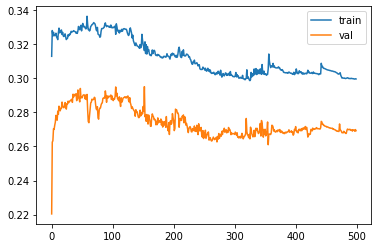

Epoch 1/500
54/79 [===================>..........] - ETA: 0s - loss: 0.9023 - mae: 0.3241
Epoch 00001: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.8799 - mae: 0.3268 - val_loss: 0.5372 - val_mae: 0.2477
Epoch 2/500
34/79 [===========>..................] - ETA: 0s - loss: 0.7813 - mae: 0.3220
Epoch 00002: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7835 - mae: 0.3191 - val_loss: 0.4657 - val_mae: 0.2334
Epoch 3/500
48/79 [=================>............] - ETA: 0s - loss: 0.6883 - mae: 0.2963
Epoch 00003: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7500 - mae: 0.3124 - val_loss: 0.4649 - val_mae: 0.2329
Epoch 4/500
49/79 [=================>............] - ETA: 0s - loss: 0.6900 - mae: 0.2972
Epoch 00004: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7455 - mae: 0.3115 -

Epoch 33/500
50/79 [=================>............] - ETA: 0s - loss: 0.6788 - mae: 0.2939
Epoch 00033: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7300 - mae: 0.3074 - val_loss: 0.4531 - val_mae: 0.2271
Epoch 34/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6801 - mae: 0.2946
Epoch 00034: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7291 - mae: 0.3073 - val_loss: 0.4528 - val_mae: 0.2270
Epoch 35/500
50/79 [=================>............] - ETA: 0s - loss: 0.6767 - mae: 0.2935
Epoch 00035: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7287 - mae: 0.3071 - val_loss: 0.4524 - val_mae: 0.2268
Epoch 36/500
50/79 [=================>............] - ETA: 0s - loss: 0.6769 - mae: 0.2935
Epoch 00036: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7287 - mae: 0.30

Epoch 65/500
42/79 [==============>...............] - ETA: 0s - loss: 0.6615 - mae: 0.2896
Epoch 00065: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7203 - mae: 0.3036 - val_loss: 0.4389 - val_mae: 0.2217
Epoch 66/500
41/79 [==============>...............] - ETA: 0s - loss: 0.6548 - mae: 0.2879
Epoch 00066: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7202 - mae: 0.3035 - val_loss: 0.4402 - val_mae: 0.2216
Epoch 67/500
45/79 [================>.............] - ETA: 0s - loss: 0.6754 - mae: 0.2930
Epoch 00067: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7200 - mae: 0.3035 - val_loss: 0.4387 - val_mae: 0.2214
Epoch 68/500
34/79 [===========>..................] - ETA: 0s - loss: 0.6961 - mae: 0.3004
Epoch 00068: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7252 - mae: 0.30

Epoch 97/500
50/79 [=================>............] - ETA: 0s - loss: 0.6653 - mae: 0.2918
Epoch 00097: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7173 - mae: 0.3046 - val_loss: 0.4444 - val_mae: 0.2247
Epoch 98/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6682 - mae: 0.2925
Epoch 00098: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7169 - mae: 0.3045 - val_loss: 0.4436 - val_mae: 0.2243
Epoch 99/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6854 - mae: 0.2957
Epoch 00099: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7166 - mae: 0.3044 - val_loss: 0.4428 - val_mae: 0.2239
Epoch 100/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6676 - mae: 0.2922
Epoch 00100: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7163 - mae: 0.3

Epoch 129/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6814 - mae: 0.2930
Epoch 00129: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7092 - mae: 0.3017 - val_loss: 0.4290 - val_mae: 0.2167
Epoch 130/500
49/79 [=================>............] - ETA: 0s - loss: 0.6616 - mae: 0.2894
Epoch 00130: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7090 - mae: 0.3016 - val_loss: 0.4290 - val_mae: 0.2167
Epoch 131/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6615 - mae: 0.2894
Epoch 00131: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7089 - mae: 0.3016 - val_loss: 0.4288 - val_mae: 0.2166
Epoch 132/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6615 - mae: 0.2893
Epoch 00132: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7088 - mae: 

Epoch 161/500
50/79 [=================>............] - ETA: 0s - loss: 0.6670 - mae: 0.2893
Epoch 00161: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7237 - mae: 0.3048 - val_loss: 0.4263 - val_mae: 0.2151
Epoch 162/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6694 - mae: 0.2901
Epoch 00162: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7231 - mae: 0.3047 - val_loss: 0.4260 - val_mae: 0.2150
Epoch 163/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6887 - mae: 0.2937
Epoch 00163: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7229 - mae: 0.3046 - val_loss: 0.4258 - val_mae: 0.2148
Epoch 164/500
50/79 [=================>............] - ETA: 0s - loss: 0.6656 - mae: 0.2889
Epoch 00164: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7227 - mae: 

Epoch 193/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6839 - mae: 0.2920
Epoch 00193: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7195 - mae: 0.3037 - val_loss: 0.4204 - val_mae: 0.2117
Epoch 194/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6609 - mae: 0.2866
Epoch 00194: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7171 - mae: 0.3027 - val_loss: 0.4281 - val_mae: 0.2154
Epoch 195/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6790 - mae: 0.2899
Epoch 00195: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7167 - mae: 0.3024 - val_loss: 0.4324 - val_mae: 0.2172
Epoch 196/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6791 - mae: 0.2897
Epoch 00196: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7171 - mae: 

Epoch 225/500
50/79 [=================>............] - ETA: 0s - loss: 0.6424 - mae: 0.2813
Epoch 00225: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7092 - mae: 0.3000 - val_loss: 0.4248 - val_mae: 0.2128
Epoch 226/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6666 - mae: 0.2864
Epoch 00226: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7092 - mae: 0.3000 - val_loss: 0.4247 - val_mae: 0.2127
Epoch 227/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6485 - mae: 0.2828
Epoch 00227: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7092 - mae: 0.3000 - val_loss: 0.4244 - val_mae: 0.2126
Epoch 228/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6484 - mae: 0.2827
Epoch 00228: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7091 - mae: 

Epoch 257/500
53/79 [===================>..........] - ETA: 0s - loss: 0.6677 - mae: 0.2823
Epoch 00257: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7123 - mae: 0.2973 - val_loss: 0.4187 - val_mae: 0.2076
Epoch 258/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6660 - mae: 0.2832
Epoch 00258: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7095 - mae: 0.2975 - val_loss: 0.4114 - val_mae: 0.2039
Epoch 259/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6632 - mae: 0.2808
Epoch 00259: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7053 - mae: 0.2954 - val_loss: 0.4133 - val_mae: 0.2051
Epoch 260/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6480 - mae: 0.2777
Epoch 00260: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7057 - mae: 

Epoch 289/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6642 - mae: 0.2792
Epoch 00289: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7032 - mae: 0.2937 - val_loss: 0.4044 - val_mae: 0.1987
Epoch 290/500
50/79 [=================>............] - ETA: 0s - loss: 0.6427 - mae: 0.2741
Epoch 00290: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7030 - mae: 0.2937 - val_loss: 0.4043 - val_mae: 0.1986
Epoch 291/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6639 - mae: 0.2790
Epoch 00291: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7030 - mae: 0.2936 - val_loss: 0.4042 - val_mae: 0.1985
Epoch 292/500
50/79 [=================>............] - ETA: 0s - loss: 0.6425 - mae: 0.2740
Epoch 00292: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7029 - mae: 

Epoch 321/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6746 - mae: 0.2806
Epoch 00321: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7242 - mae: 0.2975 - val_loss: 0.4094 - val_mae: 0.1999
Epoch 322/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6747 - mae: 0.2810
Epoch 00322: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7239 - mae: 0.2978 - val_loss: 0.4097 - val_mae: 0.2001
Epoch 323/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6745 - mae: 0.2812
Epoch 00323: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7236 - mae: 0.2979 - val_loss: 0.4098 - val_mae: 0.2002
Epoch 324/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6606 - mae: 0.2781
Epoch 00324: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7234 - mae: 

Epoch 353/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6539 - mae: 0.2768
Epoch 00353: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7187 - mae: 0.2972 - val_loss: 0.4132 - val_mae: 0.2014
Epoch 354/500
50/79 [=================>............] - ETA: 0s - loss: 0.6485 - mae: 0.2751
Epoch 00354: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7185 - mae: 0.2971 - val_loss: 0.4132 - val_mae: 0.2014
Epoch 355/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6536 - mae: 0.2767
Epoch 00355: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7184 - mae: 0.2971 - val_loss: 0.4133 - val_mae: 0.2015
Epoch 356/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6674 - mae: 0.2799
Epoch 00356: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7183 - mae: 

Epoch 385/500
50/79 [=================>............] - ETA: 0s - loss: 0.6612 - mae: 0.2793
Epoch 00385: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7438 - mae: 0.3026 - val_loss: 0.4185 - val_mae: 0.2023
Epoch 386/500
49/79 [=================>............] - ETA: 0s - loss: 0.6630 - mae: 0.2793
Epoch 00386: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7461 - mae: 0.3026 - val_loss: 0.4161 - val_mae: 0.2013
Epoch 387/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6635 - mae: 0.2796
Epoch 00387: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7455 - mae: 0.3027 - val_loss: 0.4139 - val_mae: 0.2015
Epoch 388/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6611 - mae: 0.2806
Epoch 00388: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7345 - mae: 

Epoch 417/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6699 - mae: 0.2817
Epoch 00417: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7315 - mae: 0.3010 - val_loss: 0.4177 - val_mae: 0.2030
Epoch 418/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6580 - mae: 0.2785
Epoch 00418: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7314 - mae: 0.3010 - val_loss: 0.4174 - val_mae: 0.2028
Epoch 419/500
51/79 [==================>...........] - ETA: 0s - loss: 0.6578 - mae: 0.2785
Epoch 00419: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7312 - mae: 0.3010 - val_loss: 0.4172 - val_mae: 0.2026
Epoch 420/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6695 - mae: 0.2816
Epoch 00420: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7311 - mae: 

Epoch 449/500
47/79 [================>.............] - ETA: 0s - loss: 0.6480 - mae: 0.2761
Epoch 00449: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7229 - mae: 0.2989 - val_loss: 0.4123 - val_mae: 0.2003
Epoch 450/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6620 - mae: 0.2799
Epoch 00450: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7228 - mae: 0.2989 - val_loss: 0.4121 - val_mae: 0.2001
Epoch 451/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6617 - mae: 0.2798
Epoch 00451: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7225 - mae: 0.2988 - val_loss: 0.4117 - val_mae: 0.1998
Epoch 452/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6616 - mae: 0.2798
Epoch 00452: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7225 - mae: 

Epoch 481/500
75/79 [===========================>..] - ETA: 0s - loss: 0.7177 - mae: 0.2953
Epoch 00481: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 3ms/step - loss: 0.7207 - mae: 0.2974 - val_loss: 0.3977 - val_mae: 0.1883
Epoch 482/500
54/79 [===================>..........] - ETA: 0s - loss: 0.6548 - mae: 0.2764
Epoch 00482: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7213 - mae: 0.2977 - val_loss: 0.4021 - val_mae: 0.1902
Epoch 483/500
54/79 [===================>..........] - ETA: 0s - loss: 0.6551 - mae: 0.2776
Epoch 00483: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7224 - mae: 0.2988 - val_loss: 0.4009 - val_mae: 0.1907
Epoch 484/500
52/79 [==================>...........] - ETA: 0s - loss: 0.6597 - mae: 0.2789
Epoch 00484: val_mae did not improve from 0.10687
79/79 [==============================] - 0s 2ms/step - loss: 0.7209 - mae: 

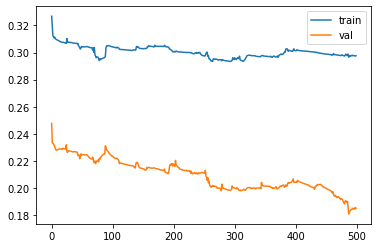

In [18]:
for train_name in range(0,50):
      df = pd.read_csv(datalist[train_name])
      df = signal_to_catagorical(df)
      x_train = df[['MACD-SL_n','MACD-SL_n-1','MACD-SL_n-2','MACD-SL_n-3','MACD-SL_n-4','MACD-SL_n-5','MACD-SL_n-6','MACD-SL_n-7',
                          'DMI_n','DMI_n-1','DMI_n-2','DMI_n-3','DMI_n-4','DMI_n-5','DMI_n-6','DMI_n-7',
                          'Close_n','Close_n-1','Close_n-2','Close_n-3','Close_n-4','Close_n-5','Close_n-6','Close_n-7',]].values
      y_train = df['Signal']
      y_train = to_categorical(y_train)

      r = random.randint(0,4)
      val = val_list[r]
      val = signal_to_catagorical(val)
      x_val = val[['MACD-SL_n','MACD-SL_n-1','MACD-SL_n-2','MACD-SL_n-3','MACD-SL_n-4','MACD-SL_n-5','MACD-SL_n-6','MACD-SL_n-7',
                          'DMI_n','DMI_n-1','DMI_n-2','DMI_n-3','DMI_n-4','DMI_n-5','DMI_n-6','DMI_n-7',
                          'Close_n','Close_n-1','Close_n-2','Close_n-3','Close_n-4','Close_n-5','Close_n-6','Close_n-7',]].values
      y_val = val['Signal']
      y_val = to_categorical(y_val)

      h = model.fit(x_train, y_train, epochs=500,validation_data=(x_val,y_val),callbacks=[checkpoint],shuffle=False)
      plt.plot(h.history['mae'])
      plt.plot(h.history['val_mae'])
      plt.legend(['train', 'val'])
      plt.show()

In [19]:
for test in test_list:
    print(len(test))
    test = signal_to_catagorical(test)
    x_test = test[['MACD-SL_n','MACD-SL_n-1','MACD-SL_n-2','MACD-SL_n-3','MACD-SL_n-4','MACD-SL_n-5','MACD-SL_n-6','MACD-SL_n-7',
                              'DMI_n','DMI_n-1','DMI_n-2','DMI_n-3','DMI_n-4','DMI_n-5','DMI_n-6','DMI_n-7',
                              'Close_n','Close_n-1','Close_n-2','Close_n-3','Close_n-4','Close_n-5','Close_n-6','Close_n-7',]].values
    y_test = test['Signal'].values

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    y_test = y_test.astype('int64')
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)
    
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy',accuracy)
    print()

3023
Confusion Matrix
[[  69    0  247]
 [   0    0  310]
 [ 185    0 2212]]
Accuracy 0.7545484617929209

2519
Confusion Matrix
[[  84    0  142]
 [   3    0  255]
 [  98    0 1937]]
Accuracy 0.8023025009924574

2707
Confusion Matrix
[[   9    0   77]
 [   2    0   82]
 [  23    0 2514]]
Accuracy 0.9320280753601773

3107
Confusion Matrix
[[  89    0  398]
 [   0    0  356]
 [ 112    0 2152]]
Accuracy 0.7212745413582233

2897
Confusion Matrix
[[  76    0  191]
 [   0    0  389]
 [ 122    0 2119]]
Accuracy 0.7576803589920608



In [38]:
model.save('Model/my_model_delta_best_6.h5')